<a href="https://colab.research.google.com/github/janghwan0113/graduation-thesis/blob/main/bacteria_classification_single_amp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Dec  5 16:53:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
import torchvision
from torchvision import datasets
import torch.utils.data as data
from torch.utils.data import Dataset

import torchvision.transforms as transforms
from torchvision.io import read_image
from torchvision.datasets import ImageFolder
import torch.optim as optim
import torch.nn as nn
from torchsummary import summary
from tensorflow.keras.utils import to_categorical

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title 기본 제목 텍스트
args = {}
kwargs = {}
args['batch_size'] = 32 # Batch size
args['test_batch_size'] = 1000 # Test batch size
args['epochs'] = 10  # The number of epochs is the number of times you go through the full dataset.
args['lr'] = 0.01 # Learning rate is how fast it will decend.

args['seed'] = 1 # random seed
args['log_interval'] = 10 # log interval
args['cuda'] = True # GPU cuda enable


# Data Preparation

In [ ]:
#@title 기본 제목 텍스트
train_df = pd.read_csv(r'/content/drive/MyDrive/21-2/thesis/211020_dataset/train_labels.csv', index_col=0)
train_df['amplitude_file'] = train_df.index.map(lambda id : f'/content/drive/MyDrive/21-2/thesis/211020_dataset/train/{id}_a.jpg')
train_df['phase_file'] = train_df.index.map(lambda id : f'/content/drive/MyDrive/21-2/thesis/211020_dataset/train/{id}_p.jpg')
train_df

In [ ]:
#@title 기본 제목 텍스트
labels = train_df.bacteria.values
labels = to_categorical(labels, 5)
print(labels,labels.shape)

In [ ]:
#@title 기본 제목 텍스트
for i, path in enumerate(train_df.phase_file.values ):
  print(path)
  if i ==10:
    break

In [ ]:
#@title 기본 제목 텍스트
read_image('/content/drive/MyDrive/21-2/thesis/211020_dataset/train/900000_p.jpg')

In [ ]:
#@title 기본 제목 텍스트
a=pd.read_csv('/content/drive/MyDrive/21-2/thesis/211020_dataset/train_labels.csv')
print(a)
b=pd.read_csv('/content/drive/MyDrive/21-2/thesis/211020_dataset/train_labels.csv',index_col=0)
print(b)

In [ ]:
#@title 기본 제목 텍스트
class Bacteria_Amplitude_Image_Dataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

        self.train_df = pd.read_csv(annotations_file, index_col=0)
        self.train_df['amplitude_file'] = train_df.index.map(lambda id : f'{self.img_dir}/{id}_a.jpg')

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
#@title 기본 제목 텍스트
class Bacteria_Phase_Image_Dataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

        self.train_df = pd.read_csv(annotations_file, index_col=0)
        self.train_df['phase_file'] = train_df.index.map(lambda id : f'{self.img_dir}/{id}_p.jpg')

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
#@title 기본 제목 텍스트
trainset = BacteriaImageDataset('/content/drive/MyDrive/21-2/thesis/211020_dataset/train_labels.csv', '/content/drive/MyDrive/21-2/thesis/211020_dataset/train' )
trainset.train_df

,bacteria,amplitude_file,phase_file
id,,,
900000,0,/content/drive/MyDrive/21-2/thesis/211020_data...,/content/drive/MyDrive/21-2/thesis/211020_data...
900001,0,/content/drive/MyDrive/21-2/thesis/211020_data...,/content/drive/MyDrive/21-2/thesis/211020_data...
900002,0,/content/drive/MyDrive/21-2/thesis/211020_data...,/content/drive/MyDrive/21-2/thesis/211020_data...
900003,0,/content/drive/MyDrive/21-2/thesis/211020_data...,/content/drive/MyDrive/21-2/thesis/211020_data...
900004,0,/content/drive/MyDrive/21-2/thesis/211020_data...,/content/drive/MyDrive/21-2/thesis/211020_data...
...,...,...,...
904495,4,/content/drive/MyDrive/21-2/thesis/211020_data...,/content/drive/MyDrive/21-2/thesis/211020_data...
904496,4,/content/drive/MyDrive/21-2/thesis/211020_data...,/content/drive/MyDrive/21-2/thesis/211020_data...
904497,4,/content/drive/MyDrive/21-2/thesis/211020_data...,/content/drive/MyDrive/21-2/thesis/211020_data...


In [ ]:
trainset = BacteriaImageDataset('/content/drive/MyDrive/21-2/thesis/211020_dataset/train_labels.csv', '/content/drive/MyDrive/21-2/thesis/211020_dataset/train' )
print(trainset.img_dir)
print(trainset.img_labels)
print(trainset.img_labels.iloc[10,1])

/content/drive/MyDrive/21-2/thesis/211020_dataset/train
          id  bacteria
0     900000         0
1     900001         0
2     900002         0
3     900003         0
4     900004         0
...      ...       ...
4495  904495         4
4496  904496         4
4497  904497         4
4498  904498         4
4499  904499         4

[4500 rows x 2 columns]
0


TypeError: ignored

# Data Load

In [ ]:
#data transform(including augmentation)

transform_trainset = transforms.Compose([
    #transforms.Resize((32,32)),
    transforms.Grayscale(num_output_channels=1),

    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation((-72,72)),
    transforms.RandomAffine(0,translate=(0.1,0.1)),

    transforms.ToTensor()
])

transform_testset = transforms.Compose([
    #transforms.Resize((32,32)),
    #transforms.CenterCrop(),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
    #transforms.Normalize(mean = torch.tensor([]),std = torch.tensor())                                   
])

# Data load with transform
amp_train_valid_set = datasets.ImageFolder(root='/content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/train/amp', transform = transform_trainset)
amp_testset = datasets.ImageFolder(root='/content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/test/amp', transform = transform_trainset)

phase_train_valid_set = datasets.ImageFolder(root='/content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/train/phase', transform = transform_trainset)
phase_testset = datasets.ImageFolder(root='/content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/test/phase', transform = transform_trainset)

#Split trainset into train_set, validation_set

amp_trainset_size = int(len(amp_train_valid_set)*0.8)
amp_validset_size = int(len(amp_train_valid_set))-amp_trainset_size

phase_trainset_size = int(len(phase_train_valid_set)*0.8)
phase_validset_size = int(len(phase_train_valid_set))-phase_trainset_size

amp_train_set, amp_validation_set = data.random_split(amp_train_valid_set, [amp_trainset_size, amp_validset_size])

phase_train_set, phase_validation_set = data.random_split(phase_train_valid_set, [phase_trainset_size, phase_validset_size])

# Train, Test loader
amp_train_loader = torch.utils.data.DataLoader(amp_train_set, batch_size = args['batch_size'], shuffle = True, **kwargs)
amp_validation_loader = torch.utils.data.DataLoader(amp_validation_set, batch_size = args['batch_size'], shuffle = True, **kwargs)

phase_train_loader = torch.utils.data.DataLoader(phase_train_set, batch_size = args['batch_size'], shuffle = True, **kwargs)
phase_validation_loader = torch.utils.data.DataLoader(phase_validation_set, batch_size = args['batch_size'], shuffle = True, **kwargs)



## Check trainset & testset 

In [ ]:
print('****Amplitude_trainset****')
print(amp_trainset)
print(type(amp_trainset))
print(len(amp_trainset))
print("------------")
print('****Amplitude_testset****')
print(amp_testset)
print(type(amp_testset))
print(len(amp_testset))
print("------------")
print('****Phase_trainset****')
print(phase_trainset)
print(type(phase_trainset))
print(len(phase_trainset))
print("------------")
print('****Phase_testset****')
print(phase_testset)
print(type(phase_testset))
print(len(phase_testset))

****Amplitude_trainset****
Dataset ImageFolder
    Number of datapoints: 4500
    Root location: /content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/train/amp
    StandardTransform
Transform: Compose(
               ToTensor()
           )
<class 'torchvision.datasets.folder.ImageFolder'>
4500
------------
****Amplitude_testset****
Dataset ImageFolder
    Number of datapoints: 500
    Root location: /content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/test/amp
    StandardTransform
Transform: Compose(
               ToTensor()
           )
<class 'torchvision.datasets.folder.ImageFolder'>
500
------------
****Phase_trainset****
Dataset ImageFolder
    Number of datapoints: 4500
    Root location: /content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/train/phase
    StandardTransform
Transform: Compose(
               ToTensor()
           )
<class 'torchvision.datasets.folder.ImageFolder'>
4500
------------
****Phase_testset****
Dataset ImageFolder
    Number of da

In [ ]:
#@title 기본 제목 텍스트
print(type(amp_train_loader))
for i, (inputs, targets) in enumerate(amp_train_loader):
  print(inputs.shape)
  print(targets.shape)
  print(i,inputs,targets)
  break

<class 'torch.utils.data.dataloader.DataLoader'>
torch.Size([32, 3, 32, 32])
torch.Size([32])
0 tensor([[[[0.3922, 0.3882, 0.3922,  ..., 0.4275, 0.4196, 0.4118],
          [0.3961, 0.3961, 0.4078,  ..., 0.4196, 0.4157, 0.4078],
          [0.4078, 0.4157, 0.4353,  ..., 0.4118, 0.4118, 0.4078],
          ...,
          [0.5608, 0.5608, 0.5608,  ..., 0.3961, 0.4039, 0.4078],
          [0.4980, 0.4941, 0.4941,  ..., 0.4000, 0.4078, 0.4078],
          [0.4588, 0.4510, 0.4431,  ..., 0.4039, 0.4078, 0.4118]],

         [[0.3922, 0.3882, 0.3922,  ..., 0.4275, 0.4196, 0.4118],
          [0.3961, 0.3961, 0.4078,  ..., 0.4196, 0.4157, 0.4078],
          [0.4078, 0.4157, 0.4353,  ..., 0.4118, 0.4118, 0.4078],
          ...,
          [0.5608, 0.5608, 0.5608,  ..., 0.3961, 0.4039, 0.4078],
          [0.4980, 0.4941, 0.4941,  ..., 0.4000, 0.4078, 0.4078],
          [0.4588, 0.4510, 0.4431,  ..., 0.4039, 0.4078, 0.4118]],

         [[0.3922, 0.3882, 0.3922,  ..., 0.4275, 0.4196, 0.4118],
          [0

## Data Visualization

In [ ]:
#@title 기본 제목 텍스트
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
#@title 기본 제목 텍스트
for obj in train_loader:
  print(type(obj))
  print(obj)
  print(obj[0].shape)
  break

In [ ]:
#@title 기본 제목 텍스트
train_data = torch.empty((1,3,32,32), dtype=torch.float32)
my_answer = torch.empty((1), dtype=torch.float32)

for my_data in train_loader:
  print(my_data[0][0].shape)
  train_data = torch.cat((train_data, my_data[0]), 0)
  my_answer= torch.cat((my_answer,my_data[1]),0)

train_data = train_data[1:]
my_answer= my_answer[1:]



imshow(torchvision.utils.make_grid(train_data, nrow=100))

# Model Network

In [ ]:
class Bact_Net(nn.Module): 
    def __init__(self, num_classes = 5, batch_norm=False):
        super(Bact_Net, self).__init__()

        self.batch_norm = batch_norm

        self.features = nn.Sequential(
            
            #[Layer1]
            nn.Conv2d(1,32,(3,3),stride=1, padding=0),
            nn.ReLU(inplace=True),
            #[Layer2]
            nn.MaxPool2d((2,2)),
            #[Layer3]
            nn.Conv2d(32,64,(3,3),stride=1, padding=0),
            nn.ReLU(inplace=True),
            #[Layer4]
            nn.MaxPool2d((2,2)),
            #[Layer5]
            nn.Conv2d(64,128,(3,3),stride=1, padding=0),
            nn.ReLU(inplace=True),
            #[Layer6]
            nn.MaxPool2d((2,2))
        )
            
        if self.batch_norm == True :          
            self.classifier = nn.Sequential(
                #[Layer7]
                nn.Linear(512,256),
                nn.BatchNorm1d(256),
                nn.ReLU(inplace=True),
                nn.Dropout(0.5),
                #[Layer8]
                nn.Linear(256, num_classes),
                nn.Dropout(0.5)
            )
        else:
            self.classifier = nn.Sequential(
                #[Layer7]
                nn.Linear(512,256),
                nn.ReLU(inplace=True),
                nn.Dropout(0.5),
                #[Layer8]
                nn.Linear(256, num_classes),
                nn.Dropout(0.5)
            )

    def forward(self,x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        
        return x

# Train & Test class

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

class trainer:

    def __init__(self, model, train_loader, opt, weight_decay=0, epoch_size=10, learning_rate=0.01, use_cuda=True):
        self.use_cuda = use_cuda
        
        # Use GPU, model to GPU
        if use_cuda:
          self.net = model.cuda()
        else:
          self.net = model
        
        self.train_loader = train_loader
        self.optimizer = opt
        self.weight_decay = weight_decay
        self.epoch_size = epoch_size
        self.learning_rate = learning_rate
        self.validation_epoch = int(epoch_size/10)
        self.criterion = nn.CrossEntropyLoss()

        self.history = {'train_acc':[],'val_acc':[],'train_loss':[],'val_loss':[]}

    def train(self, validation_loader=None):

        #Choose optimizer
        if self.optimizer == "SGD":
          optimizer = optim.SGD(self.net.parameters(), lr = self.learning_rate, weight_decay = self.weight_decay)
        elif self.optimizer == "Adam":
          optimizer = optim.Adam(self.net.parameters(), lr = self.learning_rate, weight_decay = self.weight_decay)
        elif self.optimizer == "Adagrad":
          optimizer = optim.Adagrad(self.net.parameters(), lr = self.learning_rate, weight_decay = self.weight_decay)
        elif self.optimizer == "RMSprop":
          optimizer = optim.RMSprop(self.net.parameters(), lr = self.learning_rate, weight_decay = self.weight_decay)
          
        
        max_test_acc = 0

        for epoch in tqdm(range(self.epoch_size)):
          self.net.train()

          #inputs.shape : torch.Size([32, 3, 32, 32]) (batch_size, rgb, H,W)
          #targets.shape : torch.Size([32]) (batch_size=> each answer)
          for i, (inputs, targets) in enumerate(self.train_loader):
            if self.use_cuda :
              inputs = inputs.cuda()
              targets = targets.cuda()

            #Gradient Initialization
            optimizer.zero_grad()

            outputs = self.net(inputs) #forward  
            loss = self.criterion(outputs, targets) #outputs : prediction tensor, targets : answer tensor
            loss.backward() # backpropagation
            optimizer.step() # weight & bias update with gradient

          # if (epoch+1)%self.validation_epoch == 0 :
          #   train_acc = self.validate(self.train_loader)
          #   print('Train Acc | Epoch {:d}/{:d} | ACC {:f}'.format((epoch+1), self.epoch_size, train_acc))

          #   if validation_loader != None:
          #     val_acc = self.validate(validation_loader)
          #     print('Test Acc | Epoch {:d}/{:d} | ACC {:f}'.format((epoch+1), self.epoch_size, val_acc))
            
          #   print("=================================================")

          
          self.history['train_loss'].append(loss.item())

          train_acc = self.validate(self.train_loader)
          self.history['train_acc'].append(train_acc)
          print('Train Acc | Epoch {:d}/{:d} | ACC {:f}'.format((epoch+1), self.epoch_size, train_acc))

          if validation_loader != None:
            val_acc = self.validate(validation_loader)
            self.history['val_acc'].append(val_acc)
            print('Val Acc | Epoch {:d}/{:d} | ACC {:f}'.format((epoch+1), self.epoch_size, val_acc))
          

          print("=================================================")          
      
    @torch.no_grad()
    def validate(self, data_loader):
      self.net.eval() #no weight update
      for i, (inputs, targets) in enumerate(data_loader):
        
        #inputs and targets onto CUDA (Use GPU)
        if self.use_cuda:
          inputs = inputs.cuda()
          targets = targets.cuda()
                
        pred = self.net(inputs)

        val_loss = self.criterion(pred, targets)
        
        pred_c = torch.argmax(pred, dim=1)
        target_c = targets

        if i==0 : 
          acc = (pred_c==target_c)
        else :
          acc = torch.cat([acc, (pred_c == target_c)], axis=0)

      if  data_loader != self.train_loader: 
        self.history['val_loss'].append(val_loss.item())
      
      acc = acc.float().mean() * 100

      return acc.item()


# Model Check

In [ ]:
example_model = Bact_Net()
example_model.cuda()

summary(example_model, input_size=(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             320
              ReLU-2           [-1, 32, 30, 30]               0
         MaxPool2d-3           [-1, 32, 15, 15]               0
            Conv2d-4           [-1, 64, 13, 13]          18,496
              ReLU-5           [-1, 64, 13, 13]               0
         MaxPool2d-6             [-1, 64, 6, 6]               0
            Conv2d-7            [-1, 128, 4, 4]          73,856
              ReLU-8            [-1, 128, 4, 4]               0
         MaxPool2d-9            [-1, 128, 2, 2]               0
           Linear-10                  [-1, 256]         131,328
             ReLU-11                  [-1, 256]               0
          Dropout-12                  [-1, 256]               0
           Linear-13                    [-1, 5]           1,285
          Dropout-14                   

# Amp_SGD

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 20.388889


  0%|          | 1/200 [18:20<60:48:22, 1100.01s/it]

Val Acc | Epoch 1/200 | ACC 18.444445
Train Acc | Epoch 2/200 | ACC 20.388889


  1%|          | 2/200 [18:36<25:26:28, 462.57s/it] 

Val Acc | Epoch 2/200 | ACC 18.444445
Train Acc | Epoch 3/200 | ACC 27.527779


  2%|▏         | 3/200 [18:51<14:08:25, 258.41s/it]

Val Acc | Epoch 3/200 | ACC 25.222223
Train Acc | Epoch 4/200 | ACC 20.444445


  2%|▏         | 4/200 [19:07<8:50:44, 162.47s/it] 

Val Acc | Epoch 4/200 | ACC 18.444445
Train Acc | Epoch 5/200 | ACC 25.750000


  2%|▎         | 5/200 [19:22<5:55:47, 109.47s/it]

Val Acc | Epoch 5/200 | ACC 23.444445
Train Acc | Epoch 6/200 | ACC 19.888889


  3%|▎         | 6/200 [19:38<4:10:30, 77.48s/it] 

Val Acc | Epoch 6/200 | ACC 20.444445
Train Acc | Epoch 7/200 | ACC 32.194443


  4%|▎         | 7/200 [19:53<3:04:06, 57.24s/it]

Val Acc | Epoch 7/200 | ACC 30.000002
Train Acc | Epoch 8/200 | ACC 28.861111


  4%|▍         | 8/200 [20:09<2:20:37, 43.95s/it]

Val Acc | Epoch 8/200 | ACC 26.888889
Train Acc | Epoch 9/200 | ACC 34.194447


  4%|▍         | 9/200 [20:24<1:51:29, 35.02s/it]

Val Acc | Epoch 9/200 | ACC 32.444443
Train Acc | Epoch 10/200 | ACC 20.944445


  5%|▌         | 10/200 [20:39<1:31:28, 28.89s/it]

Val Acc | Epoch 10/200 | ACC 18.888889
Train Acc | Epoch 11/200 | ACC 21.555557


  6%|▌         | 11/200 [20:55<1:18:01, 24.77s/it]

Val Acc | Epoch 11/200 | ACC 19.444445
Train Acc | Epoch 12/200 | ACC 26.583334


  6%|▌         | 12/200 [21:10<1:08:53, 21.98s/it]

Val Acc | Epoch 12/200 | ACC 26.000002
Train Acc | Epoch 13/200 | ACC 19.888889


  6%|▋         | 13/200 [21:26<1:02:19, 20.00s/it]

Val Acc | Epoch 13/200 | ACC 20.444445
Train Acc | Epoch 14/200 | ACC 21.888889


  7%|▋         | 14/200 [21:42<58:08, 18.76s/it]  

Val Acc | Epoch 14/200 | ACC 22.444445
Train Acc | Epoch 15/200 | ACC 28.250000


  8%|▊         | 15/200 [21:57<54:38, 17.72s/it]

Val Acc | Epoch 15/200 | ACC 27.333334
Train Acc | Epoch 16/200 | ACC 26.111111


  8%|▊         | 16/200 [22:13<52:26, 17.10s/it]

Val Acc | Epoch 16/200 | ACC 25.111113
Train Acc | Epoch 17/200 | ACC 34.222225


  8%|▊         | 17/200 [22:28<50:39, 16.61s/it]

Val Acc | Epoch 17/200 | ACC 31.888889
Train Acc | Epoch 18/200 | ACC 19.888889


  9%|▉         | 18/200 [22:44<49:23, 16.28s/it]

Val Acc | Epoch 18/200 | ACC 20.444445
Train Acc | Epoch 19/200 | ACC 25.138891


 10%|▉         | 19/200 [22:59<48:12, 15.98s/it]

Val Acc | Epoch 19/200 | ACC 27.000002
Train Acc | Epoch 20/200 | ACC 21.166668


 10%|█         | 20/200 [23:14<47:05, 15.70s/it]

Val Acc | Epoch 20/200 | ACC 21.444445
Train Acc | Epoch 21/200 | ACC 19.972223


 10%|█         | 21/200 [23:29<46:35, 15.62s/it]

Val Acc | Epoch 21/200 | ACC 20.111113
Train Acc | Epoch 22/200 | ACC 20.166666


 11%|█         | 22/200 [23:46<46:56, 15.82s/it]

Val Acc | Epoch 22/200 | ACC 19.444445
Train Acc | Epoch 23/200 | ACC 19.888889


 12%|█▏        | 23/200 [24:01<46:27, 15.75s/it]

Val Acc | Epoch 23/200 | ACC 20.444445
Train Acc | Epoch 24/200 | ACC 31.305557


 12%|█▏        | 24/200 [24:16<45:43, 15.59s/it]

Val Acc | Epoch 24/200 | ACC 29.444445
Train Acc | Epoch 25/200 | ACC 33.055557


 12%|█▎        | 25/200 [24:32<45:15, 15.52s/it]

Val Acc | Epoch 25/200 | ACC 31.555557
Train Acc | Epoch 26/200 | ACC 19.888889


 13%|█▎        | 26/200 [24:47<44:53, 15.48s/it]

Val Acc | Epoch 26/200 | ACC 20.444445
Train Acc | Epoch 27/200 | ACC 25.000000


 14%|█▎        | 27/200 [25:03<44:39, 15.49s/it]

Val Acc | Epoch 27/200 | ACC 26.666668
Train Acc | Epoch 28/200 | ACC 20.083334


 14%|█▍        | 28/200 [25:18<44:21, 15.47s/it]

Val Acc | Epoch 28/200 | ACC 20.777779
Train Acc | Epoch 29/200 | ACC 30.777779


 14%|█▍        | 29/200 [25:33<43:52, 15.40s/it]

Val Acc | Epoch 29/200 | ACC 29.777777
Train Acc | Epoch 30/200 | ACC 34.972225


 15%|█▌        | 30/200 [25:49<43:35, 15.39s/it]

Val Acc | Epoch 30/200 | ACC 32.888889
Train Acc | Epoch 31/200 | ACC 31.861111


 16%|█▌        | 31/200 [26:04<43:25, 15.42s/it]

Val Acc | Epoch 31/200 | ACC 28.777779
Train Acc | Epoch 32/200 | ACC 26.666668


 16%|█▌        | 32/200 [26:20<43:09, 15.41s/it]

Val Acc | Epoch 32/200 | ACC 25.777779
Train Acc | Epoch 33/200 | ACC 33.638889


 16%|█▋        | 33/200 [26:35<42:48, 15.38s/it]

Val Acc | Epoch 33/200 | ACC 35.333336
Train Acc | Epoch 34/200 | ACC 28.833332


 17%|█▋        | 34/200 [26:50<42:24, 15.33s/it]

Val Acc | Epoch 34/200 | ACC 29.777777
Train Acc | Epoch 35/200 | ACC 31.055557


 18%|█▊        | 35/200 [27:06<42:23, 15.42s/it]

Val Acc | Epoch 35/200 | ACC 32.111111
Train Acc | Epoch 36/200 | ACC 28.805557


 18%|█▊        | 36/200 [27:21<42:12, 15.44s/it]

Val Acc | Epoch 36/200 | ACC 28.000000
Train Acc | Epoch 37/200 | ACC 21.722223


 18%|█▊        | 37/200 [27:37<41:54, 15.43s/it]

Val Acc | Epoch 37/200 | ACC 21.888889
Train Acc | Epoch 38/200 | ACC 28.638891


 19%|█▉        | 38/200 [27:52<41:42, 15.45s/it]

Val Acc | Epoch 38/200 | ACC 28.222223
Train Acc | Epoch 39/200 | ACC 20.555555


 20%|█▉        | 39/200 [28:07<41:20, 15.41s/it]

Val Acc | Epoch 39/200 | ACC 21.555557
Train Acc | Epoch 40/200 | ACC 35.777779


 20%|██        | 40/200 [28:23<41:08, 15.43s/it]

Val Acc | Epoch 40/200 | ACC 34.111111
Train Acc | Epoch 41/200 | ACC 37.083332


 20%|██        | 41/200 [28:38<40:44, 15.38s/it]

Val Acc | Epoch 41/200 | ACC 35.333336
Train Acc | Epoch 42/200 | ACC 27.027781


 21%|██        | 42/200 [28:54<41:11, 15.64s/it]

Val Acc | Epoch 42/200 | ACC 24.777779
Train Acc | Epoch 43/200 | ACC 30.222221


 22%|██▏       | 43/200 [29:10<40:47, 15.59s/it]

Val Acc | Epoch 43/200 | ACC 28.111113
Train Acc | Epoch 44/200 | ACC 33.611115


 22%|██▏       | 44/200 [29:25<40:21, 15.53s/it]

Val Acc | Epoch 44/200 | ACC 32.111111
Train Acc | Epoch 45/200 | ACC 23.055557


 22%|██▎       | 45/200 [29:41<39:56, 15.46s/it]

Val Acc | Epoch 45/200 | ACC 20.777779
Train Acc | Epoch 46/200 | ACC 42.888889


 23%|██▎       | 46/200 [29:56<39:33, 15.41s/it]

Val Acc | Epoch 46/200 | ACC 39.333336
Train Acc | Epoch 47/200 | ACC 41.527779


 24%|██▎       | 47/200 [30:11<39:01, 15.31s/it]

Val Acc | Epoch 47/200 | ACC 39.000000
Train Acc | Epoch 48/200 | ACC 31.750000


 24%|██▍       | 48/200 [30:26<38:43, 15.29s/it]

Val Acc | Epoch 48/200 | ACC 29.666668
Train Acc | Epoch 49/200 | ACC 38.555557


 24%|██▍       | 49/200 [30:41<38:28, 15.29s/it]

Val Acc | Epoch 49/200 | ACC 37.111111
Train Acc | Epoch 50/200 | ACC 38.666668


 25%|██▌       | 50/200 [30:57<38:16, 15.31s/it]

Val Acc | Epoch 50/200 | ACC 36.777779
Train Acc | Epoch 51/200 | ACC 44.416668


 26%|██▌       | 51/200 [31:12<37:58, 15.29s/it]

Val Acc | Epoch 51/200 | ACC 41.222225
Train Acc | Epoch 52/200 | ACC 45.694447


 26%|██▌       | 52/200 [31:27<37:40, 15.27s/it]

Val Acc | Epoch 52/200 | ACC 43.777779
Train Acc | Epoch 53/200 | ACC 41.861111


 26%|██▋       | 53/200 [31:43<37:48, 15.43s/it]

Val Acc | Epoch 53/200 | ACC 41.555557
Train Acc | Epoch 54/200 | ACC 29.444445


 27%|██▋       | 54/200 [31:58<37:33, 15.44s/it]

Val Acc | Epoch 54/200 | ACC 26.666668
Train Acc | Epoch 55/200 | ACC 35.972221


 28%|██▊       | 55/200 [32:14<37:21, 15.46s/it]

Val Acc | Epoch 55/200 | ACC 36.000000
Train Acc | Epoch 56/200 | ACC 26.638889


 28%|██▊       | 56/200 [32:29<37:07, 15.47s/it]

Val Acc | Epoch 56/200 | ACC 27.666668
Train Acc | Epoch 57/200 | ACC 42.333336


 28%|██▊       | 57/200 [32:45<36:43, 15.41s/it]

Val Acc | Epoch 57/200 | ACC 40.000000
Train Acc | Epoch 58/200 | ACC 40.638889


 29%|██▉       | 58/200 [33:00<36:16, 15.33s/it]

Val Acc | Epoch 58/200 | ACC 39.222221
Train Acc | Epoch 59/200 | ACC 29.027779


 30%|██▉       | 59/200 [33:15<36:06, 15.37s/it]

Val Acc | Epoch 59/200 | ACC 29.111111
Train Acc | Epoch 60/200 | ACC 44.000000


 30%|███       | 60/200 [33:31<35:50, 15.36s/it]

Val Acc | Epoch 60/200 | ACC 42.777779
Train Acc | Epoch 61/200 | ACC 44.805557


 30%|███       | 61/200 [33:46<35:26, 15.30s/it]

Val Acc | Epoch 61/200 | ACC 41.777779
Train Acc | Epoch 62/200 | ACC 44.305557


 31%|███       | 62/200 [34:01<35:24, 15.39s/it]

Val Acc | Epoch 62/200 | ACC 43.000000
Train Acc | Epoch 63/200 | ACC 32.305557


 32%|███▏      | 63/200 [34:17<35:18, 15.47s/it]

Val Acc | Epoch 63/200 | ACC 30.555555
Train Acc | Epoch 64/200 | ACC 41.527779


 32%|███▏      | 64/200 [34:32<34:58, 15.43s/it]

Val Acc | Epoch 64/200 | ACC 40.333332
Train Acc | Epoch 65/200 | ACC 44.944443


 32%|███▎      | 65/200 [34:48<34:37, 15.39s/it]

Val Acc | Epoch 65/200 | ACC 44.222225
Train Acc | Epoch 66/200 | ACC 47.277779


 33%|███▎      | 66/200 [35:03<34:03, 15.25s/it]

Val Acc | Epoch 66/200 | ACC 45.444447
Train Acc | Epoch 67/200 | ACC 35.111111


 34%|███▎      | 67/200 [35:18<33:38, 15.18s/it]

Val Acc | Epoch 67/200 | ACC 33.333336
Train Acc | Epoch 68/200 | ACC 29.000002


 34%|███▍      | 68/200 [35:33<33:22, 15.17s/it]

Val Acc | Epoch 68/200 | ACC 28.333334
Train Acc | Epoch 69/200 | ACC 47.111111


 34%|███▍      | 69/200 [35:48<33:03, 15.14s/it]

Val Acc | Epoch 69/200 | ACC 43.111115
Train Acc | Epoch 70/200 | ACC 47.583336


 35%|███▌      | 70/200 [36:03<32:59, 15.23s/it]

Val Acc | Epoch 70/200 | ACC 44.777779
Train Acc | Epoch 71/200 | ACC 40.638889


 36%|███▌      | 71/200 [36:19<32:44, 15.23s/it]

Val Acc | Epoch 71/200 | ACC 39.444447
Train Acc | Epoch 72/200 | ACC 48.333336


 36%|███▌      | 72/200 [36:34<32:25, 15.20s/it]

Val Acc | Epoch 72/200 | ACC 46.222221
Train Acc | Epoch 73/200 | ACC 46.444447


 36%|███▋      | 73/200 [36:49<32:18, 15.27s/it]

Val Acc | Epoch 73/200 | ACC 44.555557
Train Acc | Epoch 74/200 | ACC 49.694447


 37%|███▋      | 74/200 [37:04<32:04, 15.27s/it]

Val Acc | Epoch 74/200 | ACC 45.000000
Train Acc | Epoch 75/200 | ACC 38.194447


 38%|███▊      | 75/200 [37:20<31:45, 15.24s/it]

Val Acc | Epoch 75/200 | ACC 37.333332
Train Acc | Epoch 76/200 | ACC 39.694447


 38%|███▊      | 76/200 [37:35<31:31, 15.25s/it]

Val Acc | Epoch 76/200 | ACC 38.444443
Train Acc | Epoch 77/200 | ACC 50.111115


 38%|███▊      | 77/200 [37:50<31:09, 15.20s/it]

Val Acc | Epoch 77/200 | ACC 46.888889
Train Acc | Epoch 78/200 | ACC 47.111111


 39%|███▉      | 78/200 [38:05<31:02, 15.27s/it]

Val Acc | Epoch 78/200 | ACC 44.222225
Train Acc | Epoch 79/200 | ACC 48.944447


 40%|███▉      | 79/200 [38:20<30:33, 15.15s/it]

Val Acc | Epoch 79/200 | ACC 45.555557
Train Acc | Epoch 80/200 | ACC 48.194443


 40%|████      | 80/200 [38:35<30:18, 15.15s/it]

Val Acc | Epoch 80/200 | ACC 46.000000
Train Acc | Epoch 81/200 | ACC 47.000000


 40%|████      | 81/200 [38:51<30:06, 15.18s/it]

Val Acc | Epoch 81/200 | ACC 45.333336
Train Acc | Epoch 82/200 | ACC 47.916668


 41%|████      | 82/200 [39:06<30:10, 15.34s/it]

Val Acc | Epoch 82/200 | ACC 48.000000
Train Acc | Epoch 83/200 | ACC 43.222225


 42%|████▏     | 83/200 [39:23<30:29, 15.64s/it]

Val Acc | Epoch 83/200 | ACC 42.222221
Train Acc | Epoch 84/200 | ACC 45.527779


 42%|████▏     | 84/200 [39:38<29:58, 15.51s/it]

Val Acc | Epoch 84/200 | ACC 43.333332
Train Acc | Epoch 85/200 | ACC 48.611115


 42%|████▎     | 85/200 [39:53<29:39, 15.47s/it]

Val Acc | Epoch 85/200 | ACC 46.555557
Train Acc | Epoch 86/200 | ACC 45.555557


 43%|████▎     | 86/200 [40:09<29:38, 15.60s/it]

Val Acc | Epoch 86/200 | ACC 44.444447
Train Acc | Epoch 87/200 | ACC 50.250000


 44%|████▎     | 87/200 [40:25<29:15, 15.53s/it]

Val Acc | Epoch 87/200 | ACC 48.666668
Train Acc | Epoch 88/200 | ACC 50.388889


 44%|████▍     | 88/200 [40:40<28:54, 15.49s/it]

Val Acc | Epoch 88/200 | ACC 46.777779
Train Acc | Epoch 89/200 | ACC 50.444447


 44%|████▍     | 89/200 [40:55<28:33, 15.44s/it]

Val Acc | Epoch 89/200 | ACC 46.777779
Train Acc | Epoch 90/200 | ACC 44.833336


 45%|████▌     | 90/200 [41:11<28:16, 15.42s/it]

Val Acc | Epoch 90/200 | ACC 42.777779
Train Acc | Epoch 91/200 | ACC 50.638889


 46%|████▌     | 91/200 [41:26<27:53, 15.35s/it]

Val Acc | Epoch 91/200 | ACC 48.444447
Train Acc | Epoch 92/200 | ACC 50.111115


 46%|████▌     | 92/200 [41:41<27:42, 15.39s/it]

Val Acc | Epoch 92/200 | ACC 46.666668
Train Acc | Epoch 93/200 | ACC 49.638893


 46%|████▋     | 93/200 [41:57<27:28, 15.40s/it]

Val Acc | Epoch 93/200 | ACC 47.555557
Train Acc | Epoch 94/200 | ACC 45.305557


 47%|████▋     | 94/200 [42:12<27:06, 15.34s/it]

Val Acc | Epoch 94/200 | ACC 44.000000
Train Acc | Epoch 95/200 | ACC 49.527779


 48%|████▊     | 95/200 [42:27<26:52, 15.35s/it]

Val Acc | Epoch 95/200 | ACC 46.777779
Train Acc | Epoch 96/200 | ACC 49.500000


 48%|████▊     | 96/200 [42:42<26:27, 15.27s/it]

Val Acc | Epoch 96/200 | ACC 47.444447
Train Acc | Epoch 97/200 | ACC 53.500004


 48%|████▊     | 97/200 [42:58<26:12, 15.27s/it]

Val Acc | Epoch 97/200 | ACC 49.666668
Train Acc | Epoch 98/200 | ACC 52.750004


 49%|████▉     | 98/200 [43:13<25:59, 15.29s/it]

Val Acc | Epoch 98/200 | ACC 50.555557
Train Acc | Epoch 99/200 | ACC 48.944447


 50%|████▉     | 99/200 [43:28<25:34, 15.19s/it]

Val Acc | Epoch 99/200 | ACC 47.222225
Train Acc | Epoch 100/200 | ACC 52.666672


 50%|█████     | 100/200 [43:43<25:17, 15.17s/it]

Val Acc | Epoch 100/200 | ACC 48.444447
Train Acc | Epoch 101/200 | ACC 55.138893


 50%|█████     | 101/200 [43:58<25:05, 15.21s/it]

Val Acc | Epoch 101/200 | ACC 51.111115
Train Acc | Epoch 102/200 | ACC 51.166664


 51%|█████     | 102/200 [44:14<24:59, 15.30s/it]

Val Acc | Epoch 102/200 | ACC 50.444447
Train Acc | Epoch 103/200 | ACC 53.333336


 52%|█████▏    | 103/200 [44:30<25:19, 15.67s/it]

Val Acc | Epoch 103/200 | ACC 50.444447
Train Acc | Epoch 104/200 | ACC 54.055561


 52%|█████▏    | 104/200 [44:46<24:51, 15.54s/it]

Val Acc | Epoch 104/200 | ACC 50.666664
Train Acc | Epoch 105/200 | ACC 53.472221


 52%|█████▎    | 105/200 [45:01<24:32, 15.50s/it]

Val Acc | Epoch 105/200 | ACC 51.444447
Train Acc | Epoch 106/200 | ACC 54.333336


 53%|█████▎    | 106/200 [45:17<24:21, 15.55s/it]

Val Acc | Epoch 106/200 | ACC 51.000000
Train Acc | Epoch 107/200 | ACC 53.750004


 54%|█████▎    | 107/200 [45:32<23:58, 15.47s/it]

Val Acc | Epoch 107/200 | ACC 49.888889
Train Acc | Epoch 108/200 | ACC 55.333336


 54%|█████▍    | 108/200 [45:47<23:38, 15.42s/it]

Val Acc | Epoch 108/200 | ACC 52.444447
Train Acc | Epoch 109/200 | ACC 54.361111


 55%|█████▍    | 109/200 [46:02<23:16, 15.34s/it]

Val Acc | Epoch 109/200 | ACC 51.111115
Train Acc | Epoch 110/200 | ACC 50.638889


 55%|█████▌    | 110/200 [46:18<22:58, 15.32s/it]

Val Acc | Epoch 110/200 | ACC 48.111111
Train Acc | Epoch 111/200 | ACC 55.888893


 56%|█████▌    | 111/200 [46:33<22:46, 15.35s/it]

Val Acc | Epoch 111/200 | ACC 53.444447
Train Acc | Epoch 112/200 | ACC 48.388889


 56%|█████▌    | 112/200 [46:49<22:31, 15.35s/it]

Val Acc | Epoch 112/200 | ACC 46.666668
Train Acc | Epoch 113/200 | ACC 55.500000


 56%|█████▋    | 113/200 [47:04<22:16, 15.36s/it]

Val Acc | Epoch 113/200 | ACC 52.777779
Train Acc | Epoch 114/200 | ACC 54.833336


 57%|█████▋    | 114/200 [47:19<22:01, 15.36s/it]

Val Acc | Epoch 114/200 | ACC 54.333336
Train Acc | Epoch 115/200 | ACC 55.277779


 57%|█████▊    | 115/200 [47:35<21:47, 15.38s/it]

Val Acc | Epoch 115/200 | ACC 52.000004
Train Acc | Epoch 116/200 | ACC 56.527782


 58%|█████▊    | 116/200 [47:50<21:37, 15.44s/it]

Val Acc | Epoch 116/200 | ACC 54.000004
Train Acc | Epoch 117/200 | ACC 54.583336


 58%|█████▊    | 117/200 [48:06<21:31, 15.56s/it]

Val Acc | Epoch 117/200 | ACC 52.555553
Train Acc | Epoch 118/200 | ACC 56.972225


 59%|█████▉    | 118/200 [48:22<21:13, 15.53s/it]

Val Acc | Epoch 118/200 | ACC 54.333336
Train Acc | Epoch 119/200 | ACC 53.833336


 60%|█████▉    | 119/200 [48:37<20:51, 15.45s/it]

Val Acc | Epoch 119/200 | ACC 52.111115
Train Acc | Epoch 120/200 | ACC 56.361115


 60%|██████    | 120/200 [48:52<20:31, 15.40s/it]

Val Acc | Epoch 120/200 | ACC 54.111111
Train Acc | Epoch 121/200 | ACC 60.277779


 60%|██████    | 121/200 [49:08<20:18, 15.42s/it]

Val Acc | Epoch 121/200 | ACC 55.555557
Train Acc | Epoch 122/200 | ACC 58.388889


 61%|██████    | 122/200 [49:23<20:07, 15.49s/it]

Val Acc | Epoch 122/200 | ACC 56.444447
Train Acc | Epoch 123/200 | ACC 57.972221


 62%|██████▏   | 123/200 [49:39<20:04, 15.65s/it]

Val Acc | Epoch 123/200 | ACC 55.000000
Train Acc | Epoch 124/200 | ACC 58.694447


 62%|██████▏   | 124/200 [49:55<19:43, 15.57s/it]

Val Acc | Epoch 124/200 | ACC 56.666668
Train Acc | Epoch 125/200 | ACC 59.583336


 62%|██████▎   | 125/200 [50:10<19:16, 15.42s/it]

Val Acc | Epoch 125/200 | ACC 55.333336
Train Acc | Epoch 126/200 | ACC 58.750004


 63%|██████▎   | 126/200 [50:25<18:55, 15.35s/it]

Val Acc | Epoch 126/200 | ACC 55.777775
Train Acc | Epoch 127/200 | ACC 60.583336


 64%|██████▎   | 127/200 [50:40<18:40, 15.34s/it]

Val Acc | Epoch 127/200 | ACC 58.777779
Train Acc | Epoch 128/200 | ACC 58.500004


 64%|██████▍   | 128/200 [50:56<18:29, 15.41s/it]

Val Acc | Epoch 128/200 | ACC 55.000000
Train Acc | Epoch 129/200 | ACC 58.055557


 64%|██████▍   | 129/200 [51:11<18:12, 15.39s/it]

Val Acc | Epoch 129/200 | ACC 56.222225
Train Acc | Epoch 130/200 | ACC 62.250000


 65%|██████▌   | 130/200 [51:26<17:50, 15.30s/it]

Val Acc | Epoch 130/200 | ACC 59.000004
Train Acc | Epoch 131/200 | ACC 61.694443


 66%|██████▌   | 131/200 [51:42<17:41, 15.38s/it]

Val Acc | Epoch 131/200 | ACC 59.333336
Train Acc | Epoch 132/200 | ACC 56.305557


 66%|██████▌   | 132/200 [51:57<17:26, 15.39s/it]

Val Acc | Epoch 132/200 | ACC 54.444443
Train Acc | Epoch 133/200 | ACC 61.500000


 66%|██████▋   | 133/200 [52:13<17:10, 15.38s/it]

Val Acc | Epoch 133/200 | ACC 58.666672
Train Acc | Epoch 134/200 | ACC 60.000004


 67%|██████▋   | 134/200 [52:28<16:52, 15.34s/it]

Val Acc | Epoch 134/200 | ACC 57.111115
Train Acc | Epoch 135/200 | ACC 63.250000


 68%|██████▊   | 135/200 [52:43<16:42, 15.43s/it]

Val Acc | Epoch 135/200 | ACC 60.222225
Train Acc | Epoch 136/200 | ACC 62.222225


 68%|██████▊   | 136/200 [52:59<16:28, 15.45s/it]

Val Acc | Epoch 136/200 | ACC 58.555557
Train Acc | Epoch 137/200 | ACC 61.944443


 68%|██████▊   | 137/200 [53:14<16:11, 15.42s/it]

Val Acc | Epoch 137/200 | ACC 59.888885
Train Acc | Epoch 138/200 | ACC 63.277782


 69%|██████▉   | 138/200 [53:30<15:52, 15.36s/it]

Val Acc | Epoch 138/200 | ACC 59.555553
Train Acc | Epoch 139/200 | ACC 63.166664


 70%|██████▉   | 139/200 [53:45<15:32, 15.29s/it]

Val Acc | Epoch 139/200 | ACC 60.555561
Train Acc | Epoch 140/200 | ACC 53.750004


 70%|███████   | 140/200 [54:00<15:23, 15.39s/it]

Val Acc | Epoch 140/200 | ACC 50.333332
Train Acc | Epoch 141/200 | ACC 62.027782


 70%|███████   | 141/200 [54:16<15:06, 15.37s/it]

Val Acc | Epoch 141/200 | ACC 61.888893
Train Acc | Epoch 142/200 | ACC 59.916668


 71%|███████   | 142/200 [54:31<14:51, 15.37s/it]

Val Acc | Epoch 142/200 | ACC 58.777779
Train Acc | Epoch 143/200 | ACC 61.361111


 72%|███████▏  | 143/200 [54:47<14:53, 15.67s/it]

Val Acc | Epoch 143/200 | ACC 59.555553
Train Acc | Epoch 144/200 | ACC 64.388885


 72%|███████▏  | 144/200 [55:03<14:39, 15.70s/it]

Val Acc | Epoch 144/200 | ACC 63.111115
Train Acc | Epoch 145/200 | ACC 59.722221


 72%|███████▎  | 145/200 [55:19<14:19, 15.62s/it]

Val Acc | Epoch 145/200 | ACC 57.555557
Train Acc | Epoch 146/200 | ACC 62.972225


 73%|███████▎  | 146/200 [55:34<14:06, 15.67s/it]

Val Acc | Epoch 146/200 | ACC 58.444447
Train Acc | Epoch 147/200 | ACC 63.333332


 74%|███████▎  | 147/200 [55:50<13:46, 15.60s/it]

Val Acc | Epoch 147/200 | ACC 62.000000
Train Acc | Epoch 148/200 | ACC 61.694443


 74%|███████▍  | 148/200 [56:05<13:28, 15.55s/it]

Val Acc | Epoch 148/200 | ACC 59.222221
Train Acc | Epoch 149/200 | ACC 65.611115


 74%|███████▍  | 149/200 [56:21<13:13, 15.56s/it]

Val Acc | Epoch 149/200 | ACC 62.000000
Train Acc | Epoch 150/200 | ACC 65.000000


 75%|███████▌  | 150/200 [56:36<12:51, 15.42s/it]

Val Acc | Epoch 150/200 | ACC 62.111115
Train Acc | Epoch 151/200 | ACC 65.277779


 76%|███████▌  | 151/200 [56:51<12:36, 15.44s/it]

Val Acc | Epoch 151/200 | ACC 60.888893
Train Acc | Epoch 152/200 | ACC 65.916672


 76%|███████▌  | 152/200 [57:07<12:19, 15.40s/it]

Val Acc | Epoch 152/200 | ACC 61.666668
Train Acc | Epoch 153/200 | ACC 62.527782


 76%|███████▋  | 153/200 [57:22<12:00, 15.33s/it]

Val Acc | Epoch 153/200 | ACC 61.777775
Train Acc | Epoch 154/200 | ACC 65.194443


 77%|███████▋  | 154/200 [57:37<11:41, 15.25s/it]

Val Acc | Epoch 154/200 | ACC 62.000000
Train Acc | Epoch 155/200 | ACC 61.500000


 78%|███████▊  | 155/200 [57:52<11:25, 15.23s/it]

Val Acc | Epoch 155/200 | ACC 59.777779
Train Acc | Epoch 156/200 | ACC 65.527779


 78%|███████▊  | 156/200 [58:07<11:11, 15.26s/it]

Val Acc | Epoch 156/200 | ACC 60.000004
Train Acc | Epoch 157/200 | ACC 63.777779


 78%|███████▊  | 157/200 [58:23<10:58, 15.31s/it]

Val Acc | Epoch 157/200 | ACC 62.555557
Train Acc | Epoch 158/200 | ACC 65.138885


 79%|███████▉  | 158/200 [58:38<10:44, 15.35s/it]

Val Acc | Epoch 158/200 | ACC 62.555557
Train Acc | Epoch 159/200 | ACC 63.777779


 80%|███████▉  | 159/200 [58:53<10:27, 15.31s/it]

Val Acc | Epoch 159/200 | ACC 59.555553
Train Acc | Epoch 160/200 | ACC 64.750000


 80%|████████  | 160/200 [59:09<10:13, 15.34s/it]

Val Acc | Epoch 160/200 | ACC 62.666668
Train Acc | Epoch 161/200 | ACC 66.055557


 80%|████████  | 161/200 [59:24<09:56, 15.29s/it]

Val Acc | Epoch 161/200 | ACC 64.111115
Train Acc | Epoch 162/200 | ACC 66.166672


 81%|████████  | 162/200 [59:39<09:40, 15.28s/it]

Val Acc | Epoch 162/200 | ACC 63.555557
Train Acc | Epoch 163/200 | ACC 67.972221


 82%|████████▏ | 163/200 [59:56<09:35, 15.57s/it]

Val Acc | Epoch 163/200 | ACC 65.444443
Train Acc | Epoch 164/200 | ACC 67.444443


 82%|████████▏ | 164/200 [1:00:11<09:17, 15.50s/it]

Val Acc | Epoch 164/200 | ACC 65.111115
Train Acc | Epoch 165/200 | ACC 68.750000


 82%|████████▎ | 165/200 [1:00:26<08:57, 15.37s/it]

Val Acc | Epoch 165/200 | ACC 64.888885
Train Acc | Epoch 166/200 | ACC 63.416664


 83%|████████▎ | 166/200 [1:00:41<08:39, 15.29s/it]

Val Acc | Epoch 166/200 | ACC 60.888893
Train Acc | Epoch 167/200 | ACC 65.027779


 84%|████████▎ | 167/200 [1:00:56<08:24, 15.29s/it]

Val Acc | Epoch 167/200 | ACC 63.111115
Train Acc | Epoch 168/200 | ACC 70.138893


 84%|████████▍ | 168/200 [1:01:12<08:09, 15.28s/it]

Val Acc | Epoch 168/200 | ACC 65.777779
Train Acc | Epoch 169/200 | ACC 63.888889


 84%|████████▍ | 169/200 [1:01:27<07:57, 15.39s/it]

Val Acc | Epoch 169/200 | ACC 61.555557
Train Acc | Epoch 170/200 | ACC 68.583336


 85%|████████▌ | 170/200 [1:01:43<07:45, 15.50s/it]

Val Acc | Epoch 170/200 | ACC 66.777779
Train Acc | Epoch 171/200 | ACC 68.694450


 86%|████████▌ | 171/200 [1:01:59<07:29, 15.51s/it]

Val Acc | Epoch 171/200 | ACC 66.333336
Train Acc | Epoch 172/200 | ACC 62.111115


 86%|████████▌ | 172/200 [1:02:14<07:11, 15.42s/it]

Val Acc | Epoch 172/200 | ACC 59.777779
Train Acc | Epoch 173/200 | ACC 68.111115


 86%|████████▋ | 173/200 [1:02:29<06:58, 15.48s/it]

Val Acc | Epoch 173/200 | ACC 64.555557
Train Acc | Epoch 174/200 | ACC 70.055557


 87%|████████▋ | 174/200 [1:02:45<06:42, 15.50s/it]

Val Acc | Epoch 174/200 | ACC 65.444443
Train Acc | Epoch 175/200 | ACC 69.527779


 88%|████████▊ | 175/200 [1:03:00<06:27, 15.49s/it]

Val Acc | Epoch 175/200 | ACC 67.555557
Train Acc | Epoch 176/200 | ACC 69.611115


 88%|████████▊ | 176/200 [1:03:16<06:13, 15.54s/it]

Val Acc | Epoch 176/200 | ACC 64.777779
Train Acc | Epoch 177/200 | ACC 45.055557


 88%|████████▊ | 177/200 [1:03:32<05:57, 15.54s/it]

Val Acc | Epoch 177/200 | ACC 44.111111
Train Acc | Epoch 178/200 | ACC 70.250008


 89%|████████▉ | 178/200 [1:03:47<05:41, 15.53s/it]

Val Acc | Epoch 178/200 | ACC 67.333336
Train Acc | Epoch 179/200 | ACC 66.833336


 90%|████████▉ | 179/200 [1:04:03<05:25, 15.52s/it]

Val Acc | Epoch 179/200 | ACC 65.222221
Train Acc | Epoch 180/200 | ACC 71.277779


 90%|█████████ | 180/200 [1:04:18<05:09, 15.49s/it]

Val Acc | Epoch 180/200 | ACC 67.444443
Train Acc | Epoch 181/200 | ACC 69.111115


 90%|█████████ | 181/200 [1:04:33<04:54, 15.48s/it]

Val Acc | Epoch 181/200 | ACC 63.777779
Train Acc | Epoch 182/200 | ACC 70.805557


 91%|█████████ | 182/200 [1:04:49<04:37, 15.44s/it]

Val Acc | Epoch 182/200 | ACC 67.222229
Train Acc | Epoch 183/200 | ACC 71.472221


 92%|█████████▏| 183/200 [1:05:05<04:23, 15.53s/it]

Val Acc | Epoch 183/200 | ACC 67.000000
Train Acc | Epoch 184/200 | ACC 71.833336


 92%|█████████▏| 184/200 [1:05:20<04:09, 15.62s/it]

Val Acc | Epoch 184/200 | ACC 67.666664
Train Acc | Epoch 185/200 | ACC 66.222229


 92%|█████████▎| 185/200 [1:05:36<03:52, 15.47s/it]

Val Acc | Epoch 185/200 | ACC 61.222225
Train Acc | Epoch 186/200 | ACC 70.277779


 93%|█████████▎| 186/200 [1:05:51<03:36, 15.44s/it]

Val Acc | Epoch 186/200 | ACC 66.333336
Train Acc | Epoch 187/200 | ACC 69.472221


 94%|█████████▎| 187/200 [1:06:06<03:21, 15.46s/it]

Val Acc | Epoch 187/200 | ACC 67.333336
Train Acc | Epoch 188/200 | ACC 71.472221


 94%|█████████▍| 188/200 [1:06:22<03:06, 15.51s/it]

Val Acc | Epoch 188/200 | ACC 68.000000
Train Acc | Epoch 189/200 | ACC 72.250000


 94%|█████████▍| 189/200 [1:06:37<02:49, 15.41s/it]

Val Acc | Epoch 189/200 | ACC 68.222221
Train Acc | Epoch 190/200 | ACC 55.000000


 95%|█████████▌| 190/200 [1:06:53<02:34, 15.44s/it]

Val Acc | Epoch 190/200 | ACC 51.444447
Train Acc | Epoch 191/200 | ACC 71.444443


 96%|█████████▌| 191/200 [1:07:08<02:18, 15.42s/it]

Val Acc | Epoch 191/200 | ACC 66.666672
Train Acc | Epoch 192/200 | ACC 72.388893


 96%|█████████▌| 192/200 [1:07:24<02:03, 15.45s/it]

Val Acc | Epoch 192/200 | ACC 67.333336
Train Acc | Epoch 193/200 | ACC 71.222221


 96%|█████████▋| 193/200 [1:07:39<01:47, 15.42s/it]

Val Acc | Epoch 193/200 | ACC 67.555557
Train Acc | Epoch 194/200 | ACC 69.750000


 97%|█████████▋| 194/200 [1:07:55<01:32, 15.49s/it]

Val Acc | Epoch 194/200 | ACC 68.333336
Train Acc | Epoch 195/200 | ACC 70.722221


 98%|█████████▊| 195/200 [1:08:10<01:17, 15.48s/it]

Val Acc | Epoch 195/200 | ACC 67.333336
Train Acc | Epoch 196/200 | ACC 72.000000


 98%|█████████▊| 196/200 [1:08:26<01:01, 15.49s/it]

Val Acc | Epoch 196/200 | ACC 68.666664
Train Acc | Epoch 197/200 | ACC 70.472221


 98%|█████████▊| 197/200 [1:08:41<00:46, 15.38s/it]

Val Acc | Epoch 197/200 | ACC 68.666664
Train Acc | Epoch 198/200 | ACC 71.194443


 99%|█████████▉| 198/200 [1:08:56<00:30, 15.49s/it]

Val Acc | Epoch 198/200 | ACC 67.000000
Train Acc | Epoch 199/200 | ACC 72.694443


100%|█████████▉| 199/200 [1:09:12<00:15, 15.42s/it]

Val Acc | Epoch 199/200 | ACC 69.000000
Train Acc | Epoch 200/200 | ACC 72.583336


100%|██████████| 200/200 [1:09:27<00:00, 20.84s/it]

Val Acc | Epoch 200/200 | ACC 68.111115


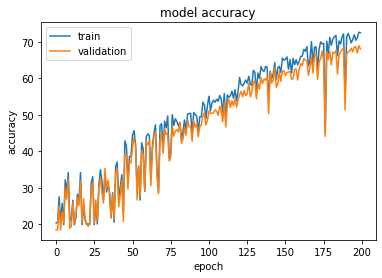

Maximum Train Accuracy : 72.69444274902344
Maximum Validation Accuracy : 69.0


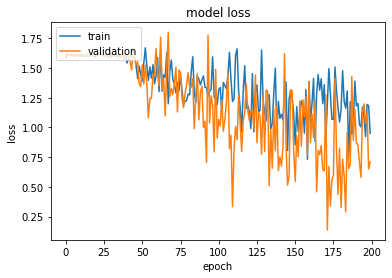

Minimum Train Loss : 0.7322512865066528
Minimum Validation Loss : 0.13842855393886566


In [ ]:
Bacteria_model_amp_SGD_001 = Bact_Net()
Bacteria_model_amp_SGD_001.cuda()
trainer_SGD_amp_001 = trainer(Bacteria_model_amp_SGD_001, amp_train_loader,"SGD", epoch_size=200, learning_rate=0.01)
trainer_SGD_amp_001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_SGD_amp_001.history['train_acc'])
plt.plot(trainer_SGD_amp_001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_SGD_amp_001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_SGD_amp_001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_SGD_amp_001.history['train_loss'])
plt.plot(trainer_SGD_amp_001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_SGD_amp_001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_SGD_amp_001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 20.166666


  0%|          | 1/200 [00:15<50:53, 15.34s/it]

Val Acc | Epoch 1/200 | ACC 19.444445
Train Acc | Epoch 2/200 | ACC 20.138889


  1%|          | 2/200 [00:30<50:26, 15.28s/it]

Val Acc | Epoch 2/200 | ACC 19.444445
Train Acc | Epoch 3/200 | ACC 20.138889


  2%|▏         | 3/200 [00:46<51:39, 15.73s/it]

Val Acc | Epoch 3/200 | ACC 19.444445
Train Acc | Epoch 4/200 | ACC 20.500000


  2%|▏         | 4/200 [01:02<51:48, 15.86s/it]

Val Acc | Epoch 4/200 | ACC 20.000000
Train Acc | Epoch 5/200 | ACC 20.194445


  2%|▎         | 5/200 [01:18<50:57, 15.68s/it]

Val Acc | Epoch 5/200 | ACC 20.666668
Train Acc | Epoch 6/200 | ACC 21.222223


  3%|▎         | 6/200 [01:33<50:28, 15.61s/it]

Val Acc | Epoch 6/200 | ACC 20.555555
Train Acc | Epoch 7/200 | ACC 21.416668


  4%|▎         | 7/200 [01:49<49:57, 15.53s/it]

Val Acc | Epoch 7/200 | ACC 20.888889
Train Acc | Epoch 8/200 | ACC 20.277779


  4%|▍         | 8/200 [02:04<49:40, 15.53s/it]

Val Acc | Epoch 8/200 | ACC 19.666668
Train Acc | Epoch 9/200 | ACC 20.722221


  4%|▍         | 9/200 [02:19<49:10, 15.45s/it]

Val Acc | Epoch 9/200 | ACC 21.111111
Train Acc | Epoch 10/200 | ACC 20.194445


  5%|▌         | 10/200 [02:35<48:51, 15.43s/it]

Val Acc | Epoch 10/200 | ACC 19.444445
Train Acc | Epoch 11/200 | ACC 20.555555


  6%|▌         | 11/200 [02:50<48:21, 15.35s/it]

Val Acc | Epoch 11/200 | ACC 19.555557
Train Acc | Epoch 12/200 | ACC 24.083334


  6%|▌         | 12/200 [03:05<47:59, 15.32s/it]

Val Acc | Epoch 12/200 | ACC 23.000000
Train Acc | Epoch 13/200 | ACC 24.722223


  6%|▋         | 13/200 [03:20<47:26, 15.22s/it]

Val Acc | Epoch 13/200 | ACC 24.222223
Train Acc | Epoch 14/200 | ACC 21.777779


  7%|▋         | 14/200 [03:36<47:22, 15.28s/it]

Val Acc | Epoch 14/200 | ACC 20.444445
Train Acc | Epoch 15/200 | ACC 20.944445


  8%|▊         | 15/200 [03:51<47:15, 15.33s/it]

Val Acc | Epoch 15/200 | ACC 19.222221
Train Acc | Epoch 16/200 | ACC 21.388889


  8%|▊         | 16/200 [04:06<47:03, 15.35s/it]

Val Acc | Epoch 16/200 | ACC 21.555557
Train Acc | Epoch 17/200 | ACC 22.916668


  8%|▊         | 17/200 [04:22<46:57, 15.39s/it]

Val Acc | Epoch 17/200 | ACC 23.000000
Train Acc | Epoch 18/200 | ACC 24.944445


  9%|▉         | 18/200 [04:38<46:51, 15.45s/it]

Val Acc | Epoch 18/200 | ACC 23.888889
Train Acc | Epoch 19/200 | ACC 21.416668


 10%|▉         | 19/200 [04:53<46:36, 15.45s/it]

Val Acc | Epoch 19/200 | ACC 21.111111
Train Acc | Epoch 20/200 | ACC 25.583332


 10%|█         | 20/200 [05:08<46:04, 15.36s/it]

Val Acc | Epoch 20/200 | ACC 25.000000
Train Acc | Epoch 21/200 | ACC 25.277779


 10%|█         | 21/200 [05:24<46:06, 15.46s/it]

Val Acc | Epoch 21/200 | ACC 24.333334
Train Acc | Epoch 22/200 | ACC 20.555555


 11%|█         | 22/200 [05:39<45:44, 15.42s/it]

Val Acc | Epoch 22/200 | ACC 20.555555
Train Acc | Epoch 23/200 | ACC 26.000002


 12%|█▏        | 23/200 [05:55<46:01, 15.60s/it]

Val Acc | Epoch 23/200 | ACC 23.333334
Train Acc | Epoch 24/200 | ACC 26.861111


 12%|█▏        | 24/200 [06:11<45:51, 15.64s/it]

Val Acc | Epoch 24/200 | ACC 24.000000
Train Acc | Epoch 25/200 | ACC 33.361115


 12%|█▎        | 25/200 [06:26<45:30, 15.60s/it]

Val Acc | Epoch 25/200 | ACC 30.555555
Train Acc | Epoch 26/200 | ACC 31.222225


 13%|█▎        | 26/200 [06:42<45:01, 15.53s/it]

Val Acc | Epoch 26/200 | ACC 28.666666
Train Acc | Epoch 27/200 | ACC 33.500000


 14%|█▎        | 27/200 [06:57<44:28, 15.42s/it]

Val Acc | Epoch 27/200 | ACC 31.111113
Train Acc | Epoch 28/200 | ACC 33.277779


 14%|█▍        | 28/200 [07:13<44:31, 15.53s/it]

Val Acc | Epoch 28/200 | ACC 31.666666
Train Acc | Epoch 29/200 | ACC 31.805557


 14%|█▍        | 29/200 [07:28<44:04, 15.47s/it]

Val Acc | Epoch 29/200 | ACC 29.666668
Train Acc | Epoch 30/200 | ACC 26.527777


 15%|█▌        | 30/200 [07:44<43:51, 15.48s/it]

Val Acc | Epoch 30/200 | ACC 23.777779
Train Acc | Epoch 31/200 | ACC 26.361111


 16%|█▌        | 31/200 [07:59<43:19, 15.38s/it]

Val Acc | Epoch 31/200 | ACC 22.000000
Train Acc | Epoch 32/200 | ACC 25.611111


 16%|█▌        | 32/200 [08:14<42:48, 15.29s/it]

Val Acc | Epoch 32/200 | ACC 24.888889
Train Acc | Epoch 33/200 | ACC 24.138889


 16%|█▋        | 33/200 [08:29<42:40, 15.33s/it]

Val Acc | Epoch 33/200 | ACC 23.000000
Train Acc | Epoch 34/200 | ACC 20.888889


 17%|█▋        | 34/200 [08:45<42:40, 15.43s/it]

Val Acc | Epoch 34/200 | ACC 21.111111
Train Acc | Epoch 35/200 | ACC 29.138889


 18%|█▊        | 35/200 [09:00<42:03, 15.30s/it]

Val Acc | Epoch 35/200 | ACC 29.333336
Train Acc | Epoch 36/200 | ACC 32.805557


 18%|█▊        | 36/200 [09:15<41:52, 15.32s/it]

Val Acc | Epoch 36/200 | ACC 32.333336
Train Acc | Epoch 37/200 | ACC 33.833332


 18%|█▊        | 37/200 [09:30<41:34, 15.30s/it]

Val Acc | Epoch 37/200 | ACC 32.222221
Train Acc | Epoch 38/200 | ACC 31.833332


 19%|█▉        | 38/200 [09:46<41:29, 15.37s/it]

Val Acc | Epoch 38/200 | ACC 29.777777
Train Acc | Epoch 39/200 | ACC 25.000000


 20%|█▉        | 39/200 [10:01<41:05, 15.31s/it]

Val Acc | Epoch 39/200 | ACC 22.444445
Train Acc | Epoch 40/200 | ACC 28.972223


 20%|██        | 40/200 [10:16<40:45, 15.28s/it]

Val Acc | Epoch 40/200 | ACC 25.444445
Train Acc | Epoch 41/200 | ACC 29.083336


 20%|██        | 41/200 [10:32<40:35, 15.32s/it]

Val Acc | Epoch 41/200 | ACC 27.555555
Train Acc | Epoch 42/200 | ACC 20.444445


 21%|██        | 42/200 [10:47<40:22, 15.33s/it]

Val Acc | Epoch 42/200 | ACC 19.777779
Train Acc | Epoch 43/200 | ACC 20.222223


 22%|██▏       | 43/200 [11:03<40:36, 15.52s/it]

Val Acc | Epoch 43/200 | ACC 19.555557
Train Acc | Epoch 44/200 | ACC 20.333334


 22%|██▏       | 44/200 [11:19<40:52, 15.72s/it]

Val Acc | Epoch 44/200 | ACC 18.333334
Train Acc | Epoch 45/200 | ACC 25.305557


 22%|██▎       | 45/200 [11:35<40:27, 15.66s/it]

Val Acc | Epoch 45/200 | ACC 24.111111
Train Acc | Epoch 46/200 | ACC 23.000000


 23%|██▎       | 46/200 [11:50<40:04, 15.61s/it]

Val Acc | Epoch 46/200 | ACC 20.555555
Train Acc | Epoch 47/200 | ACC 20.777779


 24%|██▎       | 47/200 [12:06<39:59, 15.68s/it]

Val Acc | Epoch 47/200 | ACC 18.666666
Train Acc | Epoch 48/200 | ACC 21.527777


 24%|██▍       | 48/200 [12:22<39:36, 15.63s/it]

Val Acc | Epoch 48/200 | ACC 19.555557
Train Acc | Epoch 49/200 | ACC 23.972221


 24%|██▍       | 49/200 [12:37<39:08, 15.56s/it]

Val Acc | Epoch 49/200 | ACC 21.666666
Train Acc | Epoch 50/200 | ACC 25.527779


 25%|██▌       | 50/200 [12:53<39:00, 15.60s/it]

Val Acc | Epoch 50/200 | ACC 24.444445
Train Acc | Epoch 51/200 | ACC 25.750000


 26%|██▌       | 51/200 [13:08<38:42, 15.59s/it]

Val Acc | Epoch 51/200 | ACC 22.444445
Train Acc | Epoch 52/200 | ACC 20.750002


 26%|██▌       | 52/200 [13:24<38:19, 15.54s/it]

Val Acc | Epoch 52/200 | ACC 19.666668
Train Acc | Epoch 53/200 | ACC 20.833334


 26%|██▋       | 53/200 [13:39<37:41, 15.38s/it]

Val Acc | Epoch 53/200 | ACC 19.444445
Train Acc | Epoch 54/200 | ACC 20.583334


 27%|██▋       | 54/200 [13:54<37:24, 15.37s/it]

Val Acc | Epoch 54/200 | ACC 19.777779
Train Acc | Epoch 55/200 | ACC 21.555557


 28%|██▊       | 55/200 [14:10<37:13, 15.41s/it]

Val Acc | Epoch 55/200 | ACC 20.666668
Train Acc | Epoch 56/200 | ACC 20.527779


 28%|██▊       | 56/200 [14:25<37:15, 15.53s/it]

Val Acc | Epoch 56/200 | ACC 19.888889
Train Acc | Epoch 57/200 | ACC 20.722221


 28%|██▊       | 57/200 [14:41<36:58, 15.52s/it]

Val Acc | Epoch 57/200 | ACC 20.111113
Train Acc | Epoch 58/200 | ACC 20.166666


 29%|██▉       | 58/200 [14:56<36:35, 15.46s/it]

Val Acc | Epoch 58/200 | ACC 19.555557
Train Acc | Epoch 59/200 | ACC 20.388889


 30%|██▉       | 59/200 [15:12<36:30, 15.54s/it]

Val Acc | Epoch 59/200 | ACC 19.444445
Train Acc | Epoch 60/200 | ACC 30.555555


 30%|███       | 60/200 [15:27<36:12, 15.52s/it]

Val Acc | Epoch 60/200 | ACC 27.666668
Train Acc | Epoch 61/200 | ACC 27.777779


 30%|███       | 61/200 [15:43<36:07, 15.59s/it]

Val Acc | Epoch 61/200 | ACC 24.111111
Train Acc | Epoch 62/200 | ACC 31.472223


 31%|███       | 62/200 [15:59<35:46, 15.56s/it]

Val Acc | Epoch 62/200 | ACC 28.111113
Train Acc | Epoch 63/200 | ACC 31.722223


 32%|███▏      | 63/200 [16:15<35:43, 15.65s/it]

Val Acc | Epoch 63/200 | ACC 30.222221
Train Acc | Epoch 64/200 | ACC 27.750000


 32%|███▏      | 64/200 [16:31<35:41, 15.75s/it]

Val Acc | Epoch 64/200 | ACC 24.666668
Train Acc | Epoch 65/200 | ACC 32.083336


 32%|███▎      | 65/200 [16:46<35:18, 15.69s/it]

Val Acc | Epoch 65/200 | ACC 29.555555
Train Acc | Epoch 66/200 | ACC 33.000000


 33%|███▎      | 66/200 [17:02<35:02, 15.69s/it]

Val Acc | Epoch 66/200 | ACC 29.555555
Train Acc | Epoch 67/200 | ACC 33.222221


 34%|███▎      | 67/200 [17:17<34:39, 15.64s/it]

Val Acc | Epoch 67/200 | ACC 30.111113
Train Acc | Epoch 68/200 | ACC 35.777779


 34%|███▍      | 68/200 [17:33<34:08, 15.52s/it]

Val Acc | Epoch 68/200 | ACC 33.777779
Train Acc | Epoch 69/200 | ACC 27.250000


 34%|███▍      | 69/200 [17:48<33:38, 15.41s/it]

Val Acc | Epoch 69/200 | ACC 27.000002
Train Acc | Epoch 70/200 | ACC 24.055555


 35%|███▌      | 70/200 [18:03<33:28, 15.45s/it]

Val Acc | Epoch 70/200 | ACC 22.888889
Train Acc | Epoch 71/200 | ACC 20.944445


 36%|███▌      | 71/200 [18:18<33:00, 15.35s/it]

Val Acc | Epoch 71/200 | ACC 20.444445
Train Acc | Epoch 72/200 | ACC 20.861111


 36%|███▌      | 72/200 [18:34<33:07, 15.52s/it]

Val Acc | Epoch 72/200 | ACC 19.777779
Train Acc | Epoch 73/200 | ACC 20.222223


 36%|███▋      | 73/200 [18:49<32:36, 15.40s/it]

Val Acc | Epoch 73/200 | ACC 19.555557
Train Acc | Epoch 74/200 | ACC 20.305555


 37%|███▋      | 74/200 [19:04<32:06, 15.29s/it]

Val Acc | Epoch 74/200 | ACC 19.555557
Train Acc | Epoch 75/200 | ACC 20.222223


 38%|███▊      | 75/200 [19:20<31:50, 15.28s/it]

Val Acc | Epoch 75/200 | ACC 19.444445
Train Acc | Epoch 76/200 | ACC 20.138889


 38%|███▊      | 76/200 [19:35<31:38, 15.31s/it]

Val Acc | Epoch 76/200 | ACC 19.444445
Train Acc | Epoch 77/200 | ACC 20.638889


 38%|███▊      | 77/200 [19:50<31:21, 15.30s/it]

Val Acc | Epoch 77/200 | ACC 18.666666
Train Acc | Epoch 78/200 | ACC 20.277779


 39%|███▉      | 78/200 [20:06<31:10, 15.33s/it]

Val Acc | Epoch 78/200 | ACC 19.777779
Train Acc | Epoch 79/200 | ACC 22.027779


 40%|███▉      | 79/200 [20:21<30:56, 15.34s/it]

Val Acc | Epoch 79/200 | ACC 19.888889
Train Acc | Epoch 80/200 | ACC 27.472221


 40%|████      | 80/200 [20:36<30:34, 15.28s/it]

Val Acc | Epoch 80/200 | ACC 26.111111
Train Acc | Epoch 81/200 | ACC 25.861111


 40%|████      | 81/200 [20:52<30:25, 15.34s/it]

Val Acc | Epoch 81/200 | ACC 23.777779
Train Acc | Epoch 82/200 | ACC 23.916668


 41%|████      | 82/200 [21:07<30:15, 15.39s/it]

Val Acc | Epoch 82/200 | ACC 21.888889
Train Acc | Epoch 83/200 | ACC 24.083334


 42%|████▏     | 83/200 [21:23<30:15, 15.51s/it]

Val Acc | Epoch 83/200 | ACC 21.333334
Train Acc | Epoch 84/200 | ACC 21.750000


 42%|████▏     | 84/200 [21:40<30:42, 15.89s/it]

Val Acc | Epoch 84/200 | ACC 19.333334
Train Acc | Epoch 85/200 | ACC 21.916666


 42%|████▎     | 85/200 [21:56<30:25, 15.88s/it]

Val Acc | Epoch 85/200 | ACC 19.777779
Train Acc | Epoch 86/200 | ACC 23.583334


 43%|████▎     | 86/200 [22:11<30:08, 15.86s/it]

Val Acc | Epoch 86/200 | ACC 20.555555
Train Acc | Epoch 87/200 | ACC 22.805557


 44%|████▎     | 87/200 [22:27<29:29, 15.66s/it]

Val Acc | Epoch 87/200 | ACC 20.000000
Train Acc | Epoch 88/200 | ACC 25.055557


 44%|████▍     | 88/200 [22:42<28:47, 15.42s/it]

Val Acc | Epoch 88/200 | ACC 22.333334
Train Acc | Epoch 89/200 | ACC 22.527779


 44%|████▍     | 89/200 [22:56<28:12, 15.25s/it]

Val Acc | Epoch 89/200 | ACC 20.444445
Train Acc | Epoch 90/200 | ACC 22.944445


 45%|████▌     | 90/200 [23:11<27:53, 15.21s/it]

Val Acc | Epoch 90/200 | ACC 21.000000
Train Acc | Epoch 91/200 | ACC 23.777779


 46%|████▌     | 91/200 [23:26<27:31, 15.15s/it]

Val Acc | Epoch 91/200 | ACC 22.555555
Train Acc | Epoch 92/200 | ACC 23.972221


 46%|████▌     | 92/200 [23:42<27:15, 15.15s/it]

Val Acc | Epoch 92/200 | ACC 21.444445
Train Acc | Epoch 93/200 | ACC 26.972221


 46%|████▋     | 93/200 [23:57<26:59, 15.13s/it]

Val Acc | Epoch 93/200 | ACC 23.888889
Train Acc | Epoch 94/200 | ACC 25.250000


 47%|████▋     | 94/200 [24:12<26:47, 15.17s/it]

Val Acc | Epoch 94/200 | ACC 22.666668
Train Acc | Epoch 95/200 | ACC 24.111111


 48%|████▊     | 95/200 [24:27<26:32, 15.17s/it]

Val Acc | Epoch 95/200 | ACC 21.777779
Train Acc | Epoch 96/200 | ACC 25.055557


 48%|████▊     | 96/200 [24:43<26:29, 15.28s/it]

Val Acc | Epoch 96/200 | ACC 22.777779
Train Acc | Epoch 97/200 | ACC 24.222223


 48%|████▊     | 97/200 [24:58<26:05, 15.20s/it]

Val Acc | Epoch 97/200 | ACC 21.333334
Train Acc | Epoch 98/200 | ACC 23.416666


 49%|████▉     | 98/200 [25:13<25:53, 15.23s/it]

Val Acc | Epoch 98/200 | ACC 21.333334
Train Acc | Epoch 99/200 | ACC 23.250000


 50%|████▉     | 99/200 [25:28<25:35, 15.21s/it]

Val Acc | Epoch 99/200 | ACC 21.444445
Train Acc | Epoch 100/200 | ACC 24.722223


 50%|█████     | 100/200 [25:43<25:09, 15.09s/it]

Val Acc | Epoch 100/200 | ACC 22.444445
Train Acc | Epoch 101/200 | ACC 25.611111


 50%|█████     | 101/200 [25:58<24:51, 15.06s/it]

Val Acc | Epoch 101/200 | ACC 24.333334
Train Acc | Epoch 102/200 | ACC 25.416666


 51%|█████     | 102/200 [26:13<24:29, 14.99s/it]

Val Acc | Epoch 102/200 | ACC 22.888889
Train Acc | Epoch 103/200 | ACC 25.638889


 52%|█████▏    | 103/200 [26:28<24:13, 14.98s/it]

Val Acc | Epoch 103/200 | ACC 23.666668
Train Acc | Epoch 104/200 | ACC 29.694445


 52%|█████▏    | 104/200 [26:44<24:36, 15.39s/it]

Val Acc | Epoch 104/200 | ACC 28.222223
Train Acc | Epoch 105/200 | ACC 27.138889


 52%|█████▎    | 105/200 [26:59<24:21, 15.38s/it]

Val Acc | Epoch 105/200 | ACC 24.666668
Train Acc | Epoch 106/200 | ACC 29.000002


 53%|█████▎    | 106/200 [27:14<23:56, 15.29s/it]

Val Acc | Epoch 106/200 | ACC 27.333334
Train Acc | Epoch 107/200 | ACC 26.527777


 54%|█████▎    | 107/200 [27:30<23:34, 15.21s/it]

Val Acc | Epoch 107/200 | ACC 24.444445
Train Acc | Epoch 108/200 | ACC 30.138889


 54%|█████▍    | 108/200 [27:45<23:17, 15.20s/it]

Val Acc | Epoch 108/200 | ACC 27.000002
Train Acc | Epoch 109/200 | ACC 25.527779


 55%|█████▍    | 109/200 [28:00<22:56, 15.13s/it]

Val Acc | Epoch 109/200 | ACC 22.666668
Train Acc | Epoch 110/200 | ACC 24.111111


 55%|█████▌    | 110/200 [28:15<22:37, 15.08s/it]

Val Acc | Epoch 110/200 | ACC 25.000000
Train Acc | Epoch 111/200 | ACC 22.500000


 56%|█████▌    | 111/200 [28:29<22:10, 14.95s/it]

Val Acc | Epoch 111/200 | ACC 20.888889
Train Acc | Epoch 112/200 | ACC 26.194445


 56%|█████▌    | 112/200 [28:44<21:52, 14.91s/it]

Val Acc | Epoch 112/200 | ACC 24.666668
Train Acc | Epoch 113/200 | ACC 27.666668


 56%|█████▋    | 113/200 [28:59<21:47, 15.03s/it]

Val Acc | Epoch 113/200 | ACC 26.333336
Train Acc | Epoch 114/200 | ACC 26.388889


 57%|█████▋    | 114/200 [29:14<21:34, 15.05s/it]

Val Acc | Epoch 114/200 | ACC 26.333336
Train Acc | Epoch 115/200 | ACC 24.555557


 57%|█████▊    | 115/200 [29:30<21:30, 15.18s/it]

Val Acc | Epoch 115/200 | ACC 23.444445
Train Acc | Epoch 116/200 | ACC 25.861111


 58%|█████▊    | 116/200 [29:45<21:18, 15.22s/it]

Val Acc | Epoch 116/200 | ACC 24.777779
Train Acc | Epoch 117/200 | ACC 25.722223


 58%|█████▊    | 117/200 [30:00<20:56, 15.14s/it]

Val Acc | Epoch 117/200 | ACC 24.111111
Train Acc | Epoch 118/200 | ACC 26.527777


 59%|█████▉    | 118/200 [30:16<20:45, 15.19s/it]

Val Acc | Epoch 118/200 | ACC 24.000000
Train Acc | Epoch 119/200 | ACC 24.638889


 60%|█████▉    | 119/200 [30:30<20:23, 15.10s/it]

Val Acc | Epoch 119/200 | ACC 24.444445
Train Acc | Epoch 120/200 | ACC 23.416666


 60%|██████    | 120/200 [30:46<20:07, 15.09s/it]

Val Acc | Epoch 120/200 | ACC 22.111113
Train Acc | Epoch 121/200 | ACC 22.027779


 60%|██████    | 121/200 [31:00<19:44, 14.99s/it]

Val Acc | Epoch 121/200 | ACC 23.222223
Train Acc | Epoch 122/200 | ACC 23.611113


 61%|██████    | 122/200 [31:15<19:30, 15.01s/it]

Val Acc | Epoch 122/200 | ACC 22.444445
Train Acc | Epoch 123/200 | ACC 23.416666


 62%|██████▏   | 123/200 [31:31<19:19, 15.06s/it]

Val Acc | Epoch 123/200 | ACC 22.888889
Train Acc | Epoch 124/200 | ACC 24.083334


 62%|██████▏   | 124/200 [31:46<19:20, 15.27s/it]

Val Acc | Epoch 124/200 | ACC 23.222223
Train Acc | Epoch 125/200 | ACC 31.222225


 62%|██████▎   | 125/200 [32:02<19:08, 15.31s/it]

Val Acc | Epoch 125/200 | ACC 26.444445
Train Acc | Epoch 126/200 | ACC 25.638889


 63%|██████▎   | 126/200 [32:17<18:46, 15.22s/it]

Val Acc | Epoch 126/200 | ACC 23.444445
Train Acc | Epoch 127/200 | ACC 31.638891


 64%|██████▎   | 127/200 [32:32<18:30, 15.21s/it]

Val Acc | Epoch 127/200 | ACC 30.333334
Train Acc | Epoch 128/200 | ACC 31.361113


 64%|██████▍   | 128/200 [32:47<18:16, 15.22s/it]

Val Acc | Epoch 128/200 | ACC 28.000000
Train Acc | Epoch 129/200 | ACC 32.694443


 64%|██████▍   | 129/200 [33:02<17:53, 15.12s/it]

Val Acc | Epoch 129/200 | ACC 31.222225
Train Acc | Epoch 130/200 | ACC 31.500000


 65%|██████▌   | 130/200 [33:17<17:45, 15.23s/it]

Val Acc | Epoch 130/200 | ACC 27.888887
Train Acc | Epoch 131/200 | ACC 26.694445


 66%|██████▌   | 131/200 [33:33<17:31, 15.24s/it]

Val Acc | Epoch 131/200 | ACC 24.777779
Train Acc | Epoch 132/200 | ACC 27.083334


 66%|██████▌   | 132/200 [33:48<17:10, 15.15s/it]

Val Acc | Epoch 132/200 | ACC 25.111113
Train Acc | Epoch 133/200 | ACC 25.805557


 66%|██████▋   | 133/200 [34:03<16:54, 15.15s/it]

Val Acc | Epoch 133/200 | ACC 23.888889
Train Acc | Epoch 134/200 | ACC 27.916666


 67%|██████▋   | 134/200 [34:19<16:50, 15.31s/it]

Val Acc | Epoch 134/200 | ACC 25.777779
Train Acc | Epoch 135/200 | ACC 27.138889


 68%|██████▊   | 135/200 [34:34<16:32, 15.28s/it]

Val Acc | Epoch 135/200 | ACC 23.666668
Train Acc | Epoch 136/200 | ACC 25.638889


 68%|██████▊   | 136/200 [34:49<16:12, 15.19s/it]

Val Acc | Epoch 136/200 | ACC 23.777779
Train Acc | Epoch 137/200 | ACC 25.611111


 68%|██████▊   | 137/200 [35:04<15:57, 15.19s/it]

Val Acc | Epoch 137/200 | ACC 22.888889
Train Acc | Epoch 138/200 | ACC 29.416668


 69%|██████▉   | 138/200 [35:19<15:38, 15.14s/it]

Val Acc | Epoch 138/200 | ACC 26.888889
Train Acc | Epoch 139/200 | ACC 29.750002


 70%|██████▉   | 139/200 [35:34<15:17, 15.04s/it]

Val Acc | Epoch 139/200 | ACC 27.222221
Train Acc | Epoch 140/200 | ACC 28.111113


 70%|███████   | 140/200 [35:49<14:59, 15.00s/it]

Val Acc | Epoch 140/200 | ACC 25.888889
Train Acc | Epoch 141/200 | ACC 25.444445


 70%|███████   | 141/200 [36:04<14:47, 15.04s/it]

Val Acc | Epoch 141/200 | ACC 22.777779
Train Acc | Epoch 142/200 | ACC 28.972223


 71%|███████   | 142/200 [36:19<14:31, 15.02s/it]

Val Acc | Epoch 142/200 | ACC 25.666666
Train Acc | Epoch 143/200 | ACC 30.777779


 72%|███████▏  | 143/200 [36:34<14:20, 15.10s/it]

Val Acc | Epoch 143/200 | ACC 28.777779
Train Acc | Epoch 144/200 | ACC 29.916668


 72%|███████▏  | 144/200 [36:50<14:13, 15.25s/it]

Val Acc | Epoch 144/200 | ACC 26.222223
Train Acc | Epoch 145/200 | ACC 29.194445


 72%|███████▎  | 145/200 [37:06<14:16, 15.58s/it]

Val Acc | Epoch 145/200 | ACC 26.222223
Train Acc | Epoch 146/200 | ACC 31.305557


 73%|███████▎  | 146/200 [37:21<13:52, 15.41s/it]

Val Acc | Epoch 146/200 | ACC 28.111113
Train Acc | Epoch 147/200 | ACC 30.305555


 74%|███████▎  | 147/200 [37:36<13:30, 15.30s/it]

Val Acc | Epoch 147/200 | ACC 26.888889
Train Acc | Epoch 148/200 | ACC 35.000000


 74%|███████▍  | 148/200 [37:52<13:21, 15.41s/it]

Val Acc | Epoch 148/200 | ACC 32.777779
Train Acc | Epoch 149/200 | ACC 32.416668


 74%|███████▍  | 149/200 [38:07<13:02, 15.33s/it]

Val Acc | Epoch 149/200 | ACC 30.888887
Train Acc | Epoch 150/200 | ACC 30.666668


 75%|███████▌  | 150/200 [38:22<12:45, 15.32s/it]

Val Acc | Epoch 150/200 | ACC 28.555557
Train Acc | Epoch 151/200 | ACC 32.166668


 76%|███████▌  | 151/200 [38:37<12:28, 15.28s/it]

Val Acc | Epoch 151/200 | ACC 28.666666
Train Acc | Epoch 152/200 | ACC 28.277779


 76%|███████▌  | 152/200 [38:53<12:13, 15.28s/it]

Val Acc | Epoch 152/200 | ACC 25.444445
Train Acc | Epoch 153/200 | ACC 28.666666


 76%|███████▋  | 153/200 [39:08<11:55, 15.23s/it]

Val Acc | Epoch 153/200 | ACC 26.222223
Train Acc | Epoch 154/200 | ACC 28.111113


 77%|███████▋  | 154/200 [39:23<11:37, 15.16s/it]

Val Acc | Epoch 154/200 | ACC 25.111113
Train Acc | Epoch 155/200 | ACC 28.527779


 78%|███████▊  | 155/200 [39:38<11:22, 15.16s/it]

Val Acc | Epoch 155/200 | ACC 26.444445
Train Acc | Epoch 156/200 | ACC 29.888889


 78%|███████▊  | 156/200 [39:53<11:00, 15.00s/it]

Val Acc | Epoch 156/200 | ACC 27.333334
Train Acc | Epoch 157/200 | ACC 30.361113


 78%|███████▊  | 157/200 [40:08<10:49, 15.10s/it]

Val Acc | Epoch 157/200 | ACC 27.000002
Train Acc | Epoch 158/200 | ACC 28.472223


 79%|███████▉  | 158/200 [40:23<10:33, 15.07s/it]

Val Acc | Epoch 158/200 | ACC 26.222223
Train Acc | Epoch 159/200 | ACC 30.194447


 80%|███████▉  | 159/200 [40:38<10:18, 15.08s/it]

Val Acc | Epoch 159/200 | ACC 27.777779
Train Acc | Epoch 160/200 | ACC 29.055557


 80%|████████  | 160/200 [40:53<10:04, 15.12s/it]

Val Acc | Epoch 160/200 | ACC 26.333336
Train Acc | Epoch 161/200 | ACC 27.805555


 80%|████████  | 161/200 [41:08<09:51, 15.16s/it]

Val Acc | Epoch 161/200 | ACC 25.666666
Train Acc | Epoch 162/200 | ACC 23.638889


 81%|████████  | 162/200 [41:23<09:32, 15.07s/it]

Val Acc | Epoch 162/200 | ACC 21.555557
Train Acc | Epoch 163/200 | ACC 23.083334


 82%|████████▏ | 163/200 [41:38<09:18, 15.08s/it]

Val Acc | Epoch 163/200 | ACC 21.333334
Train Acc | Epoch 164/200 | ACC 23.194447


 82%|████████▏ | 164/200 [41:54<09:04, 15.13s/it]

Val Acc | Epoch 164/200 | ACC 21.444445
Train Acc | Epoch 165/200 | ACC 23.944445


 82%|████████▎ | 165/200 [42:09<08:55, 15.30s/it]

Val Acc | Epoch 165/200 | ACC 22.000000
Train Acc | Epoch 166/200 | ACC 24.777779


 83%|████████▎ | 166/200 [42:25<08:41, 15.34s/it]

Val Acc | Epoch 166/200 | ACC 21.888889
Train Acc | Epoch 167/200 | ACC 25.194445


 84%|████████▎ | 167/200 [42:40<08:24, 15.28s/it]

Val Acc | Epoch 167/200 | ACC 22.777779
Train Acc | Epoch 168/200 | ACC 27.416668


 84%|████████▍ | 168/200 [42:55<08:07, 15.24s/it]

Val Acc | Epoch 168/200 | ACC 25.000000
Train Acc | Epoch 169/200 | ACC 29.361111


 84%|████████▍ | 169/200 [43:10<07:52, 15.26s/it]

Val Acc | Epoch 169/200 | ACC 26.222223
Train Acc | Epoch 170/200 | ACC 30.777779


 85%|████████▌ | 170/200 [43:25<07:35, 15.18s/it]

Val Acc | Epoch 170/200 | ACC 28.666666
Train Acc | Epoch 171/200 | ACC 29.666668


 86%|████████▌ | 171/200 [43:41<07:20, 15.20s/it]

Val Acc | Epoch 171/200 | ACC 26.888889
Train Acc | Epoch 172/200 | ACC 32.583336


 86%|████████▌ | 172/200 [43:55<07:01, 15.05s/it]

Val Acc | Epoch 172/200 | ACC 29.888889
Train Acc | Epoch 173/200 | ACC 33.388889


 86%|████████▋ | 173/200 [44:10<06:47, 15.09s/it]

Val Acc | Epoch 173/200 | ACC 31.666666
Train Acc | Epoch 174/200 | ACC 33.777779


 87%|████████▋ | 174/200 [44:25<06:28, 14.95s/it]

Val Acc | Epoch 174/200 | ACC 32.333336
Train Acc | Epoch 175/200 | ACC 28.444445


 88%|████████▊ | 175/200 [44:40<06:12, 14.89s/it]

Val Acc | Epoch 175/200 | ACC 26.000002
Train Acc | Epoch 176/200 | ACC 25.166666


 88%|████████▊ | 176/200 [44:55<06:01, 15.08s/it]

Val Acc | Epoch 176/200 | ACC 23.666668
Train Acc | Epoch 177/200 | ACC 26.666668


 88%|████████▊ | 177/200 [45:10<05:44, 14.99s/it]

Val Acc | Epoch 177/200 | ACC 24.111111
Train Acc | Epoch 178/200 | ACC 26.000002


 89%|████████▉ | 178/200 [45:25<05:30, 15.01s/it]

Val Acc | Epoch 178/200 | ACC 23.444445
Train Acc | Epoch 179/200 | ACC 26.750002


 90%|████████▉ | 179/200 [45:41<05:17, 15.14s/it]

Val Acc | Epoch 179/200 | ACC 24.333334
Train Acc | Epoch 180/200 | ACC 26.138889


 90%|█████████ | 180/200 [45:56<05:01, 15.10s/it]

Val Acc | Epoch 180/200 | ACC 23.555555
Train Acc | Epoch 181/200 | ACC 24.555557


 90%|█████████ | 181/200 [46:10<04:44, 14.98s/it]

Val Acc | Epoch 181/200 | ACC 22.555555
Train Acc | Epoch 182/200 | ACC 26.916668


 91%|█████████ | 182/200 [46:25<04:30, 15.01s/it]

Val Acc | Epoch 182/200 | ACC 24.111111
Train Acc | Epoch 183/200 | ACC 26.333336


 92%|█████████▏| 183/200 [46:41<04:16, 15.10s/it]

Val Acc | Epoch 183/200 | ACC 23.888889
Train Acc | Epoch 184/200 | ACC 25.805557


 92%|█████████▏| 184/200 [46:56<04:00, 15.02s/it]

Val Acc | Epoch 184/200 | ACC 23.888889
Train Acc | Epoch 185/200 | ACC 26.000002


 92%|█████████▎| 185/200 [47:11<03:45, 15.04s/it]

Val Acc | Epoch 185/200 | ACC 23.777779
Train Acc | Epoch 186/200 | ACC 27.444447


 93%|█████████▎| 186/200 [47:26<03:31, 15.13s/it]

Val Acc | Epoch 186/200 | ACC 25.444445
Train Acc | Epoch 187/200 | ACC 26.750002


 94%|█████████▎| 187/200 [47:41<03:15, 15.05s/it]

Val Acc | Epoch 187/200 | ACC 23.555555
Train Acc | Epoch 188/200 | ACC 26.722223


 94%|█████████▍| 188/200 [47:56<02:59, 14.99s/it]

Val Acc | Epoch 188/200 | ACC 24.222223
Train Acc | Epoch 189/200 | ACC 25.777779


 94%|█████████▍| 189/200 [48:11<02:45, 15.01s/it]

Val Acc | Epoch 189/200 | ACC 23.444445
Train Acc | Epoch 190/200 | ACC 25.972223


 95%|█████████▌| 190/200 [48:26<02:30, 15.04s/it]

Val Acc | Epoch 190/200 | ACC 23.000000
Train Acc | Epoch 191/200 | ACC 24.500000


 96%|█████████▌| 191/200 [48:41<02:15, 15.05s/it]

Val Acc | Epoch 191/200 | ACC 22.444445
Train Acc | Epoch 192/200 | ACC 26.138889


 96%|█████████▌| 192/200 [48:56<02:00, 15.05s/it]

Val Acc | Epoch 192/200 | ACC 23.222223
Train Acc | Epoch 193/200 | ACC 26.055557


 96%|█████████▋| 193/200 [49:11<01:45, 15.13s/it]

Val Acc | Epoch 193/200 | ACC 24.000000
Train Acc | Epoch 194/200 | ACC 25.277779


 97%|█████████▋| 194/200 [49:26<01:30, 15.13s/it]

Val Acc | Epoch 194/200 | ACC 23.111111
Train Acc | Epoch 195/200 | ACC 26.500002


 98%|█████████▊| 195/200 [49:42<01:16, 15.21s/it]

Val Acc | Epoch 195/200 | ACC 24.444445
Train Acc | Epoch 196/200 | ACC 24.277779


 98%|█████████▊| 196/200 [49:57<01:00, 15.20s/it]

Val Acc | Epoch 196/200 | ACC 22.111113
Train Acc | Epoch 197/200 | ACC 24.972223


 98%|█████████▊| 197/200 [50:12<00:45, 15.13s/it]

Val Acc | Epoch 197/200 | ACC 22.333334
Train Acc | Epoch 198/200 | ACC 24.694447


 99%|█████████▉| 198/200 [50:27<00:30, 15.23s/it]

Val Acc | Epoch 198/200 | ACC 21.666666
Train Acc | Epoch 199/200 | ACC 25.833332


100%|█████████▉| 199/200 [50:43<00:15, 15.18s/it]

Val Acc | Epoch 199/200 | ACC 22.666668
Train Acc | Epoch 200/200 | ACC 24.388889


100%|██████████| 200/200 [50:58<00:00, 15.29s/it]

Val Acc | Epoch 200/200 | ACC 21.444445


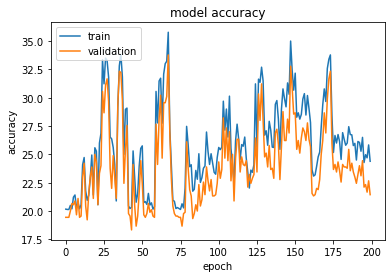

Maximum Train Accuracy : 35.77777862548828
Maximum Validation Accuracy : 33.77777862548828


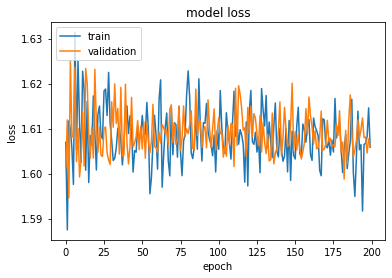

Minimum Train Loss : 1.5874717235565186
Minimum Validation Loss : 1.5946099758148193


In [ ]:
Bacteria_model_amp_SGD_0001 = Bact_Net()
Bacteria_model_amp_SGD_0001.cuda()
trainer_SGD_amp_0001 = trainer(Bacteria_model_amp_SGD_0001, amp_train_loader,"SGD", epoch_size=200, learning_rate=0.001)
trainer_SGD_amp_0001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_SGD_amp_0001.history['train_acc'])
plt.plot(trainer_SGD_amp_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_SGD_amp_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_SGD_amp_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_SGD_amp_0001.history['train_loss'])
plt.plot(trainer_SGD_amp_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_SGD_amp_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_SGD_amp_0001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 20.861111


  0%|          | 1/200 [00:15<51:01, 15.39s/it]

Val Acc | Epoch 1/200 | ACC 20.222223
Train Acc | Epoch 2/200 | ACC 19.222221


  1%|          | 2/200 [00:30<50:02, 15.16s/it]

Val Acc | Epoch 2/200 | ACC 20.333334
Train Acc | Epoch 3/200 | ACC 18.722223


  2%|▏         | 3/200 [00:45<50:02, 15.24s/it]

Val Acc | Epoch 3/200 | ACC 18.888889
Train Acc | Epoch 4/200 | ACC 17.500000


  2%|▏         | 4/200 [01:01<49:52, 15.27s/it]

Val Acc | Epoch 4/200 | ACC 19.222221
Train Acc | Epoch 5/200 | ACC 18.055557


  2%|▎         | 5/200 [01:16<49:32, 15.24s/it]

Val Acc | Epoch 5/200 | ACC 19.222221
Train Acc | Epoch 6/200 | ACC 17.694445


  3%|▎         | 6/200 [01:32<50:04, 15.49s/it]

Val Acc | Epoch 6/200 | ACC 17.333334
Train Acc | Epoch 7/200 | ACC 18.277779


  4%|▎         | 7/200 [01:47<49:55, 15.52s/it]

Val Acc | Epoch 7/200 | ACC 20.111113
Train Acc | Epoch 8/200 | ACC 17.694445


  4%|▍         | 8/200 [02:02<49:19, 15.41s/it]

Val Acc | Epoch 8/200 | ACC 19.555557
Train Acc | Epoch 9/200 | ACC 19.222221


  4%|▍         | 9/200 [02:18<48:51, 15.35s/it]

Val Acc | Epoch 9/200 | ACC 19.777779
Train Acc | Epoch 10/200 | ACC 18.750000


  5%|▌         | 10/200 [02:33<48:15, 15.24s/it]

Val Acc | Epoch 10/200 | ACC 19.888889
Train Acc | Epoch 11/200 | ACC 18.277779


  6%|▌         | 11/200 [02:48<48:01, 15.24s/it]

Val Acc | Epoch 11/200 | ACC 19.888889
Train Acc | Epoch 12/200 | ACC 18.388889


  6%|▌         | 12/200 [03:03<47:38, 15.20s/it]

Val Acc | Epoch 12/200 | ACC 20.444445
Train Acc | Epoch 13/200 | ACC 18.277779


  6%|▋         | 13/200 [03:18<47:15, 15.16s/it]

Val Acc | Epoch 13/200 | ACC 17.888889
Train Acc | Epoch 14/200 | ACC 18.166668


  7%|▋         | 14/200 [03:33<47:12, 15.23s/it]

Val Acc | Epoch 14/200 | ACC 19.444445
Train Acc | Epoch 15/200 | ACC 18.611113


  8%|▊         | 15/200 [03:49<46:56, 15.22s/it]

Val Acc | Epoch 15/200 | ACC 18.111111
Train Acc | Epoch 16/200 | ACC 17.750000


  8%|▊         | 16/200 [04:04<46:29, 15.16s/it]

Val Acc | Epoch 16/200 | ACC 19.111113
Train Acc | Epoch 17/200 | ACC 18.138889


  8%|▊         | 17/200 [04:19<46:10, 15.14s/it]

Val Acc | Epoch 17/200 | ACC 19.777779
Train Acc | Epoch 18/200 | ACC 17.888889


  9%|▉         | 18/200 [04:34<45:49, 15.11s/it]

Val Acc | Epoch 18/200 | ACC 19.333334
Train Acc | Epoch 19/200 | ACC 19.000000


 10%|▉         | 19/200 [04:49<45:26, 15.06s/it]

Val Acc | Epoch 19/200 | ACC 18.444445
Train Acc | Epoch 20/200 | ACC 18.833334


 10%|█         | 20/200 [05:04<45:32, 15.18s/it]

Val Acc | Epoch 20/200 | ACC 18.222223
Train Acc | Epoch 21/200 | ACC 19.500000


 10%|█         | 21/200 [05:19<45:01, 15.09s/it]

Val Acc | Epoch 21/200 | ACC 20.666668
Train Acc | Epoch 22/200 | ACC 18.166668


 11%|█         | 22/200 [05:34<44:46, 15.09s/it]

Val Acc | Epoch 22/200 | ACC 20.888889
Train Acc | Epoch 23/200 | ACC 18.583334


 12%|█▏        | 23/200 [05:49<44:15, 15.00s/it]

Val Acc | Epoch 23/200 | ACC 17.666668
Train Acc | Epoch 24/200 | ACC 18.583334


 12%|█▏        | 24/200 [06:04<44:09, 15.05s/it]

Val Acc | Epoch 24/200 | ACC 19.333334
Train Acc | Epoch 25/200 | ACC 18.333334


 12%|█▎        | 25/200 [06:19<44:02, 15.10s/it]

Val Acc | Epoch 25/200 | ACC 18.555555
Train Acc | Epoch 26/200 | ACC 17.972221


 13%|█▎        | 26/200 [06:35<43:53, 15.14s/it]

Val Acc | Epoch 26/200 | ACC 19.111113
Train Acc | Epoch 27/200 | ACC 18.305557


 14%|█▎        | 27/200 [06:51<44:16, 15.36s/it]

Val Acc | Epoch 27/200 | ACC 16.444445
Train Acc | Epoch 28/200 | ACC 18.194445


 14%|█▍        | 28/200 [07:05<43:33, 15.19s/it]

Val Acc | Epoch 28/200 | ACC 20.333334
Train Acc | Epoch 29/200 | ACC 18.750000


 14%|█▍        | 29/200 [07:20<43:11, 15.15s/it]

Val Acc | Epoch 29/200 | ACC 19.333334
Train Acc | Epoch 30/200 | ACC 18.722223


 15%|█▌        | 30/200 [07:35<42:43, 15.08s/it]

Val Acc | Epoch 30/200 | ACC 18.333334
Train Acc | Epoch 31/200 | ACC 18.666666


 16%|█▌        | 31/200 [07:50<42:24, 15.06s/it]

Val Acc | Epoch 31/200 | ACC 19.222221
Train Acc | Epoch 32/200 | ACC 19.222221


 16%|█▌        | 32/200 [08:05<41:57, 14.99s/it]

Val Acc | Epoch 32/200 | ACC 19.777779
Train Acc | Epoch 33/200 | ACC 19.750000


 16%|█▋        | 33/200 [08:20<41:39, 14.97s/it]

Val Acc | Epoch 33/200 | ACC 19.444445
Train Acc | Epoch 34/200 | ACC 19.222221


 17%|█▋        | 34/200 [08:35<41:23, 14.96s/it]

Val Acc | Epoch 34/200 | ACC 20.444445
Train Acc | Epoch 35/200 | ACC 19.833334


 18%|█▊        | 35/200 [08:50<40:54, 14.88s/it]

Val Acc | Epoch 35/200 | ACC 19.333334
Train Acc | Epoch 36/200 | ACC 18.916666


 18%|█▊        | 36/200 [09:04<40:33, 14.84s/it]

Val Acc | Epoch 36/200 | ACC 20.000000
Train Acc | Epoch 37/200 | ACC 19.500000


 18%|█▊        | 37/200 [09:19<40:15, 14.82s/it]

Val Acc | Epoch 37/200 | ACC 19.777779
Train Acc | Epoch 38/200 | ACC 20.000000


 19%|█▉        | 38/200 [09:34<40:11, 14.89s/it]

Val Acc | Epoch 38/200 | ACC 19.666668
Train Acc | Epoch 39/200 | ACC 19.972223


 20%|█▉        | 39/200 [09:49<40:00, 14.91s/it]

Val Acc | Epoch 39/200 | ACC 19.444445
Train Acc | Epoch 40/200 | ACC 19.694445


 20%|██        | 40/200 [10:04<39:54, 14.97s/it]

Val Acc | Epoch 40/200 | ACC 19.777779
Train Acc | Epoch 41/200 | ACC 19.638889


 20%|██        | 41/200 [10:19<39:50, 15.03s/it]

Val Acc | Epoch 41/200 | ACC 20.000000
Train Acc | Epoch 42/200 | ACC 19.944445


 21%|██        | 42/200 [10:35<40:10, 15.26s/it]

Val Acc | Epoch 42/200 | ACC 20.000000
Train Acc | Epoch 43/200 | ACC 19.777779


 22%|██▏       | 43/200 [10:50<39:50, 15.22s/it]

Val Acc | Epoch 43/200 | ACC 20.222223
Train Acc | Epoch 44/200 | ACC 19.722223


 22%|██▏       | 44/200 [11:06<39:38, 15.25s/it]

Val Acc | Epoch 44/200 | ACC 19.888889
Train Acc | Epoch 45/200 | ACC 19.694445


 22%|██▎       | 45/200 [11:21<39:17, 15.21s/it]

Val Acc | Epoch 45/200 | ACC 19.444445
Train Acc | Epoch 46/200 | ACC 19.694445


 23%|██▎       | 46/200 [11:36<38:57, 15.18s/it]

Val Acc | Epoch 46/200 | ACC 20.111113
Train Acc | Epoch 47/200 | ACC 19.916668


 24%|██▎       | 47/200 [11:51<38:51, 15.24s/it]

Val Acc | Epoch 47/200 | ACC 19.666668
Train Acc | Epoch 48/200 | ACC 19.666668


 24%|██▍       | 48/200 [12:07<38:46, 15.31s/it]

Val Acc | Epoch 48/200 | ACC 19.888889
Train Acc | Epoch 49/200 | ACC 19.666668


 24%|██▍       | 49/200 [12:22<38:25, 15.27s/it]

Val Acc | Epoch 49/200 | ACC 20.222223
Train Acc | Epoch 50/200 | ACC 20.000000


 25%|██▌       | 50/200 [12:37<38:11, 15.28s/it]

Val Acc | Epoch 50/200 | ACC 19.888889
Train Acc | Epoch 51/200 | ACC 19.333334


 26%|██▌       | 51/200 [12:53<38:03, 15.32s/it]

Val Acc | Epoch 51/200 | ACC 20.222223
Train Acc | Epoch 52/200 | ACC 19.527779


 26%|██▌       | 52/200 [13:08<37:37, 15.25s/it]

Val Acc | Epoch 52/200 | ACC 20.333334
Train Acc | Epoch 53/200 | ACC 20.027777


 26%|██▋       | 53/200 [13:23<37:20, 15.24s/it]

Val Acc | Epoch 53/200 | ACC 19.444445
Train Acc | Epoch 54/200 | ACC 19.694445


 27%|██▋       | 54/200 [13:38<36:40, 15.07s/it]

Val Acc | Epoch 54/200 | ACC 19.888889
Train Acc | Epoch 55/200 | ACC 19.583334


 28%|██▊       | 55/200 [13:53<36:31, 15.11s/it]

Val Acc | Epoch 55/200 | ACC 20.111113
Train Acc | Epoch 56/200 | ACC 19.833334


 28%|██▊       | 56/200 [14:08<36:10, 15.08s/it]

Val Acc | Epoch 56/200 | ACC 20.111113
Train Acc | Epoch 57/200 | ACC 19.888889


 28%|██▊       | 57/200 [14:23<36:05, 15.14s/it]

Val Acc | Epoch 57/200 | ACC 20.000000
Train Acc | Epoch 58/200 | ACC 19.944445


 29%|██▉       | 58/200 [14:38<35:47, 15.12s/it]

Val Acc | Epoch 58/200 | ACC 20.000000
Train Acc | Epoch 59/200 | ACC 19.833334


 30%|██▉       | 59/200 [14:53<35:21, 15.05s/it]

Val Acc | Epoch 59/200 | ACC 20.111113
Train Acc | Epoch 60/200 | ACC 19.861111


 30%|███       | 60/200 [15:08<35:12, 15.09s/it]

Val Acc | Epoch 60/200 | ACC 19.888889
Train Acc | Epoch 61/200 | ACC 19.888889


 30%|███       | 61/200 [15:24<35:10, 15.18s/it]

Val Acc | Epoch 61/200 | ACC 20.111113
Train Acc | Epoch 62/200 | ACC 19.861111


 31%|███       | 62/200 [15:39<35:01, 15.23s/it]

Val Acc | Epoch 62/200 | ACC 19.777779
Train Acc | Epoch 63/200 | ACC 19.833334


 32%|███▏      | 63/200 [15:54<34:46, 15.23s/it]

Val Acc | Epoch 63/200 | ACC 20.000000
Train Acc | Epoch 64/200 | ACC 19.833334


 32%|███▏      | 64/200 [16:09<34:26, 15.20s/it]

Val Acc | Epoch 64/200 | ACC 20.111113
Train Acc | Epoch 65/200 | ACC 19.833334


 32%|███▎      | 65/200 [16:24<34:02, 15.13s/it]

Val Acc | Epoch 65/200 | ACC 20.000000
Train Acc | Epoch 66/200 | ACC 19.944445


 33%|███▎      | 66/200 [16:40<33:57, 15.20s/it]

Val Acc | Epoch 66/200 | ACC 20.111113
Train Acc | Epoch 67/200 | ACC 19.944445


 34%|███▎      | 67/200 [16:55<33:40, 15.19s/it]

Val Acc | Epoch 67/200 | ACC 20.222223
Train Acc | Epoch 68/200 | ACC 19.916668


 34%|███▍      | 68/200 [17:11<34:03, 15.48s/it]

Val Acc | Epoch 68/200 | ACC 20.111113
Train Acc | Epoch 69/200 | ACC 19.972223


 34%|███▍      | 69/200 [17:26<33:35, 15.38s/it]

Val Acc | Epoch 69/200 | ACC 20.111113
Train Acc | Epoch 70/200 | ACC 19.972223


 35%|███▌      | 70/200 [17:42<33:26, 15.43s/it]

Val Acc | Epoch 70/200 | ACC 20.111113
Train Acc | Epoch 71/200 | ACC 19.944445


 36%|███▌      | 71/200 [17:57<32:54, 15.31s/it]

Val Acc | Epoch 71/200 | ACC 20.111113
Train Acc | Epoch 72/200 | ACC 19.972223


 36%|███▌      | 72/200 [18:12<32:27, 15.22s/it]

Val Acc | Epoch 72/200 | ACC 20.000000
Train Acc | Epoch 73/200 | ACC 19.972223


 36%|███▋      | 73/200 [18:27<32:01, 15.13s/it]

Val Acc | Epoch 73/200 | ACC 20.000000
Train Acc | Epoch 74/200 | ACC 19.972223


 37%|███▋      | 74/200 [18:42<31:54, 15.19s/it]

Val Acc | Epoch 74/200 | ACC 20.111113
Train Acc | Epoch 75/200 | ACC 19.972223


 38%|███▊      | 75/200 [18:57<31:25, 15.08s/it]

Val Acc | Epoch 75/200 | ACC 20.111113
Train Acc | Epoch 76/200 | ACC 19.972223


 38%|███▊      | 76/200 [19:12<31:10, 15.09s/it]

Val Acc | Epoch 76/200 | ACC 20.111113
Train Acc | Epoch 77/200 | ACC 19.972223


 38%|███▊      | 77/200 [19:27<31:00, 15.12s/it]

Val Acc | Epoch 77/200 | ACC 20.111113
Train Acc | Epoch 78/200 | ACC 19.944445


 39%|███▉      | 78/200 [19:42<30:50, 15.17s/it]

Val Acc | Epoch 78/200 | ACC 20.111113
Train Acc | Epoch 79/200 | ACC 19.972223


 40%|███▉      | 79/200 [19:58<30:31, 15.13s/it]

Val Acc | Epoch 79/200 | ACC 20.111113
Train Acc | Epoch 80/200 | ACC 19.916668


 40%|████      | 80/200 [20:13<30:20, 15.17s/it]

Val Acc | Epoch 80/200 | ACC 20.111113
Train Acc | Epoch 81/200 | ACC 19.972223


 40%|████      | 81/200 [20:28<30:09, 15.21s/it]

Val Acc | Epoch 81/200 | ACC 20.111113
Train Acc | Epoch 82/200 | ACC 19.972223


 41%|████      | 82/200 [20:43<29:49, 15.17s/it]

Val Acc | Epoch 82/200 | ACC 20.111113
Train Acc | Epoch 83/200 | ACC 19.916668


 42%|████▏     | 83/200 [20:59<29:44, 15.26s/it]

Val Acc | Epoch 83/200 | ACC 20.111113
Train Acc | Epoch 84/200 | ACC 19.944445


 42%|████▏     | 84/200 [21:14<29:20, 15.18s/it]

Val Acc | Epoch 84/200 | ACC 20.111113
Train Acc | Epoch 85/200 | ACC 19.972223


 42%|████▎     | 85/200 [21:29<28:58, 15.12s/it]

Val Acc | Epoch 85/200 | ACC 20.111113
Train Acc | Epoch 86/200 | ACC 19.972223


 43%|████▎     | 86/200 [21:44<28:50, 15.18s/it]

Val Acc | Epoch 86/200 | ACC 20.111113
Train Acc | Epoch 87/200 | ACC 19.861111


 44%|████▎     | 87/200 [21:59<28:36, 15.19s/it]

Val Acc | Epoch 87/200 | ACC 20.111113
Train Acc | Epoch 88/200 | ACC 19.888889


 44%|████▍     | 88/200 [22:15<28:57, 15.51s/it]

Val Acc | Epoch 88/200 | ACC 20.222223
Train Acc | Epoch 89/200 | ACC 19.916668


 44%|████▍     | 89/200 [22:30<28:18, 15.30s/it]

Val Acc | Epoch 89/200 | ACC 20.111113
Train Acc | Epoch 90/200 | ACC 19.916668


 45%|████▌     | 90/200 [22:45<28:00, 15.28s/it]

Val Acc | Epoch 90/200 | ACC 20.222223
Train Acc | Epoch 91/200 | ACC 19.944445


 46%|████▌     | 91/200 [23:00<27:31, 15.15s/it]

Val Acc | Epoch 91/200 | ACC 20.111113
Train Acc | Epoch 92/200 | ACC 19.972223


 46%|████▌     | 92/200 [23:16<27:19, 15.18s/it]

Val Acc | Epoch 92/200 | ACC 20.000000
Train Acc | Epoch 93/200 | ACC 19.972223


 46%|████▋     | 93/200 [23:31<26:59, 15.14s/it]

Val Acc | Epoch 93/200 | ACC 20.111113
Train Acc | Epoch 94/200 | ACC 19.944445


 47%|████▋     | 94/200 [23:46<26:43, 15.13s/it]

Val Acc | Epoch 94/200 | ACC 20.111113
Train Acc | Epoch 95/200 | ACC 19.972223


 48%|████▊     | 95/200 [24:01<26:22, 15.07s/it]

Val Acc | Epoch 95/200 | ACC 20.111113
Train Acc | Epoch 96/200 | ACC 19.972223


 48%|████▊     | 96/200 [24:15<25:58, 14.99s/it]

Val Acc | Epoch 96/200 | ACC 20.111113
Train Acc | Epoch 97/200 | ACC 19.972223


 48%|████▊     | 97/200 [24:30<25:42, 14.98s/it]

Val Acc | Epoch 97/200 | ACC 20.111113
Train Acc | Epoch 98/200 | ACC 19.972223


 49%|████▉     | 98/200 [24:45<25:27, 14.97s/it]

Val Acc | Epoch 98/200 | ACC 20.111113
Train Acc | Epoch 99/200 | ACC 19.972223


 50%|████▉     | 99/200 [25:00<25:09, 14.94s/it]

Val Acc | Epoch 99/200 | ACC 20.111113
Train Acc | Epoch 100/200 | ACC 19.972223


 50%|█████     | 100/200 [25:15<24:57, 14.97s/it]

Val Acc | Epoch 100/200 | ACC 20.111113
Train Acc | Epoch 101/200 | ACC 19.972223


 50%|█████     | 101/200 [25:30<24:48, 15.04s/it]

Val Acc | Epoch 101/200 | ACC 20.111113
Train Acc | Epoch 102/200 | ACC 19.972223


 51%|█████     | 102/200 [25:45<24:34, 15.05s/it]

Val Acc | Epoch 102/200 | ACC 20.111113
Train Acc | Epoch 103/200 | ACC 19.972223


 52%|█████▏    | 103/200 [26:01<24:18, 15.04s/it]

Val Acc | Epoch 103/200 | ACC 20.111113
Train Acc | Epoch 104/200 | ACC 19.972223


 52%|█████▏    | 104/200 [26:15<23:59, 15.00s/it]

Val Acc | Epoch 104/200 | ACC 20.111113
Train Acc | Epoch 105/200 | ACC 19.972223


 52%|█████▎    | 105/200 [26:30<23:45, 15.01s/it]

Val Acc | Epoch 105/200 | ACC 20.111113
Train Acc | Epoch 106/200 | ACC 19.972223


 53%|█████▎    | 106/200 [26:45<23:26, 14.96s/it]

Val Acc | Epoch 106/200 | ACC 20.111113
Train Acc | Epoch 107/200 | ACC 19.972223


 54%|█████▎    | 107/200 [27:00<23:09, 14.94s/it]

Val Acc | Epoch 107/200 | ACC 20.111113
Train Acc | Epoch 108/200 | ACC 19.972223


 54%|█████▍    | 108/200 [27:16<23:05, 15.06s/it]

Val Acc | Epoch 108/200 | ACC 20.111113
Train Acc | Epoch 109/200 | ACC 19.972223


 55%|█████▍    | 109/200 [27:31<23:08, 15.26s/it]

Val Acc | Epoch 109/200 | ACC 20.111113
Train Acc | Epoch 110/200 | ACC 19.972223


 55%|█████▌    | 110/200 [27:46<22:44, 15.17s/it]

Val Acc | Epoch 110/200 | ACC 20.111113
Train Acc | Epoch 111/200 | ACC 19.972223


 56%|█████▌    | 111/200 [28:01<22:29, 15.16s/it]

Val Acc | Epoch 111/200 | ACC 20.111113
Train Acc | Epoch 112/200 | ACC 19.972223


 56%|█████▌    | 112/200 [28:17<22:17, 15.20s/it]

Val Acc | Epoch 112/200 | ACC 20.111113
Train Acc | Epoch 113/200 | ACC 19.972223


 56%|█████▋    | 113/200 [28:31<21:49, 15.05s/it]

Val Acc | Epoch 113/200 | ACC 20.111113
Train Acc | Epoch 114/200 | ACC 19.972223


 57%|█████▋    | 114/200 [28:46<21:27, 14.97s/it]

Val Acc | Epoch 114/200 | ACC 20.111113
Train Acc | Epoch 115/200 | ACC 19.972223


 57%|█████▊    | 115/200 [29:01<21:10, 14.94s/it]

Val Acc | Epoch 115/200 | ACC 20.111113
Train Acc | Epoch 116/200 | ACC 19.972223


 58%|█████▊    | 116/200 [29:16<20:58, 14.98s/it]

Val Acc | Epoch 116/200 | ACC 20.111113
Train Acc | Epoch 117/200 | ACC 19.972223


 58%|█████▊    | 117/200 [29:31<20:44, 15.00s/it]

Val Acc | Epoch 117/200 | ACC 20.111113
Train Acc | Epoch 118/200 | ACC 19.972223


 59%|█████▉    | 118/200 [29:46<20:31, 15.02s/it]

Val Acc | Epoch 118/200 | ACC 20.111113
Train Acc | Epoch 119/200 | ACC 19.972223


 60%|█████▉    | 119/200 [30:01<20:11, 14.96s/it]

Val Acc | Epoch 119/200 | ACC 20.111113
Train Acc | Epoch 120/200 | ACC 19.972223


 60%|██████    | 120/200 [30:16<19:58, 14.99s/it]

Val Acc | Epoch 120/200 | ACC 20.111113
Train Acc | Epoch 121/200 | ACC 19.972223


 60%|██████    | 121/200 [30:31<19:45, 15.00s/it]

Val Acc | Epoch 121/200 | ACC 20.111113
Train Acc | Epoch 122/200 | ACC 19.972223


 61%|██████    | 122/200 [30:46<19:30, 15.01s/it]

Val Acc | Epoch 122/200 | ACC 20.111113
Train Acc | Epoch 123/200 | ACC 19.972223


 62%|██████▏   | 123/200 [31:01<19:11, 14.96s/it]

Val Acc | Epoch 123/200 | ACC 20.111113
Train Acc | Epoch 124/200 | ACC 19.972223


 62%|██████▏   | 124/200 [31:16<19:00, 15.01s/it]

Val Acc | Epoch 124/200 | ACC 20.111113
Train Acc | Epoch 125/200 | ACC 19.972223


 62%|██████▎   | 125/200 [31:31<18:47, 15.04s/it]

Val Acc | Epoch 125/200 | ACC 20.111113
Train Acc | Epoch 126/200 | ACC 19.972223


 63%|██████▎   | 126/200 [31:46<18:24, 14.93s/it]

Val Acc | Epoch 126/200 | ACC 20.111113
Train Acc | Epoch 127/200 | ACC 19.972223


 64%|██████▎   | 127/200 [32:01<18:15, 15.01s/it]

Val Acc | Epoch 127/200 | ACC 20.111113
Train Acc | Epoch 128/200 | ACC 19.972223


 64%|██████▍   | 128/200 [32:16<17:52, 14.90s/it]

Val Acc | Epoch 128/200 | ACC 20.111113
Train Acc | Epoch 129/200 | ACC 19.972223


 64%|██████▍   | 129/200 [32:31<17:46, 15.02s/it]

Val Acc | Epoch 129/200 | ACC 20.111113
Train Acc | Epoch 130/200 | ACC 19.972223


 65%|██████▌   | 130/200 [32:46<17:40, 15.15s/it]

Val Acc | Epoch 130/200 | ACC 20.111113
Train Acc | Epoch 131/200 | ACC 19.972223


 66%|██████▌   | 131/200 [33:01<17:15, 15.00s/it]

Val Acc | Epoch 131/200 | ACC 20.111113
Train Acc | Epoch 132/200 | ACC 19.972223


 66%|██████▌   | 132/200 [33:16<16:58, 14.97s/it]

Val Acc | Epoch 132/200 | ACC 20.111113
Train Acc | Epoch 133/200 | ACC 19.972223


 66%|██████▋   | 133/200 [33:31<16:36, 14.88s/it]

Val Acc | Epoch 133/200 | ACC 20.111113
Train Acc | Epoch 134/200 | ACC 19.972223


 67%|██████▋   | 134/200 [33:45<16:18, 14.83s/it]

Val Acc | Epoch 134/200 | ACC 20.111113
Train Acc | Epoch 135/200 | ACC 19.972223


 68%|██████▊   | 135/200 [34:00<16:03, 14.82s/it]

Val Acc | Epoch 135/200 | ACC 20.111113
Train Acc | Epoch 136/200 | ACC 19.972223


 68%|██████▊   | 136/200 [34:15<15:49, 14.83s/it]

Val Acc | Epoch 136/200 | ACC 20.111113
Train Acc | Epoch 137/200 | ACC 19.972223


 68%|██████▊   | 137/200 [34:30<15:36, 14.86s/it]

Val Acc | Epoch 137/200 | ACC 20.111113
Train Acc | Epoch 138/200 | ACC 19.972223


 69%|██████▉   | 138/200 [34:45<15:16, 14.78s/it]

Val Acc | Epoch 138/200 | ACC 20.111113
Train Acc | Epoch 139/200 | ACC 19.972223


 70%|██████▉   | 139/200 [35:00<15:06, 14.87s/it]

Val Acc | Epoch 139/200 | ACC 20.111113
Train Acc | Epoch 140/200 | ACC 19.972223


 70%|███████   | 140/200 [35:14<14:43, 14.73s/it]

Val Acc | Epoch 140/200 | ACC 20.111113
Train Acc | Epoch 141/200 | ACC 19.972223


 70%|███████   | 141/200 [35:29<14:33, 14.80s/it]

Val Acc | Epoch 141/200 | ACC 20.111113
Train Acc | Epoch 142/200 | ACC 19.972223


 71%|███████   | 142/200 [35:44<14:17, 14.78s/it]

Val Acc | Epoch 142/200 | ACC 20.111113
Train Acc | Epoch 143/200 | ACC 19.972223


 72%|███████▏  | 143/200 [35:58<13:57, 14.69s/it]

Val Acc | Epoch 143/200 | ACC 20.111113
Train Acc | Epoch 144/200 | ACC 19.972223


 72%|███████▏  | 144/200 [36:13<13:44, 14.72s/it]

Val Acc | Epoch 144/200 | ACC 20.111113
Train Acc | Epoch 145/200 | ACC 19.972223


 72%|███████▎  | 145/200 [36:28<13:31, 14.75s/it]

Val Acc | Epoch 145/200 | ACC 20.111113
Train Acc | Epoch 146/200 | ACC 19.972223


 73%|███████▎  | 146/200 [36:43<13:18, 14.80s/it]

Val Acc | Epoch 146/200 | ACC 20.111113
Train Acc | Epoch 147/200 | ACC 19.972223


 74%|███████▎  | 147/200 [36:58<13:09, 14.90s/it]

Val Acc | Epoch 147/200 | ACC 20.111113
Train Acc | Epoch 148/200 | ACC 19.972223


 74%|███████▍  | 148/200 [37:13<12:59, 14.98s/it]

Val Acc | Epoch 148/200 | ACC 20.111113
Train Acc | Epoch 149/200 | ACC 19.972223


 74%|███████▍  | 149/200 [37:28<12:47, 15.05s/it]

Val Acc | Epoch 149/200 | ACC 20.111113
Train Acc | Epoch 150/200 | ACC 19.972223


 75%|███████▌  | 150/200 [37:44<12:37, 15.16s/it]

Val Acc | Epoch 150/200 | ACC 20.111113
Train Acc | Epoch 151/200 | ACC 19.972223


 76%|███████▌  | 151/200 [37:59<12:21, 15.14s/it]

Val Acc | Epoch 151/200 | ACC 20.111113
Train Acc | Epoch 152/200 | ACC 19.972223


 76%|███████▌  | 152/200 [38:14<12:05, 15.11s/it]

Val Acc | Epoch 152/200 | ACC 20.111113
Train Acc | Epoch 153/200 | ACC 19.972223


 76%|███████▋  | 153/200 [38:29<11:45, 15.02s/it]

Val Acc | Epoch 153/200 | ACC 20.111113
Train Acc | Epoch 154/200 | ACC 19.972223


 77%|███████▋  | 154/200 [38:44<11:35, 15.13s/it]

Val Acc | Epoch 154/200 | ACC 20.111113
Train Acc | Epoch 155/200 | ACC 19.972223


 78%|███████▊  | 155/200 [38:59<11:16, 15.04s/it]

Val Acc | Epoch 155/200 | ACC 20.111113
Train Acc | Epoch 156/200 | ACC 19.972223


 78%|███████▊  | 156/200 [39:14<10:59, 15.00s/it]

Val Acc | Epoch 156/200 | ACC 20.111113
Train Acc | Epoch 157/200 | ACC 19.972223


 78%|███████▊  | 157/200 [39:28<10:42, 14.93s/it]

Val Acc | Epoch 157/200 | ACC 20.111113
Train Acc | Epoch 158/200 | ACC 19.972223


 79%|███████▉  | 158/200 [39:43<10:22, 14.82s/it]

Val Acc | Epoch 158/200 | ACC 20.111113
Train Acc | Epoch 159/200 | ACC 19.972223


 80%|███████▉  | 159/200 [39:58<10:07, 14.83s/it]

Val Acc | Epoch 159/200 | ACC 20.111113
Train Acc | Epoch 160/200 | ACC 19.972223


 80%|████████  | 160/200 [40:13<09:52, 14.81s/it]

Val Acc | Epoch 160/200 | ACC 20.111113
Train Acc | Epoch 161/200 | ACC 19.972223


 80%|████████  | 161/200 [40:28<09:39, 14.85s/it]

Val Acc | Epoch 161/200 | ACC 20.111113
Train Acc | Epoch 162/200 | ACC 19.972223


 81%|████████  | 162/200 [40:42<09:21, 14.78s/it]

Val Acc | Epoch 162/200 | ACC 20.111113
Train Acc | Epoch 163/200 | ACC 19.972223


 82%|████████▏ | 163/200 [40:57<09:05, 14.76s/it]

Val Acc | Epoch 163/200 | ACC 20.111113
Train Acc | Epoch 164/200 | ACC 19.972223


 82%|████████▏ | 164/200 [41:12<08:57, 14.92s/it]

Val Acc | Epoch 164/200 | ACC 20.111113
Train Acc | Epoch 165/200 | ACC 19.972223


 82%|████████▎ | 165/200 [41:27<08:39, 14.84s/it]

Val Acc | Epoch 165/200 | ACC 20.111113
Train Acc | Epoch 166/200 | ACC 19.972223


 83%|████████▎ | 166/200 [41:42<08:25, 14.86s/it]

Val Acc | Epoch 166/200 | ACC 20.111113
Train Acc | Epoch 167/200 | ACC 19.972223


 84%|████████▎ | 167/200 [41:57<08:10, 14.86s/it]

Val Acc | Epoch 167/200 | ACC 20.111113
Train Acc | Epoch 168/200 | ACC 19.972223


 84%|████████▍ | 168/200 [42:12<07:57, 14.92s/it]

Val Acc | Epoch 168/200 | ACC 20.111113
Train Acc | Epoch 169/200 | ACC 19.972223


 84%|████████▍ | 169/200 [42:27<07:41, 14.90s/it]

Val Acc | Epoch 169/200 | ACC 20.111113
Train Acc | Epoch 170/200 | ACC 19.972223


 85%|████████▌ | 170/200 [42:41<07:25, 14.87s/it]

Val Acc | Epoch 170/200 | ACC 20.111113
Train Acc | Epoch 171/200 | ACC 19.972223


 86%|████████▌ | 171/200 [42:57<07:18, 15.13s/it]

Val Acc | Epoch 171/200 | ACC 20.111113
Train Acc | Epoch 172/200 | ACC 19.972223


 86%|████████▌ | 172/200 [43:12<07:01, 15.04s/it]

Val Acc | Epoch 172/200 | ACC 20.111113
Train Acc | Epoch 173/200 | ACC 19.972223


 86%|████████▋ | 173/200 [43:27<06:42, 14.91s/it]

Val Acc | Epoch 173/200 | ACC 20.111113
Train Acc | Epoch 174/200 | ACC 19.972223


 87%|████████▋ | 174/200 [43:41<06:25, 14.84s/it]

Val Acc | Epoch 174/200 | ACC 20.111113
Train Acc | Epoch 175/200 | ACC 19.972223


 88%|████████▊ | 175/200 [43:56<06:11, 14.85s/it]

Val Acc | Epoch 175/200 | ACC 20.111113
Train Acc | Epoch 176/200 | ACC 19.972223


 88%|████████▊ | 176/200 [44:11<05:54, 14.77s/it]

Val Acc | Epoch 176/200 | ACC 20.111113
Train Acc | Epoch 177/200 | ACC 19.972223


 88%|████████▊ | 177/200 [44:25<05:37, 14.68s/it]

Val Acc | Epoch 177/200 | ACC 20.111113
Train Acc | Epoch 178/200 | ACC 19.972223


 89%|████████▉ | 178/200 [44:40<05:25, 14.80s/it]

Val Acc | Epoch 178/200 | ACC 20.111113
Train Acc | Epoch 179/200 | ACC 19.972223


 90%|████████▉ | 179/200 [44:55<05:09, 14.72s/it]

Val Acc | Epoch 179/200 | ACC 20.111113
Train Acc | Epoch 180/200 | ACC 19.972223


 90%|█████████ | 180/200 [45:09<04:53, 14.67s/it]

Val Acc | Epoch 180/200 | ACC 20.111113
Train Acc | Epoch 181/200 | ACC 19.972223


 90%|█████████ | 181/200 [45:24<04:39, 14.69s/it]

Val Acc | Epoch 181/200 | ACC 20.111113
Train Acc | Epoch 182/200 | ACC 19.972223


 91%|█████████ | 182/200 [45:39<04:25, 14.74s/it]

Val Acc | Epoch 182/200 | ACC 20.111113
Train Acc | Epoch 183/200 | ACC 19.972223


 92%|█████████▏| 183/200 [45:53<04:09, 14.69s/it]

Val Acc | Epoch 183/200 | ACC 20.111113
Train Acc | Epoch 184/200 | ACC 19.972223


 92%|█████████▏| 184/200 [46:08<03:54, 14.67s/it]

Val Acc | Epoch 184/200 | ACC 20.111113
Train Acc | Epoch 185/200 | ACC 19.972223


 92%|█████████▎| 185/200 [46:23<03:39, 14.61s/it]

Val Acc | Epoch 185/200 | ACC 20.111113
Train Acc | Epoch 186/200 | ACC 19.972223


 93%|█████████▎| 186/200 [46:37<03:24, 14.58s/it]

Val Acc | Epoch 186/200 | ACC 20.111113
Train Acc | Epoch 187/200 | ACC 19.972223


 94%|█████████▎| 187/200 [46:52<03:09, 14.55s/it]

Val Acc | Epoch 187/200 | ACC 20.111113
Train Acc | Epoch 188/200 | ACC 19.972223


 94%|█████████▍| 188/200 [47:06<02:54, 14.55s/it]

Val Acc | Epoch 188/200 | ACC 20.111113
Train Acc | Epoch 189/200 | ACC 19.972223


 94%|█████████▍| 189/200 [47:20<02:38, 14.45s/it]

Val Acc | Epoch 189/200 | ACC 20.111113
Train Acc | Epoch 190/200 | ACC 19.972223


 95%|█████████▌| 190/200 [47:35<02:24, 14.49s/it]

Val Acc | Epoch 190/200 | ACC 20.111113
Train Acc | Epoch 191/200 | ACC 19.972223


 96%|█████████▌| 191/200 [47:49<02:10, 14.52s/it]

Val Acc | Epoch 191/200 | ACC 20.111113
Train Acc | Epoch 192/200 | ACC 19.972223


 96%|█████████▌| 192/200 [48:04<01:57, 14.64s/it]

Val Acc | Epoch 192/200 | ACC 20.111113
Train Acc | Epoch 193/200 | ACC 19.972223


 96%|█████████▋| 193/200 [48:19<01:42, 14.64s/it]

Val Acc | Epoch 193/200 | ACC 20.111113
Train Acc | Epoch 194/200 | ACC 19.972223


 97%|█████████▋| 194/200 [48:34<01:27, 14.60s/it]

Val Acc | Epoch 194/200 | ACC 20.111113
Train Acc | Epoch 195/200 | ACC 19.972223


 98%|█████████▊| 195/200 [48:48<01:12, 14.46s/it]

Val Acc | Epoch 195/200 | ACC 20.111113
Train Acc | Epoch 196/200 | ACC 19.972223


 98%|█████████▊| 196/200 [49:02<00:57, 14.41s/it]

Val Acc | Epoch 196/200 | ACC 20.111113
Train Acc | Epoch 197/200 | ACC 19.972223


 98%|█████████▊| 197/200 [49:16<00:43, 14.40s/it]

Val Acc | Epoch 197/200 | ACC 20.111113
Train Acc | Epoch 198/200 | ACC 19.972223


 99%|█████████▉| 198/200 [49:31<00:29, 14.52s/it]

Val Acc | Epoch 198/200 | ACC 20.111113
Train Acc | Epoch 199/200 | ACC 19.972223


100%|█████████▉| 199/200 [49:45<00:14, 14.46s/it]

Val Acc | Epoch 199/200 | ACC 20.111113
Train Acc | Epoch 200/200 | ACC 19.972223


100%|██████████| 200/200 [50:00<00:00, 15.00s/it]

Val Acc | Epoch 200/200 | ACC 20.111113


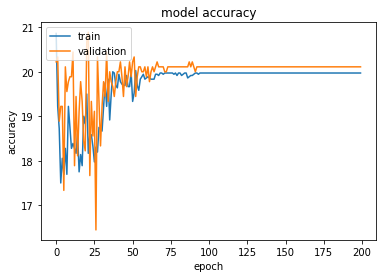

Maximum Train Accuracy : 20.86111068725586
Maximum Validation Accuracy : 20.88888931274414


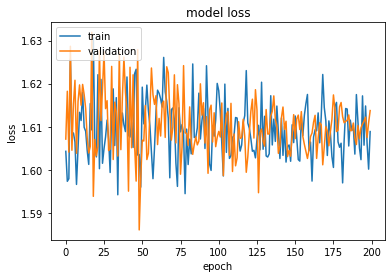

Minimum Train Loss : 1.5941991806030273
Minimum Validation Loss : 1.586040735244751


In [ ]:
Bacteria_model_amp_SGD_00001 = Bact_Net()
Bacteria_model_amp_SGD_00001.cuda()
trainer_SGD_amp_00001 = trainer(Bacteria_model_amp_SGD_00001, amp_train_loader,"SGD", epoch_size=200, learning_rate=0.0001)
trainer_SGD_amp_00001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_SGD_amp_00001.history['train_acc'])
plt.plot(trainer_SGD_amp_00001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_SGD_amp_00001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_SGD_amp_00001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_SGD_amp_00001.history['train_loss'])
plt.plot(trainer_SGD_amp_00001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_SGD_amp_00001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_SGD_amp_00001.history['val_loss'])}")


# Amp_Adagrad

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 19.888889


  0%|          | 1/200 [00:14<46:41, 14.08s/it]

Val Acc | Epoch 1/200 | ACC 20.444445
Train Acc | Epoch 2/200 | ACC 41.833336


  1%|          | 2/200 [00:28<46:52, 14.21s/it]

Val Acc | Epoch 2/200 | ACC 38.222225
Train Acc | Epoch 3/200 | ACC 39.111115


  2%|▏         | 3/200 [00:43<47:21, 14.42s/it]

Val Acc | Epoch 3/200 | ACC 37.777779
Train Acc | Epoch 4/200 | ACC 57.555557


  2%|▏         | 4/200 [00:57<47:06, 14.42s/it]

Val Acc | Epoch 4/200 | ACC 55.444443
Train Acc | Epoch 5/200 | ACC 66.777779


  2%|▎         | 5/200 [01:12<47:00, 14.47s/it]

Val Acc | Epoch 5/200 | ACC 64.444443
Train Acc | Epoch 6/200 | ACC 35.805557


  3%|▎         | 6/200 [01:26<46:43, 14.45s/it]

Val Acc | Epoch 6/200 | ACC 35.888889
Train Acc | Epoch 7/200 | ACC 71.527779


  4%|▎         | 7/200 [01:41<46:43, 14.53s/it]

Val Acc | Epoch 7/200 | ACC 65.555557
Train Acc | Epoch 8/200 | ACC 67.555557


  4%|▍         | 8/200 [01:55<46:28, 14.52s/it]

Val Acc | Epoch 8/200 | ACC 62.333332
Train Acc | Epoch 9/200 | ACC 74.500000


  4%|▍         | 9/200 [02:10<46:21, 14.56s/it]

Val Acc | Epoch 9/200 | ACC 70.111115
Train Acc | Epoch 10/200 | ACC 70.416672


  5%|▌         | 10/200 [02:24<45:55, 14.50s/it]

Val Acc | Epoch 10/200 | ACC 66.666672
Train Acc | Epoch 11/200 | ACC 70.833336


  6%|▌         | 11/200 [02:39<46:01, 14.61s/it]

Val Acc | Epoch 11/200 | ACC 66.666672
Train Acc | Epoch 12/200 | ACC 74.361115


  6%|▌         | 12/200 [02:54<45:44, 14.60s/it]

Val Acc | Epoch 12/200 | ACC 72.111115
Train Acc | Epoch 13/200 | ACC 61.694443


  6%|▋         | 13/200 [03:09<45:49, 14.70s/it]

Val Acc | Epoch 13/200 | ACC 58.777779
Train Acc | Epoch 14/200 | ACC 76.444450


  7%|▋         | 14/200 [03:24<46:19, 14.94s/it]

Val Acc | Epoch 14/200 | ACC 73.444443
Train Acc | Epoch 15/200 | ACC 76.472221


  8%|▊         | 15/200 [03:39<46:08, 14.97s/it]

Val Acc | Epoch 15/200 | ACC 72.333336
Train Acc | Epoch 16/200 | ACC 76.833336


  8%|▊         | 16/200 [03:54<45:50, 14.95s/it]

Val Acc | Epoch 16/200 | ACC 75.444450
Train Acc | Epoch 17/200 | ACC 77.722221


  8%|▊         | 17/200 [04:09<45:25, 14.89s/it]

Val Acc | Epoch 17/200 | ACC 76.333336
Train Acc | Epoch 18/200 | ACC 77.944443


  9%|▉         | 18/200 [04:24<45:05, 14.87s/it]

Val Acc | Epoch 18/200 | ACC 73.333336
Train Acc | Epoch 19/200 | ACC 78.138885


 10%|▉         | 19/200 [04:39<44:58, 14.91s/it]

Val Acc | Epoch 19/200 | ACC 74.777779
Train Acc | Epoch 20/200 | ACC 75.916664


 10%|█         | 20/200 [04:53<44:28, 14.82s/it]

Val Acc | Epoch 20/200 | ACC 72.555557
Train Acc | Epoch 21/200 | ACC 77.805557


 10%|█         | 21/200 [05:08<44:24, 14.89s/it]

Val Acc | Epoch 21/200 | ACC 72.888893
Train Acc | Epoch 22/200 | ACC 79.416672


 11%|█         | 22/200 [05:23<44:10, 14.89s/it]

Val Acc | Epoch 22/200 | ACC 75.777779
Train Acc | Epoch 23/200 | ACC 78.916672


 12%|█▏        | 23/200 [05:38<43:45, 14.84s/it]

Val Acc | Epoch 23/200 | ACC 75.000000
Train Acc | Epoch 24/200 | ACC 79.444443


 12%|█▏        | 24/200 [05:53<43:27, 14.82s/it]

Val Acc | Epoch 24/200 | ACC 77.555557
Train Acc | Epoch 25/200 | ACC 80.361115


 12%|█▎        | 25/200 [06:07<43:10, 14.80s/it]

Val Acc | Epoch 25/200 | ACC 76.777779
Train Acc | Epoch 26/200 | ACC 78.000000


 13%|█▎        | 26/200 [06:22<42:59, 14.82s/it]

Val Acc | Epoch 26/200 | ACC 76.000000
Train Acc | Epoch 27/200 | ACC 80.333336


 14%|█▎        | 27/200 [06:37<42:52, 14.87s/it]

Val Acc | Epoch 27/200 | ACC 78.333336
Train Acc | Epoch 28/200 | ACC 80.722221


 14%|█▍        | 28/200 [06:52<42:37, 14.87s/it]

Val Acc | Epoch 28/200 | ACC 78.555557
Train Acc | Epoch 29/200 | ACC 81.444450


 14%|█▍        | 29/200 [07:07<42:39, 14.97s/it]

Val Acc | Epoch 29/200 | ACC 78.222229
Train Acc | Epoch 30/200 | ACC 81.027779


 15%|█▌        | 30/200 [07:22<42:35, 15.03s/it]

Val Acc | Epoch 30/200 | ACC 78.777779
Train Acc | Epoch 31/200 | ACC 80.972221


 16%|█▌        | 31/200 [07:37<42:19, 15.03s/it]

Val Acc | Epoch 31/200 | ACC 78.666672
Train Acc | Epoch 32/200 | ACC 80.972221


 16%|█▌        | 32/200 [07:52<42:02, 15.02s/it]

Val Acc | Epoch 32/200 | ACC 77.444443
Train Acc | Epoch 33/200 | ACC 80.583336


 16%|█▋        | 33/200 [08:07<41:39, 14.96s/it]

Val Acc | Epoch 33/200 | ACC 78.333336
Train Acc | Epoch 34/200 | ACC 81.750000


 17%|█▋        | 34/200 [08:23<42:13, 15.26s/it]

Val Acc | Epoch 34/200 | ACC 79.888893
Train Acc | Epoch 35/200 | ACC 79.694443


 18%|█▊        | 35/200 [08:38<41:53, 15.23s/it]

Val Acc | Epoch 35/200 | ACC 77.111115
Train Acc | Epoch 36/200 | ACC 81.166664


 18%|█▊        | 36/200 [08:54<41:50, 15.31s/it]

Val Acc | Epoch 36/200 | ACC 79.111115
Train Acc | Epoch 37/200 | ACC 81.305557


 18%|█▊        | 37/200 [09:09<41:28, 15.27s/it]

Val Acc | Epoch 37/200 | ACC 78.222229
Train Acc | Epoch 38/200 | ACC 83.222221


 19%|█▉        | 38/200 [09:24<40:56, 15.16s/it]

Val Acc | Epoch 38/200 | ACC 80.666664
Train Acc | Epoch 39/200 | ACC 82.611115


 20%|█▉        | 39/200 [09:39<40:36, 15.13s/it]

Val Acc | Epoch 39/200 | ACC 79.000000
Train Acc | Epoch 40/200 | ACC 82.861115


 20%|██        | 40/200 [09:54<40:21, 15.14s/it]

Val Acc | Epoch 40/200 | ACC 80.111107
Train Acc | Epoch 41/200 | ACC 82.611115


 20%|██        | 41/200 [10:09<40:03, 15.12s/it]

Val Acc | Epoch 41/200 | ACC 78.444443
Train Acc | Epoch 42/200 | ACC 82.138893


 21%|██        | 42/200 [10:24<39:47, 15.11s/it]

Val Acc | Epoch 42/200 | ACC 78.222229
Train Acc | Epoch 43/200 | ACC 83.250008


 22%|██▏       | 43/200 [10:40<39:37, 15.14s/it]

Val Acc | Epoch 43/200 | ACC 80.333336
Train Acc | Epoch 44/200 | ACC 82.972221


 22%|██▏       | 44/200 [10:54<39:07, 15.05s/it]

Val Acc | Epoch 44/200 | ACC 80.000000
Train Acc | Epoch 45/200 | ACC 83.638885


 22%|██▎       | 45/200 [11:09<38:42, 14.99s/it]

Val Acc | Epoch 45/200 | ACC 81.333336
Train Acc | Epoch 46/200 | ACC 81.583336


 23%|██▎       | 46/200 [11:24<38:23, 14.96s/it]

Val Acc | Epoch 46/200 | ACC 78.000000
Train Acc | Epoch 47/200 | ACC 82.472221


 24%|██▎       | 47/200 [11:39<38:16, 15.01s/it]

Val Acc | Epoch 47/200 | ACC 80.777779
Train Acc | Epoch 48/200 | ACC 83.250008


 24%|██▍       | 48/200 [11:54<37:54, 14.96s/it]

Val Acc | Epoch 48/200 | ACC 80.444450
Train Acc | Epoch 49/200 | ACC 83.833336


 24%|██▍       | 49/200 [12:09<37:49, 15.03s/it]

Val Acc | Epoch 49/200 | ACC 82.444450
Train Acc | Epoch 50/200 | ACC 83.611115


 25%|██▌       | 50/200 [12:24<37:25, 14.97s/it]

Val Acc | Epoch 50/200 | ACC 78.777779
Train Acc | Epoch 51/200 | ACC 83.583336


 26%|██▌       | 51/200 [12:39<36:57, 14.88s/it]

Val Acc | Epoch 51/200 | ACC 80.777779
Train Acc | Epoch 52/200 | ACC 81.750000


 26%|██▌       | 52/200 [12:54<36:39, 14.86s/it]

Val Acc | Epoch 52/200 | ACC 79.666672
Train Acc | Epoch 53/200 | ACC 84.416672


 26%|██▋       | 53/200 [13:08<36:24, 14.86s/it]

Val Acc | Epoch 53/200 | ACC 80.000000
Train Acc | Epoch 54/200 | ACC 83.722221


 27%|██▋       | 54/200 [13:23<36:10, 14.87s/it]

Val Acc | Epoch 54/200 | ACC 79.777779
Train Acc | Epoch 55/200 | ACC 83.666672


 28%|██▊       | 55/200 [13:39<36:41, 15.18s/it]

Val Acc | Epoch 55/200 | ACC 80.666664
Train Acc | Epoch 56/200 | ACC 84.416672


 28%|██▊       | 56/200 [13:54<36:17, 15.12s/it]

Val Acc | Epoch 56/200 | ACC 81.222221
Train Acc | Epoch 57/200 | ACC 84.750000


 28%|██▊       | 57/200 [14:09<36:01, 15.11s/it]

Val Acc | Epoch 57/200 | ACC 81.333336
Train Acc | Epoch 58/200 | ACC 84.750000


 29%|██▉       | 58/200 [14:24<35:42, 15.09s/it]

Val Acc | Epoch 58/200 | ACC 82.555557
Train Acc | Epoch 59/200 | ACC 84.472229


 30%|██▉       | 59/200 [14:39<35:16, 15.01s/it]

Val Acc | Epoch 59/200 | ACC 80.000000
Train Acc | Epoch 60/200 | ACC 83.694443


 30%|███       | 60/200 [14:54<34:48, 14.92s/it]

Val Acc | Epoch 60/200 | ACC 80.777779
Train Acc | Epoch 61/200 | ACC 84.861115


 30%|███       | 61/200 [15:09<34:30, 14.90s/it]

Val Acc | Epoch 61/200 | ACC 82.000000
Train Acc | Epoch 62/200 | ACC 84.638893


 31%|███       | 62/200 [15:24<34:20, 14.93s/it]

Val Acc | Epoch 62/200 | ACC 81.777779
Train Acc | Epoch 63/200 | ACC 84.333336


 32%|███▏      | 63/200 [15:39<33:57, 14.87s/it]

Val Acc | Epoch 63/200 | ACC 80.000000
Train Acc | Epoch 64/200 | ACC 84.361115


 32%|███▏      | 64/200 [15:53<33:36, 14.83s/it]

Val Acc | Epoch 64/200 | ACC 80.000000
Train Acc | Epoch 65/200 | ACC 85.055557


 32%|███▎      | 65/200 [16:08<33:25, 14.85s/it]

Val Acc | Epoch 65/200 | ACC 82.333336
Train Acc | Epoch 66/200 | ACC 85.138893


 33%|███▎      | 66/200 [16:23<33:05, 14.82s/it]

Val Acc | Epoch 66/200 | ACC 81.222221
Train Acc | Epoch 67/200 | ACC 85.555557


 34%|███▎      | 67/200 [16:38<32:51, 14.82s/it]

Val Acc | Epoch 67/200 | ACC 82.222221
Train Acc | Epoch 68/200 | ACC 82.138893


 34%|███▍      | 68/200 [16:53<32:38, 14.84s/it]

Val Acc | Epoch 68/200 | ACC 79.333336
Train Acc | Epoch 69/200 | ACC 85.277779


 34%|███▍      | 69/200 [17:08<32:32, 14.90s/it]

Val Acc | Epoch 69/200 | ACC 82.222221
Train Acc | Epoch 70/200 | ACC 85.583336


 35%|███▌      | 70/200 [17:23<32:27, 14.98s/it]

Val Acc | Epoch 70/200 | ACC 81.666664
Train Acc | Epoch 71/200 | ACC 85.055557


 36%|███▌      | 71/200 [17:38<32:11, 14.97s/it]

Val Acc | Epoch 71/200 | ACC 82.666672
Train Acc | Epoch 72/200 | ACC 84.777779


 36%|███▌      | 72/200 [17:53<31:52, 14.94s/it]

Val Acc | Epoch 72/200 | ACC 81.666664
Train Acc | Epoch 73/200 | ACC 85.638893


 36%|███▋      | 73/200 [18:07<31:32, 14.90s/it]

Val Acc | Epoch 73/200 | ACC 82.888885
Train Acc | Epoch 74/200 | ACC 84.027779


 37%|███▋      | 74/200 [18:22<31:18, 14.91s/it]

Val Acc | Epoch 74/200 | ACC 81.444450
Train Acc | Epoch 75/200 | ACC 85.027779


 38%|███▊      | 75/200 [18:37<31:11, 14.97s/it]

Val Acc | Epoch 75/200 | ACC 83.333336
Train Acc | Epoch 76/200 | ACC 86.083336


 38%|███▊      | 76/200 [18:53<31:14, 15.12s/it]

Val Acc | Epoch 76/200 | ACC 81.555557
Train Acc | Epoch 77/200 | ACC 84.777779


 38%|███▊      | 77/200 [19:08<30:53, 15.07s/it]

Val Acc | Epoch 77/200 | ACC 81.444450
Train Acc | Epoch 78/200 | ACC 85.500000


 39%|███▉      | 78/200 [19:23<30:39, 15.07s/it]

Val Acc | Epoch 78/200 | ACC 83.333336
Train Acc | Epoch 79/200 | ACC 83.694443


 40%|███▉      | 79/200 [19:38<30:20, 15.05s/it]

Val Acc | Epoch 79/200 | ACC 80.444450
Train Acc | Epoch 80/200 | ACC 84.361115


 40%|████      | 80/200 [19:53<29:59, 15.00s/it]

Val Acc | Epoch 80/200 | ACC 81.444450
Train Acc | Epoch 81/200 | ACC 83.722221


 40%|████      | 81/200 [20:08<29:37, 14.94s/it]

Val Acc | Epoch 81/200 | ACC 81.333336
Train Acc | Epoch 82/200 | ACC 85.805557


 41%|████      | 82/200 [20:22<29:14, 14.87s/it]

Val Acc | Epoch 82/200 | ACC 81.444450
Train Acc | Epoch 83/200 | ACC 85.194443


 42%|████▏     | 83/200 [20:37<29:03, 14.90s/it]

Val Acc | Epoch 83/200 | ACC 83.444443
Train Acc | Epoch 84/200 | ACC 85.555557


 42%|████▏     | 84/200 [20:52<28:40, 14.83s/it]

Val Acc | Epoch 84/200 | ACC 82.333336
Train Acc | Epoch 85/200 | ACC 85.194443


 42%|████▎     | 85/200 [21:07<28:29, 14.87s/it]

Val Acc | Epoch 85/200 | ACC 80.888893
Train Acc | Epoch 86/200 | ACC 86.055557


 43%|████▎     | 86/200 [21:22<28:24, 14.95s/it]

Val Acc | Epoch 86/200 | ACC 82.666672
Train Acc | Epoch 87/200 | ACC 86.138893


 44%|████▎     | 87/200 [21:37<28:02, 14.89s/it]

Val Acc | Epoch 87/200 | ACC 81.333336
Train Acc | Epoch 88/200 | ACC 86.250000


 44%|████▍     | 88/200 [21:52<27:47, 14.89s/it]

Val Acc | Epoch 88/200 | ACC 82.666672
Train Acc | Epoch 89/200 | ACC 85.972229


 44%|████▍     | 89/200 [22:07<27:30, 14.87s/it]

Val Acc | Epoch 89/200 | ACC 80.888893
Train Acc | Epoch 90/200 | ACC 84.861115


 45%|████▌     | 90/200 [22:21<27:16, 14.88s/it]

Val Acc | Epoch 90/200 | ACC 81.777779
Train Acc | Epoch 91/200 | ACC 85.055557


 46%|████▌     | 91/200 [22:36<27:02, 14.89s/it]

Val Acc | Epoch 91/200 | ACC 80.777779
Train Acc | Epoch 92/200 | ACC 85.611115


 46%|████▌     | 92/200 [22:51<26:42, 14.83s/it]

Val Acc | Epoch 92/200 | ACC 81.888893
Train Acc | Epoch 93/200 | ACC 85.166672


 46%|████▋     | 93/200 [23:06<26:26, 14.83s/it]

Val Acc | Epoch 93/200 | ACC 82.333336
Train Acc | Epoch 94/200 | ACC 86.166672


 47%|████▋     | 94/200 [23:21<26:17, 14.88s/it]

Val Acc | Epoch 94/200 | ACC 83.000008
Train Acc | Epoch 95/200 | ACC 85.916672


 48%|████▊     | 95/200 [23:36<26:03, 14.89s/it]

Val Acc | Epoch 95/200 | ACC 81.888893
Train Acc | Epoch 96/200 | ACC 85.305557


 48%|████▊     | 96/200 [23:51<26:05, 15.06s/it]

Val Acc | Epoch 96/200 | ACC 81.888893
Train Acc | Epoch 97/200 | ACC 86.583336


 48%|████▊     | 97/200 [24:07<25:57, 15.12s/it]

Val Acc | Epoch 97/200 | ACC 82.444450
Train Acc | Epoch 98/200 | ACC 86.194443


 49%|████▉     | 98/200 [24:21<25:35, 15.05s/it]

Val Acc | Epoch 98/200 | ACC 84.777779
Train Acc | Epoch 99/200 | ACC 86.194443


 50%|████▉     | 99/200 [24:37<25:22, 15.08s/it]

Val Acc | Epoch 99/200 | ACC 83.222221
Train Acc | Epoch 100/200 | ACC 86.222229


 50%|█████     | 100/200 [24:52<25:08, 15.08s/it]

Val Acc | Epoch 100/200 | ACC 83.777779
Train Acc | Epoch 101/200 | ACC 86.555557


 50%|█████     | 101/200 [25:07<24:53, 15.08s/it]

Val Acc | Epoch 101/200 | ACC 83.444443
Train Acc | Epoch 102/200 | ACC 86.305557


 51%|█████     | 102/200 [25:22<24:39, 15.10s/it]

Val Acc | Epoch 102/200 | ACC 83.000008
Train Acc | Epoch 103/200 | ACC 86.194443


 52%|█████▏    | 103/200 [25:37<24:18, 15.03s/it]

Val Acc | Epoch 103/200 | ACC 83.666672
Train Acc | Epoch 104/200 | ACC 86.194443


 52%|█████▏    | 104/200 [25:52<23:59, 14.99s/it]

Val Acc | Epoch 104/200 | ACC 81.666664
Train Acc | Epoch 105/200 | ACC 86.250000


 52%|█████▎    | 105/200 [26:06<23:37, 14.92s/it]

Val Acc | Epoch 105/200 | ACC 83.555557
Train Acc | Epoch 106/200 | ACC 84.305557


 53%|█████▎    | 106/200 [26:21<23:21, 14.91s/it]

Val Acc | Epoch 106/200 | ACC 80.444450
Train Acc | Epoch 107/200 | ACC 86.555557


 54%|█████▎    | 107/200 [26:36<22:56, 14.80s/it]

Val Acc | Epoch 107/200 | ACC 82.555557
Train Acc | Epoch 108/200 | ACC 86.388893


 54%|█████▍    | 108/200 [26:51<22:40, 14.79s/it]

Val Acc | Epoch 108/200 | ACC 82.666672
Train Acc | Epoch 109/200 | ACC 83.500000


 55%|█████▍    | 109/200 [27:06<22:37, 14.92s/it]

Val Acc | Epoch 109/200 | ACC 80.111107
Train Acc | Epoch 110/200 | ACC 87.500000


 55%|█████▌    | 110/200 [27:20<22:15, 14.84s/it]

Val Acc | Epoch 110/200 | ACC 84.111115
Train Acc | Epoch 111/200 | ACC 85.500000


 56%|█████▌    | 111/200 [27:35<22:02, 14.86s/it]

Val Acc | Epoch 111/200 | ACC 82.222221
Train Acc | Epoch 112/200 | ACC 85.333336


 56%|█████▌    | 112/200 [27:51<21:55, 14.95s/it]

Val Acc | Epoch 112/200 | ACC 82.000000
Train Acc | Epoch 113/200 | ACC 87.361115


 56%|█████▋    | 113/200 [28:05<21:38, 14.93s/it]

Val Acc | Epoch 113/200 | ACC 83.111115
Train Acc | Epoch 114/200 | ACC 87.194450


 57%|█████▋    | 114/200 [28:20<21:23, 14.93s/it]

Val Acc | Epoch 114/200 | ACC 83.111115
Train Acc | Epoch 115/200 | ACC 86.611115


 57%|█████▊    | 115/200 [28:35<21:08, 14.92s/it]

Val Acc | Epoch 115/200 | ACC 82.000000
Train Acc | Epoch 116/200 | ACC 86.750000


 58%|█████▊    | 116/200 [28:50<20:45, 14.83s/it]

Val Acc | Epoch 116/200 | ACC 83.666672
Train Acc | Epoch 117/200 | ACC 85.027779


 58%|█████▊    | 117/200 [29:05<20:46, 15.02s/it]

Val Acc | Epoch 117/200 | ACC 81.777779
Train Acc | Epoch 118/200 | ACC 87.000000


 59%|█████▉    | 118/200 [29:20<20:30, 15.00s/it]

Val Acc | Epoch 118/200 | ACC 83.111115
Train Acc | Epoch 119/200 | ACC 87.277779


 60%|█████▉    | 119/200 [29:35<20:15, 15.01s/it]

Val Acc | Epoch 119/200 | ACC 83.444443
Train Acc | Epoch 120/200 | ACC 86.055557


 60%|██████    | 120/200 [29:50<19:58, 14.98s/it]

Val Acc | Epoch 120/200 | ACC 82.666672
Train Acc | Epoch 121/200 | ACC 86.277779


 60%|██████    | 121/200 [30:05<19:42, 14.96s/it]

Val Acc | Epoch 121/200 | ACC 82.222221
Train Acc | Epoch 122/200 | ACC 85.833336


 61%|██████    | 122/200 [30:20<19:27, 14.96s/it]

Val Acc | Epoch 122/200 | ACC 82.333336
Train Acc | Epoch 123/200 | ACC 86.777786


 62%|██████▏   | 123/200 [30:35<19:12, 14.97s/it]

Val Acc | Epoch 123/200 | ACC 84.111115
Train Acc | Epoch 124/200 | ACC 86.750000


 62%|██████▏   | 124/200 [30:50<18:52, 14.90s/it]

Val Acc | Epoch 124/200 | ACC 83.555557
Train Acc | Epoch 125/200 | ACC 87.416664


 62%|██████▎   | 125/200 [31:04<18:31, 14.82s/it]

Val Acc | Epoch 125/200 | ACC 84.111115
Train Acc | Epoch 126/200 | ACC 85.611115


 63%|██████▎   | 126/200 [31:19<18:15, 14.80s/it]

Val Acc | Epoch 126/200 | ACC 81.888893
Train Acc | Epoch 127/200 | ACC 86.555557


 64%|██████▎   | 127/200 [31:34<18:06, 14.89s/it]

Val Acc | Epoch 127/200 | ACC 84.000000
Train Acc | Epoch 128/200 | ACC 86.055557


 64%|██████▍   | 128/200 [31:49<17:53, 14.92s/it]

Val Acc | Epoch 128/200 | ACC 84.444443
Train Acc | Epoch 129/200 | ACC 87.444450


 64%|██████▍   | 129/200 [32:04<17:41, 14.95s/it]

Val Acc | Epoch 129/200 | ACC 82.333336
Train Acc | Epoch 130/200 | ACC 86.777786


 65%|██████▌   | 130/200 [32:19<17:19, 14.84s/it]

Val Acc | Epoch 130/200 | ACC 84.111115
Train Acc | Epoch 131/200 | ACC 87.083336


 66%|██████▌   | 131/200 [32:34<17:06, 14.88s/it]

Val Acc | Epoch 131/200 | ACC 84.333336
Train Acc | Epoch 132/200 | ACC 86.666664


 66%|██████▌   | 132/200 [32:49<16:49, 14.85s/it]

Val Acc | Epoch 132/200 | ACC 83.222221
Train Acc | Epoch 133/200 | ACC 86.111107


 66%|██████▋   | 133/200 [33:04<16:38, 14.90s/it]

Val Acc | Epoch 133/200 | ACC 84.444443
Train Acc | Epoch 134/200 | ACC 87.416664


 67%|██████▋   | 134/200 [33:19<16:23, 14.90s/it]

Val Acc | Epoch 134/200 | ACC 83.222221
Train Acc | Epoch 135/200 | ACC 87.416664


 68%|██████▊   | 135/200 [33:33<16:06, 14.87s/it]

Val Acc | Epoch 135/200 | ACC 84.000000
Train Acc | Epoch 136/200 | ACC 86.833336


 68%|██████▊   | 136/200 [33:48<15:53, 14.90s/it]

Val Acc | Epoch 136/200 | ACC 83.777779
Train Acc | Epoch 137/200 | ACC 86.694450


 68%|██████▊   | 137/200 [34:03<15:39, 14.92s/it]

Val Acc | Epoch 137/200 | ACC 83.666672
Train Acc | Epoch 138/200 | ACC 86.972221


 69%|██████▉   | 138/200 [34:19<15:43, 15.22s/it]

Val Acc | Epoch 138/200 | ACC 83.333336
Train Acc | Epoch 139/200 | ACC 86.805557


 70%|██████▉   | 139/200 [34:34<15:17, 15.04s/it]

Val Acc | Epoch 139/200 | ACC 83.444443
Train Acc | Epoch 140/200 | ACC 87.111115


 70%|███████   | 140/200 [34:48<14:49, 14.83s/it]

Val Acc | Epoch 140/200 | ACC 83.666672
Train Acc | Epoch 141/200 | ACC 86.888893


 70%|███████   | 141/200 [35:03<14:30, 14.76s/it]

Val Acc | Epoch 141/200 | ACC 84.000000
Train Acc | Epoch 142/200 | ACC 87.194450


 71%|███████   | 142/200 [35:18<14:23, 14.88s/it]

Val Acc | Epoch 142/200 | ACC 83.777779
Train Acc | Epoch 143/200 | ACC 87.583336


 72%|███████▏  | 143/200 [35:33<14:03, 14.80s/it]

Val Acc | Epoch 143/200 | ACC 84.444443
Train Acc | Epoch 144/200 | ACC 84.750000


 72%|███████▏  | 144/200 [35:47<13:45, 14.74s/it]

Val Acc | Epoch 144/200 | ACC 80.111107
Train Acc | Epoch 145/200 | ACC 87.194450


 72%|███████▎  | 145/200 [36:02<13:33, 14.79s/it]

Val Acc | Epoch 145/200 | ACC 84.888893
Train Acc | Epoch 146/200 | ACC 87.472221


 73%|███████▎  | 146/200 [36:17<13:14, 14.72s/it]

Val Acc | Epoch 146/200 | ACC 83.888885
Train Acc | Epoch 147/200 | ACC 86.916664


 74%|███████▎  | 147/200 [36:32<13:02, 14.77s/it]

Val Acc | Epoch 147/200 | ACC 84.000000
Train Acc | Epoch 148/200 | ACC 86.666664


 74%|███████▍  | 148/200 [36:47<12:55, 14.92s/it]

Val Acc | Epoch 148/200 | ACC 84.111115
Train Acc | Epoch 149/200 | ACC 86.472229


 74%|███████▍  | 149/200 [37:02<12:41, 14.94s/it]

Val Acc | Epoch 149/200 | ACC 82.777779
Train Acc | Epoch 150/200 | ACC 86.972221


 75%|███████▌  | 150/200 [37:17<12:28, 14.96s/it]

Val Acc | Epoch 150/200 | ACC 83.777779
Train Acc | Epoch 151/200 | ACC 87.555557


 76%|███████▌  | 151/200 [37:32<12:10, 14.92s/it]

Val Acc | Epoch 151/200 | ACC 84.222221
Train Acc | Epoch 152/200 | ACC 86.277779


 76%|███████▌  | 152/200 [37:47<11:58, 14.96s/it]

Val Acc | Epoch 152/200 | ACC 83.111115
Train Acc | Epoch 153/200 | ACC 87.805557


 76%|███████▋  | 153/200 [38:02<11:43, 14.98s/it]

Val Acc | Epoch 153/200 | ACC 84.555557
Train Acc | Epoch 154/200 | ACC 86.277779


 77%|███████▋  | 154/200 [38:17<11:29, 14.99s/it]

Val Acc | Epoch 154/200 | ACC 82.777779
Train Acc | Epoch 155/200 | ACC 87.444450


 78%|███████▊  | 155/200 [38:32<11:16, 15.03s/it]

Val Acc | Epoch 155/200 | ACC 83.666672
Train Acc | Epoch 156/200 | ACC 86.805557


 78%|███████▊  | 156/200 [38:47<10:58, 14.97s/it]

Val Acc | Epoch 156/200 | ACC 84.222221
Train Acc | Epoch 157/200 | ACC 87.777779


 78%|███████▊  | 157/200 [39:01<10:40, 14.90s/it]

Val Acc | Epoch 157/200 | ACC 83.555557
Train Acc | Epoch 158/200 | ACC 87.361115


 79%|███████▉  | 158/200 [39:16<10:26, 14.91s/it]

Val Acc | Epoch 158/200 | ACC 84.666672
Train Acc | Epoch 159/200 | ACC 86.888893


 80%|███████▉  | 159/200 [39:32<10:22, 15.18s/it]

Val Acc | Epoch 159/200 | ACC 82.111115
Train Acc | Epoch 160/200 | ACC 85.888893


 80%|████████  | 160/200 [39:47<10:05, 15.15s/it]

Val Acc | Epoch 160/200 | ACC 81.444450
Train Acc | Epoch 161/200 | ACC 87.777779


 80%|████████  | 161/200 [40:02<09:47, 15.06s/it]

Val Acc | Epoch 161/200 | ACC 84.111115
Train Acc | Epoch 162/200 | ACC 87.861115


 81%|████████  | 162/200 [40:17<09:28, 14.97s/it]

Val Acc | Epoch 162/200 | ACC 83.888885
Train Acc | Epoch 163/200 | ACC 87.888893


 82%|████████▏ | 163/200 [40:32<09:11, 14.91s/it]

Val Acc | Epoch 163/200 | ACC 83.777779
Train Acc | Epoch 164/200 | ACC 85.805557


 82%|████████▏ | 164/200 [40:46<08:53, 14.83s/it]

Val Acc | Epoch 164/200 | ACC 82.222221
Train Acc | Epoch 165/200 | ACC 88.027779


 82%|████████▎ | 165/200 [41:01<08:40, 14.88s/it]

Val Acc | Epoch 165/200 | ACC 84.777779
Train Acc | Epoch 166/200 | ACC 86.361115


 83%|████████▎ | 166/200 [41:16<08:28, 14.95s/it]

Val Acc | Epoch 166/200 | ACC 83.111115
Train Acc | Epoch 167/200 | ACC 88.194450


 84%|████████▎ | 167/200 [41:31<08:11, 14.91s/it]

Val Acc | Epoch 167/200 | ACC 84.111115
Train Acc | Epoch 168/200 | ACC 87.277779


 84%|████████▍ | 168/200 [41:46<07:56, 14.89s/it]

Val Acc | Epoch 168/200 | ACC 86.000000
Train Acc | Epoch 169/200 | ACC 87.805557


 84%|████████▍ | 169/200 [42:01<07:43, 14.95s/it]

Val Acc | Epoch 169/200 | ACC 84.444443
Train Acc | Epoch 170/200 | ACC 86.916664


 85%|████████▌ | 170/200 [42:16<07:26, 14.89s/it]

Val Acc | Epoch 170/200 | ACC 84.888893
Train Acc | Epoch 171/200 | ACC 87.555557


 86%|████████▌ | 171/200 [42:31<07:11, 14.89s/it]

Val Acc | Epoch 171/200 | ACC 83.444443
Train Acc | Epoch 172/200 | ACC 87.638893


 86%|████████▌ | 172/200 [42:46<06:58, 14.94s/it]

Val Acc | Epoch 172/200 | ACC 85.000000
Train Acc | Epoch 173/200 | ACC 87.222221


 86%|████████▋ | 173/200 [43:01<06:43, 14.95s/it]

Val Acc | Epoch 173/200 | ACC 83.888885
Train Acc | Epoch 174/200 | ACC 87.250000


 87%|████████▋ | 174/200 [43:16<06:30, 15.02s/it]

Val Acc | Epoch 174/200 | ACC 84.111115
Train Acc | Epoch 175/200 | ACC 87.416664


 88%|████████▊ | 175/200 [43:31<06:14, 14.99s/it]

Val Acc | Epoch 175/200 | ACC 84.555557
Train Acc | Epoch 176/200 | ACC 87.750000


 88%|████████▊ | 176/200 [43:46<05:58, 14.92s/it]

Val Acc | Epoch 176/200 | ACC 85.111115
Train Acc | Epoch 177/200 | ACC 87.916664


 88%|████████▊ | 177/200 [44:00<05:42, 14.89s/it]

Val Acc | Epoch 177/200 | ACC 84.222221
Train Acc | Epoch 178/200 | ACC 87.361115


 89%|████████▉ | 178/200 [44:15<05:27, 14.90s/it]

Val Acc | Epoch 178/200 | ACC 83.222221
Train Acc | Epoch 179/200 | ACC 87.833336


 90%|████████▉ | 179/200 [44:30<05:13, 14.93s/it]

Val Acc | Epoch 179/200 | ACC 85.111115
Train Acc | Epoch 180/200 | ACC 86.944450


 90%|█████████ | 180/200 [44:46<05:01, 15.06s/it]

Val Acc | Epoch 180/200 | ACC 83.444443
Train Acc | Epoch 181/200 | ACC 87.138893


 90%|█████████ | 181/200 [45:01<04:44, 14.99s/it]

Val Acc | Epoch 181/200 | ACC 84.444443
Train Acc | Epoch 182/200 | ACC 87.138893


 91%|█████████ | 182/200 [45:15<04:28, 14.92s/it]

Val Acc | Epoch 182/200 | ACC 84.888893
Train Acc | Epoch 183/200 | ACC 87.250000


 92%|█████████▏| 183/200 [45:30<04:12, 14.88s/it]

Val Acc | Epoch 183/200 | ACC 84.666672
Train Acc | Epoch 184/200 | ACC 86.500000


 92%|█████████▏| 184/200 [45:45<03:58, 14.91s/it]

Val Acc | Epoch 184/200 | ACC 83.444443
Train Acc | Epoch 185/200 | ACC 88.027779


 92%|█████████▎| 185/200 [46:00<03:43, 14.87s/it]

Val Acc | Epoch 185/200 | ACC 85.222229
Train Acc | Epoch 186/200 | ACC 87.944450


 93%|█████████▎| 186/200 [46:15<03:27, 14.85s/it]

Val Acc | Epoch 186/200 | ACC 84.777779
Train Acc | Epoch 187/200 | ACC 87.611115


 94%|█████████▎| 187/200 [46:29<03:12, 14.84s/it]

Val Acc | Epoch 187/200 | ACC 84.444443
Train Acc | Epoch 188/200 | ACC 87.138893


 94%|█████████▍| 188/200 [46:44<02:58, 14.87s/it]

Val Acc | Epoch 188/200 | ACC 85.666672
Train Acc | Epoch 189/200 | ACC 87.583336


 94%|█████████▍| 189/200 [47:00<02:44, 14.94s/it]

Val Acc | Epoch 189/200 | ACC 85.555557
Train Acc | Epoch 190/200 | ACC 87.777779


 95%|█████████▌| 190/200 [47:14<02:29, 14.92s/it]

Val Acc | Epoch 190/200 | ACC 84.555557
Train Acc | Epoch 191/200 | ACC 87.944450


 96%|█████████▌| 191/200 [47:29<02:14, 14.96s/it]

Val Acc | Epoch 191/200 | ACC 85.666672
Train Acc | Epoch 192/200 | ACC 87.861115


 96%|█████████▌| 192/200 [47:44<01:59, 14.92s/it]

Val Acc | Epoch 192/200 | ACC 84.777779
Train Acc | Epoch 193/200 | ACC 88.694450


 96%|█████████▋| 193/200 [47:59<01:44, 14.99s/it]

Val Acc | Epoch 193/200 | ACC 84.888893
Train Acc | Epoch 194/200 | ACC 87.055557


 97%|█████████▋| 194/200 [48:14<01:30, 15.01s/it]

Val Acc | Epoch 194/200 | ACC 83.666672
Train Acc | Epoch 195/200 | ACC 87.361115


 98%|█████████▊| 195/200 [48:30<01:15, 15.02s/it]

Val Acc | Epoch 195/200 | ACC 83.888885
Train Acc | Epoch 196/200 | ACC 88.250000


 98%|█████████▊| 196/200 [48:44<00:59, 14.97s/it]

Val Acc | Epoch 196/200 | ACC 85.888893
Train Acc | Epoch 197/200 | ACC 88.138893


 98%|█████████▊| 197/200 [49:00<00:45, 15.03s/it]

Val Acc | Epoch 197/200 | ACC 84.222221
Train Acc | Epoch 198/200 | ACC 87.500000


 99%|█████████▉| 198/200 [49:14<00:29, 15.00s/it]

Val Acc | Epoch 198/200 | ACC 83.000008
Train Acc | Epoch 199/200 | ACC 88.305557


100%|█████████▉| 199/200 [49:29<00:15, 15.00s/it]

Val Acc | Epoch 199/200 | ACC 84.777779
Train Acc | Epoch 200/200 | ACC 87.972221


100%|██████████| 200/200 [49:45<00:00, 14.93s/it]

Val Acc | Epoch 200/200 | ACC 84.888893


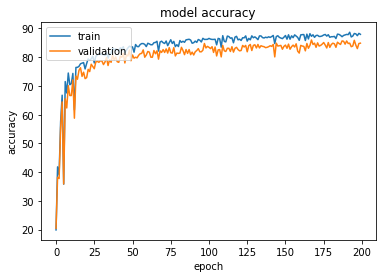

Maximum Train Accuracy : 88.69445037841797
Maximum Validation Accuracy : 86.0


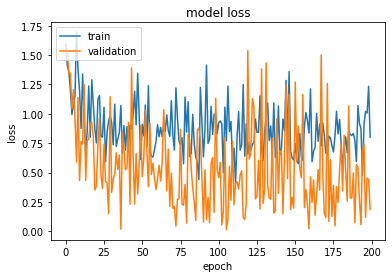

Minimum Train Loss : 0.4018837809562683
Minimum Validation Loss : 0.010941041633486748


In [ ]:
Bacteria_model_amp_Adagrad_001 = Bact_Net()
Bacteria_model_amp_Adagrad_001.cuda()
trainer_Adagrad_amp_001 = trainer(Bacteria_model_amp_Adagrad_001, amp_train_loader,"Adagrad", epoch_size=200, learning_rate=0.01)
trainer_Adagrad_amp_001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adagrad_amp_001.history['train_acc'])
plt.plot(trainer_Adagrad_amp_001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adagrad_amp_001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adagrad_amp_001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adagrad_amp_001.history['train_loss'])
plt.plot(trainer_Adagrad_amp_001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adagrad_amp_001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adagrad_amp_001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 26.472223


  0%|          | 1/200 [00:15<50:19, 15.17s/it]

Val Acc | Epoch 1/200 | ACC 25.222223
Train Acc | Epoch 2/200 | ACC 35.277779


  1%|          | 2/200 [00:30<49:34, 15.02s/it]

Val Acc | Epoch 2/200 | ACC 31.111113
Train Acc | Epoch 3/200 | ACC 37.944447


  2%|▏         | 3/200 [00:45<49:23, 15.04s/it]

Val Acc | Epoch 3/200 | ACC 36.000000
Train Acc | Epoch 4/200 | ACC 40.500000


  2%|▏         | 4/200 [01:00<48:53, 14.97s/it]

Val Acc | Epoch 4/200 | ACC 36.000000
Train Acc | Epoch 5/200 | ACC 38.750000


  2%|▎         | 5/200 [01:14<48:11, 14.83s/it]

Val Acc | Epoch 5/200 | ACC 36.555557
Train Acc | Epoch 6/200 | ACC 42.527779


  3%|▎         | 6/200 [01:29<48:10, 14.90s/it]

Val Acc | Epoch 6/200 | ACC 41.222225
Train Acc | Epoch 7/200 | ACC 43.388893


  4%|▎         | 7/200 [01:44<48:15, 15.00s/it]

Val Acc | Epoch 7/200 | ACC 41.222225
Train Acc | Epoch 8/200 | ACC 42.527779


  4%|▍         | 8/200 [01:59<48:02, 15.01s/it]

Val Acc | Epoch 8/200 | ACC 42.333336
Train Acc | Epoch 9/200 | ACC 45.333336


  4%|▍         | 9/200 [02:14<47:53, 15.04s/it]

Val Acc | Epoch 9/200 | ACC 42.666668
Train Acc | Epoch 10/200 | ACC 43.694447


  5%|▌         | 10/200 [02:29<47:29, 15.00s/it]

Val Acc | Epoch 10/200 | ACC 41.888889
Train Acc | Epoch 11/200 | ACC 44.472225


  6%|▌         | 11/200 [02:44<47:08, 14.97s/it]

Val Acc | Epoch 11/200 | ACC 43.777779
Train Acc | Epoch 12/200 | ACC 45.527779


  6%|▌         | 12/200 [02:59<46:48, 14.94s/it]

Val Acc | Epoch 12/200 | ACC 43.111115
Train Acc | Epoch 13/200 | ACC 45.333336


  6%|▋         | 13/200 [03:14<46:25, 14.90s/it]

Val Acc | Epoch 13/200 | ACC 43.111115
Train Acc | Epoch 14/200 | ACC 46.083336


  7%|▋         | 14/200 [03:29<46:06, 14.88s/it]

Val Acc | Epoch 14/200 | ACC 46.222221
Train Acc | Epoch 15/200 | ACC 45.638889


  8%|▊         | 15/200 [03:44<45:49, 14.86s/it]

Val Acc | Epoch 15/200 | ACC 43.888889
Train Acc | Epoch 16/200 | ACC 46.805557


  8%|▊         | 16/200 [03:58<45:25, 14.81s/it]

Val Acc | Epoch 16/200 | ACC 46.555557
Train Acc | Epoch 17/200 | ACC 47.111111


  8%|▊         | 17/200 [04:13<45:12, 14.82s/it]

Val Acc | Epoch 17/200 | ACC 47.555557
Train Acc | Epoch 18/200 | ACC 46.305557


  9%|▉         | 18/200 [04:28<44:50, 14.79s/it]

Val Acc | Epoch 18/200 | ACC 45.000000
Train Acc | Epoch 19/200 | ACC 48.722221


 10%|▉         | 19/200 [04:43<44:39, 14.80s/it]

Val Acc | Epoch 19/200 | ACC 48.111111
Train Acc | Epoch 20/200 | ACC 48.833336


 10%|█         | 20/200 [04:58<44:50, 14.95s/it]

Val Acc | Epoch 20/200 | ACC 47.000000
Train Acc | Epoch 21/200 | ACC 49.388893


 10%|█         | 21/200 [05:13<44:55, 15.06s/it]

Val Acc | Epoch 21/200 | ACC 47.222225
Train Acc | Epoch 22/200 | ACC 49.777779


 11%|█         | 22/200 [05:28<44:29, 15.00s/it]

Val Acc | Epoch 22/200 | ACC 50.000000
Train Acc | Epoch 23/200 | ACC 50.194447


 12%|█▏        | 23/200 [05:43<43:56, 14.90s/it]

Val Acc | Epoch 23/200 | ACC 49.888889
Train Acc | Epoch 24/200 | ACC 47.388889


 12%|█▏        | 24/200 [05:57<43:28, 14.82s/it]

Val Acc | Epoch 24/200 | ACC 46.888889
Train Acc | Epoch 25/200 | ACC 52.416672


 12%|█▎        | 25/200 [06:12<43:16, 14.84s/it]

Val Acc | Epoch 25/200 | ACC 52.555553
Train Acc | Epoch 26/200 | ACC 52.833336


 13%|█▎        | 26/200 [06:27<43:01, 14.84s/it]

Val Acc | Epoch 26/200 | ACC 48.888889
Train Acc | Epoch 27/200 | ACC 54.222225


 14%|█▎        | 27/200 [06:42<43:00, 14.91s/it]

Val Acc | Epoch 27/200 | ACC 53.333336
Train Acc | Epoch 28/200 | ACC 53.777779


 14%|█▍        | 28/200 [06:57<42:32, 14.84s/it]

Val Acc | Epoch 28/200 | ACC 52.000004
Train Acc | Epoch 29/200 | ACC 54.166668


 14%|█▍        | 29/200 [07:12<42:19, 14.85s/it]

Val Acc | Epoch 29/200 | ACC 53.888893
Train Acc | Epoch 30/200 | ACC 53.777779


 15%|█▌        | 30/200 [07:27<42:00, 14.83s/it]

Val Acc | Epoch 30/200 | ACC 51.111115
Train Acc | Epoch 31/200 | ACC 54.666668


 16%|█▌        | 31/200 [07:41<41:46, 14.83s/it]

Val Acc | Epoch 31/200 | ACC 52.222221
Train Acc | Epoch 32/200 | ACC 55.083336


 16%|█▌        | 32/200 [07:56<41:32, 14.84s/it]

Val Acc | Epoch 32/200 | ACC 53.333336
Train Acc | Epoch 33/200 | ACC 55.444443


 16%|█▋        | 33/200 [08:11<41:19, 14.85s/it]

Val Acc | Epoch 33/200 | ACC 54.555557
Train Acc | Epoch 34/200 | ACC 56.500000


 17%|█▋        | 34/200 [08:26<41:12, 14.89s/it]

Val Acc | Epoch 34/200 | ACC 54.000004
Train Acc | Epoch 35/200 | ACC 55.138893


 18%|█▊        | 35/200 [08:41<40:48, 14.84s/it]

Val Acc | Epoch 35/200 | ACC 53.444447
Train Acc | Epoch 36/200 | ACC 55.555557


 18%|█▊        | 36/200 [08:56<40:27, 14.80s/it]

Val Acc | Epoch 36/200 | ACC 53.888893
Train Acc | Epoch 37/200 | ACC 53.750004


 18%|█▊        | 37/200 [09:11<40:19, 14.84s/it]

Val Acc | Epoch 37/200 | ACC 54.333336
Train Acc | Epoch 38/200 | ACC 56.111115


 19%|█▉        | 38/200 [09:26<40:29, 15.00s/it]

Val Acc | Epoch 38/200 | ACC 56.555557
Train Acc | Epoch 39/200 | ACC 56.472225


 20%|█▉        | 39/200 [09:41<40:14, 14.99s/it]

Val Acc | Epoch 39/200 | ACC 55.555557
Train Acc | Epoch 40/200 | ACC 56.472225


 20%|██        | 40/200 [09:56<40:02, 15.02s/it]

Val Acc | Epoch 40/200 | ACC 55.222225
Train Acc | Epoch 41/200 | ACC 57.361115


 20%|██        | 41/200 [10:11<39:40, 14.97s/it]

Val Acc | Epoch 41/200 | ACC 56.777782
Train Acc | Epoch 42/200 | ACC 57.888889


 21%|██        | 42/200 [10:27<40:10, 15.25s/it]

Val Acc | Epoch 42/200 | ACC 55.777775
Train Acc | Epoch 43/200 | ACC 57.944447


 22%|██▏       | 43/200 [10:42<39:38, 15.15s/it]

Val Acc | Epoch 43/200 | ACC 55.777775
Train Acc | Epoch 44/200 | ACC 57.583332


 22%|██▏       | 44/200 [10:57<39:14, 15.10s/it]

Val Acc | Epoch 44/200 | ACC 54.111111
Train Acc | Epoch 45/200 | ACC 58.805553


 22%|██▎       | 45/200 [11:12<39:05, 15.13s/it]

Val Acc | Epoch 45/200 | ACC 55.888893
Train Acc | Epoch 46/200 | ACC 57.361115


 23%|██▎       | 46/200 [11:27<38:39, 15.06s/it]

Val Acc | Epoch 46/200 | ACC 57.222221
Train Acc | Epoch 47/200 | ACC 57.611115


 24%|██▎       | 47/200 [11:42<38:22, 15.05s/it]

Val Acc | Epoch 47/200 | ACC 55.444443
Train Acc | Epoch 48/200 | ACC 56.500000


 24%|██▍       | 48/200 [11:57<38:01, 15.01s/it]

Val Acc | Epoch 48/200 | ACC 53.555553
Train Acc | Epoch 49/200 | ACC 58.111115


 24%|██▍       | 49/200 [12:12<37:42, 14.98s/it]

Val Acc | Epoch 49/200 | ACC 58.444447
Train Acc | Epoch 50/200 | ACC 59.583336


 25%|██▌       | 50/200 [12:26<37:19, 14.93s/it]

Val Acc | Epoch 50/200 | ACC 60.777779
Train Acc | Epoch 51/200 | ACC 59.083336


 26%|██▌       | 51/200 [12:42<37:21, 15.04s/it]

Val Acc | Epoch 51/200 | ACC 55.000000
Train Acc | Epoch 52/200 | ACC 59.388889


 26%|██▌       | 52/200 [12:56<36:52, 14.95s/it]

Val Acc | Epoch 52/200 | ACC 56.333332
Train Acc | Epoch 53/200 | ACC 59.555553


 26%|██▋       | 53/200 [13:11<36:34, 14.93s/it]

Val Acc | Epoch 53/200 | ACC 58.888889
Train Acc | Epoch 54/200 | ACC 59.750004


 27%|██▋       | 54/200 [13:26<36:27, 14.98s/it]

Val Acc | Epoch 54/200 | ACC 56.888889
Train Acc | Epoch 55/200 | ACC 59.555553


 28%|██▊       | 55/200 [13:41<36:11, 14.98s/it]

Val Acc | Epoch 55/200 | ACC 58.444447
Train Acc | Epoch 56/200 | ACC 58.555557


 28%|██▊       | 56/200 [13:56<35:53, 14.96s/it]

Val Acc | Epoch 56/200 | ACC 56.444447
Train Acc | Epoch 57/200 | ACC 60.527779


 28%|██▊       | 57/200 [14:11<35:47, 15.02s/it]

Val Acc | Epoch 57/200 | ACC 57.777779
Train Acc | Epoch 58/200 | ACC 60.333336


 29%|██▉       | 58/200 [14:26<35:27, 14.98s/it]

Val Acc | Epoch 58/200 | ACC 57.555557
Train Acc | Epoch 59/200 | ACC 59.888885


 30%|██▉       | 59/200 [14:41<35:01, 14.90s/it]

Val Acc | Epoch 59/200 | ACC 57.777779
Train Acc | Epoch 60/200 | ACC 59.250004


 30%|███       | 60/200 [14:56<34:48, 14.92s/it]

Val Acc | Epoch 60/200 | ACC 58.555557
Train Acc | Epoch 61/200 | ACC 60.388893


 30%|███       | 61/200 [15:11<34:26, 14.86s/it]

Val Acc | Epoch 61/200 | ACC 59.111111
Train Acc | Epoch 62/200 | ACC 59.638889


 31%|███       | 62/200 [15:26<34:32, 15.02s/it]

Val Acc | Epoch 62/200 | ACC 60.000004
Train Acc | Epoch 63/200 | ACC 59.611111


 32%|███▏      | 63/200 [15:42<34:36, 15.16s/it]

Val Acc | Epoch 63/200 | ACC 56.111115
Train Acc | Epoch 64/200 | ACC 60.444443


 32%|███▏      | 64/200 [15:56<34:01, 15.01s/it]

Val Acc | Epoch 64/200 | ACC 58.666672
Train Acc | Epoch 65/200 | ACC 60.861111


 32%|███▎      | 65/200 [16:11<33:30, 14.89s/it]

Val Acc | Epoch 65/200 | ACC 57.888889
Train Acc | Epoch 66/200 | ACC 61.472225


 33%|███▎      | 66/200 [16:26<33:30, 15.00s/it]

Val Acc | Epoch 66/200 | ACC 58.666672
Train Acc | Epoch 67/200 | ACC 60.000004


 34%|███▎      | 67/200 [16:41<33:05, 14.93s/it]

Val Acc | Epoch 67/200 | ACC 61.000000
Train Acc | Epoch 68/200 | ACC 59.888885


 34%|███▍      | 68/200 [16:56<32:48, 14.91s/it]

Val Acc | Epoch 68/200 | ACC 57.777779
Train Acc | Epoch 69/200 | ACC 61.472225


 34%|███▍      | 69/200 [17:11<32:33, 14.91s/it]

Val Acc | Epoch 69/200 | ACC 58.222221
Train Acc | Epoch 70/200 | ACC 61.222225


 35%|███▌      | 70/200 [17:25<32:13, 14.87s/it]

Val Acc | Epoch 70/200 | ACC 59.666668
Train Acc | Epoch 71/200 | ACC 61.805557


 36%|███▌      | 71/200 [17:41<32:07, 14.94s/it]

Val Acc | Epoch 71/200 | ACC 59.444447
Train Acc | Epoch 72/200 | ACC 61.055557


 36%|███▌      | 72/200 [17:56<31:55, 14.97s/it]

Val Acc | Epoch 72/200 | ACC 57.222221
Train Acc | Epoch 73/200 | ACC 62.777782


 36%|███▋      | 73/200 [18:11<31:45, 15.00s/it]

Val Acc | Epoch 73/200 | ACC 61.777775
Train Acc | Epoch 74/200 | ACC 61.500000


 37%|███▋      | 74/200 [18:26<31:26, 14.97s/it]

Val Acc | Epoch 74/200 | ACC 61.555557
Train Acc | Epoch 75/200 | ACC 61.888893


 38%|███▊      | 75/200 [18:41<31:12, 14.98s/it]

Val Acc | Epoch 75/200 | ACC 60.777779
Train Acc | Epoch 76/200 | ACC 60.833336


 38%|███▊      | 76/200 [18:55<30:48, 14.91s/it]

Val Acc | Epoch 76/200 | ACC 56.777782
Train Acc | Epoch 77/200 | ACC 61.861111


 38%|███▊      | 77/200 [19:10<30:35, 14.92s/it]

Val Acc | Epoch 77/200 | ACC 58.666672
Train Acc | Epoch 78/200 | ACC 62.250000


 39%|███▉      | 78/200 [19:25<30:26, 14.97s/it]

Val Acc | Epoch 78/200 | ACC 61.111111
Train Acc | Epoch 79/200 | ACC 61.944443


 40%|███▉      | 79/200 [19:40<30:16, 15.02s/it]

Val Acc | Epoch 79/200 | ACC 59.777779
Train Acc | Epoch 80/200 | ACC 62.166668


 40%|████      | 80/200 [19:56<30:04, 15.04s/it]

Val Acc | Epoch 80/200 | ACC 59.444447
Train Acc | Epoch 81/200 | ACC 62.305557


 40%|████      | 81/200 [20:11<29:49, 15.04s/it]

Val Acc | Epoch 81/200 | ACC 60.222225
Train Acc | Epoch 82/200 | ACC 62.250000


 41%|████      | 82/200 [20:26<29:37, 15.07s/it]

Val Acc | Epoch 82/200 | ACC 59.333336
Train Acc | Epoch 83/200 | ACC 62.527782


 42%|████▏     | 83/200 [20:41<29:48, 15.28s/it]

Val Acc | Epoch 83/200 | ACC 59.444447
Train Acc | Epoch 84/200 | ACC 62.777782


 42%|████▏     | 84/200 [20:56<29:21, 15.18s/it]

Val Acc | Epoch 84/200 | ACC 61.111111
Train Acc | Epoch 85/200 | ACC 62.694447


 42%|████▎     | 85/200 [21:12<29:02, 15.15s/it]

Val Acc | Epoch 85/200 | ACC 62.333332
Train Acc | Epoch 86/200 | ACC 62.750000


 43%|████▎     | 86/200 [21:26<28:41, 15.10s/it]

Val Acc | Epoch 86/200 | ACC 60.555561
Train Acc | Epoch 87/200 | ACC 63.583332


 44%|████▎     | 87/200 [21:41<28:22, 15.07s/it]

Val Acc | Epoch 87/200 | ACC 60.777779
Train Acc | Epoch 88/200 | ACC 63.055557


 44%|████▍     | 88/200 [21:56<28:04, 15.04s/it]

Val Acc | Epoch 88/200 | ACC 61.000000
Train Acc | Epoch 89/200 | ACC 62.777782


 44%|████▍     | 89/200 [22:12<27:53, 15.08s/it]

Val Acc | Epoch 89/200 | ACC 61.888893
Train Acc | Epoch 90/200 | ACC 63.000000


 45%|████▌     | 90/200 [22:27<27:32, 15.02s/it]

Val Acc | Epoch 90/200 | ACC 62.444450
Train Acc | Epoch 91/200 | ACC 64.361115


 46%|████▌     | 91/200 [22:42<27:17, 15.02s/it]

Val Acc | Epoch 91/200 | ACC 63.111115
Train Acc | Epoch 92/200 | ACC 64.166672


 46%|████▌     | 92/200 [22:56<26:47, 14.88s/it]

Val Acc | Epoch 92/200 | ACC 61.222225
Train Acc | Epoch 93/200 | ACC 63.388889


 46%|████▋     | 93/200 [23:11<26:32, 14.88s/it]

Val Acc | Epoch 93/200 | ACC 62.222225
Train Acc | Epoch 94/200 | ACC 63.805557


 47%|████▋     | 94/200 [23:26<26:23, 14.93s/it]

Val Acc | Epoch 94/200 | ACC 62.222225
Train Acc | Epoch 95/200 | ACC 64.444443


 48%|████▊     | 95/200 [23:41<26:21, 15.06s/it]

Val Acc | Epoch 95/200 | ACC 61.222225
Train Acc | Epoch 96/200 | ACC 63.250000


 48%|████▊     | 96/200 [23:57<26:08, 15.09s/it]

Val Acc | Epoch 96/200 | ACC 60.888893
Train Acc | Epoch 97/200 | ACC 63.833332


 48%|████▊     | 97/200 [24:12<25:52, 15.07s/it]

Val Acc | Epoch 97/200 | ACC 62.111115
Train Acc | Epoch 98/200 | ACC 64.555557


 49%|████▉     | 98/200 [24:26<25:23, 14.93s/it]

Val Acc | Epoch 98/200 | ACC 63.333332
Train Acc | Epoch 99/200 | ACC 64.833336


 50%|████▉     | 99/200 [24:41<25:10, 14.95s/it]

Val Acc | Epoch 99/200 | ACC 62.000000
Train Acc | Epoch 100/200 | ACC 64.277779


 50%|█████     | 100/200 [24:56<24:54, 14.94s/it]

Val Acc | Epoch 100/200 | ACC 62.666668
Train Acc | Epoch 101/200 | ACC 63.222225


 50%|█████     | 101/200 [25:11<24:49, 15.04s/it]

Val Acc | Epoch 101/200 | ACC 63.222225
Train Acc | Epoch 102/200 | ACC 63.916664


 51%|█████     | 102/200 [25:26<24:28, 14.98s/it]

Val Acc | Epoch 102/200 | ACC 63.000000
Train Acc | Epoch 103/200 | ACC 64.694443


 52%|█████▏    | 103/200 [25:41<24:14, 14.99s/it]

Val Acc | Epoch 103/200 | ACC 61.777775
Train Acc | Epoch 104/200 | ACC 64.166672


 52%|█████▏    | 104/200 [25:57<24:28, 15.29s/it]

Val Acc | Epoch 104/200 | ACC 61.333336
Train Acc | Epoch 105/200 | ACC 62.916668


 52%|█████▎    | 105/200 [26:12<24:06, 15.23s/it]

Val Acc | Epoch 105/200 | ACC 63.111115
Train Acc | Epoch 106/200 | ACC 64.416672


 53%|█████▎    | 106/200 [26:27<23:42, 15.13s/it]

Val Acc | Epoch 106/200 | ACC 61.111111
Train Acc | Epoch 107/200 | ACC 63.972221


 54%|█████▎    | 107/200 [26:42<23:16, 15.02s/it]

Val Acc | Epoch 107/200 | ACC 61.777775
Train Acc | Epoch 108/200 | ACC 64.138885


 54%|█████▍    | 108/200 [26:57<22:54, 14.94s/it]

Val Acc | Epoch 108/200 | ACC 62.333332
Train Acc | Epoch 109/200 | ACC 65.305557


 55%|█████▍    | 109/200 [27:12<22:44, 14.99s/it]

Val Acc | Epoch 109/200 | ACC 59.555553
Train Acc | Epoch 110/200 | ACC 64.083336


 55%|█████▌    | 110/200 [27:27<22:35, 15.06s/it]

Val Acc | Epoch 110/200 | ACC 61.222225
Train Acc | Epoch 111/200 | ACC 65.361115


 56%|█████▌    | 111/200 [27:42<22:20, 15.06s/it]

Val Acc | Epoch 111/200 | ACC 65.666672
Train Acc | Epoch 112/200 | ACC 64.972221


 56%|█████▌    | 112/200 [27:57<21:59, 15.00s/it]

Val Acc | Epoch 112/200 | ACC 62.444450
Train Acc | Epoch 113/200 | ACC 64.333336


 56%|█████▋    | 113/200 [28:12<21:38, 14.93s/it]

Val Acc | Epoch 113/200 | ACC 62.111115
Train Acc | Epoch 114/200 | ACC 65.500000


 57%|█████▋    | 114/200 [28:27<21:24, 14.94s/it]

Val Acc | Epoch 114/200 | ACC 62.111115
Train Acc | Epoch 115/200 | ACC 66.305557


 57%|█████▊    | 115/200 [28:42<21:06, 14.90s/it]

Val Acc | Epoch 115/200 | ACC 63.444447
Train Acc | Epoch 116/200 | ACC 66.083336


 58%|█████▊    | 116/200 [28:56<20:49, 14.88s/it]

Val Acc | Epoch 116/200 | ACC 63.555557
Train Acc | Epoch 117/200 | ACC 65.111115


 58%|█████▊    | 117/200 [29:11<20:24, 14.75s/it]

Val Acc | Epoch 117/200 | ACC 62.555557
Train Acc | Epoch 118/200 | ACC 66.055557


 59%|█████▉    | 118/200 [29:26<20:11, 14.78s/it]

Val Acc | Epoch 118/200 | ACC 63.333332
Train Acc | Epoch 119/200 | ACC 66.444443


 60%|█████▉    | 119/200 [29:41<20:00, 14.82s/it]

Val Acc | Epoch 119/200 | ACC 62.888889
Train Acc | Epoch 120/200 | ACC 66.222229


 60%|██████    | 120/200 [29:55<19:45, 14.82s/it]

Val Acc | Epoch 120/200 | ACC 63.000000
Train Acc | Epoch 121/200 | ACC 65.972221


 60%|██████    | 121/200 [30:10<19:26, 14.77s/it]

Val Acc | Epoch 121/200 | ACC 64.222221
Train Acc | Epoch 122/200 | ACC 66.638893


 61%|██████    | 122/200 [30:25<19:15, 14.82s/it]

Val Acc | Epoch 122/200 | ACC 62.000000
Train Acc | Epoch 123/200 | ACC 66.250000


 62%|██████▏   | 123/200 [30:40<19:00, 14.81s/it]

Val Acc | Epoch 123/200 | ACC 64.555557
Train Acc | Epoch 124/200 | ACC 65.694443


 62%|██████▏   | 124/200 [30:55<18:52, 14.90s/it]

Val Acc | Epoch 124/200 | ACC 64.222221
Train Acc | Epoch 125/200 | ACC 67.472229


 62%|██████▎   | 125/200 [31:10<18:50, 15.07s/it]

Val Acc | Epoch 125/200 | ACC 63.111115
Train Acc | Epoch 126/200 | ACC 66.194443


 63%|██████▎   | 126/200 [31:26<18:39, 15.13s/it]

Val Acc | Epoch 126/200 | ACC 64.111115
Train Acc | Epoch 127/200 | ACC 66.333336


 64%|██████▎   | 127/200 [31:40<18:14, 14.99s/it]

Val Acc | Epoch 127/200 | ACC 62.888889
Train Acc | Epoch 128/200 | ACC 66.527779


 64%|██████▍   | 128/200 [31:55<17:53, 14.91s/it]

Val Acc | Epoch 128/200 | ACC 62.111115
Train Acc | Epoch 129/200 | ACC 67.861107


 64%|██████▍   | 129/200 [32:10<17:36, 14.88s/it]

Val Acc | Epoch 129/200 | ACC 63.777779
Train Acc | Epoch 130/200 | ACC 66.638893


 65%|██████▌   | 130/200 [32:24<17:11, 14.73s/it]

Val Acc | Epoch 130/200 | ACC 63.111115
Train Acc | Epoch 131/200 | ACC 65.888885


 66%|██████▌   | 131/200 [32:39<16:55, 14.72s/it]

Val Acc | Epoch 131/200 | ACC 64.555557
Train Acc | Epoch 132/200 | ACC 67.250000


 66%|██████▌   | 132/200 [32:53<16:38, 14.68s/it]

Val Acc | Epoch 132/200 | ACC 64.444443
Train Acc | Epoch 133/200 | ACC 66.527779


 66%|██████▋   | 133/200 [33:08<16:24, 14.70s/it]

Val Acc | Epoch 133/200 | ACC 64.111115
Train Acc | Epoch 134/200 | ACC 66.888893


 67%|██████▋   | 134/200 [33:23<16:13, 14.75s/it]

Val Acc | Epoch 134/200 | ACC 64.111115
Train Acc | Epoch 135/200 | ACC 67.027779


 68%|██████▊   | 135/200 [33:38<15:58, 14.74s/it]

Val Acc | Epoch 135/200 | ACC 66.000000
Train Acc | Epoch 136/200 | ACC 67.944443


 68%|██████▊   | 136/200 [33:53<15:49, 14.84s/it]

Val Acc | Epoch 136/200 | ACC 63.111115
Train Acc | Epoch 137/200 | ACC 65.916672


 68%|██████▊   | 137/200 [34:08<15:43, 14.98s/it]

Val Acc | Epoch 137/200 | ACC 64.444443
Train Acc | Epoch 138/200 | ACC 67.111115


 69%|██████▉   | 138/200 [34:23<15:23, 14.90s/it]

Val Acc | Epoch 138/200 | ACC 63.666664
Train Acc | Epoch 139/200 | ACC 67.333336


 70%|██████▉   | 139/200 [34:38<15:12, 14.96s/it]

Val Acc | Epoch 139/200 | ACC 65.333336
Train Acc | Epoch 140/200 | ACC 68.083336


 70%|███████   | 140/200 [34:53<15:00, 15.02s/it]

Val Acc | Epoch 140/200 | ACC 65.333336
Train Acc | Epoch 141/200 | ACC 67.305557


 70%|███████   | 141/200 [35:08<14:49, 15.08s/it]

Val Acc | Epoch 141/200 | ACC 63.333332
Train Acc | Epoch 142/200 | ACC 67.333336


 71%|███████   | 142/200 [35:23<14:35, 15.09s/it]

Val Acc | Epoch 142/200 | ACC 64.777779
Train Acc | Epoch 143/200 | ACC 67.638893


 72%|███████▏  | 143/200 [35:39<14:19, 15.07s/it]

Val Acc | Epoch 143/200 | ACC 66.222229
Train Acc | Epoch 144/200 | ACC 66.638893


 72%|███████▏  | 144/200 [35:54<14:06, 15.11s/it]

Val Acc | Epoch 144/200 | ACC 63.000000
Train Acc | Epoch 145/200 | ACC 67.361107


 72%|███████▎  | 145/200 [36:09<13:53, 15.15s/it]

Val Acc | Epoch 145/200 | ACC 63.000000
Train Acc | Epoch 146/200 | ACC 67.138893


 73%|███████▎  | 146/200 [36:25<13:45, 15.28s/it]

Val Acc | Epoch 146/200 | ACC 63.555557
Train Acc | Epoch 147/200 | ACC 67.805557


 74%|███████▎  | 147/200 [36:39<13:21, 15.12s/it]

Val Acc | Epoch 147/200 | ACC 65.333336
Train Acc | Epoch 148/200 | ACC 67.083336


 74%|███████▍  | 148/200 [36:54<13:06, 15.13s/it]

Val Acc | Epoch 148/200 | ACC 66.444443
Train Acc | Epoch 149/200 | ACC 67.555557


 74%|███████▍  | 149/200 [37:09<12:47, 15.05s/it]

Val Acc | Epoch 149/200 | ACC 65.555557
Train Acc | Epoch 150/200 | ACC 67.583336


 75%|███████▌  | 150/200 [37:24<12:31, 15.04s/it]

Val Acc | Epoch 150/200 | ACC 63.777779
Train Acc | Epoch 151/200 | ACC 67.916664


 76%|███████▌  | 151/200 [37:39<12:13, 14.96s/it]

Val Acc | Epoch 151/200 | ACC 64.444443
Train Acc | Epoch 152/200 | ACC 67.166672


 76%|███████▌  | 152/200 [37:54<12:00, 15.02s/it]

Val Acc | Epoch 152/200 | ACC 64.666672
Train Acc | Epoch 153/200 | ACC 67.972221


 76%|███████▋  | 153/200 [38:09<11:45, 15.02s/it]

Val Acc | Epoch 153/200 | ACC 65.333336
Train Acc | Epoch 154/200 | ACC 68.166664


 77%|███████▋  | 154/200 [38:24<11:30, 15.01s/it]

Val Acc | Epoch 154/200 | ACC 64.555557
Train Acc | Epoch 155/200 | ACC 68.027779


 78%|███████▊  | 155/200 [38:39<11:18, 15.07s/it]

Val Acc | Epoch 155/200 | ACC 65.111115
Train Acc | Epoch 156/200 | ACC 68.250000


 78%|███████▊  | 156/200 [38:54<10:59, 14.98s/it]

Val Acc | Epoch 156/200 | ACC 65.666672
Train Acc | Epoch 157/200 | ACC 67.833336


 78%|███████▊  | 157/200 [39:09<10:47, 15.07s/it]

Val Acc | Epoch 157/200 | ACC 64.888885
Train Acc | Epoch 158/200 | ACC 67.305557


 79%|███████▉  | 158/200 [39:25<10:36, 15.15s/it]

Val Acc | Epoch 158/200 | ACC 66.777779
Train Acc | Epoch 159/200 | ACC 67.694443


 80%|███████▉  | 159/200 [39:40<10:22, 15.19s/it]

Val Acc | Epoch 159/200 | ACC 66.888893
Train Acc | Epoch 160/200 | ACC 68.333336


 80%|████████  | 160/200 [39:55<10:08, 15.22s/it]

Val Acc | Epoch 160/200 | ACC 66.111115
Train Acc | Epoch 161/200 | ACC 67.777779


 80%|████████  | 161/200 [40:10<09:51, 15.17s/it]

Val Acc | Epoch 161/200 | ACC 66.444443
Train Acc | Epoch 162/200 | ACC 68.083336


 81%|████████  | 162/200 [40:26<09:35, 15.16s/it]

Val Acc | Epoch 162/200 | ACC 67.000000
Train Acc | Epoch 163/200 | ACC 68.361115


 82%|████████▏ | 163/200 [40:41<09:23, 15.24s/it]

Val Acc | Epoch 163/200 | ACC 66.000000
Train Acc | Epoch 164/200 | ACC 68.777779


 82%|████████▏ | 164/200 [40:56<09:06, 15.18s/it]

Val Acc | Epoch 164/200 | ACC 67.000000
Train Acc | Epoch 165/200 | ACC 68.500000


 82%|████████▎ | 165/200 [41:11<08:51, 15.19s/it]

Val Acc | Epoch 165/200 | ACC 67.333336
Train Acc | Epoch 166/200 | ACC 68.222221


 83%|████████▎ | 166/200 [41:28<08:51, 15.64s/it]

Val Acc | Epoch 166/200 | ACC 66.222229
Train Acc | Epoch 167/200 | ACC 68.722221


 84%|████████▎ | 167/200 [41:43<08:32, 15.53s/it]

Val Acc | Epoch 167/200 | ACC 65.444443
Train Acc | Epoch 168/200 | ACC 68.250000


 84%|████████▍ | 168/200 [41:58<08:14, 15.44s/it]

Val Acc | Epoch 168/200 | ACC 67.000000
Train Acc | Epoch 169/200 | ACC 68.638893


 84%|████████▍ | 169/200 [42:13<07:54, 15.31s/it]

Val Acc | Epoch 169/200 | ACC 66.333336
Train Acc | Epoch 170/200 | ACC 67.944443


 85%|████████▌ | 170/200 [42:28<07:36, 15.21s/it]

Val Acc | Epoch 170/200 | ACC 64.888885
Train Acc | Epoch 171/200 | ACC 68.944450


 86%|████████▌ | 171/200 [42:44<07:21, 15.21s/it]

Val Acc | Epoch 171/200 | ACC 65.111115
Train Acc | Epoch 172/200 | ACC 69.750000


 86%|████████▌ | 172/200 [42:58<07:01, 15.07s/it]

Val Acc | Epoch 172/200 | ACC 67.111115
Train Acc | Epoch 173/200 | ACC 68.666664


 86%|████████▋ | 173/200 [43:13<06:44, 14.96s/it]

Val Acc | Epoch 173/200 | ACC 65.555557
Train Acc | Epoch 174/200 | ACC 69.027779


 87%|████████▋ | 174/200 [43:28<06:28, 14.93s/it]

Val Acc | Epoch 174/200 | ACC 63.888889
Train Acc | Epoch 175/200 | ACC 69.194450


 88%|████████▊ | 175/200 [43:43<06:15, 15.02s/it]

Val Acc | Epoch 175/200 | ACC 64.666672
Train Acc | Epoch 176/200 | ACC 68.222221


 88%|████████▊ | 176/200 [43:58<05:58, 14.95s/it]

Val Acc | Epoch 176/200 | ACC 67.333336
Train Acc | Epoch 177/200 | ACC 67.944443


 88%|████████▊ | 177/200 [44:13<05:45, 15.02s/it]

Val Acc | Epoch 177/200 | ACC 65.777779
Train Acc | Epoch 178/200 | ACC 67.277779


 89%|████████▉ | 178/200 [44:28<05:31, 15.05s/it]

Val Acc | Epoch 178/200 | ACC 65.555557
Train Acc | Epoch 179/200 | ACC 68.527779


 90%|████████▉ | 179/200 [44:43<05:15, 15.03s/it]

Val Acc | Epoch 179/200 | ACC 65.444443
Train Acc | Epoch 180/200 | ACC 68.944450


 90%|█████████ | 180/200 [44:59<05:02, 15.13s/it]

Val Acc | Epoch 180/200 | ACC 67.222229
Train Acc | Epoch 181/200 | ACC 69.083336


 90%|█████████ | 181/200 [45:14<04:47, 15.13s/it]

Val Acc | Epoch 181/200 | ACC 66.222229
Train Acc | Epoch 182/200 | ACC 68.694450


 91%|█████████ | 182/200 [45:29<04:32, 15.14s/it]

Val Acc | Epoch 182/200 | ACC 66.777779
Train Acc | Epoch 183/200 | ACC 68.527779


 92%|█████████▏| 183/200 [45:44<04:17, 15.15s/it]

Val Acc | Epoch 183/200 | ACC 66.888893
Train Acc | Epoch 184/200 | ACC 68.222221


 92%|█████████▏| 184/200 [46:00<04:04, 15.26s/it]

Val Acc | Epoch 184/200 | ACC 67.333336
Train Acc | Epoch 185/200 | ACC 69.000000


 92%|█████████▎| 185/200 [46:15<03:49, 15.27s/it]

Val Acc | Epoch 185/200 | ACC 66.888893
Train Acc | Epoch 186/200 | ACC 69.250000


 93%|█████████▎| 186/200 [46:30<03:34, 15.33s/it]

Val Acc | Epoch 186/200 | ACC 64.777779
Train Acc | Epoch 187/200 | ACC 68.500000


 94%|█████████▎| 187/200 [46:46<03:19, 15.34s/it]

Val Acc | Epoch 187/200 | ACC 65.666672
Train Acc | Epoch 188/200 | ACC 69.027779


 94%|█████████▍| 188/200 [47:01<03:03, 15.28s/it]

Val Acc | Epoch 188/200 | ACC 66.111115
Train Acc | Epoch 189/200 | ACC 69.805557


 94%|█████████▍| 189/200 [47:16<02:47, 15.26s/it]

Val Acc | Epoch 189/200 | ACC 67.666664
Train Acc | Epoch 190/200 | ACC 68.611115


 95%|█████████▌| 190/200 [47:31<02:32, 15.23s/it]

Val Acc | Epoch 190/200 | ACC 67.111115
Train Acc | Epoch 191/200 | ACC 68.638893


 96%|█████████▌| 191/200 [47:46<02:16, 15.22s/it]

Val Acc | Epoch 191/200 | ACC 65.888885
Train Acc | Epoch 192/200 | ACC 69.416664


 96%|█████████▌| 192/200 [48:01<02:00, 15.12s/it]

Val Acc | Epoch 192/200 | ACC 66.666672
Train Acc | Epoch 193/200 | ACC 69.583336


 96%|█████████▋| 193/200 [48:16<01:45, 15.11s/it]

Val Acc | Epoch 193/200 | ACC 66.555557
Train Acc | Epoch 194/200 | ACC 69.722221


 97%|█████████▋| 194/200 [48:32<01:30, 15.12s/it]

Val Acc | Epoch 194/200 | ACC 67.000000
Train Acc | Epoch 195/200 | ACC 69.444450


 98%|█████████▊| 195/200 [48:46<01:15, 15.07s/it]

Val Acc | Epoch 195/200 | ACC 67.555557
Train Acc | Epoch 196/200 | ACC 69.750000


 98%|█████████▊| 196/200 [49:02<01:00, 15.07s/it]

Val Acc | Epoch 196/200 | ACC 66.555557
Train Acc | Epoch 197/200 | ACC 68.694450


 98%|█████████▊| 197/200 [49:17<00:45, 15.07s/it]

Val Acc | Epoch 197/200 | ACC 67.666664
Train Acc | Epoch 198/200 | ACC 68.888893


 99%|█████████▉| 198/200 [49:32<00:30, 15.10s/it]

Val Acc | Epoch 198/200 | ACC 65.444443
Train Acc | Epoch 199/200 | ACC 69.722221


100%|█████████▉| 199/200 [49:47<00:15, 15.17s/it]

Val Acc | Epoch 199/200 | ACC 67.555557
Train Acc | Epoch 200/200 | ACC 69.194450


100%|██████████| 200/200 [50:02<00:00, 15.01s/it]

Val Acc | Epoch 200/200 | ACC 66.000000


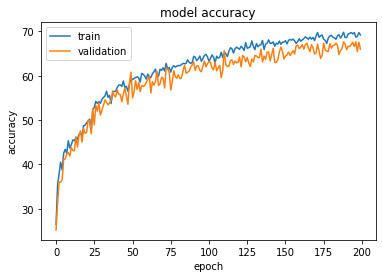

Maximum Train Accuracy : 69.80555725097656
Maximum Validation Accuracy : 67.66666412353516


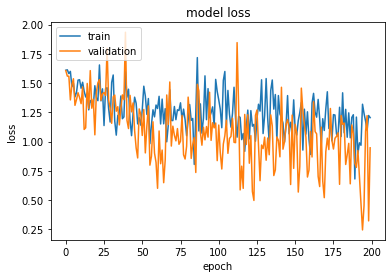

Minimum Train Loss : 0.6798425316810608
Minimum Validation Loss : 0.2442425936460495


In [ ]:
Bacteria_model_amp_Adagrad_0001 = Bact_Net()
Bacteria_model_amp_Adagrad_0001.cuda()
trainer_Adagrad_amp_0001 = trainer(Bacteria_model_amp_Adagrad_0001, amp_train_loader,"Adagrad", epoch_size=200, learning_rate=0.001)
trainer_Adagrad_amp_0001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adagrad_amp_0001.history['train_acc'])
plt.plot(trainer_Adagrad_amp_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adagrad_amp_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adagrad_amp_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adagrad_amp_0001.history['train_loss'])
plt.plot(trainer_Adagrad_amp_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adagrad_amp_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adagrad_amp_0001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 23.055557


  0%|          | 1/200 [00:15<50:02, 15.09s/it]

Val Acc | Epoch 1/200 | ACC 21.111111
Train Acc | Epoch 2/200 | ACC 20.194445


  1%|          | 2/200 [00:29<49:07, 14.89s/it]

Val Acc | Epoch 2/200 | ACC 20.888889
Train Acc | Epoch 3/200 | ACC 19.888889


  2%|▏         | 3/200 [00:44<49:10, 14.98s/it]

Val Acc | Epoch 3/200 | ACC 20.444445
Train Acc | Epoch 4/200 | ACC 19.888889


  2%|▏         | 4/200 [01:00<49:03, 15.02s/it]

Val Acc | Epoch 4/200 | ACC 20.444445
Train Acc | Epoch 5/200 | ACC 19.888889


  2%|▎         | 5/200 [01:15<49:02, 15.09s/it]

Val Acc | Epoch 5/200 | ACC 20.444445
Train Acc | Epoch 6/200 | ACC 19.888889


  3%|▎         | 6/200 [01:30<49:06, 15.19s/it]

Val Acc | Epoch 6/200 | ACC 20.444445
Train Acc | Epoch 7/200 | ACC 19.888889


  4%|▎         | 7/200 [01:46<49:31, 15.40s/it]

Val Acc | Epoch 7/200 | ACC 20.444445
Train Acc | Epoch 8/200 | ACC 19.888889


  4%|▍         | 8/200 [02:01<49:16, 15.40s/it]

Val Acc | Epoch 8/200 | ACC 20.444445
Train Acc | Epoch 9/200 | ACC 19.888889


  4%|▍         | 9/200 [02:17<49:03, 15.41s/it]

Val Acc | Epoch 9/200 | ACC 20.444445
Train Acc | Epoch 10/200 | ACC 19.888889


  5%|▌         | 10/200 [02:32<48:20, 15.27s/it]

Val Acc | Epoch 10/200 | ACC 20.444445
Train Acc | Epoch 11/200 | ACC 19.888889


  6%|▌         | 11/200 [02:47<48:05, 15.27s/it]

Val Acc | Epoch 11/200 | ACC 20.444445
Train Acc | Epoch 12/200 | ACC 19.888889


  6%|▌         | 12/200 [03:02<47:47, 15.25s/it]

Val Acc | Epoch 12/200 | ACC 20.444445
Train Acc | Epoch 13/200 | ACC 19.888889


  6%|▋         | 13/200 [03:17<47:34, 15.27s/it]

Val Acc | Epoch 13/200 | ACC 20.444445
Train Acc | Epoch 14/200 | ACC 19.888889


  7%|▋         | 14/200 [03:33<47:12, 15.23s/it]

Val Acc | Epoch 14/200 | ACC 20.444445
Train Acc | Epoch 15/200 | ACC 19.888889


  8%|▊         | 15/200 [03:48<46:53, 15.21s/it]

Val Acc | Epoch 15/200 | ACC 20.444445
Train Acc | Epoch 16/200 | ACC 19.888889


  8%|▊         | 16/200 [04:03<46:13, 15.07s/it]

Val Acc | Epoch 16/200 | ACC 20.444445
Train Acc | Epoch 17/200 | ACC 19.888889


  8%|▊         | 17/200 [04:18<45:53, 15.05s/it]

Val Acc | Epoch 17/200 | ACC 20.444445
Train Acc | Epoch 18/200 | ACC 19.888889


  9%|▉         | 18/200 [04:33<45:42, 15.07s/it]

Val Acc | Epoch 18/200 | ACC 20.444445
Train Acc | Epoch 19/200 | ACC 19.888889


 10%|▉         | 19/200 [04:47<45:10, 14.97s/it]

Val Acc | Epoch 19/200 | ACC 20.444445
Train Acc | Epoch 20/200 | ACC 19.888889


 10%|█         | 20/200 [05:02<44:55, 14.97s/it]

Val Acc | Epoch 20/200 | ACC 20.444445
Train Acc | Epoch 21/200 | ACC 19.888889


 10%|█         | 21/200 [05:18<44:58, 15.08s/it]

Val Acc | Epoch 21/200 | ACC 20.444445
Train Acc | Epoch 22/200 | ACC 19.888889


 11%|█         | 22/200 [05:33<44:41, 15.06s/it]

Val Acc | Epoch 22/200 | ACC 20.444445
Train Acc | Epoch 23/200 | ACC 19.888889


 12%|█▏        | 23/200 [05:48<44:12, 14.99s/it]

Val Acc | Epoch 23/200 | ACC 20.444445
Train Acc | Epoch 24/200 | ACC 19.888889


 12%|█▏        | 24/200 [06:02<43:55, 14.97s/it]

Val Acc | Epoch 24/200 | ACC 20.444445
Train Acc | Epoch 25/200 | ACC 19.888889


 12%|█▎        | 25/200 [06:18<43:42, 14.99s/it]

Val Acc | Epoch 25/200 | ACC 20.444445
Train Acc | Epoch 26/200 | ACC 19.888889


 13%|█▎        | 26/200 [06:32<43:26, 14.98s/it]

Val Acc | Epoch 26/200 | ACC 20.444445
Train Acc | Epoch 27/200 | ACC 19.888889


 14%|█▎        | 27/200 [06:48<43:42, 15.16s/it]

Val Acc | Epoch 27/200 | ACC 20.444445
Train Acc | Epoch 28/200 | ACC 19.888889


 14%|█▍        | 28/200 [07:03<43:31, 15.18s/it]

Val Acc | Epoch 28/200 | ACC 20.444445
Train Acc | Epoch 29/200 | ACC 19.916668


 14%|█▍        | 29/200 [07:18<43:12, 15.16s/it]

Val Acc | Epoch 29/200 | ACC 20.444445
Train Acc | Epoch 30/200 | ACC 19.888889


 15%|█▌        | 30/200 [07:33<42:50, 15.12s/it]

Val Acc | Epoch 30/200 | ACC 20.444445
Train Acc | Epoch 31/200 | ACC 20.222223


 16%|█▌        | 31/200 [07:48<42:26, 15.07s/it]

Val Acc | Epoch 31/200 | ACC 20.666668
Train Acc | Epoch 32/200 | ACC 20.277779


 16%|█▌        | 32/200 [08:03<42:13, 15.08s/it]

Val Acc | Epoch 32/200 | ACC 20.777779
Train Acc | Epoch 33/200 | ACC 19.888889


 16%|█▋        | 33/200 [08:18<41:54, 15.06s/it]

Val Acc | Epoch 33/200 | ACC 20.666668
Train Acc | Epoch 34/200 | ACC 20.250000


 17%|█▋        | 34/200 [08:34<41:39, 15.06s/it]

Val Acc | Epoch 34/200 | ACC 20.777779
Train Acc | Epoch 35/200 | ACC 20.138889


 18%|█▊        | 35/200 [08:49<41:24, 15.06s/it]

Val Acc | Epoch 35/200 | ACC 20.666668
Train Acc | Epoch 36/200 | ACC 20.111113


 18%|█▊        | 36/200 [09:04<41:13, 15.08s/it]

Val Acc | Epoch 36/200 | ACC 20.555555
Train Acc | Epoch 37/200 | ACC 19.888889


 18%|█▊        | 37/200 [09:19<41:06, 15.13s/it]

Val Acc | Epoch 37/200 | ACC 20.444445
Train Acc | Epoch 38/200 | ACC 20.750002


 19%|█▉        | 38/200 [09:34<41:06, 15.23s/it]

Val Acc | Epoch 38/200 | ACC 21.000000
Train Acc | Epoch 39/200 | ACC 22.861111


 20%|█▉        | 39/200 [09:50<40:45, 15.19s/it]

Val Acc | Epoch 39/200 | ACC 22.444445
Train Acc | Epoch 40/200 | ACC 21.222223


 20%|██        | 40/200 [10:05<40:34, 15.22s/it]

Val Acc | Epoch 40/200 | ACC 21.444445
Train Acc | Epoch 41/200 | ACC 22.805557


 20%|██        | 41/200 [10:20<40:06, 15.14s/it]

Val Acc | Epoch 41/200 | ACC 23.333334
Train Acc | Epoch 42/200 | ACC 24.972223


 21%|██        | 42/200 [10:35<39:44, 15.09s/it]

Val Acc | Epoch 42/200 | ACC 24.777779
Train Acc | Epoch 43/200 | ACC 26.638889


 22%|██▏       | 43/200 [10:50<39:29, 15.10s/it]

Val Acc | Epoch 43/200 | ACC 26.666668
Train Acc | Epoch 44/200 | ACC 21.305557


 22%|██▏       | 44/200 [11:05<39:12, 15.08s/it]

Val Acc | Epoch 44/200 | ACC 21.444445
Train Acc | Epoch 45/200 | ACC 24.527779


 22%|██▎       | 45/200 [11:20<38:52, 15.05s/it]

Val Acc | Epoch 45/200 | ACC 23.777779
Train Acc | Epoch 46/200 | ACC 22.361111


 23%|██▎       | 46/200 [11:35<38:23, 14.96s/it]

Val Acc | Epoch 46/200 | ACC 22.333334
Train Acc | Epoch 47/200 | ACC 24.416668


 24%|██▎       | 47/200 [11:50<38:26, 15.07s/it]

Val Acc | Epoch 47/200 | ACC 25.222223
Train Acc | Epoch 48/200 | ACC 25.750000


 24%|██▍       | 48/200 [12:06<38:42, 15.28s/it]

Val Acc | Epoch 48/200 | ACC 24.888889
Train Acc | Epoch 49/200 | ACC 23.861113


 24%|██▍       | 49/200 [12:21<38:14, 15.20s/it]

Val Acc | Epoch 49/200 | ACC 23.333334
Train Acc | Epoch 50/200 | ACC 27.833334


 25%|██▌       | 50/200 [12:35<37:39, 15.06s/it]

Val Acc | Epoch 50/200 | ACC 26.000002
Train Acc | Epoch 51/200 | ACC 26.111111


 26%|██▌       | 51/200 [12:50<37:06, 14.94s/it]

Val Acc | Epoch 51/200 | ACC 25.111113
Train Acc | Epoch 52/200 | ACC 30.083334


 26%|██▌       | 52/200 [13:05<36:54, 14.97s/it]

Val Acc | Epoch 52/200 | ACC 29.777777
Train Acc | Epoch 53/200 | ACC 30.888887


 26%|██▋       | 53/200 [13:20<36:37, 14.95s/it]

Val Acc | Epoch 53/200 | ACC 29.333336
Train Acc | Epoch 54/200 | ACC 28.333334


 27%|██▋       | 54/200 [13:35<36:32, 15.01s/it]

Val Acc | Epoch 54/200 | ACC 28.444445
Train Acc | Epoch 55/200 | ACC 32.250004


 28%|██▊       | 55/200 [13:50<36:22, 15.05s/it]

Val Acc | Epoch 55/200 | ACC 31.000000
Train Acc | Epoch 56/200 | ACC 27.166668


 28%|██▊       | 56/200 [14:06<36:19, 15.14s/it]

Val Acc | Epoch 56/200 | ACC 26.666668
Train Acc | Epoch 57/200 | ACC 30.111113


 28%|██▊       | 57/200 [14:21<36:07, 15.16s/it]

Val Acc | Epoch 57/200 | ACC 29.777777
Train Acc | Epoch 58/200 | ACC 34.277779


 29%|██▉       | 58/200 [14:36<35:38, 15.06s/it]

Val Acc | Epoch 58/200 | ACC 33.777779
Train Acc | Epoch 59/200 | ACC 33.361115


 30%|██▉       | 59/200 [14:51<35:31, 15.12s/it]

Val Acc | Epoch 59/200 | ACC 31.555557
Train Acc | Epoch 60/200 | ACC 33.333336


 30%|███       | 60/200 [15:06<35:10, 15.08s/it]

Val Acc | Epoch 60/200 | ACC 32.111111
Train Acc | Epoch 61/200 | ACC 33.722221


 30%|███       | 61/200 [15:21<34:48, 15.03s/it]

Val Acc | Epoch 61/200 | ACC 32.666668
Train Acc | Epoch 62/200 | ACC 35.333336


 31%|███       | 62/200 [15:36<34:29, 15.00s/it]

Val Acc | Epoch 62/200 | ACC 33.111115
Train Acc | Epoch 63/200 | ACC 32.722221


 32%|███▏      | 63/200 [15:51<34:14, 15.00s/it]

Val Acc | Epoch 63/200 | ACC 30.888887
Train Acc | Epoch 64/200 | ACC 34.111111


 32%|███▏      | 64/200 [16:06<34:11, 15.08s/it]

Val Acc | Epoch 64/200 | ACC 31.111113
Train Acc | Epoch 65/200 | ACC 33.750000


 32%|███▎      | 65/200 [16:21<33:54, 15.07s/it]

Val Acc | Epoch 65/200 | ACC 32.333336
Train Acc | Epoch 66/200 | ACC 35.833336


 33%|███▎      | 66/200 [16:36<33:26, 14.98s/it]

Val Acc | Epoch 66/200 | ACC 33.111115
Train Acc | Epoch 67/200 | ACC 35.666668


 34%|███▎      | 67/200 [16:51<33:18, 15.03s/it]

Val Acc | Epoch 67/200 | ACC 34.000000
Train Acc | Epoch 68/200 | ACC 35.305557


 34%|███▍      | 68/200 [17:06<33:16, 15.13s/it]

Val Acc | Epoch 68/200 | ACC 33.777779
Train Acc | Epoch 69/200 | ACC 35.444443


 34%|███▍      | 69/200 [17:22<33:18, 15.26s/it]

Val Acc | Epoch 69/200 | ACC 34.666668
Train Acc | Epoch 70/200 | ACC 36.750000


 35%|███▌      | 70/200 [17:37<33:00, 15.24s/it]

Val Acc | Epoch 70/200 | ACC 35.444443
Train Acc | Epoch 71/200 | ACC 36.222221


 36%|███▌      | 71/200 [17:52<32:38, 15.18s/it]

Val Acc | Epoch 71/200 | ACC 35.777779
Train Acc | Epoch 72/200 | ACC 36.500000


 36%|███▌      | 72/200 [18:07<32:23, 15.18s/it]

Val Acc | Epoch 72/200 | ACC 35.111111
Train Acc | Epoch 73/200 | ACC 37.694447


 36%|███▋      | 73/200 [18:22<31:50, 15.04s/it]

Val Acc | Epoch 73/200 | ACC 37.222225
Train Acc | Epoch 74/200 | ACC 36.416668


 37%|███▋      | 74/200 [18:37<31:43, 15.10s/it]

Val Acc | Epoch 74/200 | ACC 34.777779
Train Acc | Epoch 75/200 | ACC 35.722221


 38%|███▊      | 75/200 [18:52<31:28, 15.11s/it]

Val Acc | Epoch 75/200 | ACC 34.777779
Train Acc | Epoch 76/200 | ACC 35.638889


 38%|███▊      | 76/200 [19:08<31:12, 15.10s/it]

Val Acc | Epoch 76/200 | ACC 34.000000
Train Acc | Epoch 77/200 | ACC 36.944447


 38%|███▊      | 77/200 [19:22<30:50, 15.04s/it]

Val Acc | Epoch 77/200 | ACC 35.444443
Train Acc | Epoch 78/200 | ACC 36.916668


 39%|███▉      | 78/200 [19:38<30:41, 15.09s/it]

Val Acc | Epoch 78/200 | ACC 34.777779
Train Acc | Epoch 79/200 | ACC 36.611115


 40%|███▉      | 79/200 [19:52<30:15, 15.01s/it]

Val Acc | Epoch 79/200 | ACC 35.111111
Train Acc | Epoch 80/200 | ACC 37.305557


 40%|████      | 80/200 [20:07<29:53, 14.95s/it]

Val Acc | Epoch 80/200 | ACC 36.333336
Train Acc | Epoch 81/200 | ACC 36.722221


 40%|████      | 81/200 [20:22<29:41, 14.97s/it]

Val Acc | Epoch 81/200 | ACC 35.666668
Train Acc | Epoch 82/200 | ACC 37.583332


 41%|████      | 82/200 [20:38<29:38, 15.07s/it]

Val Acc | Epoch 82/200 | ACC 35.888889
Train Acc | Epoch 83/200 | ACC 37.083332


 42%|████▏     | 83/200 [20:53<29:29, 15.12s/it]

Val Acc | Epoch 83/200 | ACC 35.777779
Train Acc | Epoch 84/200 | ACC 36.833336


 42%|████▏     | 84/200 [21:08<29:04, 15.04s/it]

Val Acc | Epoch 84/200 | ACC 34.666668
Train Acc | Epoch 85/200 | ACC 38.000000


 42%|████▎     | 85/200 [21:22<28:38, 14.94s/it]

Val Acc | Epoch 85/200 | ACC 36.444447
Train Acc | Epoch 86/200 | ACC 37.750000


 43%|████▎     | 86/200 [21:37<28:18, 14.90s/it]

Val Acc | Epoch 86/200 | ACC 36.888889
Train Acc | Epoch 87/200 | ACC 37.472225


 44%|████▎     | 87/200 [21:53<28:19, 15.04s/it]

Val Acc | Epoch 87/200 | ACC 36.888889
Train Acc | Epoch 88/200 | ACC 37.472225


 44%|████▍     | 88/200 [22:08<28:06, 15.06s/it]

Val Acc | Epoch 88/200 | ACC 35.666668
Train Acc | Epoch 89/200 | ACC 37.638889


 44%|████▍     | 89/200 [22:24<28:33, 15.44s/it]

Val Acc | Epoch 89/200 | ACC 35.666668
Train Acc | Epoch 90/200 | ACC 37.888889


 45%|████▌     | 90/200 [22:39<28:10, 15.37s/it]

Val Acc | Epoch 90/200 | ACC 36.666668
Train Acc | Epoch 91/200 | ACC 37.750000


 46%|████▌     | 91/200 [22:55<27:59, 15.41s/it]

Val Acc | Epoch 91/200 | ACC 36.111115
Train Acc | Epoch 92/200 | ACC 37.833332


 46%|████▌     | 92/200 [23:10<27:43, 15.40s/it]

Val Acc | Epoch 92/200 | ACC 36.111115
Train Acc | Epoch 93/200 | ACC 37.638889


 46%|████▋     | 93/200 [23:25<27:17, 15.31s/it]

Val Acc | Epoch 93/200 | ACC 36.333336
Train Acc | Epoch 94/200 | ACC 38.000000


 47%|████▋     | 94/200 [23:40<26:58, 15.27s/it]

Val Acc | Epoch 94/200 | ACC 37.111111
Train Acc | Epoch 95/200 | ACC 37.361111


 48%|████▊     | 95/200 [23:55<26:31, 15.16s/it]

Val Acc | Epoch 95/200 | ACC 36.555557
Train Acc | Epoch 96/200 | ACC 37.611111


 48%|████▊     | 96/200 [24:10<26:12, 15.12s/it]

Val Acc | Epoch 96/200 | ACC 36.000000
Train Acc | Epoch 97/200 | ACC 37.583332


 48%|████▊     | 97/200 [24:26<25:59, 15.14s/it]

Val Acc | Epoch 97/200 | ACC 37.111111
Train Acc | Epoch 98/200 | ACC 37.722225


 49%|████▉     | 98/200 [24:41<25:42, 15.12s/it]

Val Acc | Epoch 98/200 | ACC 37.222225
Train Acc | Epoch 99/200 | ACC 38.027779


 50%|████▉     | 99/200 [24:56<25:26, 15.12s/it]

Val Acc | Epoch 99/200 | ACC 36.555557
Train Acc | Epoch 100/200 | ACC 37.805557


 50%|█████     | 100/200 [25:11<25:03, 15.03s/it]

Val Acc | Epoch 100/200 | ACC 37.222225
Train Acc | Epoch 101/200 | ACC 37.888889


 50%|█████     | 101/200 [25:26<24:57, 15.13s/it]

Val Acc | Epoch 101/200 | ACC 37.111111
Train Acc | Epoch 102/200 | ACC 38.000000


 51%|█████     | 102/200 [25:41<24:53, 15.24s/it]

Val Acc | Epoch 102/200 | ACC 36.666668
Train Acc | Epoch 103/200 | ACC 38.000000


 52%|█████▏    | 103/200 [25:57<24:35, 15.21s/it]

Val Acc | Epoch 103/200 | ACC 36.444447
Train Acc | Epoch 104/200 | ACC 37.750000


 52%|█████▏    | 104/200 [26:12<24:23, 15.25s/it]

Val Acc | Epoch 104/200 | ACC 36.444447
Train Acc | Epoch 105/200 | ACC 37.722225


 52%|█████▎    | 105/200 [26:27<24:02, 15.18s/it]

Val Acc | Epoch 105/200 | ACC 36.666668
Train Acc | Epoch 106/200 | ACC 38.222225


 53%|█████▎    | 106/200 [26:42<23:43, 15.14s/it]

Val Acc | Epoch 106/200 | ACC 36.888889
Train Acc | Epoch 107/200 | ACC 38.083332


 54%|█████▎    | 107/200 [26:57<23:12, 14.98s/it]

Val Acc | Epoch 107/200 | ACC 36.555557
Train Acc | Epoch 108/200 | ACC 38.027779


 54%|█████▍    | 108/200 [27:11<22:54, 14.94s/it]

Val Acc | Epoch 108/200 | ACC 36.777779
Train Acc | Epoch 109/200 | ACC 38.416668


 55%|█████▍    | 109/200 [27:27<22:54, 15.10s/it]

Val Acc | Epoch 109/200 | ACC 37.111111
Train Acc | Epoch 110/200 | ACC 38.083332


 55%|█████▌    | 110/200 [27:43<23:01, 15.34s/it]

Val Acc | Epoch 110/200 | ACC 37.111111
Train Acc | Epoch 111/200 | ACC 38.694443


 56%|█████▌    | 111/200 [27:58<22:40, 15.28s/it]

Val Acc | Epoch 111/200 | ACC 37.555557
Train Acc | Epoch 112/200 | ACC 38.805557


 56%|█████▌    | 112/200 [28:13<22:22, 15.25s/it]

Val Acc | Epoch 112/200 | ACC 37.555557
Train Acc | Epoch 113/200 | ACC 38.777779


 56%|█████▋    | 113/200 [28:28<21:57, 15.14s/it]

Val Acc | Epoch 113/200 | ACC 36.444447
Train Acc | Epoch 114/200 | ACC 38.638889


 57%|█████▋    | 114/200 [28:43<21:40, 15.13s/it]

Val Acc | Epoch 114/200 | ACC 37.000000
Train Acc | Epoch 115/200 | ACC 38.500004


 57%|█████▊    | 115/200 [28:58<21:25, 15.13s/it]

Val Acc | Epoch 115/200 | ACC 36.888889
Train Acc | Epoch 116/200 | ACC 38.361111


 58%|█████▊    | 116/200 [29:13<21:05, 15.07s/it]

Val Acc | Epoch 116/200 | ACC 37.777779
Train Acc | Epoch 117/200 | ACC 38.805557


 58%|█████▊    | 117/200 [29:28<20:51, 15.08s/it]

Val Acc | Epoch 117/200 | ACC 39.333336
Train Acc | Epoch 118/200 | ACC 38.611111


 59%|█████▉    | 118/200 [29:43<20:38, 15.11s/it]

Val Acc | Epoch 118/200 | ACC 38.111111
Train Acc | Epoch 119/200 | ACC 38.638889


 60%|█████▉    | 119/200 [29:59<20:29, 15.18s/it]

Val Acc | Epoch 119/200 | ACC 36.777779
Train Acc | Epoch 120/200 | ACC 39.000000


 60%|██████    | 120/200 [30:14<20:11, 15.14s/it]

Val Acc | Epoch 120/200 | ACC 36.666668
Train Acc | Epoch 121/200 | ACC 38.694443


 60%|██████    | 121/200 [30:29<19:49, 15.05s/it]

Val Acc | Epoch 121/200 | ACC 36.444447
Train Acc | Epoch 122/200 | ACC 39.416668


 61%|██████    | 122/200 [30:44<19:36, 15.08s/it]

Val Acc | Epoch 122/200 | ACC 38.555557
Train Acc | Epoch 123/200 | ACC 38.916668


 62%|██████▏   | 123/200 [30:59<19:21, 15.08s/it]

Val Acc | Epoch 123/200 | ACC 37.000000
Train Acc | Epoch 124/200 | ACC 38.833336


 62%|██████▏   | 124/200 [31:14<19:15, 15.21s/it]

Val Acc | Epoch 124/200 | ACC 37.444447
Train Acc | Epoch 125/200 | ACC 38.972221


 62%|██████▎   | 125/200 [31:30<19:00, 15.20s/it]

Val Acc | Epoch 125/200 | ACC 37.000000
Train Acc | Epoch 126/200 | ACC 38.500004


 63%|██████▎   | 126/200 [31:45<18:42, 15.17s/it]

Val Acc | Epoch 126/200 | ACC 37.111111
Train Acc | Epoch 127/200 | ACC 39.166668


 64%|██████▎   | 127/200 [32:00<18:30, 15.21s/it]

Val Acc | Epoch 127/200 | ACC 37.222225
Train Acc | Epoch 128/200 | ACC 39.250000


 64%|██████▍   | 128/200 [32:15<18:17, 15.25s/it]

Val Acc | Epoch 128/200 | ACC 37.666668
Train Acc | Epoch 129/200 | ACC 39.416668


 64%|██████▍   | 129/200 [32:30<17:59, 15.21s/it]

Val Acc | Epoch 129/200 | ACC 37.666668
Train Acc | Epoch 130/200 | ACC 38.861111


 65%|██████▌   | 130/200 [32:47<18:03, 15.48s/it]

Val Acc | Epoch 130/200 | ACC 36.444447
Train Acc | Epoch 131/200 | ACC 39.055557


 66%|██████▌   | 131/200 [33:02<17:38, 15.34s/it]

Val Acc | Epoch 131/200 | ACC 38.111111
Train Acc | Epoch 132/200 | ACC 39.000000


 66%|██████▌   | 132/200 [33:17<17:25, 15.38s/it]

Val Acc | Epoch 132/200 | ACC 38.111111
Train Acc | Epoch 133/200 | ACC 39.388889


 66%|██████▋   | 133/200 [33:32<17:08, 15.35s/it]

Val Acc | Epoch 133/200 | ACC 37.666668
Train Acc | Epoch 134/200 | ACC 39.805557


 67%|██████▋   | 134/200 [33:48<16:52, 15.33s/it]

Val Acc | Epoch 134/200 | ACC 38.000000
Train Acc | Epoch 135/200 | ACC 39.472221


 68%|██████▊   | 135/200 [34:03<16:33, 15.29s/it]

Val Acc | Epoch 135/200 | ACC 39.111115
Train Acc | Epoch 136/200 | ACC 39.777779


 68%|██████▊   | 136/200 [34:18<16:19, 15.30s/it]

Val Acc | Epoch 136/200 | ACC 39.555557
Train Acc | Epoch 137/200 | ACC 38.944443


 68%|██████▊   | 137/200 [34:33<15:57, 15.20s/it]

Val Acc | Epoch 137/200 | ACC 37.777779
Train Acc | Epoch 138/200 | ACC 39.138889


 69%|██████▉   | 138/200 [34:48<15:39, 15.16s/it]

Val Acc | Epoch 138/200 | ACC 38.777779
Train Acc | Epoch 139/200 | ACC 39.833336


 70%|██████▉   | 139/200 [35:03<15:19, 15.07s/it]

Val Acc | Epoch 139/200 | ACC 38.111111
Train Acc | Epoch 140/200 | ACC 39.361115


 70%|███████   | 140/200 [35:18<15:01, 15.02s/it]

Val Acc | Epoch 140/200 | ACC 38.555557
Train Acc | Epoch 141/200 | ACC 39.277779


 70%|███████   | 141/200 [35:32<14:37, 14.87s/it]

Val Acc | Epoch 141/200 | ACC 38.333336
Train Acc | Epoch 142/200 | ACC 39.944447


 71%|███████   | 142/200 [35:48<14:31, 15.03s/it]

Val Acc | Epoch 142/200 | ACC 37.777779
Train Acc | Epoch 143/200 | ACC 39.388889


 72%|███████▏  | 143/200 [36:03<14:23, 15.15s/it]

Val Acc | Epoch 143/200 | ACC 39.888889
Train Acc | Epoch 144/200 | ACC 39.027779


 72%|███████▏  | 144/200 [36:18<14:07, 15.14s/it]

Val Acc | Epoch 144/200 | ACC 38.555557
Train Acc | Epoch 145/200 | ACC 40.222225


 72%|███████▎  | 145/200 [36:33<13:45, 15.01s/it]

Val Acc | Epoch 145/200 | ACC 39.111115
Train Acc | Epoch 146/200 | ACC 39.722221


 73%|███████▎  | 146/200 [36:48<13:33, 15.06s/it]

Val Acc | Epoch 146/200 | ACC 39.000000
Train Acc | Epoch 147/200 | ACC 39.416668


 74%|███████▎  | 147/200 [37:03<13:17, 15.04s/it]

Val Acc | Epoch 147/200 | ACC 38.888889
Train Acc | Epoch 148/200 | ACC 39.611115


 74%|███████▍  | 148/200 [37:18<13:00, 15.01s/it]

Val Acc | Epoch 148/200 | ACC 39.666668
Train Acc | Epoch 149/200 | ACC 39.833336


 74%|███████▍  | 149/200 [37:33<12:47, 15.05s/it]

Val Acc | Epoch 149/200 | ACC 38.555557
Train Acc | Epoch 150/200 | ACC 39.972221


 75%|███████▌  | 150/200 [37:49<12:40, 15.20s/it]

Val Acc | Epoch 150/200 | ACC 38.222225
Train Acc | Epoch 151/200 | ACC 40.055553


 76%|███████▌  | 151/200 [38:05<12:33, 15.38s/it]

Val Acc | Epoch 151/200 | ACC 39.000000
Train Acc | Epoch 152/200 | ACC 40.000000


 76%|███████▌  | 152/200 [38:20<12:16, 15.34s/it]

Val Acc | Epoch 152/200 | ACC 38.444443
Train Acc | Epoch 153/200 | ACC 39.972221


 76%|███████▋  | 153/200 [38:35<11:53, 15.18s/it]

Val Acc | Epoch 153/200 | ACC 38.444443
Train Acc | Epoch 154/200 | ACC 39.694447


 77%|███████▋  | 154/200 [38:50<11:34, 15.09s/it]

Val Acc | Epoch 154/200 | ACC 38.555557
Train Acc | Epoch 155/200 | ACC 40.194447


 78%|███████▊  | 155/200 [39:05<11:19, 15.09s/it]

Val Acc | Epoch 155/200 | ACC 38.555557
Train Acc | Epoch 156/200 | ACC 40.055553


 78%|███████▊  | 156/200 [39:20<11:03, 15.09s/it]

Val Acc | Epoch 156/200 | ACC 38.888889
Train Acc | Epoch 157/200 | ACC 40.166668


 78%|███████▊  | 157/200 [39:35<10:48, 15.09s/it]

Val Acc | Epoch 157/200 | ACC 37.666668
Train Acc | Epoch 158/200 | ACC 40.222225


 79%|███████▉  | 158/200 [39:50<10:35, 15.12s/it]

Val Acc | Epoch 158/200 | ACC 39.111115
Train Acc | Epoch 159/200 | ACC 40.666668


 80%|███████▉  | 159/200 [40:05<10:17, 15.06s/it]

Val Acc | Epoch 159/200 | ACC 39.666668
Train Acc | Epoch 160/200 | ACC 40.166668


 80%|████████  | 160/200 [40:20<10:02, 15.06s/it]

Val Acc | Epoch 160/200 | ACC 38.666668
Train Acc | Epoch 161/200 | ACC 40.638889


 80%|████████  | 161/200 [40:35<09:50, 15.15s/it]

Val Acc | Epoch 161/200 | ACC 37.777779
Train Acc | Epoch 162/200 | ACC 40.194447


 81%|████████  | 162/200 [40:51<09:36, 15.17s/it]

Val Acc | Epoch 162/200 | ACC 39.444447
Train Acc | Epoch 163/200 | ACC 39.611115


 82%|████████▏ | 163/200 [41:06<09:21, 15.17s/it]

Val Acc | Epoch 163/200 | ACC 38.888889
Train Acc | Epoch 164/200 | ACC 40.861111


 82%|████████▏ | 164/200 [41:21<09:09, 15.27s/it]

Val Acc | Epoch 164/200 | ACC 39.555557
Train Acc | Epoch 165/200 | ACC 40.555557


 82%|████████▎ | 165/200 [41:36<08:51, 15.20s/it]

Val Acc | Epoch 165/200 | ACC 39.777779
Train Acc | Epoch 166/200 | ACC 40.722225


 83%|████████▎ | 166/200 [41:52<08:37, 15.23s/it]

Val Acc | Epoch 166/200 | ACC 39.111115
Train Acc | Epoch 167/200 | ACC 40.472225


 84%|████████▎ | 167/200 [42:07<08:20, 15.18s/it]

Val Acc | Epoch 167/200 | ACC 38.666668
Train Acc | Epoch 168/200 | ACC 40.166668


 84%|████████▍ | 168/200 [42:22<08:07, 15.23s/it]

Val Acc | Epoch 168/200 | ACC 39.777779
Train Acc | Epoch 169/200 | ACC 40.194447


 84%|████████▍ | 169/200 [42:37<07:50, 15.18s/it]

Val Acc | Epoch 169/200 | ACC 38.777779
Train Acc | Epoch 170/200 | ACC 40.138893


 85%|████████▌ | 170/200 [42:52<07:37, 15.24s/it]

Val Acc | Epoch 170/200 | ACC 38.777779
Train Acc | Epoch 171/200 | ACC 40.361111


 86%|████████▌ | 171/200 [43:09<07:30, 15.53s/it]

Val Acc | Epoch 171/200 | ACC 38.777779
Train Acc | Epoch 172/200 | ACC 40.694447


 86%|████████▌ | 172/200 [43:24<07:13, 15.48s/it]

Val Acc | Epoch 172/200 | ACC 39.666668
Train Acc | Epoch 173/200 | ACC 40.444447


 86%|████████▋ | 173/200 [43:39<06:55, 15.40s/it]

Val Acc | Epoch 173/200 | ACC 38.888889
Train Acc | Epoch 174/200 | ACC 40.694447


 87%|████████▋ | 174/200 [43:55<06:39, 15.36s/it]

Val Acc | Epoch 174/200 | ACC 38.888889
Train Acc | Epoch 175/200 | ACC 40.555557


 88%|████████▊ | 175/200 [44:09<06:20, 15.22s/it]

Val Acc | Epoch 175/200 | ACC 40.222225
Train Acc | Epoch 176/200 | ACC 40.388889


 88%|████████▊ | 176/200 [44:24<06:02, 15.10s/it]

Val Acc | Epoch 176/200 | ACC 39.000000
Train Acc | Epoch 177/200 | ACC 40.083332


 88%|████████▊ | 177/200 [44:39<05:46, 15.05s/it]

Val Acc | Epoch 177/200 | ACC 38.777779
Train Acc | Epoch 178/200 | ACC 40.750000


 89%|████████▉ | 178/200 [44:54<05:32, 15.13s/it]

Val Acc | Epoch 178/200 | ACC 37.888889
Train Acc | Epoch 179/200 | ACC 40.333332


 90%|████████▉ | 179/200 [45:09<05:16, 15.08s/it]

Val Acc | Epoch 179/200 | ACC 38.666668
Train Acc | Epoch 180/200 | ACC 41.333336


 90%|█████████ | 180/200 [45:25<05:02, 15.14s/it]

Val Acc | Epoch 180/200 | ACC 37.888889
Train Acc | Epoch 181/200 | ACC 40.833332


 90%|█████████ | 181/200 [45:40<04:46, 15.10s/it]

Val Acc | Epoch 181/200 | ACC 38.666668
Train Acc | Epoch 182/200 | ACC 40.444447


 91%|█████████ | 182/200 [45:55<04:30, 15.00s/it]

Val Acc | Epoch 182/200 | ACC 39.333336
Train Acc | Epoch 183/200 | ACC 41.111111


 92%|█████████▏| 183/200 [46:10<04:16, 15.11s/it]

Val Acc | Epoch 183/200 | ACC 39.000000
Train Acc | Epoch 184/200 | ACC 41.472225


 92%|█████████▏| 184/200 [46:25<04:01, 15.09s/it]

Val Acc | Epoch 184/200 | ACC 40.777779
Train Acc | Epoch 185/200 | ACC 40.416668


 92%|█████████▎| 185/200 [46:40<03:46, 15.11s/it]

Val Acc | Epoch 185/200 | ACC 40.777779
Train Acc | Epoch 186/200 | ACC 41.472225


 93%|█████████▎| 186/200 [46:56<03:33, 15.23s/it]

Val Acc | Epoch 186/200 | ACC 40.111115
Train Acc | Epoch 187/200 | ACC 40.805557


 94%|█████████▎| 187/200 [47:11<03:17, 15.19s/it]

Val Acc | Epoch 187/200 | ACC 40.666668
Train Acc | Epoch 188/200 | ACC 40.472225


 94%|█████████▍| 188/200 [47:26<03:02, 15.17s/it]

Val Acc | Epoch 188/200 | ACC 39.555557
Train Acc | Epoch 189/200 | ACC 41.722221


 94%|█████████▍| 189/200 [47:41<02:46, 15.13s/it]

Val Acc | Epoch 189/200 | ACC 40.333332
Train Acc | Epoch 190/200 | ACC 41.138889


 95%|█████████▌| 190/200 [47:56<02:31, 15.18s/it]

Val Acc | Epoch 190/200 | ACC 38.111111
Train Acc | Epoch 191/200 | ACC 40.388889


 96%|█████████▌| 191/200 [48:12<02:18, 15.35s/it]

Val Acc | Epoch 191/200 | ACC 39.666668
Train Acc | Epoch 192/200 | ACC 40.666668


 96%|█████████▌| 192/200 [48:27<02:03, 15.38s/it]

Val Acc | Epoch 192/200 | ACC 38.666668
Train Acc | Epoch 193/200 | ACC 40.833332


 96%|█████████▋| 193/200 [48:43<01:47, 15.39s/it]

Val Acc | Epoch 193/200 | ACC 39.555557
Train Acc | Epoch 194/200 | ACC 40.500000


 97%|█████████▋| 194/200 [48:58<01:31, 15.26s/it]

Val Acc | Epoch 194/200 | ACC 39.666668
Train Acc | Epoch 195/200 | ACC 41.083332


 98%|█████████▊| 195/200 [49:13<01:16, 15.22s/it]

Val Acc | Epoch 195/200 | ACC 40.333332
Train Acc | Epoch 196/200 | ACC 40.833332


 98%|█████████▊| 196/200 [49:28<01:00, 15.17s/it]

Val Acc | Epoch 196/200 | ACC 40.555557
Train Acc | Epoch 197/200 | ACC 41.305557


 98%|█████████▊| 197/200 [49:43<00:45, 15.14s/it]

Val Acc | Epoch 197/200 | ACC 40.888889
Train Acc | Epoch 198/200 | ACC 40.805557


 99%|█████████▉| 198/200 [49:58<00:30, 15.06s/it]

Val Acc | Epoch 198/200 | ACC 39.333336
Train Acc | Epoch 199/200 | ACC 41.694443


100%|█████████▉| 199/200 [50:13<00:15, 15.07s/it]

Val Acc | Epoch 199/200 | ACC 39.666668
Train Acc | Epoch 200/200 | ACC 41.138889


100%|██████████| 200/200 [50:28<00:00, 15.14s/it]

Val Acc | Epoch 200/200 | ACC 40.000000


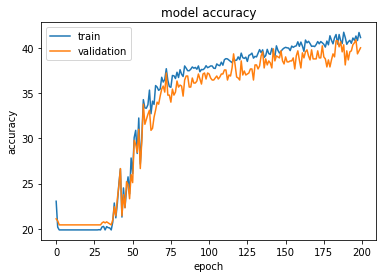

Maximum Train Accuracy : 41.72222137451172
Maximum Validation Accuracy : 40.88888931274414


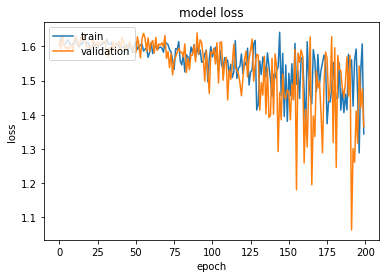

Minimum Train Loss : 1.288611650466919
Minimum Validation Loss : 1.0635792016983032


In [ ]:
Bacteria_model_amp_Adagrad_00001 = Bact_Net()
Bacteria_model_amp_Adagrad_00001.cuda()
trainer_Adagrad_amp_00001 = trainer(Bacteria_model_amp_Adagrad_00001, amp_train_loader,"Adagrad", epoch_size=200, learning_rate=0.0001)
trainer_Adagrad_amp_00001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adagrad_amp_00001.history['train_acc'])
plt.plot(trainer_Adagrad_amp_00001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adagrad_amp_00001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adagrad_amp_00001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adagrad_amp_00001.history['train_loss'])
plt.plot(trainer_Adagrad_amp_00001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adagrad_amp_00001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adagrad_amp_00001.history['val_loss'])}")

# Amp_RMSprop

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 22.111113


  0%|          | 1/200 [00:15<50:40, 15.28s/it]

Val Acc | Epoch 1/200 | ACC 23.666668
Train Acc | Epoch 2/200 | ACC 30.222221


  1%|          | 2/200 [00:30<50:17, 15.24s/it]

Val Acc | Epoch 2/200 | ACC 26.888889
Train Acc | Epoch 3/200 | ACC 20.388889


  2%|▏         | 3/200 [00:45<49:53, 15.20s/it]

Val Acc | Epoch 3/200 | ACC 18.444445
Train Acc | Epoch 4/200 | ACC 19.888889


  2%|▏         | 4/200 [01:01<49:53, 15.27s/it]

Val Acc | Epoch 4/200 | ACC 20.444445
Train Acc | Epoch 5/200 | ACC 20.138889


  2%|▎         | 5/200 [01:16<49:50, 15.33s/it]

Val Acc | Epoch 5/200 | ACC 19.444445
Train Acc | Epoch 6/200 | ACC 19.888889


  3%|▎         | 6/200 [01:31<48:49, 15.10s/it]

Val Acc | Epoch 6/200 | ACC 20.444445
Train Acc | Epoch 7/200 | ACC 20.138889


  4%|▎         | 7/200 [01:46<48:28, 15.07s/it]

Val Acc | Epoch 7/200 | ACC 19.444445
Train Acc | Epoch 8/200 | ACC 19.972223


  4%|▍         | 8/200 [02:01<48:06, 15.04s/it]

Val Acc | Epoch 8/200 | ACC 20.111113
Train Acc | Epoch 9/200 | ACC 19.972223


  4%|▍         | 9/200 [02:16<48:16, 15.17s/it]

Val Acc | Epoch 9/200 | ACC 20.111113
Train Acc | Epoch 10/200 | ACC 20.388889


  5%|▌         | 10/200 [02:31<48:10, 15.22s/it]

Val Acc | Epoch 10/200 | ACC 18.444445
Train Acc | Epoch 11/200 | ACC 19.611111


  6%|▌         | 11/200 [02:47<47:54, 15.21s/it]

Val Acc | Epoch 11/200 | ACC 21.555557
Train Acc | Epoch 12/200 | ACC 19.611111


  6%|▌         | 12/200 [03:03<48:30, 15.48s/it]

Val Acc | Epoch 12/200 | ACC 21.555557
Train Acc | Epoch 13/200 | ACC 20.388889


  6%|▋         | 13/200 [03:18<48:14, 15.48s/it]

Val Acc | Epoch 13/200 | ACC 18.444445
Train Acc | Epoch 14/200 | ACC 19.888889


  7%|▋         | 14/200 [03:33<47:39, 15.37s/it]

Val Acc | Epoch 14/200 | ACC 20.444445
Train Acc | Epoch 15/200 | ACC 20.138889


  8%|▊         | 15/200 [03:49<47:23, 15.37s/it]

Val Acc | Epoch 15/200 | ACC 19.444445
Train Acc | Epoch 16/200 | ACC 20.138889


  8%|▊         | 16/200 [04:04<47:07, 15.36s/it]

Val Acc | Epoch 16/200 | ACC 19.444445
Train Acc | Epoch 17/200 | ACC 19.888889


  8%|▊         | 17/200 [04:19<46:58, 15.40s/it]

Val Acc | Epoch 17/200 | ACC 20.444445
Train Acc | Epoch 18/200 | ACC 19.888889


  9%|▉         | 18/200 [04:35<46:28, 15.32s/it]

Val Acc | Epoch 18/200 | ACC 20.444445
Train Acc | Epoch 19/200 | ACC 19.972223


 10%|▉         | 19/200 [04:50<45:51, 15.20s/it]

Val Acc | Epoch 19/200 | ACC 20.111113
Train Acc | Epoch 20/200 | ACC 20.388889


 10%|█         | 20/200 [05:05<45:28, 15.16s/it]

Val Acc | Epoch 20/200 | ACC 18.444445
Train Acc | Epoch 21/200 | ACC 19.611111


 10%|█         | 21/200 [05:20<45:11, 15.15s/it]

Val Acc | Epoch 21/200 | ACC 21.555557
Train Acc | Epoch 22/200 | ACC 20.388889


 11%|█         | 22/200 [05:35<44:45, 15.09s/it]

Val Acc | Epoch 22/200 | ACC 18.444445
Train Acc | Epoch 23/200 | ACC 19.611111


 12%|█▏        | 23/200 [05:50<44:32, 15.10s/it]

Val Acc | Epoch 23/200 | ACC 21.555557
Train Acc | Epoch 24/200 | ACC 20.388889


 12%|█▏        | 24/200 [06:05<44:26, 15.15s/it]

Val Acc | Epoch 24/200 | ACC 18.444445
Train Acc | Epoch 25/200 | ACC 19.611111


 12%|█▎        | 25/200 [06:20<44:16, 15.18s/it]

Val Acc | Epoch 25/200 | ACC 21.555557
Train Acc | Epoch 26/200 | ACC 20.138889


 13%|█▎        | 26/200 [06:36<44:05, 15.21s/it]

Val Acc | Epoch 26/200 | ACC 19.444445
Train Acc | Epoch 27/200 | ACC 20.138889


 14%|█▎        | 27/200 [06:51<43:54, 15.23s/it]

Val Acc | Epoch 27/200 | ACC 19.444445
Train Acc | Epoch 28/200 | ACC 19.972223


 14%|█▍        | 28/200 [07:06<43:21, 15.13s/it]

Val Acc | Epoch 28/200 | ACC 20.111113
Train Acc | Epoch 29/200 | ACC 19.972223


 14%|█▍        | 29/200 [07:21<43:05, 15.12s/it]

Val Acc | Epoch 29/200 | ACC 20.111113
Train Acc | Epoch 30/200 | ACC 19.972223


 15%|█▌        | 30/200 [07:36<42:50, 15.12s/it]

Val Acc | Epoch 30/200 | ACC 20.111113
Train Acc | Epoch 31/200 | ACC 19.888889


 16%|█▌        | 31/200 [07:51<42:39, 15.15s/it]

Val Acc | Epoch 31/200 | ACC 20.444445
Train Acc | Epoch 32/200 | ACC 19.972223


 16%|█▌        | 32/200 [08:07<43:17, 15.46s/it]

Val Acc | Epoch 32/200 | ACC 20.111113
Train Acc | Epoch 33/200 | ACC 20.388889


 16%|█▋        | 33/200 [08:23<43:20, 15.57s/it]

Val Acc | Epoch 33/200 | ACC 18.444445
Train Acc | Epoch 34/200 | ACC 19.888889


 17%|█▋        | 34/200 [08:38<42:47, 15.47s/it]

Val Acc | Epoch 34/200 | ACC 20.444445
Train Acc | Epoch 35/200 | ACC 20.138889


 18%|█▊        | 35/200 [08:54<42:26, 15.43s/it]

Val Acc | Epoch 35/200 | ACC 19.444445
Train Acc | Epoch 36/200 | ACC 19.611111


 18%|█▊        | 36/200 [09:09<41:54, 15.33s/it]

Val Acc | Epoch 36/200 | ACC 21.555557
Train Acc | Epoch 37/200 | ACC 20.138889


 18%|█▊        | 37/200 [09:24<41:30, 15.28s/it]

Val Acc | Epoch 37/200 | ACC 19.444445
Train Acc | Epoch 38/200 | ACC 20.138889


 19%|█▉        | 38/200 [09:39<41:13, 15.27s/it]

Val Acc | Epoch 38/200 | ACC 19.444445
Train Acc | Epoch 39/200 | ACC 20.138889


 20%|█▉        | 39/200 [09:54<40:46, 15.20s/it]

Val Acc | Epoch 39/200 | ACC 19.444445
Train Acc | Epoch 40/200 | ACC 19.972223


 20%|██        | 40/200 [10:09<40:23, 15.14s/it]

Val Acc | Epoch 40/200 | ACC 20.111113
Train Acc | Epoch 41/200 | ACC 19.888889


 20%|██        | 41/200 [10:25<40:13, 15.18s/it]

Val Acc | Epoch 41/200 | ACC 20.444445
Train Acc | Epoch 42/200 | ACC 20.138889


 21%|██        | 42/200 [10:40<39:55, 15.16s/it]

Val Acc | Epoch 42/200 | ACC 19.444445
Train Acc | Epoch 43/200 | ACC 19.888889


 22%|██▏       | 43/200 [10:55<39:30, 15.10s/it]

Val Acc | Epoch 43/200 | ACC 20.444445
Train Acc | Epoch 44/200 | ACC 20.388889


 22%|██▏       | 44/200 [11:10<39:20, 15.13s/it]

Val Acc | Epoch 44/200 | ACC 18.444445
Train Acc | Epoch 45/200 | ACC 19.972223


 22%|██▎       | 45/200 [11:25<38:51, 15.04s/it]

Val Acc | Epoch 45/200 | ACC 20.111113
Train Acc | Epoch 46/200 | ACC 19.611111


 23%|██▎       | 46/200 [11:40<38:38, 15.06s/it]

Val Acc | Epoch 46/200 | ACC 21.555557
Train Acc | Epoch 47/200 | ACC 20.388889


 24%|██▎       | 47/200 [11:55<38:30, 15.10s/it]

Val Acc | Epoch 47/200 | ACC 18.444445
Train Acc | Epoch 48/200 | ACC 19.888889


 24%|██▍       | 48/200 [12:10<38:29, 15.19s/it]

Val Acc | Epoch 48/200 | ACC 20.444445
Train Acc | Epoch 49/200 | ACC 19.611111


 24%|██▍       | 49/200 [12:25<38:01, 15.11s/it]

Val Acc | Epoch 49/200 | ACC 21.555557
Train Acc | Epoch 50/200 | ACC 20.388889


 25%|██▌       | 50/200 [12:40<37:47, 15.12s/it]

Val Acc | Epoch 50/200 | ACC 18.444445
Train Acc | Epoch 51/200 | ACC 19.611111


 26%|██▌       | 51/200 [12:55<37:26, 15.07s/it]

Val Acc | Epoch 51/200 | ACC 21.555557
Train Acc | Epoch 52/200 | ACC 20.388889


 26%|██▌       | 52/200 [13:11<37:22, 15.15s/it]

Val Acc | Epoch 52/200 | ACC 18.444445
Train Acc | Epoch 53/200 | ACC 20.388889


 26%|██▋       | 53/200 [13:26<37:11, 15.18s/it]

Val Acc | Epoch 53/200 | ACC 18.444445
Train Acc | Epoch 54/200 | ACC 19.611111


 27%|██▋       | 54/200 [13:41<36:36, 15.04s/it]

Val Acc | Epoch 54/200 | ACC 21.555557
Train Acc | Epoch 55/200 | ACC 20.138889


 28%|██▊       | 55/200 [13:56<36:29, 15.10s/it]

Val Acc | Epoch 55/200 | ACC 19.444445
Train Acc | Epoch 56/200 | ACC 20.388889


 28%|██▊       | 56/200 [14:11<36:25, 15.18s/it]

Val Acc | Epoch 56/200 | ACC 18.444445
Train Acc | Epoch 57/200 | ACC 20.138889


 28%|██▊       | 57/200 [14:26<36:11, 15.18s/it]

Val Acc | Epoch 57/200 | ACC 19.444445
Train Acc | Epoch 58/200 | ACC 19.611111


 29%|██▉       | 58/200 [14:42<35:58, 15.20s/it]

Val Acc | Epoch 58/200 | ACC 21.555557
Train Acc | Epoch 59/200 | ACC 19.972223


 30%|██▉       | 59/200 [14:57<35:59, 15.32s/it]

Val Acc | Epoch 59/200 | ACC 20.111113
Train Acc | Epoch 60/200 | ACC 20.388889


 30%|███       | 60/200 [15:12<35:35, 15.25s/it]

Val Acc | Epoch 60/200 | ACC 18.444445
Train Acc | Epoch 61/200 | ACC 20.388889


 30%|███       | 61/200 [15:27<35:02, 15.13s/it]

Val Acc | Epoch 61/200 | ACC 18.444445
Train Acc | Epoch 62/200 | ACC 20.138889


 31%|███       | 62/200 [15:42<34:46, 15.12s/it]

Val Acc | Epoch 62/200 | ACC 19.444445
Train Acc | Epoch 63/200 | ACC 20.138889


 32%|███▏      | 63/200 [15:58<34:34, 15.14s/it]

Val Acc | Epoch 63/200 | ACC 19.444445
Train Acc | Epoch 64/200 | ACC 19.888889


 32%|███▏      | 64/200 [16:13<34:17, 15.13s/it]

Val Acc | Epoch 64/200 | ACC 20.444445
Train Acc | Epoch 65/200 | ACC 19.611111


 32%|███▎      | 65/200 [16:28<34:15, 15.22s/it]

Val Acc | Epoch 65/200 | ACC 21.555557
Train Acc | Epoch 66/200 | ACC 20.138889


 33%|███▎      | 66/200 [16:43<33:56, 15.20s/it]

Val Acc | Epoch 66/200 | ACC 19.444445
Train Acc | Epoch 67/200 | ACC 20.388889


 34%|███▎      | 67/200 [16:58<33:34, 15.14s/it]

Val Acc | Epoch 67/200 | ACC 18.444445
Train Acc | Epoch 68/200 | ACC 19.888889


 34%|███▍      | 68/200 [17:13<33:11, 15.09s/it]

Val Acc | Epoch 68/200 | ACC 20.444445
Train Acc | Epoch 69/200 | ACC 20.388889


 34%|███▍      | 69/200 [17:29<33:04, 15.15s/it]

Val Acc | Epoch 69/200 | ACC 18.444445
Train Acc | Epoch 70/200 | ACC 19.611111


 35%|███▌      | 70/200 [17:44<33:00, 15.24s/it]

Val Acc | Epoch 70/200 | ACC 21.555557
Train Acc | Epoch 71/200 | ACC 19.972223


 36%|███▌      | 71/200 [17:59<32:45, 15.24s/it]

Val Acc | Epoch 71/200 | ACC 20.111113
Train Acc | Epoch 72/200 | ACC 20.138889


 36%|███▌      | 72/200 [18:14<32:21, 15.16s/it]

Val Acc | Epoch 72/200 | ACC 19.444445
Train Acc | Epoch 73/200 | ACC 20.388889


 36%|███▋      | 73/200 [18:30<32:37, 15.42s/it]

Val Acc | Epoch 73/200 | ACC 18.444445
Train Acc | Epoch 74/200 | ACC 19.972223


 37%|███▋      | 74/200 [18:45<32:09, 15.32s/it]

Val Acc | Epoch 74/200 | ACC 20.111113
Train Acc | Epoch 75/200 | ACC 20.388889


 38%|███▊      | 75/200 [19:00<31:50, 15.28s/it]

Val Acc | Epoch 75/200 | ACC 18.444445
Train Acc | Epoch 76/200 | ACC 20.388889


 38%|███▊      | 76/200 [19:16<31:26, 15.21s/it]

Val Acc | Epoch 76/200 | ACC 18.444445
Train Acc | Epoch 77/200 | ACC 19.611111


 38%|███▊      | 77/200 [19:30<30:56, 15.09s/it]

Val Acc | Epoch 77/200 | ACC 21.555557
Train Acc | Epoch 78/200 | ACC 19.611111


 39%|███▉      | 78/200 [19:45<30:32, 15.02s/it]

Val Acc | Epoch 78/200 | ACC 21.555557
Train Acc | Epoch 79/200 | ACC 20.138889


 40%|███▉      | 79/200 [20:00<30:27, 15.10s/it]

Val Acc | Epoch 79/200 | ACC 19.444445
Train Acc | Epoch 80/200 | ACC 20.138889


 40%|████      | 80/200 [20:16<30:19, 15.16s/it]

Val Acc | Epoch 80/200 | ACC 19.444445
Train Acc | Epoch 81/200 | ACC 20.388889


 40%|████      | 81/200 [20:31<30:08, 15.20s/it]

Val Acc | Epoch 81/200 | ACC 18.444445
Train Acc | Epoch 82/200 | ACC 19.972223


 41%|████      | 82/200 [20:47<30:08, 15.33s/it]

Val Acc | Epoch 82/200 | ACC 20.111113
Train Acc | Epoch 83/200 | ACC 20.388889


 42%|████▏     | 83/200 [21:02<29:48, 15.29s/it]

Val Acc | Epoch 83/200 | ACC 18.444445
Train Acc | Epoch 84/200 | ACC 20.138889


 42%|████▏     | 84/200 [21:17<29:27, 15.24s/it]

Val Acc | Epoch 84/200 | ACC 19.444445
Train Acc | Epoch 85/200 | ACC 20.138889


 42%|████▎     | 85/200 [21:32<29:17, 15.28s/it]

Val Acc | Epoch 85/200 | ACC 19.444445
Train Acc | Epoch 86/200 | ACC 20.138889


 43%|████▎     | 86/200 [21:47<28:52, 15.19s/it]

Val Acc | Epoch 86/200 | ACC 19.444445
Train Acc | Epoch 87/200 | ACC 19.972223


 44%|████▎     | 87/200 [22:03<28:38, 15.21s/it]

Val Acc | Epoch 87/200 | ACC 20.111113
Train Acc | Epoch 88/200 | ACC 20.388889


 44%|████▍     | 88/200 [22:18<28:33, 15.30s/it]

Val Acc | Epoch 88/200 | ACC 18.444445
Train Acc | Epoch 89/200 | ACC 19.972223


 44%|████▍     | 89/200 [22:34<28:21, 15.33s/it]

Val Acc | Epoch 89/200 | ACC 20.111113
Train Acc | Epoch 90/200 | ACC 20.138889


 45%|████▌     | 90/200 [22:49<27:59, 15.27s/it]

Val Acc | Epoch 90/200 | ACC 19.444445
Train Acc | Epoch 91/200 | ACC 20.388889


 46%|████▌     | 91/200 [23:04<27:35, 15.19s/it]

Val Acc | Epoch 91/200 | ACC 18.444445
Train Acc | Epoch 92/200 | ACC 20.388889


 46%|████▌     | 92/200 [23:19<27:10, 15.10s/it]

Val Acc | Epoch 92/200 | ACC 18.444445
Train Acc | Epoch 93/200 | ACC 19.972223


 46%|████▋     | 93/200 [23:35<27:32, 15.44s/it]

Val Acc | Epoch 93/200 | ACC 20.111113
Train Acc | Epoch 94/200 | ACC 19.888889


 47%|████▋     | 94/200 [23:50<27:04, 15.33s/it]

Val Acc | Epoch 94/200 | ACC 20.444445
Train Acc | Epoch 95/200 | ACC 20.138889


 48%|████▊     | 95/200 [24:05<26:53, 15.37s/it]

Val Acc | Epoch 95/200 | ACC 19.444445
Train Acc | Epoch 96/200 | ACC 19.972223


 48%|████▊     | 96/200 [24:21<26:34, 15.33s/it]

Val Acc | Epoch 96/200 | ACC 20.111113
Train Acc | Epoch 97/200 | ACC 19.888889


 48%|████▊     | 97/200 [24:36<26:14, 15.28s/it]

Val Acc | Epoch 97/200 | ACC 20.444445
Train Acc | Epoch 98/200 | ACC 20.388889


 49%|████▉     | 98/200 [24:51<25:56, 15.26s/it]

Val Acc | Epoch 98/200 | ACC 18.444445
Train Acc | Epoch 99/200 | ACC 19.611111


 50%|████▉     | 99/200 [25:06<25:27, 15.12s/it]

Val Acc | Epoch 99/200 | ACC 21.555557
Train Acc | Epoch 100/200 | ACC 19.888889


 50%|█████     | 100/200 [25:21<25:14, 15.14s/it]

Val Acc | Epoch 100/200 | ACC 20.444445
Train Acc | Epoch 101/200 | ACC 19.972223


 50%|█████     | 101/200 [25:36<24:50, 15.06s/it]

Val Acc | Epoch 101/200 | ACC 20.111113
Train Acc | Epoch 102/200 | ACC 19.888889


 51%|█████     | 102/200 [25:51<24:42, 15.13s/it]

Val Acc | Epoch 102/200 | ACC 20.444445
Train Acc | Epoch 103/200 | ACC 19.972223


 52%|█████▏    | 103/200 [26:06<24:32, 15.18s/it]

Val Acc | Epoch 103/200 | ACC 20.111113
Train Acc | Epoch 104/200 | ACC 19.611111


 52%|█████▏    | 104/200 [26:22<24:15, 15.16s/it]

Val Acc | Epoch 104/200 | ACC 21.555557
Train Acc | Epoch 105/200 | ACC 19.972223


 52%|█████▎    | 105/200 [26:36<23:52, 15.08s/it]

Val Acc | Epoch 105/200 | ACC 20.111113
Train Acc | Epoch 106/200 | ACC 20.388889


 53%|█████▎    | 106/200 [26:52<23:45, 15.16s/it]

Val Acc | Epoch 106/200 | ACC 18.444445
Train Acc | Epoch 107/200 | ACC 19.888889


 54%|█████▎    | 107/200 [27:07<23:21, 15.07s/it]

Val Acc | Epoch 107/200 | ACC 20.444445
Train Acc | Epoch 108/200 | ACC 19.888889


 54%|█████▍    | 108/200 [27:22<23:18, 15.20s/it]

Val Acc | Epoch 108/200 | ACC 20.444445
Train Acc | Epoch 109/200 | ACC 19.611111


 55%|█████▍    | 109/200 [27:37<23:02, 15.19s/it]

Val Acc | Epoch 109/200 | ACC 21.555557
Train Acc | Epoch 110/200 | ACC 19.888889


 55%|█████▌    | 110/200 [27:53<22:55, 15.28s/it]

Val Acc | Epoch 110/200 | ACC 20.444445
Train Acc | Epoch 111/200 | ACC 19.611111


 56%|█████▌    | 111/200 [28:08<22:39, 15.28s/it]

Val Acc | Epoch 111/200 | ACC 21.555557
Train Acc | Epoch 112/200 | ACC 19.972223


 56%|█████▌    | 112/200 [28:23<22:22, 15.26s/it]

Val Acc | Epoch 112/200 | ACC 20.111113
Train Acc | Epoch 113/200 | ACC 20.388889


 56%|█████▋    | 113/200 [28:39<22:16, 15.36s/it]

Val Acc | Epoch 113/200 | ACC 18.444445
Train Acc | Epoch 114/200 | ACC 20.138889


 57%|█████▋    | 114/200 [28:55<22:19, 15.58s/it]

Val Acc | Epoch 114/200 | ACC 19.444445
Train Acc | Epoch 115/200 | ACC 19.611111


 57%|█████▊    | 115/200 [29:10<21:54, 15.46s/it]

Val Acc | Epoch 115/200 | ACC 21.555557
Train Acc | Epoch 116/200 | ACC 19.972223


 58%|█████▊    | 116/200 [29:25<21:28, 15.33s/it]

Val Acc | Epoch 116/200 | ACC 20.111113
Train Acc | Epoch 117/200 | ACC 19.611111


 58%|█████▊    | 117/200 [29:40<21:12, 15.33s/it]

Val Acc | Epoch 117/200 | ACC 21.555557
Train Acc | Epoch 118/200 | ACC 19.972223


 59%|█████▉    | 118/200 [29:56<20:58, 15.34s/it]

Val Acc | Epoch 118/200 | ACC 20.111113
Train Acc | Epoch 119/200 | ACC 19.972223


 60%|█████▉    | 119/200 [30:11<20:34, 15.24s/it]

Val Acc | Epoch 119/200 | ACC 20.111113
Train Acc | Epoch 120/200 | ACC 20.138889


 60%|██████    | 120/200 [30:26<20:20, 15.25s/it]

Val Acc | Epoch 120/200 | ACC 19.444445
Train Acc | Epoch 121/200 | ACC 20.388889


 60%|██████    | 121/200 [30:41<19:48, 15.04s/it]

Val Acc | Epoch 121/200 | ACC 18.444445
Train Acc | Epoch 122/200 | ACC 19.972223


 61%|██████    | 122/200 [30:56<19:34, 15.06s/it]

Val Acc | Epoch 122/200 | ACC 20.111113
Train Acc | Epoch 123/200 | ACC 20.388889


 62%|██████▏   | 123/200 [31:11<19:16, 15.02s/it]

Val Acc | Epoch 123/200 | ACC 18.444445
Train Acc | Epoch 124/200 | ACC 19.888889


 62%|██████▏   | 124/200 [31:26<18:57, 14.97s/it]

Val Acc | Epoch 124/200 | ACC 20.444445
Train Acc | Epoch 125/200 | ACC 20.138889


 62%|██████▎   | 125/200 [31:41<18:47, 15.04s/it]

Val Acc | Epoch 125/200 | ACC 19.444445
Train Acc | Epoch 126/200 | ACC 20.388889


 63%|██████▎   | 126/200 [31:56<18:31, 15.02s/it]

Val Acc | Epoch 126/200 | ACC 18.444445
Train Acc | Epoch 127/200 | ACC 20.138889


 64%|██████▎   | 127/200 [32:11<18:17, 15.04s/it]

Val Acc | Epoch 127/200 | ACC 19.444445
Train Acc | Epoch 128/200 | ACC 20.388889


 64%|██████▍   | 128/200 [32:26<18:07, 15.10s/it]

Val Acc | Epoch 128/200 | ACC 18.444445
Train Acc | Epoch 129/200 | ACC 20.138889


 64%|██████▍   | 129/200 [32:41<17:49, 15.06s/it]

Val Acc | Epoch 129/200 | ACC 19.444445
Train Acc | Epoch 130/200 | ACC 20.388889


 65%|██████▌   | 130/200 [32:57<17:44, 15.21s/it]

Val Acc | Epoch 130/200 | ACC 18.444445
Train Acc | Epoch 131/200 | ACC 20.138889


 66%|██████▌   | 131/200 [33:12<17:32, 15.26s/it]

Val Acc | Epoch 131/200 | ACC 19.444445
Train Acc | Epoch 132/200 | ACC 19.972223


 66%|██████▌   | 132/200 [33:27<17:21, 15.31s/it]

Val Acc | Epoch 132/200 | ACC 20.111113
Train Acc | Epoch 133/200 | ACC 20.388889


 66%|██████▋   | 133/200 [33:43<17:08, 15.35s/it]

Val Acc | Epoch 133/200 | ACC 18.444445
Train Acc | Epoch 134/200 | ACC 20.388889


 67%|██████▋   | 134/200 [33:59<17:10, 15.61s/it]

Val Acc | Epoch 134/200 | ACC 18.444445
Train Acc | Epoch 135/200 | ACC 20.388889


 68%|██████▊   | 135/200 [34:15<16:51, 15.57s/it]

Val Acc | Epoch 135/200 | ACC 18.444445
Train Acc | Epoch 136/200 | ACC 19.972223


 68%|██████▊   | 136/200 [34:30<16:30, 15.47s/it]

Val Acc | Epoch 136/200 | ACC 20.111113
Train Acc | Epoch 137/200 | ACC 20.138889


 68%|██████▊   | 137/200 [34:45<16:08, 15.38s/it]

Val Acc | Epoch 137/200 | ACC 19.444445
Train Acc | Epoch 138/200 | ACC 19.888889


 69%|██████▉   | 138/200 [35:00<15:50, 15.34s/it]

Val Acc | Epoch 138/200 | ACC 20.444445
Train Acc | Epoch 139/200 | ACC 19.611111


 70%|██████▉   | 139/200 [35:15<15:30, 15.25s/it]

Val Acc | Epoch 139/200 | ACC 21.555557
Train Acc | Epoch 140/200 | ACC 19.611111


 70%|███████   | 140/200 [35:31<15:18, 15.31s/it]

Val Acc | Epoch 140/200 | ACC 21.555557
Train Acc | Epoch 141/200 | ACC 20.388889


 70%|███████   | 141/200 [35:46<15:02, 15.29s/it]

Val Acc | Epoch 141/200 | ACC 18.444445
Train Acc | Epoch 142/200 | ACC 19.888889


 71%|███████   | 142/200 [36:01<14:45, 15.26s/it]

Val Acc | Epoch 142/200 | ACC 20.444445
Train Acc | Epoch 143/200 | ACC 19.972223


 72%|███████▏  | 143/200 [36:17<14:33, 15.33s/it]

Val Acc | Epoch 143/200 | ACC 20.111113
Train Acc | Epoch 144/200 | ACC 20.388889


 72%|███████▏  | 144/200 [36:32<14:18, 15.33s/it]

Val Acc | Epoch 144/200 | ACC 18.444445
Train Acc | Epoch 145/200 | ACC 19.972223


 72%|███████▎  | 145/200 [36:47<13:59, 15.27s/it]

Val Acc | Epoch 145/200 | ACC 20.111113
Train Acc | Epoch 146/200 | ACC 19.972223


 73%|███████▎  | 146/200 [37:02<13:34, 15.08s/it]

Val Acc | Epoch 146/200 | ACC 20.111113
Train Acc | Epoch 147/200 | ACC 20.138889


 74%|███████▎  | 147/200 [37:17<13:24, 15.17s/it]

Val Acc | Epoch 147/200 | ACC 19.444445
Train Acc | Epoch 148/200 | ACC 19.611111


 74%|███████▍  | 148/200 [37:32<13:10, 15.20s/it]

Val Acc | Epoch 148/200 | ACC 21.555557
Train Acc | Epoch 149/200 | ACC 19.972223


 74%|███████▍  | 149/200 [37:48<12:57, 15.25s/it]

Val Acc | Epoch 149/200 | ACC 20.111113
Train Acc | Epoch 150/200 | ACC 20.388889


 75%|███████▌  | 150/200 [38:03<12:45, 15.31s/it]

Val Acc | Epoch 150/200 | ACC 18.444445
Train Acc | Epoch 151/200 | ACC 20.388889


 76%|███████▌  | 151/200 [38:18<12:28, 15.27s/it]

Val Acc | Epoch 151/200 | ACC 18.444445
Train Acc | Epoch 152/200 | ACC 20.388889


 76%|███████▌  | 152/200 [38:34<12:13, 15.28s/it]

Val Acc | Epoch 152/200 | ACC 18.444445
Train Acc | Epoch 153/200 | ACC 20.138889


 76%|███████▋  | 153/200 [38:49<11:57, 15.27s/it]

Val Acc | Epoch 153/200 | ACC 19.444445
Train Acc | Epoch 154/200 | ACC 19.611111


 77%|███████▋  | 154/200 [39:05<11:49, 15.41s/it]

Val Acc | Epoch 154/200 | ACC 21.555557
Train Acc | Epoch 155/200 | ACC 20.138889


 78%|███████▊  | 155/200 [39:20<11:32, 15.39s/it]

Val Acc | Epoch 155/200 | ACC 19.444445
Train Acc | Epoch 156/200 | ACC 20.388889


 78%|███████▊  | 156/200 [39:35<11:10, 15.24s/it]

Val Acc | Epoch 156/200 | ACC 18.444445
Train Acc | Epoch 157/200 | ACC 19.972223


 78%|███████▊  | 157/200 [39:50<10:53, 15.19s/it]

Val Acc | Epoch 157/200 | ACC 20.111113
Train Acc | Epoch 158/200 | ACC 19.611111


 79%|███████▉  | 158/200 [40:05<10:38, 15.19s/it]

Val Acc | Epoch 158/200 | ACC 21.555557
Train Acc | Epoch 159/200 | ACC 20.388889


 80%|███████▉  | 159/200 [40:20<10:20, 15.15s/it]

Val Acc | Epoch 159/200 | ACC 18.444445
Train Acc | Epoch 160/200 | ACC 19.972223


 80%|████████  | 160/200 [40:35<10:03, 15.08s/it]

Val Acc | Epoch 160/200 | ACC 20.111113
Train Acc | Epoch 161/200 | ACC 19.611111


 80%|████████  | 161/200 [40:50<09:51, 15.16s/it]

Val Acc | Epoch 161/200 | ACC 21.555557
Train Acc | Epoch 162/200 | ACC 19.611111


 81%|████████  | 162/200 [41:06<09:34, 15.13s/it]

Val Acc | Epoch 162/200 | ACC 21.555557
Train Acc | Epoch 163/200 | ACC 20.138889


 82%|████████▏ | 163/200 [41:21<09:22, 15.21s/it]

Val Acc | Epoch 163/200 | ACC 19.444445
Train Acc | Epoch 164/200 | ACC 19.888889


 82%|████████▏ | 164/200 [41:36<09:06, 15.19s/it]

Val Acc | Epoch 164/200 | ACC 20.444445
Train Acc | Epoch 165/200 | ACC 20.138889


 82%|████████▎ | 165/200 [41:51<08:50, 15.16s/it]

Val Acc | Epoch 165/200 | ACC 19.444445
Train Acc | Epoch 166/200 | ACC 19.972223


 83%|████████▎ | 166/200 [42:06<08:30, 15.01s/it]

Val Acc | Epoch 166/200 | ACC 20.111113
Train Acc | Epoch 167/200 | ACC 20.138889


 84%|████████▎ | 167/200 [42:21<08:15, 15.01s/it]

Val Acc | Epoch 167/200 | ACC 19.444445
Train Acc | Epoch 168/200 | ACC 20.388889


 84%|████████▍ | 168/200 [42:36<08:00, 15.02s/it]

Val Acc | Epoch 168/200 | ACC 18.444445
Train Acc | Epoch 169/200 | ACC 19.888889


 84%|████████▍ | 169/200 [42:51<07:47, 15.08s/it]

Val Acc | Epoch 169/200 | ACC 20.444445
Train Acc | Epoch 170/200 | ACC 20.138889


 85%|████████▌ | 170/200 [43:06<07:33, 15.12s/it]

Val Acc | Epoch 170/200 | ACC 19.444445
Train Acc | Epoch 171/200 | ACC 20.138889


 86%|████████▌ | 171/200 [43:21<07:18, 15.11s/it]

Val Acc | Epoch 171/200 | ACC 19.444445
Train Acc | Epoch 172/200 | ACC 19.888889


 86%|████████▌ | 172/200 [43:37<07:03, 15.11s/it]

Val Acc | Epoch 172/200 | ACC 20.444445
Train Acc | Epoch 173/200 | ACC 20.388889


 86%|████████▋ | 173/200 [43:52<06:51, 15.24s/it]

Val Acc | Epoch 173/200 | ACC 18.444445
Train Acc | Epoch 174/200 | ACC 20.388889


 87%|████████▋ | 174/200 [44:07<06:36, 15.24s/it]

Val Acc | Epoch 174/200 | ACC 18.444445
Train Acc | Epoch 175/200 | ACC 20.388889


 88%|████████▊ | 175/200 [44:23<06:28, 15.52s/it]

Val Acc | Epoch 175/200 | ACC 18.444445
Train Acc | Epoch 176/200 | ACC 19.972223


 88%|████████▊ | 176/200 [44:38<06:08, 15.35s/it]

Val Acc | Epoch 176/200 | ACC 20.111113
Train Acc | Epoch 177/200 | ACC 19.972223


 88%|████████▊ | 177/200 [44:53<05:50, 15.23s/it]

Val Acc | Epoch 177/200 | ACC 20.111113
Train Acc | Epoch 178/200 | ACC 20.138889


 89%|████████▉ | 178/200 [45:08<05:33, 15.18s/it]

Val Acc | Epoch 178/200 | ACC 19.444445
Train Acc | Epoch 179/200 | ACC 20.138889


 90%|████████▉ | 179/200 [45:24<05:18, 15.19s/it]

Val Acc | Epoch 179/200 | ACC 19.444445
Train Acc | Epoch 180/200 | ACC 20.138889


 90%|█████████ | 180/200 [45:39<05:02, 15.13s/it]

Val Acc | Epoch 180/200 | ACC 19.444445
Train Acc | Epoch 181/200 | ACC 20.388889


 90%|█████████ | 181/200 [45:53<04:45, 15.05s/it]

Val Acc | Epoch 181/200 | ACC 18.444445
Train Acc | Epoch 182/200 | ACC 19.888889


 91%|█████████ | 182/200 [46:09<04:31, 15.09s/it]

Val Acc | Epoch 182/200 | ACC 20.444445
Train Acc | Epoch 183/200 | ACC 19.888889


 92%|█████████▏| 183/200 [46:24<04:17, 15.12s/it]

Val Acc | Epoch 183/200 | ACC 20.444445
Train Acc | Epoch 184/200 | ACC 20.138889


 92%|█████████▏| 184/200 [46:39<04:02, 15.15s/it]

Val Acc | Epoch 184/200 | ACC 19.444445
Train Acc | Epoch 185/200 | ACC 19.888889


 92%|█████████▎| 185/200 [46:54<03:47, 15.15s/it]

Val Acc | Epoch 185/200 | ACC 20.444445
Train Acc | Epoch 186/200 | ACC 20.388889


 93%|█████████▎| 186/200 [47:10<03:33, 15.22s/it]

Val Acc | Epoch 186/200 | ACC 18.444445
Train Acc | Epoch 187/200 | ACC 20.138889


 94%|█████████▎| 187/200 [47:25<03:17, 15.21s/it]

Val Acc | Epoch 187/200 | ACC 19.444445
Train Acc | Epoch 188/200 | ACC 19.972223


 94%|█████████▍| 188/200 [47:40<03:03, 15.33s/it]

Val Acc | Epoch 188/200 | ACC 20.111113
Train Acc | Epoch 189/200 | ACC 19.972223


 94%|█████████▍| 189/200 [47:55<02:47, 15.26s/it]

Val Acc | Epoch 189/200 | ACC 20.111113
Train Acc | Epoch 190/200 | ACC 19.888889


 95%|█████████▌| 190/200 [48:11<02:32, 15.25s/it]

Val Acc | Epoch 190/200 | ACC 20.444445
Train Acc | Epoch 191/200 | ACC 19.888889


 96%|█████████▌| 191/200 [48:26<02:17, 15.30s/it]

Val Acc | Epoch 191/200 | ACC 20.444445
Train Acc | Epoch 192/200 | ACC 20.138889


 96%|█████████▌| 192/200 [48:41<02:01, 15.23s/it]

Val Acc | Epoch 192/200 | ACC 19.444445
Train Acc | Epoch 193/200 | ACC 19.972223


 96%|█████████▋| 193/200 [48:57<01:46, 15.26s/it]

Val Acc | Epoch 193/200 | ACC 20.111113
Train Acc | Epoch 194/200 | ACC 20.388889


 97%|█████████▋| 194/200 [49:12<01:32, 15.34s/it]

Val Acc | Epoch 194/200 | ACC 18.444445
Train Acc | Epoch 195/200 | ACC 20.388889


 98%|█████████▊| 195/200 [49:28<01:17, 15.54s/it]

Val Acc | Epoch 195/200 | ACC 18.444445
Train Acc | Epoch 196/200 | ACC 19.888889


 98%|█████████▊| 196/200 [49:43<01:01, 15.49s/it]

Val Acc | Epoch 196/200 | ACC 20.444445
Train Acc | Epoch 197/200 | ACC 20.388889


 98%|█████████▊| 197/200 [49:59<00:46, 15.49s/it]

Val Acc | Epoch 197/200 | ACC 18.444445
Train Acc | Epoch 198/200 | ACC 19.611111


 99%|█████████▉| 198/200 [50:14<00:30, 15.36s/it]

Val Acc | Epoch 198/200 | ACC 21.555557
Train Acc | Epoch 199/200 | ACC 19.888889


100%|█████████▉| 199/200 [50:29<00:15, 15.34s/it]

Val Acc | Epoch 199/200 | ACC 20.444445
Train Acc | Epoch 200/200 | ACC 19.888889


100%|██████████| 200/200 [50:45<00:00, 15.23s/it]

Val Acc | Epoch 200/200 | ACC 20.444445


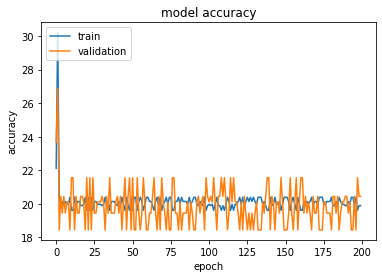

Maximum Train Accuracy : 30.22222137451172
Maximum Validation Accuracy : 26.88888931274414


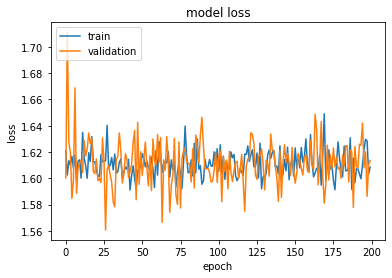

Minimum Train Loss : 1.5911186933517456
Minimum Validation Loss : 1.5607391595840454


In [ ]:
Bacteria_model_amp_RMSprop_001 = Bact_Net()
Bacteria_model_amp_RMSprop_001.cuda()
trainer_RMSprop_amp_001 = trainer(Bacteria_model_amp_RMSprop_001, amp_train_loader,"RMSprop", epoch_size=200, learning_rate=0.01)
trainer_RMSprop_amp_001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_amp_001.history['train_acc'])
plt.plot(trainer_RMSprop_amp_001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_amp_001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_amp_001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_amp_001.history['train_loss'])
plt.plot(trainer_RMSprop_amp_001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_amp_001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_amp_001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 30.416668


  0%|          | 1/200 [00:15<51:05, 15.40s/it]

Val Acc | Epoch 1/200 | ACC 27.444447
Train Acc | Epoch 2/200 | ACC 38.277779


  1%|          | 2/200 [00:30<50:54, 15.43s/it]

Val Acc | Epoch 2/200 | ACC 35.555557
Train Acc | Epoch 3/200 | ACC 33.250000


  2%|▏         | 3/200 [00:46<50:24, 15.35s/it]

Val Acc | Epoch 3/200 | ACC 31.000000
Train Acc | Epoch 4/200 | ACC 49.666668


  2%|▏         | 4/200 [01:01<49:56, 15.29s/it]

Val Acc | Epoch 4/200 | ACC 48.111111
Train Acc | Epoch 5/200 | ACC 53.111111


  2%|▎         | 5/200 [01:16<49:41, 15.29s/it]

Val Acc | Epoch 5/200 | ACC 52.333336
Train Acc | Epoch 6/200 | ACC 56.750000


  3%|▎         | 6/200 [01:31<49:33, 15.33s/it]

Val Acc | Epoch 6/200 | ACC 55.444443
Train Acc | Epoch 7/200 | ACC 55.277779


  4%|▎         | 7/200 [01:47<49:20, 15.34s/it]

Val Acc | Epoch 7/200 | ACC 52.111115
Train Acc | Epoch 8/200 | ACC 61.583336


  4%|▍         | 8/200 [02:02<48:52, 15.27s/it]

Val Acc | Epoch 8/200 | ACC 58.000004
Train Acc | Epoch 9/200 | ACC 63.777779


  4%|▍         | 9/200 [02:17<48:33, 15.25s/it]

Val Acc | Epoch 9/200 | ACC 61.666668
Train Acc | Epoch 10/200 | ACC 52.055557


  5%|▌         | 10/200 [02:32<48:18, 15.25s/it]

Val Acc | Epoch 10/200 | ACC 49.444447
Train Acc | Epoch 11/200 | ACC 70.888885


  6%|▌         | 11/200 [02:48<48:15, 15.32s/it]

Val Acc | Epoch 11/200 | ACC 68.666664
Train Acc | Epoch 12/200 | ACC 65.722221


  6%|▌         | 12/200 [03:03<47:44, 15.23s/it]

Val Acc | Epoch 12/200 | ACC 64.000000
Train Acc | Epoch 13/200 | ACC 54.222225


  6%|▋         | 13/200 [03:18<47:03, 15.10s/it]

Val Acc | Epoch 13/200 | ACC 53.000004
Train Acc | Epoch 14/200 | ACC 71.944443


  7%|▋         | 14/200 [03:33<46:44, 15.08s/it]

Val Acc | Epoch 14/200 | ACC 69.666664
Train Acc | Epoch 15/200 | ACC 72.500000


  8%|▊         | 15/200 [03:49<47:07, 15.28s/it]

Val Acc | Epoch 15/200 | ACC 69.555557
Train Acc | Epoch 16/200 | ACC 74.416664


  8%|▊         | 16/200 [04:04<46:58, 15.32s/it]

Val Acc | Epoch 16/200 | ACC 71.555557
Train Acc | Epoch 17/200 | ACC 75.805557


  8%|▊         | 17/200 [04:19<46:37, 15.29s/it]

Val Acc | Epoch 17/200 | ACC 72.111115
Train Acc | Epoch 18/200 | ACC 76.361115


  9%|▉         | 18/200 [04:34<46:09, 15.22s/it]

Val Acc | Epoch 18/200 | ACC 73.222229
Train Acc | Epoch 19/200 | ACC 76.111115


 10%|▉         | 19/200 [04:49<45:51, 15.20s/it]

Val Acc | Epoch 19/200 | ACC 72.333336
Train Acc | Epoch 20/200 | ACC 78.472229


 10%|█         | 20/200 [05:05<45:55, 15.31s/it]

Val Acc | Epoch 20/200 | ACC 75.444450
Train Acc | Epoch 21/200 | ACC 76.166664


 10%|█         | 21/200 [05:20<45:28, 15.24s/it]

Val Acc | Epoch 21/200 | ACC 75.222221
Train Acc | Epoch 22/200 | ACC 72.305557


 11%|█         | 22/200 [05:35<45:18, 15.27s/it]

Val Acc | Epoch 22/200 | ACC 68.111115
Train Acc | Epoch 23/200 | ACC 78.472229


 12%|█▏        | 23/200 [05:50<44:53, 15.22s/it]

Val Acc | Epoch 23/200 | ACC 75.333336
Train Acc | Epoch 24/200 | ACC 79.222229


 12%|█▏        | 24/200 [06:06<44:40, 15.23s/it]

Val Acc | Epoch 24/200 | ACC 75.666664
Train Acc | Epoch 25/200 | ACC 80.250000


 12%|█▎        | 25/200 [06:21<44:35, 15.29s/it]

Val Acc | Epoch 25/200 | ACC 77.888885
Train Acc | Epoch 26/200 | ACC 79.027779


 13%|█▎        | 26/200 [06:36<44:23, 15.31s/it]

Val Acc | Epoch 26/200 | ACC 75.333336
Train Acc | Epoch 27/200 | ACC 81.000000


 14%|█▎        | 27/200 [06:51<43:51, 15.21s/it]

Val Acc | Epoch 27/200 | ACC 78.888893
Train Acc | Epoch 28/200 | ACC 79.750000


 14%|█▍        | 28/200 [07:07<43:41, 15.24s/it]

Val Acc | Epoch 28/200 | ACC 77.555557
Train Acc | Epoch 29/200 | ACC 81.861115


 14%|█▍        | 29/200 [07:22<43:07, 15.13s/it]

Val Acc | Epoch 29/200 | ACC 78.555557
Train Acc | Epoch 30/200 | ACC 80.166664


 15%|█▌        | 30/200 [07:37<43:00, 15.18s/it]

Val Acc | Epoch 30/200 | ACC 78.555557
Train Acc | Epoch 31/200 | ACC 41.972221


 16%|█▌        | 31/200 [07:52<42:37, 15.13s/it]

Val Acc | Epoch 31/200 | ACC 41.555557
Train Acc | Epoch 32/200 | ACC 82.222221


 16%|█▌        | 32/200 [08:07<42:25, 15.15s/it]

Val Acc | Epoch 32/200 | ACC 76.777779
Train Acc | Epoch 33/200 | ACC 55.777775


 16%|█▋        | 33/200 [08:22<42:08, 15.14s/it]

Val Acc | Epoch 33/200 | ACC 52.000004
Train Acc | Epoch 34/200 | ACC 84.500000


 17%|█▋        | 34/200 [08:37<41:55, 15.15s/it]

Val Acc | Epoch 34/200 | ACC 81.777779
Train Acc | Epoch 35/200 | ACC 82.583336


 18%|█▊        | 35/200 [08:53<41:45, 15.19s/it]

Val Acc | Epoch 35/200 | ACC 78.111115
Train Acc | Epoch 36/200 | ACC 80.222229


 18%|█▊        | 36/200 [09:09<42:19, 15.48s/it]

Val Acc | Epoch 36/200 | ACC 77.111115
Train Acc | Epoch 37/200 | ACC 83.222221


 18%|█▊        | 37/200 [09:24<41:38, 15.33s/it]

Val Acc | Epoch 37/200 | ACC 79.777779
Train Acc | Epoch 38/200 | ACC 78.916672


 19%|█▉        | 38/200 [09:39<41:23, 15.33s/it]

Val Acc | Epoch 38/200 | ACC 73.888893
Train Acc | Epoch 39/200 | ACC 84.305557


 20%|█▉        | 39/200 [09:54<40:47, 15.20s/it]

Val Acc | Epoch 39/200 | ACC 79.555557
Train Acc | Epoch 40/200 | ACC 83.361115


 20%|██        | 40/200 [10:09<40:34, 15.21s/it]

Val Acc | Epoch 40/200 | ACC 80.444450
Train Acc | Epoch 41/200 | ACC 79.250000


 20%|██        | 41/200 [10:25<40:22, 15.24s/it]

Val Acc | Epoch 41/200 | ACC 77.333336
Train Acc | Epoch 42/200 | ACC 72.305557


 21%|██        | 42/200 [10:40<40:07, 15.24s/it]

Val Acc | Epoch 42/200 | ACC 70.222221
Train Acc | Epoch 43/200 | ACC 59.444447


 22%|██▏       | 43/200 [10:55<39:49, 15.22s/it]

Val Acc | Epoch 43/200 | ACC 55.111111
Train Acc | Epoch 44/200 | ACC 86.027779


 22%|██▏       | 44/200 [11:10<39:31, 15.20s/it]

Val Acc | Epoch 44/200 | ACC 81.777779
Train Acc | Epoch 45/200 | ACC 84.111115


 22%|██▎       | 45/200 [11:25<39:11, 15.17s/it]

Val Acc | Epoch 45/200 | ACC 81.111115
Train Acc | Epoch 46/200 | ACC 84.388893


 23%|██▎       | 46/200 [11:41<39:05, 15.23s/it]

Val Acc | Epoch 46/200 | ACC 81.222221
Train Acc | Epoch 47/200 | ACC 82.444450


 24%|██▎       | 47/200 [11:56<38:52, 15.25s/it]

Val Acc | Epoch 47/200 | ACC 77.444443
Train Acc | Epoch 48/200 | ACC 81.277779


 24%|██▍       | 48/200 [12:11<38:40, 15.26s/it]

Val Acc | Epoch 48/200 | ACC 75.444450
Train Acc | Epoch 49/200 | ACC 83.361115


 24%|██▍       | 49/200 [12:27<38:25, 15.27s/it]

Val Acc | Epoch 49/200 | ACC 79.333336
Train Acc | Epoch 50/200 | ACC 80.861115


 25%|██▌       | 50/200 [12:42<38:07, 15.25s/it]

Val Acc | Epoch 50/200 | ACC 76.777779
Train Acc | Epoch 51/200 | ACC 84.666672


 26%|██▌       | 51/200 [12:57<37:52, 15.25s/it]

Val Acc | Epoch 51/200 | ACC 81.777779
Train Acc | Epoch 52/200 | ACC 78.805557


 26%|██▌       | 52/200 [13:12<37:37, 15.25s/it]

Val Acc | Epoch 52/200 | ACC 75.111115
Train Acc | Epoch 53/200 | ACC 86.611115


 26%|██▋       | 53/200 [13:27<37:16, 15.22s/it]

Val Acc | Epoch 53/200 | ACC 83.888885
Train Acc | Epoch 54/200 | ACC 83.583336


 27%|██▋       | 54/200 [13:42<36:54, 15.17s/it]

Val Acc | Epoch 54/200 | ACC 80.444450
Train Acc | Epoch 55/200 | ACC 81.000000


 28%|██▊       | 55/200 [13:58<36:52, 15.26s/it]

Val Acc | Epoch 55/200 | ACC 77.555557
Train Acc | Epoch 56/200 | ACC 86.972221


 28%|██▊       | 56/200 [14:14<36:58, 15.41s/it]

Val Acc | Epoch 56/200 | ACC 83.888885
Train Acc | Epoch 57/200 | ACC 84.638893


 28%|██▊       | 57/200 [14:29<36:48, 15.44s/it]

Val Acc | Epoch 57/200 | ACC 81.777779
Train Acc | Epoch 58/200 | ACC 84.416672


 29%|██▉       | 58/200 [14:44<35:58, 15.20s/it]

Val Acc | Epoch 58/200 | ACC 80.000000
Train Acc | Epoch 59/200 | ACC 87.527779


 30%|██▉       | 59/200 [14:59<35:53, 15.27s/it]

Val Acc | Epoch 59/200 | ACC 84.000000
Train Acc | Epoch 60/200 | ACC 85.277779


 30%|███       | 60/200 [15:14<35:07, 15.05s/it]

Val Acc | Epoch 60/200 | ACC 81.777779
Train Acc | Epoch 61/200 | ACC 75.111115


 30%|███       | 61/200 [15:29<35:00, 15.11s/it]

Val Acc | Epoch 61/200 | ACC 73.888893
Train Acc | Epoch 62/200 | ACC 87.250000


 31%|███       | 62/200 [15:44<34:24, 14.96s/it]

Val Acc | Epoch 62/200 | ACC 85.111115
Train Acc | Epoch 63/200 | ACC 87.805557


 32%|███▏      | 63/200 [15:59<34:17, 15.02s/it]

Val Acc | Epoch 63/200 | ACC 84.555557
Train Acc | Epoch 64/200 | ACC 86.472229


 32%|███▏      | 64/200 [16:14<33:53, 14.95s/it]

Val Acc | Epoch 64/200 | ACC 83.777779
Train Acc | Epoch 65/200 | ACC 88.000000


 32%|███▎      | 65/200 [16:29<33:50, 15.04s/it]

Val Acc | Epoch 65/200 | ACC 83.555557
Train Acc | Epoch 66/200 | ACC 85.444443


 33%|███▎      | 66/200 [16:44<33:30, 15.00s/it]

Val Acc | Epoch 66/200 | ACC 81.888893
Train Acc | Epoch 67/200 | ACC 86.888893


 34%|███▎      | 67/200 [16:59<33:09, 14.96s/it]

Val Acc | Epoch 67/200 | ACC 83.333336
Train Acc | Epoch 68/200 | ACC 85.722229


 34%|███▍      | 68/200 [17:14<33:05, 15.04s/it]

Val Acc | Epoch 68/200 | ACC 81.777779
Train Acc | Epoch 69/200 | ACC 84.583336


 34%|███▍      | 69/200 [17:29<33:00, 15.12s/it]

Val Acc | Epoch 69/200 | ACC 80.888893
Train Acc | Epoch 70/200 | ACC 87.250000


 35%|███▌      | 70/200 [17:44<32:46, 15.13s/it]

Val Acc | Epoch 70/200 | ACC 84.444443
Train Acc | Epoch 71/200 | ACC 88.222221


 36%|███▌      | 71/200 [17:59<32:25, 15.08s/it]

Val Acc | Epoch 71/200 | ACC 84.555557
Train Acc | Epoch 72/200 | ACC 88.083336


 36%|███▌      | 72/200 [18:14<32:08, 15.06s/it]

Val Acc | Epoch 72/200 | ACC 84.111115
Train Acc | Epoch 73/200 | ACC 78.833336


 36%|███▋      | 73/200 [18:29<31:51, 15.05s/it]

Val Acc | Epoch 73/200 | ACC 75.333336
Train Acc | Epoch 74/200 | ACC 46.555557


 37%|███▋      | 74/200 [18:44<31:39, 15.08s/it]

Val Acc | Epoch 74/200 | ACC 46.000000
Train Acc | Epoch 75/200 | ACC 76.305557


 38%|███▊      | 75/200 [18:59<31:18, 15.03s/it]

Val Acc | Epoch 75/200 | ACC 72.444443
Train Acc | Epoch 76/200 | ACC 84.805557


 38%|███▊      | 76/200 [19:15<31:15, 15.12s/it]

Val Acc | Epoch 76/200 | ACC 81.666664
Train Acc | Epoch 77/200 | ACC 80.333336


 38%|███▊      | 77/200 [19:30<31:19, 15.28s/it]

Val Acc | Epoch 77/200 | ACC 78.000000
Train Acc | Epoch 78/200 | ACC 87.222221


 39%|███▉      | 78/200 [19:45<30:54, 15.20s/it]

Val Acc | Epoch 78/200 | ACC 83.555557
Train Acc | Epoch 79/200 | ACC 87.027779


 40%|███▉      | 79/200 [20:00<30:34, 15.16s/it]

Val Acc | Epoch 79/200 | ACC 83.111115
Train Acc | Epoch 80/200 | ACC 84.416672


 40%|████      | 80/200 [20:16<30:18, 15.16s/it]

Val Acc | Epoch 80/200 | ACC 80.888893
Train Acc | Epoch 81/200 | ACC 84.638893


 40%|████      | 81/200 [20:30<29:53, 15.07s/it]

Val Acc | Epoch 81/200 | ACC 81.333336
Train Acc | Epoch 82/200 | ACC 86.583336


 41%|████      | 82/200 [20:46<29:40, 15.09s/it]

Val Acc | Epoch 82/200 | ACC 82.333336
Train Acc | Epoch 83/200 | ACC 82.250000


 42%|████▏     | 83/200 [21:00<29:13, 14.99s/it]

Val Acc | Epoch 83/200 | ACC 78.888893
Train Acc | Epoch 84/200 | ACC 87.361115


 42%|████▏     | 84/200 [21:15<28:57, 14.98s/it]

Val Acc | Epoch 84/200 | ACC 84.666672
Train Acc | Epoch 85/200 | ACC 87.861115


 42%|████▎     | 85/200 [21:30<28:46, 15.02s/it]

Val Acc | Epoch 85/200 | ACC 85.444443
Train Acc | Epoch 86/200 | ACC 87.666664


 43%|████▎     | 86/200 [21:46<28:38, 15.07s/it]

Val Acc | Epoch 86/200 | ACC 85.444443
Train Acc | Epoch 87/200 | ACC 87.000000


 44%|████▎     | 87/200 [22:01<28:29, 15.12s/it]

Val Acc | Epoch 87/200 | ACC 84.777779
Train Acc | Epoch 88/200 | ACC 88.138893


 44%|████▍     | 88/200 [22:16<28:14, 15.13s/it]

Val Acc | Epoch 88/200 | ACC 84.555557
Train Acc | Epoch 89/200 | ACC 86.916664


 44%|████▍     | 89/200 [22:31<27:55, 15.10s/it]

Val Acc | Epoch 89/200 | ACC 84.222221
Train Acc | Epoch 90/200 | ACC 88.861115


 45%|████▌     | 90/200 [22:46<27:43, 15.13s/it]

Val Acc | Epoch 90/200 | ACC 84.444443
Train Acc | Epoch 91/200 | ACC 88.888893


 46%|████▌     | 91/200 [23:01<27:19, 15.04s/it]

Val Acc | Epoch 91/200 | ACC 85.222229
Train Acc | Epoch 92/200 | ACC 89.000008


 46%|████▌     | 92/200 [23:16<27:12, 15.12s/it]

Val Acc | Epoch 92/200 | ACC 85.666672
Train Acc | Epoch 93/200 | ACC 87.861115


 46%|████▋     | 93/200 [23:31<26:55, 15.10s/it]

Val Acc | Epoch 93/200 | ACC 83.222221
Train Acc | Epoch 94/200 | ACC 83.611115


 47%|████▋     | 94/200 [23:47<26:41, 15.11s/it]

Val Acc | Epoch 94/200 | ACC 82.333336
Train Acc | Epoch 95/200 | ACC 88.194450


 48%|████▊     | 95/200 [24:01<26:18, 15.03s/it]

Val Acc | Epoch 95/200 | ACC 85.000000
Train Acc | Epoch 96/200 | ACC 61.833336


 48%|████▊     | 96/200 [24:16<26:01, 15.01s/it]

Val Acc | Epoch 96/200 | ACC 63.666664
Train Acc | Epoch 97/200 | ACC 88.222221


 48%|████▊     | 97/200 [24:32<26:11, 15.26s/it]

Val Acc | Epoch 97/200 | ACC 83.444443
Train Acc | Epoch 98/200 | ACC 76.722221


 49%|████▉     | 98/200 [24:47<25:52, 15.22s/it]

Val Acc | Epoch 98/200 | ACC 72.111115
Train Acc | Epoch 99/200 | ACC 86.888893


 50%|████▉     | 99/200 [25:02<25:30, 15.15s/it]

Val Acc | Epoch 99/200 | ACC 84.000000
Train Acc | Epoch 100/200 | ACC 86.861115


 50%|█████     | 100/200 [25:18<25:17, 15.17s/it]

Val Acc | Epoch 100/200 | ACC 85.111115
Train Acc | Epoch 101/200 | ACC 87.694450


 50%|█████     | 101/200 [25:32<24:50, 15.06s/it]

Val Acc | Epoch 101/200 | ACC 86.000000
Train Acc | Epoch 102/200 | ACC 78.166672


 51%|█████     | 102/200 [25:47<24:33, 15.04s/it]

Val Acc | Epoch 102/200 | ACC 77.666672
Train Acc | Epoch 103/200 | ACC 88.972221


 52%|█████▏    | 103/200 [26:02<24:18, 15.04s/it]

Val Acc | Epoch 103/200 | ACC 86.888893
Train Acc | Epoch 104/200 | ACC 88.666672


 52%|█████▏    | 104/200 [26:18<24:05, 15.06s/it]

Val Acc | Epoch 104/200 | ACC 85.222229
Train Acc | Epoch 105/200 | ACC 84.805557


 52%|█████▎    | 105/200 [26:33<23:55, 15.12s/it]

Val Acc | Epoch 105/200 | ACC 81.888893
Train Acc | Epoch 106/200 | ACC 75.916664


 53%|█████▎    | 106/200 [26:48<23:45, 15.17s/it]

Val Acc | Epoch 106/200 | ACC 75.888893
Train Acc | Epoch 107/200 | ACC 89.111115


 54%|█████▎    | 107/200 [27:03<23:17, 15.02s/it]

Val Acc | Epoch 107/200 | ACC 85.888893
Train Acc | Epoch 108/200 | ACC 82.000000


 54%|█████▍    | 108/200 [27:18<23:05, 15.06s/it]

Val Acc | Epoch 108/200 | ACC 78.666672
Train Acc | Epoch 109/200 | ACC 69.250000


 55%|█████▍    | 109/200 [27:33<22:46, 15.02s/it]

Val Acc | Epoch 109/200 | ACC 64.666672
Train Acc | Epoch 110/200 | ACC 88.638893


 55%|█████▌    | 110/200 [27:48<22:35, 15.06s/it]

Val Acc | Epoch 110/200 | ACC 86.444450
Train Acc | Epoch 111/200 | ACC 89.194450


 56%|█████▌    | 111/200 [28:03<22:15, 15.01s/it]

Val Acc | Epoch 111/200 | ACC 87.000000
Train Acc | Epoch 112/200 | ACC 85.666672


 56%|█████▌    | 112/200 [28:18<21:57, 14.98s/it]

Val Acc | Epoch 112/200 | ACC 81.333336
Train Acc | Epoch 113/200 | ACC 70.027779


 56%|█████▋    | 113/200 [28:33<21:47, 15.03s/it]

Val Acc | Epoch 113/200 | ACC 67.777779
Train Acc | Epoch 114/200 | ACC 87.638893


 57%|█████▋    | 114/200 [28:48<21:39, 15.11s/it]

Val Acc | Epoch 114/200 | ACC 84.444443
Train Acc | Epoch 115/200 | ACC 84.361115


 57%|█████▊    | 115/200 [29:04<21:30, 15.18s/it]

Val Acc | Epoch 115/200 | ACC 79.777779
Train Acc | Epoch 116/200 | ACC 88.694450


 58%|█████▊    | 116/200 [29:19<21:17, 15.21s/it]

Val Acc | Epoch 116/200 | ACC 85.444443
Train Acc | Epoch 117/200 | ACC 87.500000


 58%|█████▊    | 117/200 [29:34<20:56, 15.14s/it]

Val Acc | Epoch 117/200 | ACC 83.333336
Train Acc | Epoch 118/200 | ACC 88.638893


 59%|█████▉    | 118/200 [29:50<21:01, 15.38s/it]

Val Acc | Epoch 118/200 | ACC 86.666664
Train Acc | Epoch 119/200 | ACC 87.638893


 60%|█████▉    | 119/200 [30:05<20:44, 15.36s/it]

Val Acc | Epoch 119/200 | ACC 83.222221
Train Acc | Epoch 120/200 | ACC 88.444450


 60%|██████    | 120/200 [30:20<20:19, 15.25s/it]

Val Acc | Epoch 120/200 | ACC 84.333336
Train Acc | Epoch 121/200 | ACC 88.888893


 60%|██████    | 121/200 [30:35<20:05, 15.26s/it]

Val Acc | Epoch 121/200 | ACC 85.777779
Train Acc | Epoch 122/200 | ACC 89.305557


 61%|██████    | 122/200 [30:50<19:42, 15.16s/it]

Val Acc | Epoch 122/200 | ACC 84.666672
Train Acc | Epoch 123/200 | ACC 88.888893


 62%|██████▏   | 123/200 [31:06<19:30, 15.20s/it]

Val Acc | Epoch 123/200 | ACC 86.777786
Train Acc | Epoch 124/200 | ACC 88.805557


 62%|██████▏   | 124/200 [31:21<19:15, 15.20s/it]

Val Acc | Epoch 124/200 | ACC 83.666672
Train Acc | Epoch 125/200 | ACC 89.305557


 62%|██████▎   | 125/200 [31:36<18:51, 15.09s/it]

Val Acc | Epoch 125/200 | ACC 84.555557
Train Acc | Epoch 126/200 | ACC 88.777779


 63%|██████▎   | 126/200 [31:51<18:33, 15.05s/it]

Val Acc | Epoch 126/200 | ACC 85.222229
Train Acc | Epoch 127/200 | ACC 87.361115


 64%|██████▎   | 127/200 [32:06<18:22, 15.10s/it]

Val Acc | Epoch 127/200 | ACC 85.111115
Train Acc | Epoch 128/200 | ACC 87.166664


 64%|██████▍   | 128/200 [32:21<18:09, 15.13s/it]

Val Acc | Epoch 128/200 | ACC 83.000008
Train Acc | Epoch 129/200 | ACC 86.805557


 64%|██████▍   | 129/200 [32:36<17:49, 15.06s/it]

Val Acc | Epoch 129/200 | ACC 84.555557
Train Acc | Epoch 130/200 | ACC 89.305557


 65%|██████▌   | 130/200 [32:51<17:34, 15.07s/it]

Val Acc | Epoch 130/200 | ACC 85.666672
Train Acc | Epoch 131/200 | ACC 88.805557


 66%|██████▌   | 131/200 [33:06<17:14, 15.00s/it]

Val Acc | Epoch 131/200 | ACC 86.333336
Train Acc | Epoch 132/200 | ACC 88.722221


 66%|██████▌   | 132/200 [33:21<17:00, 15.01s/it]

Val Acc | Epoch 132/200 | ACC 85.777779
Train Acc | Epoch 133/200 | ACC 87.027779


 66%|██████▋   | 133/200 [33:36<16:41, 14.95s/it]

Val Acc | Epoch 133/200 | ACC 83.777779
Train Acc | Epoch 134/200 | ACC 89.555557


 67%|██████▋   | 134/200 [33:51<16:31, 15.02s/it]

Val Acc | Epoch 134/200 | ACC 86.555557
Train Acc | Epoch 135/200 | ACC 89.833336


 68%|██████▊   | 135/200 [34:06<16:18, 15.06s/it]

Val Acc | Epoch 135/200 | ACC 85.666672
Train Acc | Epoch 136/200 | ACC 77.166672


 68%|██████▊   | 136/200 [34:21<16:07, 15.12s/it]

Val Acc | Epoch 136/200 | ACC 76.666672
Train Acc | Epoch 137/200 | ACC 88.916672


 68%|██████▊   | 137/200 [34:36<15:50, 15.08s/it]

Val Acc | Epoch 137/200 | ACC 87.111115
Train Acc | Epoch 138/200 | ACC 89.194450


 69%|██████▉   | 138/200 [34:52<15:53, 15.37s/it]

Val Acc | Epoch 138/200 | ACC 85.000000
Train Acc | Epoch 139/200 | ACC 88.861115


 70%|██████▉   | 139/200 [35:07<15:34, 15.32s/it]

Val Acc | Epoch 139/200 | ACC 85.333336
Train Acc | Epoch 140/200 | ACC 89.277779


 70%|███████   | 140/200 [35:23<15:15, 15.25s/it]

Val Acc | Epoch 140/200 | ACC 86.333336
Train Acc | Epoch 141/200 | ACC 80.333336


 70%|███████   | 141/200 [35:38<14:57, 15.22s/it]

Val Acc | Epoch 141/200 | ACC 77.666672
Train Acc | Epoch 142/200 | ACC 88.055557


 71%|███████   | 142/200 [35:53<14:39, 15.17s/it]

Val Acc | Epoch 142/200 | ACC 83.888885
Train Acc | Epoch 143/200 | ACC 86.777786


 72%|███████▏  | 143/200 [36:08<14:22, 15.14s/it]

Val Acc | Epoch 143/200 | ACC 84.222221
Train Acc | Epoch 144/200 | ACC 89.027779


 72%|███████▏  | 144/200 [36:23<14:10, 15.19s/it]

Val Acc | Epoch 144/200 | ACC 85.000000
Train Acc | Epoch 145/200 | ACC 88.944450


 72%|███████▎  | 145/200 [36:38<13:54, 15.17s/it]

Val Acc | Epoch 145/200 | ACC 85.777779
Train Acc | Epoch 146/200 | ACC 89.138885


 73%|███████▎  | 146/200 [36:53<13:37, 15.14s/it]

Val Acc | Epoch 146/200 | ACC 87.111115
Train Acc | Epoch 147/200 | ACC 89.305557


 74%|███████▎  | 147/200 [37:09<13:26, 15.21s/it]

Val Acc | Epoch 147/200 | ACC 84.888893
Train Acc | Epoch 148/200 | ACC 85.666672


 74%|███████▍  | 148/200 [37:24<13:06, 15.13s/it]

Val Acc | Epoch 148/200 | ACC 83.000008
Train Acc | Epoch 149/200 | ACC 89.611115


 74%|███████▍  | 149/200 [37:39<12:53, 15.17s/it]

Val Acc | Epoch 149/200 | ACC 87.000000
Train Acc | Epoch 150/200 | ACC 88.833336


 75%|███████▌  | 150/200 [37:54<12:36, 15.13s/it]

Val Acc | Epoch 150/200 | ACC 83.777779
Train Acc | Epoch 151/200 | ACC 89.194450


 76%|███████▌  | 151/200 [38:09<12:21, 15.13s/it]

Val Acc | Epoch 151/200 | ACC 86.888893
Train Acc | Epoch 152/200 | ACC 89.444443


 76%|███████▌  | 152/200 [38:24<12:01, 15.03s/it]

Val Acc | Epoch 152/200 | ACC 87.222221
Train Acc | Epoch 153/200 | ACC 89.305557


 76%|███████▋  | 153/200 [38:39<11:43, 14.96s/it]

Val Acc | Epoch 153/200 | ACC 85.555557
Train Acc | Epoch 154/200 | ACC 90.416672


 77%|███████▋  | 154/200 [38:53<11:23, 14.85s/it]

Val Acc | Epoch 154/200 | ACC 86.666664
Train Acc | Epoch 155/200 | ACC 86.138893


 78%|███████▊  | 155/200 [39:08<11:12, 14.94s/it]

Val Acc | Epoch 155/200 | ACC 82.555557
Train Acc | Epoch 156/200 | ACC 90.333336


 78%|███████▊  | 156/200 [39:23<10:54, 14.88s/it]

Val Acc | Epoch 156/200 | ACC 86.888893
Train Acc | Epoch 157/200 | ACC 83.194443


 78%|███████▊  | 157/200 [39:38<10:40, 14.90s/it]

Val Acc | Epoch 157/200 | ACC 80.333336
Train Acc | Epoch 158/200 | ACC 88.388893


 79%|███████▉  | 158/200 [39:53<10:28, 14.96s/it]

Val Acc | Epoch 158/200 | ACC 86.111107
Train Acc | Epoch 159/200 | ACC 89.888885


 80%|███████▉  | 159/200 [40:09<10:25, 15.25s/it]

Val Acc | Epoch 159/200 | ACC 87.000000
Train Acc | Epoch 160/200 | ACC 89.083336


 80%|████████  | 160/200 [40:24<10:07, 15.20s/it]

Val Acc | Epoch 160/200 | ACC 85.888893
Train Acc | Epoch 161/200 | ACC 89.722221


 80%|████████  | 161/200 [40:39<09:49, 15.11s/it]

Val Acc | Epoch 161/200 | ACC 88.222221
Train Acc | Epoch 162/200 | ACC 89.111115


 81%|████████  | 162/200 [40:54<09:32, 15.07s/it]

Val Acc | Epoch 162/200 | ACC 85.666672
Train Acc | Epoch 163/200 | ACC 88.805557


 82%|████████▏ | 163/200 [41:10<09:23, 15.22s/it]

Val Acc | Epoch 163/200 | ACC 86.333336
Train Acc | Epoch 164/200 | ACC 85.555557


 82%|████████▏ | 164/200 [41:25<09:09, 15.27s/it]

Val Acc | Epoch 164/200 | ACC 83.333336
Train Acc | Epoch 165/200 | ACC 88.388893


 82%|████████▎ | 165/200 [41:40<08:51, 15.20s/it]

Val Acc | Epoch 165/200 | ACC 84.000000
Train Acc | Epoch 166/200 | ACC 85.055557


 83%|████████▎ | 166/200 [41:55<08:34, 15.13s/it]

Val Acc | Epoch 166/200 | ACC 82.000000
Train Acc | Epoch 167/200 | ACC 87.833336


 84%|████████▎ | 167/200 [42:10<08:18, 15.11s/it]

Val Acc | Epoch 167/200 | ACC 84.111115
Train Acc | Epoch 168/200 | ACC 90.444443


 84%|████████▍ | 168/200 [42:25<08:04, 15.13s/it]

Val Acc | Epoch 168/200 | ACC 87.888893
Train Acc | Epoch 169/200 | ACC 84.138885


 84%|████████▍ | 169/200 [42:40<07:50, 15.17s/it]

Val Acc | Epoch 169/200 | ACC 81.444450
Train Acc | Epoch 170/200 | ACC 89.833336


 85%|████████▌ | 170/200 [42:56<07:36, 15.22s/it]

Val Acc | Epoch 170/200 | ACC 87.222221
Train Acc | Epoch 171/200 | ACC 88.638893


 86%|████████▌ | 171/200 [43:11<07:21, 15.21s/it]

Val Acc | Epoch 171/200 | ACC 84.777779
Train Acc | Epoch 172/200 | ACC 89.055557


 86%|████████▌ | 172/200 [43:26<07:06, 15.25s/it]

Val Acc | Epoch 172/200 | ACC 86.000000
Train Acc | Epoch 173/200 | ACC 90.277779


 86%|████████▋ | 173/200 [43:41<06:50, 15.19s/it]

Val Acc | Epoch 173/200 | ACC 87.000000
Train Acc | Epoch 174/200 | ACC 84.527779


 87%|████████▋ | 174/200 [43:57<06:36, 15.26s/it]

Val Acc | Epoch 174/200 | ACC 81.111115
Train Acc | Epoch 175/200 | ACC 90.277779


 88%|████████▊ | 175/200 [44:12<06:20, 15.22s/it]

Val Acc | Epoch 175/200 | ACC 88.555557
Train Acc | Epoch 176/200 | ACC 89.611115


 88%|████████▊ | 176/200 [44:27<06:03, 15.14s/it]

Val Acc | Epoch 176/200 | ACC 86.777786
Train Acc | Epoch 177/200 | ACC 90.444443


 88%|████████▊ | 177/200 [44:42<05:50, 15.24s/it]

Val Acc | Epoch 177/200 | ACC 87.666664
Train Acc | Epoch 178/200 | ACC 90.277779


 89%|████████▉ | 178/200 [44:58<05:35, 15.24s/it]

Val Acc | Epoch 178/200 | ACC 86.777786
Train Acc | Epoch 179/200 | ACC 90.277779


 90%|████████▉ | 179/200 [45:14<05:24, 15.47s/it]

Val Acc | Epoch 179/200 | ACC 87.000000
Train Acc | Epoch 180/200 | ACC 90.555557


 90%|█████████ | 180/200 [45:29<05:08, 15.44s/it]

Val Acc | Epoch 180/200 | ACC 87.777779
Train Acc | Epoch 181/200 | ACC 90.694443


 90%|█████████ | 181/200 [45:44<04:49, 15.25s/it]

Val Acc | Epoch 181/200 | ACC 88.000000
Train Acc | Epoch 182/200 | ACC 88.666672


 91%|█████████ | 182/200 [45:59<04:35, 15.29s/it]

Val Acc | Epoch 182/200 | ACC 85.000000
Train Acc | Epoch 183/200 | ACC 88.361115


 92%|█████████▏| 183/200 [46:15<04:20, 15.34s/it]

Val Acc | Epoch 183/200 | ACC 85.111115
Train Acc | Epoch 184/200 | ACC 86.222229


 92%|█████████▏| 184/200 [46:29<04:02, 15.16s/it]

Val Acc | Epoch 184/200 | ACC 84.111115
Train Acc | Epoch 185/200 | ACC 88.472221


 92%|█████████▎| 185/200 [46:45<03:47, 15.19s/it]

Val Acc | Epoch 185/200 | ACC 85.333336
Train Acc | Epoch 186/200 | ACC 90.916672


 93%|█████████▎| 186/200 [47:00<03:31, 15.14s/it]

Val Acc | Epoch 186/200 | ACC 86.333336
Train Acc | Epoch 187/200 | ACC 90.361115


 94%|█████████▎| 187/200 [47:15<03:16, 15.15s/it]

Val Acc | Epoch 187/200 | ACC 87.222221
Train Acc | Epoch 188/200 | ACC 90.027779


 94%|█████████▍| 188/200 [47:30<03:02, 15.19s/it]

Val Acc | Epoch 188/200 | ACC 88.555557
Train Acc | Epoch 189/200 | ACC 88.111115


 94%|█████████▍| 189/200 [47:45<02:46, 15.09s/it]

Val Acc | Epoch 189/200 | ACC 86.222229
Train Acc | Epoch 190/200 | ACC 89.250008


 95%|█████████▌| 190/200 [48:00<02:31, 15.16s/it]

Val Acc | Epoch 190/200 | ACC 87.000000
Train Acc | Epoch 191/200 | ACC 89.166672


 96%|█████████▌| 191/200 [48:16<02:17, 15.29s/it]

Val Acc | Epoch 191/200 | ACC 86.555557
Train Acc | Epoch 192/200 | ACC 89.000008


 96%|█████████▌| 192/200 [48:31<02:02, 15.30s/it]

Val Acc | Epoch 192/200 | ACC 86.888893
Train Acc | Epoch 193/200 | ACC 90.166672


 96%|█████████▋| 193/200 [48:46<01:46, 15.24s/it]

Val Acc | Epoch 193/200 | ACC 87.000000
Train Acc | Epoch 194/200 | ACC 90.138885


 97%|█████████▋| 194/200 [49:01<01:31, 15.19s/it]

Val Acc | Epoch 194/200 | ACC 86.666664
Train Acc | Epoch 195/200 | ACC 85.555557


 98%|█████████▊| 195/200 [49:17<01:15, 15.19s/it]

Val Acc | Epoch 195/200 | ACC 83.222221
Train Acc | Epoch 196/200 | ACC 90.000000


 98%|█████████▊| 196/200 [49:32<01:00, 15.15s/it]

Val Acc | Epoch 196/200 | ACC 87.222221
Train Acc | Epoch 197/200 | ACC 90.750000


 98%|█████████▊| 197/200 [49:46<00:45, 15.03s/it]

Val Acc | Epoch 197/200 | ACC 88.000000
Train Acc | Epoch 198/200 | ACC 80.111107


 99%|█████████▉| 198/200 [50:01<00:29, 14.97s/it]

Val Acc | Epoch 198/200 | ACC 76.000000
Train Acc | Epoch 199/200 | ACC 84.750000


100%|█████████▉| 199/200 [50:17<00:15, 15.07s/it]

Val Acc | Epoch 199/200 | ACC 83.555557
Train Acc | Epoch 200/200 | ACC 89.250008


100%|██████████| 200/200 [50:32<00:00, 15.16s/it]

Val Acc | Epoch 200/200 | ACC 85.333336


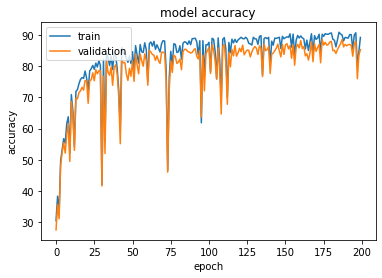

Maximum Train Accuracy : 90.91667175292969
Maximum Validation Accuracy : 88.55555725097656


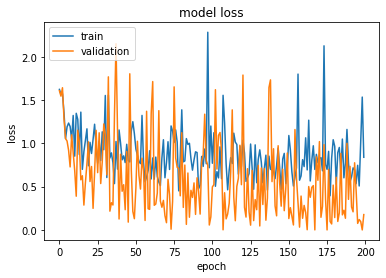

Minimum Train Loss : 0.39485466480255127
Minimum Validation Loss : 4.5624088670592755e-05


In [ ]:
Bacteria_model_amp_RMSprop_0001 = Bact_Net()
Bacteria_model_amp_RMSprop_0001.cuda()
trainer_RMSprop_amp_0001 = trainer(Bacteria_model_amp_RMSprop_0001, amp_train_loader,"RMSprop", epoch_size=200, learning_rate=0.001)
trainer_RMSprop_amp_0001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_amp_0001.history['train_acc'])
plt.plot(trainer_RMSprop_amp_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_amp_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_amp_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_amp_0001.history['train_loss'])
plt.plot(trainer_RMSprop_amp_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_amp_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_amp_0001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 20.333334


  0%|          | 1/200 [00:14<49:04, 14.80s/it]

Val Acc | Epoch 1/200 | ACC 19.444445
Train Acc | Epoch 2/200 | ACC 19.888889


  1%|          | 2/200 [00:29<48:44, 14.77s/it]

Val Acc | Epoch 2/200 | ACC 20.444445
Train Acc | Epoch 3/200 | ACC 21.222223


  2%|▏         | 3/200 [00:44<48:54, 14.90s/it]

Val Acc | Epoch 3/200 | ACC 21.777779
Train Acc | Epoch 4/200 | ACC 19.888889


  2%|▏         | 4/200 [00:59<48:26, 14.83s/it]

Val Acc | Epoch 4/200 | ACC 20.444445
Train Acc | Epoch 5/200 | ACC 36.722221


  2%|▎         | 5/200 [01:14<48:19, 14.87s/it]

Val Acc | Epoch 5/200 | ACC 34.666668
Train Acc | Epoch 6/200 | ACC 42.277779


  3%|▎         | 6/200 [01:29<48:18, 14.94s/it]

Val Acc | Epoch 6/200 | ACC 40.666668
Train Acc | Epoch 7/200 | ACC 42.416668


  4%|▎         | 7/200 [01:44<48:11, 14.98s/it]

Val Acc | Epoch 7/200 | ACC 40.555557
Train Acc | Epoch 8/200 | ACC 34.388889


  4%|▍         | 8/200 [01:59<48:06, 15.04s/it]

Val Acc | Epoch 8/200 | ACC 31.888889
Train Acc | Epoch 9/200 | ACC 42.916668


  4%|▍         | 9/200 [02:14<47:59, 15.08s/it]

Val Acc | Epoch 9/200 | ACC 39.333336
Train Acc | Epoch 10/200 | ACC 42.444447


  5%|▌         | 10/200 [02:30<47:57, 15.14s/it]

Val Acc | Epoch 10/200 | ACC 39.333336
Train Acc | Epoch 11/200 | ACC 47.222225


  6%|▌         | 11/200 [02:45<47:53, 15.20s/it]

Val Acc | Epoch 11/200 | ACC 45.111111
Train Acc | Epoch 12/200 | ACC 45.500000


  6%|▌         | 12/200 [03:00<47:30, 15.16s/it]

Val Acc | Epoch 12/200 | ACC 43.666668
Train Acc | Epoch 13/200 | ACC 46.638889


  6%|▋         | 13/200 [03:15<47:06, 15.11s/it]

Val Acc | Epoch 13/200 | ACC 44.888889
Train Acc | Epoch 14/200 | ACC 47.805557


  7%|▋         | 14/200 [03:30<47:06, 15.19s/it]

Val Acc | Epoch 14/200 | ACC 45.666668
Train Acc | Epoch 15/200 | ACC 45.027779


  8%|▊         | 15/200 [03:46<46:55, 15.22s/it]

Val Acc | Epoch 15/200 | ACC 41.555557
Train Acc | Epoch 16/200 | ACC 44.500004


  8%|▊         | 16/200 [04:01<46:57, 15.31s/it]

Val Acc | Epoch 16/200 | ACC 42.666668
Train Acc | Epoch 17/200 | ACC 48.111111


  8%|▊         | 17/200 [04:16<46:21, 15.20s/it]

Val Acc | Epoch 17/200 | ACC 47.555557
Train Acc | Epoch 18/200 | ACC 46.944447


  9%|▉         | 18/200 [04:32<46:22, 15.29s/it]

Val Acc | Epoch 18/200 | ACC 44.777779
Train Acc | Epoch 19/200 | ACC 43.000000


 10%|▉         | 19/200 [04:47<45:55, 15.22s/it]

Val Acc | Epoch 19/200 | ACC 40.333332
Train Acc | Epoch 20/200 | ACC 38.361111


 10%|█         | 20/200 [05:02<46:03, 15.35s/it]

Val Acc | Epoch 20/200 | ACC 35.111111
Train Acc | Epoch 21/200 | ACC 46.722225


 10%|█         | 21/200 [05:18<45:48, 15.35s/it]

Val Acc | Epoch 21/200 | ACC 45.000000
Train Acc | Epoch 22/200 | ACC 45.694447


 11%|█         | 22/200 [05:33<45:21, 15.29s/it]

Val Acc | Epoch 22/200 | ACC 40.888889
Train Acc | Epoch 23/200 | ACC 47.138889


 12%|█▏        | 23/200 [05:47<44:34, 15.11s/it]

Val Acc | Epoch 23/200 | ACC 43.666668
Train Acc | Epoch 24/200 | ACC 48.888889


 12%|█▏        | 24/200 [06:02<44:10, 15.06s/it]

Val Acc | Epoch 24/200 | ACC 47.555557
Train Acc | Epoch 25/200 | ACC 51.305557


 12%|█▎        | 25/200 [06:18<44:23, 15.22s/it]

Val Acc | Epoch 25/200 | ACC 50.666664
Train Acc | Epoch 26/200 | ACC 51.694447


 13%|█▎        | 26/200 [06:33<44:01, 15.18s/it]

Val Acc | Epoch 26/200 | ACC 49.888889
Train Acc | Epoch 27/200 | ACC 47.277779


 14%|█▎        | 27/200 [06:48<43:53, 15.23s/it]

Val Acc | Epoch 27/200 | ACC 46.666668
Train Acc | Epoch 28/200 | ACC 53.083336


 14%|█▍        | 28/200 [07:04<43:41, 15.24s/it]

Val Acc | Epoch 28/200 | ACC 52.222221
Train Acc | Epoch 29/200 | ACC 47.222225


 14%|█▍        | 29/200 [07:19<43:27, 15.25s/it]

Val Acc | Epoch 29/200 | ACC 44.777779
Train Acc | Epoch 30/200 | ACC 52.222221


 15%|█▌        | 30/200 [07:34<43:02, 15.19s/it]

Val Acc | Epoch 30/200 | ACC 48.888889
Train Acc | Epoch 31/200 | ACC 55.027779


 16%|█▌        | 31/200 [07:49<42:51, 15.21s/it]

Val Acc | Epoch 31/200 | ACC 50.777782
Train Acc | Epoch 32/200 | ACC 55.611111


 16%|█▌        | 32/200 [08:04<42:20, 15.12s/it]

Val Acc | Epoch 32/200 | ACC 51.666664
Train Acc | Epoch 33/200 | ACC 57.805557


 16%|█▋        | 33/200 [08:20<42:19, 15.20s/it]

Val Acc | Epoch 33/200 | ACC 56.000000
Train Acc | Epoch 34/200 | ACC 59.194447


 17%|█▋        | 34/200 [08:35<41:49, 15.12s/it]

Val Acc | Epoch 34/200 | ACC 58.333336
Train Acc | Epoch 35/200 | ACC 57.805557


 18%|█▊        | 35/200 [08:50<41:49, 15.21s/it]

Val Acc | Epoch 35/200 | ACC 56.111115
Train Acc | Epoch 36/200 | ACC 61.027779


 18%|█▊        | 36/200 [09:05<41:46, 15.28s/it]

Val Acc | Epoch 36/200 | ACC 57.777779
Train Acc | Epoch 37/200 | ACC 61.027779


 18%|█▊        | 37/200 [09:21<41:34, 15.30s/it]

Val Acc | Epoch 37/200 | ACC 59.555553
Train Acc | Epoch 38/200 | ACC 58.750004


 19%|█▉        | 38/200 [09:36<41:16, 15.29s/it]

Val Acc | Epoch 38/200 | ACC 56.777782
Train Acc | Epoch 39/200 | ACC 59.805553


 20%|█▉        | 39/200 [09:51<40:45, 15.19s/it]

Val Acc | Epoch 39/200 | ACC 56.777782
Train Acc | Epoch 40/200 | ACC 63.833332


 20%|██        | 40/200 [10:07<41:01, 15.38s/it]

Val Acc | Epoch 40/200 | ACC 60.000004
Train Acc | Epoch 41/200 | ACC 60.000004


 20%|██        | 41/200 [10:23<41:14, 15.56s/it]

Val Acc | Epoch 41/200 | ACC 60.666668
Train Acc | Epoch 42/200 | ACC 63.777779


 21%|██        | 42/200 [10:38<40:43, 15.47s/it]

Val Acc | Epoch 42/200 | ACC 61.222225
Train Acc | Epoch 43/200 | ACC 62.722225


 22%|██▏       | 43/200 [10:53<40:05, 15.32s/it]

Val Acc | Epoch 43/200 | ACC 63.000000
Train Acc | Epoch 44/200 | ACC 64.333336


 22%|██▏       | 44/200 [11:08<39:33, 15.21s/it]

Val Acc | Epoch 44/200 | ACC 63.111115
Train Acc | Epoch 45/200 | ACC 63.055557


 22%|██▎       | 45/200 [11:23<38:52, 15.05s/it]

Val Acc | Epoch 45/200 | ACC 60.555561
Train Acc | Epoch 46/200 | ACC 66.444443


 23%|██▎       | 46/200 [11:38<38:50, 15.14s/it]

Val Acc | Epoch 46/200 | ACC 64.111115
Train Acc | Epoch 47/200 | ACC 63.222225


 24%|██▎       | 47/200 [11:53<38:26, 15.07s/it]

Val Acc | Epoch 47/200 | ACC 60.888893
Train Acc | Epoch 48/200 | ACC 67.611107


 24%|██▍       | 48/200 [12:08<38:07, 15.05s/it]

Val Acc | Epoch 48/200 | ACC 65.666672
Train Acc | Epoch 49/200 | ACC 65.888885


 24%|██▍       | 49/200 [12:23<37:48, 15.03s/it]

Val Acc | Epoch 49/200 | ACC 62.333332
Train Acc | Epoch 50/200 | ACC 68.111115


 25%|██▌       | 50/200 [12:38<37:36, 15.05s/it]

Val Acc | Epoch 50/200 | ACC 64.333336
Train Acc | Epoch 51/200 | ACC 67.638893


 26%|██▌       | 51/200 [12:53<37:13, 14.99s/it]

Val Acc | Epoch 51/200 | ACC 63.111115
Train Acc | Epoch 52/200 | ACC 66.416672


 26%|██▌       | 52/200 [13:08<37:05, 15.03s/it]

Val Acc | Epoch 52/200 | ACC 65.000000
Train Acc | Epoch 53/200 | ACC 70.361115


 26%|██▋       | 53/200 [13:23<36:41, 14.98s/it]

Val Acc | Epoch 53/200 | ACC 64.444443
Train Acc | Epoch 54/200 | ACC 69.611115


 27%|██▋       | 54/200 [13:38<36:27, 14.98s/it]

Val Acc | Epoch 54/200 | ACC 65.777779
Train Acc | Epoch 55/200 | ACC 69.000000


 28%|██▊       | 55/200 [13:53<36:05, 14.93s/it]

Val Acc | Epoch 55/200 | ACC 65.888885
Train Acc | Epoch 56/200 | ACC 64.111115


 28%|██▊       | 56/200 [14:07<35:47, 14.91s/it]

Val Acc | Epoch 56/200 | ACC 60.555561
Train Acc | Epoch 57/200 | ACC 69.027779


 28%|██▊       | 57/200 [14:23<35:48, 15.03s/it]

Val Acc | Epoch 57/200 | ACC 66.555557
Train Acc | Epoch 58/200 | ACC 70.500008


 29%|██▉       | 58/200 [14:38<36:04, 15.24s/it]

Val Acc | Epoch 58/200 | ACC 67.777779
Train Acc | Epoch 59/200 | ACC 66.027779


 30%|██▉       | 59/200 [14:54<35:45, 15.22s/it]

Val Acc | Epoch 59/200 | ACC 63.888889
Train Acc | Epoch 60/200 | ACC 69.694450


 30%|███       | 60/200 [15:09<35:23, 15.17s/it]

Val Acc | Epoch 60/200 | ACC 69.222221
Train Acc | Epoch 61/200 | ACC 67.972221


 30%|███       | 61/200 [15:25<35:40, 15.40s/it]

Val Acc | Epoch 61/200 | ACC 66.000000
Train Acc | Epoch 62/200 | ACC 71.472221


 31%|███       | 62/200 [15:40<35:28, 15.43s/it]

Val Acc | Epoch 62/200 | ACC 70.000000
Train Acc | Epoch 63/200 | ACC 67.888893


 32%|███▏      | 63/200 [15:55<34:42, 15.20s/it]

Val Acc | Epoch 63/200 | ACC 66.000000
Train Acc | Epoch 64/200 | ACC 72.194443


 32%|███▏      | 64/200 [16:09<34:02, 15.02s/it]

Val Acc | Epoch 64/200 | ACC 68.555557
Train Acc | Epoch 65/200 | ACC 70.722221


 32%|███▎      | 65/200 [16:24<33:50, 15.04s/it]

Val Acc | Epoch 65/200 | ACC 68.333336
Train Acc | Epoch 66/200 | ACC 73.027779


 33%|███▎      | 66/200 [16:40<33:37, 15.06s/it]

Val Acc | Epoch 66/200 | ACC 69.000000
Train Acc | Epoch 67/200 | ACC 72.111115


 34%|███▎      | 67/200 [16:55<33:17, 15.02s/it]

Val Acc | Epoch 67/200 | ACC 69.444450
Train Acc | Epoch 68/200 | ACC 73.388893


 34%|███▍      | 68/200 [17:09<32:55, 14.96s/it]

Val Acc | Epoch 68/200 | ACC 70.222221
Train Acc | Epoch 69/200 | ACC 73.194443


 34%|███▍      | 69/200 [17:24<32:46, 15.01s/it]

Val Acc | Epoch 69/200 | ACC 70.666672
Train Acc | Epoch 70/200 | ACC 75.416664


 35%|███▌      | 70/200 [17:40<32:33, 15.03s/it]

Val Acc | Epoch 70/200 | ACC 71.888885
Train Acc | Epoch 71/200 | ACC 72.055557


 36%|███▌      | 71/200 [17:54<32:14, 14.99s/it]

Val Acc | Epoch 71/200 | ACC 70.111115
Train Acc | Epoch 72/200 | ACC 70.527779


 36%|███▌      | 72/200 [18:10<32:04, 15.04s/it]

Val Acc | Epoch 72/200 | ACC 69.222221
Train Acc | Epoch 73/200 | ACC 72.583336


 36%|███▋      | 73/200 [18:25<31:47, 15.02s/it]

Val Acc | Epoch 73/200 | ACC 69.333336
Train Acc | Epoch 74/200 | ACC 74.388893


 37%|███▋      | 74/200 [18:39<31:28, 14.98s/it]

Val Acc | Epoch 74/200 | ACC 70.888885
Train Acc | Epoch 75/200 | ACC 76.666672


 38%|███▊      | 75/200 [18:55<31:19, 15.04s/it]

Val Acc | Epoch 75/200 | ACC 71.888885
Train Acc | Epoch 76/200 | ACC 75.361115


 38%|███▊      | 76/200 [19:10<31:05, 15.04s/it]

Val Acc | Epoch 76/200 | ACC 72.888893
Train Acc | Epoch 77/200 | ACC 75.194450


 38%|███▊      | 77/200 [19:24<30:40, 14.96s/it]

Val Acc | Epoch 77/200 | ACC 70.777779
Train Acc | Epoch 78/200 | ACC 75.416664


 39%|███▉      | 78/200 [19:39<30:22, 14.94s/it]

Val Acc | Epoch 78/200 | ACC 73.666672
Train Acc | Epoch 79/200 | ACC 74.388893


 40%|███▉      | 79/200 [19:54<30:12, 14.98s/it]

Val Acc | Epoch 79/200 | ACC 71.444443
Train Acc | Epoch 80/200 | ACC 69.472221


 40%|████      | 80/200 [20:10<30:06, 15.06s/it]

Val Acc | Epoch 80/200 | ACC 67.666664
Train Acc | Epoch 81/200 | ACC 76.250008


 40%|████      | 81/200 [20:25<30:01, 15.14s/it]

Val Acc | Epoch 81/200 | ACC 71.666672
Train Acc | Epoch 82/200 | ACC 74.611115


 41%|████      | 82/200 [20:41<30:07, 15.32s/it]

Val Acc | Epoch 82/200 | ACC 73.222229
Train Acc | Epoch 83/200 | ACC 77.055557


 42%|████▏     | 83/200 [20:56<29:53, 15.33s/it]

Val Acc | Epoch 83/200 | ACC 74.555557
Train Acc | Epoch 84/200 | ACC 74.972221


 42%|████▏     | 84/200 [21:11<29:38, 15.33s/it]

Val Acc | Epoch 84/200 | ACC 71.333336
Train Acc | Epoch 85/200 | ACC 75.805557


 42%|████▎     | 85/200 [21:26<29:10, 15.23s/it]

Val Acc | Epoch 85/200 | ACC 72.111115
Train Acc | Epoch 86/200 | ACC 77.527779


 43%|████▎     | 86/200 [21:41<28:47, 15.15s/it]

Val Acc | Epoch 86/200 | ACC 73.666672
Train Acc | Epoch 87/200 | ACC 77.916672


 44%|████▎     | 87/200 [21:56<28:30, 15.14s/it]

Val Acc | Epoch 87/200 | ACC 73.111115
Train Acc | Epoch 88/200 | ACC 68.638893


 44%|████▍     | 88/200 [22:12<28:17, 15.16s/it]

Val Acc | Epoch 88/200 | ACC 66.555557
Train Acc | Epoch 89/200 | ACC 66.777779


 44%|████▍     | 89/200 [22:27<27:57, 15.11s/it]

Val Acc | Epoch 89/200 | ACC 64.777779
Train Acc | Epoch 90/200 | ACC 77.500000


 45%|████▌     | 90/200 [22:42<27:44, 15.13s/it]

Val Acc | Epoch 90/200 | ACC 75.000000
Train Acc | Epoch 91/200 | ACC 77.083336


 46%|████▌     | 91/200 [22:57<27:30, 15.14s/it]

Val Acc | Epoch 91/200 | ACC 74.777779
Train Acc | Epoch 92/200 | ACC 74.833336


 46%|████▌     | 92/200 [23:12<27:15, 15.15s/it]

Val Acc | Epoch 92/200 | ACC 72.000000
Train Acc | Epoch 93/200 | ACC 75.194450


 46%|████▋     | 93/200 [23:27<27:02, 15.16s/it]

Val Acc | Epoch 93/200 | ACC 72.222229
Train Acc | Epoch 94/200 | ACC 79.027779


 47%|████▋     | 94/200 [23:42<26:42, 15.12s/it]

Val Acc | Epoch 94/200 | ACC 75.000000
Train Acc | Epoch 95/200 | ACC 75.055557


 48%|████▊     | 95/200 [23:58<26:37, 15.22s/it]

Val Acc | Epoch 95/200 | ACC 71.555557
Train Acc | Epoch 96/200 | ACC 78.444443


 48%|████▊     | 96/200 [24:13<26:13, 15.13s/it]

Val Acc | Epoch 96/200 | ACC 74.222221
Train Acc | Epoch 97/200 | ACC 79.277779


 48%|████▊     | 97/200 [24:28<25:50, 15.05s/it]

Val Acc | Epoch 97/200 | ACC 75.222221
Train Acc | Epoch 98/200 | ACC 78.138885


 49%|████▉     | 98/200 [24:43<25:30, 15.00s/it]

Val Acc | Epoch 98/200 | ACC 76.777779
Train Acc | Epoch 99/200 | ACC 78.416672


 50%|████▉     | 99/200 [24:58<25:16, 15.01s/it]

Val Acc | Epoch 99/200 | ACC 75.333336
Train Acc | Epoch 100/200 | ACC 78.777779


 50%|█████     | 100/200 [25:13<25:03, 15.03s/it]

Val Acc | Epoch 100/200 | ACC 74.888893
Train Acc | Epoch 101/200 | ACC 78.361115


 50%|█████     | 101/200 [25:28<24:49, 15.04s/it]

Val Acc | Epoch 101/200 | ACC 76.222221
Train Acc | Epoch 102/200 | ACC 77.250000


 51%|█████     | 102/200 [25:43<24:45, 15.16s/it]

Val Acc | Epoch 102/200 | ACC 76.111115
Train Acc | Epoch 103/200 | ACC 79.472229


 52%|█████▏    | 103/200 [25:58<24:32, 15.18s/it]

Val Acc | Epoch 103/200 | ACC 75.000000
Train Acc | Epoch 104/200 | ACC 78.250000


 52%|█████▏    | 104/200 [26:13<24:08, 15.08s/it]

Val Acc | Epoch 104/200 | ACC 74.333336
Train Acc | Epoch 105/200 | ACC 74.388893


 52%|█████▎    | 105/200 [26:28<23:54, 15.10s/it]

Val Acc | Epoch 105/200 | ACC 71.777779
Train Acc | Epoch 106/200 | ACC 79.972229


 53%|█████▎    | 106/200 [26:44<23:40, 15.11s/it]

Val Acc | Epoch 106/200 | ACC 76.555557
Train Acc | Epoch 107/200 | ACC 76.166664


 54%|█████▎    | 107/200 [26:59<23:23, 15.09s/it]

Val Acc | Epoch 107/200 | ACC 73.555557
Train Acc | Epoch 108/200 | ACC 80.472221


 54%|█████▍    | 108/200 [27:13<23:00, 15.01s/it]

Val Acc | Epoch 108/200 | ACC 75.888893
Train Acc | Epoch 109/200 | ACC 79.888893


 55%|█████▍    | 109/200 [27:29<22:49, 15.05s/it]

Val Acc | Epoch 109/200 | ACC 75.666664
Train Acc | Epoch 110/200 | ACC 74.250000


 55%|█████▌    | 110/200 [27:43<22:28, 14.98s/it]

Val Acc | Epoch 110/200 | ACC 72.222229
Train Acc | Epoch 111/200 | ACC 79.416672


 56%|█████▌    | 111/200 [27:59<22:20, 15.06s/it]

Val Acc | Epoch 111/200 | ACC 74.777779
Train Acc | Epoch 112/200 | ACC 80.027779


 56%|█████▌    | 112/200 [28:14<22:05, 15.06s/it]

Val Acc | Epoch 112/200 | ACC 77.555557
Train Acc | Epoch 113/200 | ACC 80.083336


 56%|█████▋    | 113/200 [28:29<21:50, 15.06s/it]

Val Acc | Epoch 113/200 | ACC 77.000008
Train Acc | Epoch 114/200 | ACC 80.055557


 57%|█████▋    | 114/200 [28:44<21:30, 15.01s/it]

Val Acc | Epoch 114/200 | ACC 76.444450
Train Acc | Epoch 115/200 | ACC 74.527779


 57%|█████▊    | 115/200 [28:58<21:11, 14.96s/it]

Val Acc | Epoch 115/200 | ACC 73.222229
Train Acc | Epoch 116/200 | ACC 77.500000


 58%|█████▊    | 116/200 [29:14<21:03, 15.04s/it]

Val Acc | Epoch 116/200 | ACC 75.222221
Train Acc | Epoch 117/200 | ACC 80.861115


 58%|█████▊    | 117/200 [29:29<20:48, 15.04s/it]

Val Acc | Epoch 117/200 | ACC 76.666672
Train Acc | Epoch 118/200 | ACC 81.666664


 59%|█████▉    | 118/200 [29:43<20:23, 14.92s/it]

Val Acc | Epoch 118/200 | ACC 78.444443
Train Acc | Epoch 119/200 | ACC 77.916672


 60%|█████▉    | 119/200 [29:59<20:19, 15.05s/it]

Val Acc | Epoch 119/200 | ACC 73.777779
Train Acc | Epoch 120/200 | ACC 80.694450


 60%|██████    | 120/200 [30:14<20:00, 15.01s/it]

Val Acc | Epoch 120/200 | ACC 77.111115
Train Acc | Epoch 121/200 | ACC 80.916664


 60%|██████    | 121/200 [30:28<19:41, 14.95s/it]

Val Acc | Epoch 121/200 | ACC 77.777779
Train Acc | Epoch 122/200 | ACC 80.694450


 61%|██████    | 122/200 [30:43<19:17, 14.84s/it]

Val Acc | Epoch 122/200 | ACC 78.555557
Train Acc | Epoch 123/200 | ACC 79.861107


 62%|██████▏   | 123/200 [30:59<19:29, 15.19s/it]

Val Acc | Epoch 123/200 | ACC 77.555557
Train Acc | Epoch 124/200 | ACC 81.944450


 62%|██████▏   | 124/200 [31:14<19:07, 15.10s/it]

Val Acc | Epoch 124/200 | ACC 78.111115
Train Acc | Epoch 125/200 | ACC 81.055557


 62%|██████▎   | 125/200 [31:29<18:48, 15.04s/it]

Val Acc | Epoch 125/200 | ACC 77.555557
Train Acc | Epoch 126/200 | ACC 77.861115


 63%|██████▎   | 126/200 [31:44<18:28, 14.98s/it]

Val Acc | Epoch 126/200 | ACC 72.777779
Train Acc | Epoch 127/200 | ACC 80.666664


 64%|██████▎   | 127/200 [31:59<18:14, 14.99s/it]

Val Acc | Epoch 127/200 | ACC 77.777779
Train Acc | Epoch 128/200 | ACC 80.000000


 64%|██████▍   | 128/200 [32:14<17:57, 14.96s/it]

Val Acc | Epoch 128/200 | ACC 75.666664
Train Acc | Epoch 129/200 | ACC 80.583336


 64%|██████▍   | 129/200 [32:29<17:45, 15.01s/it]

Val Acc | Epoch 129/200 | ACC 77.333336
Train Acc | Epoch 130/200 | ACC 80.222229


 65%|██████▌   | 130/200 [32:44<17:36, 15.09s/it]

Val Acc | Epoch 130/200 | ACC 76.444450
Train Acc | Epoch 131/200 | ACC 79.694443


 66%|██████▌   | 131/200 [32:59<17:22, 15.10s/it]

Val Acc | Epoch 131/200 | ACC 78.111115
Train Acc | Epoch 132/200 | ACC 82.722221


 66%|██████▌   | 132/200 [33:14<17:07, 15.11s/it]

Val Acc | Epoch 132/200 | ACC 78.111115
Train Acc | Epoch 133/200 | ACC 81.944450


 66%|██████▋   | 133/200 [33:29<16:48, 15.05s/it]

Val Acc | Epoch 133/200 | ACC 79.111115
Train Acc | Epoch 134/200 | ACC 83.333336


 67%|██████▋   | 134/200 [33:44<16:38, 15.13s/it]

Val Acc | Epoch 134/200 | ACC 79.777779
Train Acc | Epoch 135/200 | ACC 82.972221


 68%|██████▊   | 135/200 [34:00<16:22, 15.11s/it]

Val Acc | Epoch 135/200 | ACC 80.777779
Train Acc | Epoch 136/200 | ACC 81.750000


 68%|██████▊   | 136/200 [34:14<15:54, 14.92s/it]

Val Acc | Epoch 136/200 | ACC 78.444443
Train Acc | Epoch 137/200 | ACC 81.750000


 68%|██████▊   | 137/200 [34:29<15:36, 14.87s/it]

Val Acc | Epoch 137/200 | ACC 77.000008
Train Acc | Epoch 138/200 | ACC 81.250000


 69%|██████▉   | 138/200 [34:44<15:29, 15.00s/it]

Val Acc | Epoch 138/200 | ACC 78.444443
Train Acc | Epoch 139/200 | ACC 83.000008


 70%|██████▉   | 139/200 [34:58<15:03, 14.82s/it]

Val Acc | Epoch 139/200 | ACC 78.222229
Train Acc | Epoch 140/200 | ACC 82.611115


 70%|███████   | 140/200 [35:13<14:48, 14.80s/it]

Val Acc | Epoch 140/200 | ACC 79.555557
Train Acc | Epoch 141/200 | ACC 83.527779


 70%|███████   | 141/200 [35:28<14:39, 14.90s/it]

Val Acc | Epoch 141/200 | ACC 80.111107
Train Acc | Epoch 142/200 | ACC 80.916664


 71%|███████   | 142/200 [35:43<14:23, 14.89s/it]

Val Acc | Epoch 142/200 | ACC 77.666672
Train Acc | Epoch 143/200 | ACC 83.194443


 72%|███████▏  | 143/200 [35:59<14:16, 15.02s/it]

Val Acc | Epoch 143/200 | ACC 79.222229
Train Acc | Epoch 144/200 | ACC 77.361115


 72%|███████▏  | 144/200 [36:14<14:11, 15.20s/it]

Val Acc | Epoch 144/200 | ACC 74.000000
Train Acc | Epoch 145/200 | ACC 79.638893


 72%|███████▎  | 145/200 [36:29<13:52, 15.13s/it]

Val Acc | Epoch 145/200 | ACC 75.000000
Train Acc | Epoch 146/200 | ACC 83.500000


 73%|███████▎  | 146/200 [36:44<13:33, 15.07s/it]

Val Acc | Epoch 146/200 | ACC 80.222229
Train Acc | Epoch 147/200 | ACC 83.361115


 74%|███████▎  | 147/200 [36:59<13:14, 14.99s/it]

Val Acc | Epoch 147/200 | ACC 79.444443
Train Acc | Epoch 148/200 | ACC 83.444443


 74%|███████▍  | 148/200 [37:14<12:59, 14.98s/it]

Val Acc | Epoch 148/200 | ACC 79.000000
Train Acc | Epoch 149/200 | ACC 83.277779


 74%|███████▍  | 149/200 [37:29<12:43, 14.96s/it]

Val Acc | Epoch 149/200 | ACC 78.888893
Train Acc | Epoch 150/200 | ACC 83.777779


 75%|███████▌  | 150/200 [37:44<12:28, 14.96s/it]

Val Acc | Epoch 150/200 | ACC 79.777779
Train Acc | Epoch 151/200 | ACC 80.750000


 76%|███████▌  | 151/200 [37:59<12:14, 14.99s/it]

Val Acc | Epoch 151/200 | ACC 79.111115
Train Acc | Epoch 152/200 | ACC 83.638885


 76%|███████▌  | 152/200 [38:13<11:56, 14.92s/it]

Val Acc | Epoch 152/200 | ACC 80.444450
Train Acc | Epoch 153/200 | ACC 83.194443


 76%|███████▋  | 153/200 [38:28<11:39, 14.89s/it]

Val Acc | Epoch 153/200 | ACC 81.333336
Train Acc | Epoch 154/200 | ACC 83.416672


 77%|███████▋  | 154/200 [38:43<11:27, 14.94s/it]

Val Acc | Epoch 154/200 | ACC 81.333336
Train Acc | Epoch 155/200 | ACC 83.972221


 78%|███████▊  | 155/200 [38:59<11:17, 15.05s/it]

Val Acc | Epoch 155/200 | ACC 79.444443
Train Acc | Epoch 156/200 | ACC 82.583336


 78%|███████▊  | 156/200 [39:14<10:59, 14.99s/it]

Val Acc | Epoch 156/200 | ACC 79.000000
Train Acc | Epoch 157/200 | ACC 79.694443


 78%|███████▊  | 157/200 [39:29<10:44, 14.99s/it]

Val Acc | Epoch 157/200 | ACC 75.777779
Train Acc | Epoch 158/200 | ACC 83.444443


 79%|███████▉  | 158/200 [39:43<10:27, 14.93s/it]

Val Acc | Epoch 158/200 | ACC 79.777779
Train Acc | Epoch 159/200 | ACC 84.500000


 80%|███████▉  | 159/200 [39:58<10:10, 14.89s/it]

Val Acc | Epoch 159/200 | ACC 80.111107
Train Acc | Epoch 160/200 | ACC 83.222221


 80%|████████  | 160/200 [40:13<09:54, 14.86s/it]

Val Acc | Epoch 160/200 | ACC 80.777779
Train Acc | Epoch 161/200 | ACC 83.555557


 80%|████████  | 161/200 [40:28<09:47, 15.05s/it]

Val Acc | Epoch 161/200 | ACC 79.555557
Train Acc | Epoch 162/200 | ACC 83.888885


 81%|████████  | 162/200 [40:43<09:29, 15.00s/it]

Val Acc | Epoch 162/200 | ACC 80.444450
Train Acc | Epoch 163/200 | ACC 78.750000


 82%|████████▏ | 163/200 [40:58<09:12, 14.94s/it]

Val Acc | Epoch 163/200 | ACC 75.333336
Train Acc | Epoch 164/200 | ACC 82.500008


 82%|████████▏ | 164/200 [41:14<09:04, 15.14s/it]

Val Acc | Epoch 164/200 | ACC 79.444443
Train Acc | Epoch 165/200 | ACC 84.111115


 82%|████████▎ | 165/200 [41:29<08:54, 15.26s/it]

Val Acc | Epoch 165/200 | ACC 81.222221
Train Acc | Epoch 166/200 | ACC 83.666672


 83%|████████▎ | 166/200 [41:44<08:38, 15.25s/it]

Val Acc | Epoch 166/200 | ACC 81.333336
Train Acc | Epoch 167/200 | ACC 83.250008


 84%|████████▎ | 167/200 [41:59<08:19, 15.12s/it]

Val Acc | Epoch 167/200 | ACC 80.555557
Train Acc | Epoch 168/200 | ACC 84.055557


 84%|████████▍ | 168/200 [42:14<08:00, 15.03s/it]

Val Acc | Epoch 168/200 | ACC 78.666672
Train Acc | Epoch 169/200 | ACC 84.000000


 84%|████████▍ | 169/200 [42:29<07:44, 14.97s/it]

Val Acc | Epoch 169/200 | ACC 80.333336
Train Acc | Epoch 170/200 | ACC 84.611115


 85%|████████▌ | 170/200 [42:44<07:31, 15.06s/it]

Val Acc | Epoch 170/200 | ACC 81.111115
Train Acc | Epoch 171/200 | ACC 83.861115


 86%|████████▌ | 171/200 [42:59<07:14, 15.00s/it]

Val Acc | Epoch 171/200 | ACC 80.555557
Train Acc | Epoch 172/200 | ACC 80.583336


 86%|████████▌ | 172/200 [43:14<06:59, 15.00s/it]

Val Acc | Epoch 172/200 | ACC 78.111115
Train Acc | Epoch 173/200 | ACC 77.916672


 86%|████████▋ | 173/200 [43:29<06:45, 15.02s/it]

Val Acc | Epoch 173/200 | ACC 75.222221
Train Acc | Epoch 174/200 | ACC 84.083336


 87%|████████▋ | 174/200 [43:44<06:31, 15.06s/it]

Val Acc | Epoch 174/200 | ACC 79.888893
Train Acc | Epoch 175/200 | ACC 79.194443


 88%|████████▊ | 175/200 [43:59<06:14, 14.99s/it]

Val Acc | Epoch 175/200 | ACC 76.888885
Train Acc | Epoch 176/200 | ACC 83.500000


 88%|████████▊ | 176/200 [44:14<05:59, 14.98s/it]

Val Acc | Epoch 176/200 | ACC 80.666664
Train Acc | Epoch 177/200 | ACC 80.222229


 88%|████████▊ | 177/200 [44:29<05:44, 14.96s/it]

Val Acc | Epoch 177/200 | ACC 76.222221
Train Acc | Epoch 178/200 | ACC 84.694443


 89%|████████▉ | 178/200 [44:44<05:27, 14.90s/it]

Val Acc | Epoch 178/200 | ACC 81.444450
Train Acc | Epoch 179/200 | ACC 85.333336


 90%|████████▉ | 179/200 [44:58<05:12, 14.86s/it]

Val Acc | Epoch 179/200 | ACC 82.222221
Train Acc | Epoch 180/200 | ACC 83.111115


 90%|█████████ | 180/200 [45:14<04:59, 14.98s/it]

Val Acc | Epoch 180/200 | ACC 79.444443
Train Acc | Epoch 181/200 | ACC 85.277779


 90%|█████████ | 181/200 [45:29<04:46, 15.07s/it]

Val Acc | Epoch 181/200 | ACC 82.111115
Train Acc | Epoch 182/200 | ACC 83.583336


 91%|█████████ | 182/200 [45:44<04:32, 15.12s/it]

Val Acc | Epoch 182/200 | ACC 80.555557
Train Acc | Epoch 183/200 | ACC 84.444443


 92%|█████████▏| 183/200 [46:00<04:19, 15.28s/it]

Val Acc | Epoch 183/200 | ACC 80.888893
Train Acc | Epoch 184/200 | ACC 84.111115


 92%|█████████▏| 184/200 [46:16<04:06, 15.39s/it]

Val Acc | Epoch 184/200 | ACC 80.888893
Train Acc | Epoch 185/200 | ACC 84.388893


 92%|█████████▎| 185/200 [46:31<03:52, 15.49s/it]

Val Acc | Epoch 185/200 | ACC 81.111115
Train Acc | Epoch 186/200 | ACC 83.750000


 93%|█████████▎| 186/200 [46:46<03:35, 15.41s/it]

Val Acc | Epoch 186/200 | ACC 80.666664
Train Acc | Epoch 187/200 | ACC 85.444443


 94%|█████████▎| 187/200 [47:02<03:19, 15.34s/it]

Val Acc | Epoch 187/200 | ACC 81.000000
Train Acc | Epoch 188/200 | ACC 84.333336


 94%|█████████▍| 188/200 [47:17<03:02, 15.19s/it]

Val Acc | Epoch 188/200 | ACC 82.000000
Train Acc | Epoch 189/200 | ACC 84.055557


 94%|█████████▍| 189/200 [47:32<02:47, 15.25s/it]

Val Acc | Epoch 189/200 | ACC 81.888893
Train Acc | Epoch 190/200 | ACC 84.444443


 95%|█████████▌| 190/200 [47:47<02:31, 15.10s/it]

Val Acc | Epoch 190/200 | ACC 80.777779
Train Acc | Epoch 191/200 | ACC 84.833336


 96%|█████████▌| 191/200 [48:02<02:15, 15.07s/it]

Val Acc | Epoch 191/200 | ACC 81.333336
Train Acc | Epoch 192/200 | ACC 80.055557


 96%|█████████▌| 192/200 [48:17<02:00, 15.09s/it]

Val Acc | Epoch 192/200 | ACC 76.333336
Train Acc | Epoch 193/200 | ACC 85.583336


 96%|█████████▋| 193/200 [48:32<01:46, 15.17s/it]

Val Acc | Epoch 193/200 | ACC 82.777779
Train Acc | Epoch 194/200 | ACC 83.611115


 97%|█████████▋| 194/200 [48:47<01:31, 15.22s/it]

Val Acc | Epoch 194/200 | ACC 80.111107
Train Acc | Epoch 195/200 | ACC 84.944443


 98%|█████████▊| 195/200 [49:02<01:15, 15.14s/it]

Val Acc | Epoch 195/200 | ACC 81.000000
Train Acc | Epoch 196/200 | ACC 85.555557


 98%|█████████▊| 196/200 [49:18<01:00, 15.20s/it]

Val Acc | Epoch 196/200 | ACC 84.222221
Train Acc | Epoch 197/200 | ACC 85.000000


 98%|█████████▊| 197/200 [49:33<00:45, 15.22s/it]

Val Acc | Epoch 197/200 | ACC 83.777779
Train Acc | Epoch 198/200 | ACC 84.833336


 99%|█████████▉| 198/200 [49:48<00:30, 15.07s/it]

Val Acc | Epoch 198/200 | ACC 80.333336
Train Acc | Epoch 199/200 | ACC 85.333336


100%|█████████▉| 199/200 [50:03<00:15, 15.02s/it]

Val Acc | Epoch 199/200 | ACC 81.777779
Train Acc | Epoch 200/200 | ACC 86.361115


100%|██████████| 200/200 [50:18<00:00, 15.09s/it]

Val Acc | Epoch 200/200 | ACC 82.111115


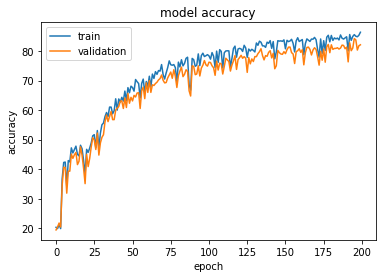

Maximum Train Accuracy : 86.36111450195312
Maximum Validation Accuracy : 84.22222137451172


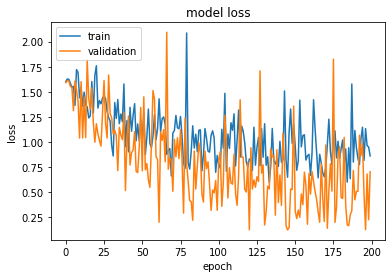

Minimum Train Loss : 0.593126118183136
Minimum Validation Loss : 0.1191234290599823


In [ ]:
Bacteria_model_amp_RMSprop_00001 = Bact_Net()
Bacteria_model_amp_RMSprop_00001.cuda()
trainer_RMSprop_amp_00001 = trainer(Bacteria_model_amp_RMSprop_00001, amp_train_loader,"RMSprop", epoch_size=200, learning_rate=0.0001)
trainer_RMSprop_amp_00001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_amp_00001.history['train_acc'])
plt.plot(trainer_RMSprop_amp_00001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_amp_00001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_amp_00001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_amp_00001.history['train_loss'])
plt.plot(trainer_RMSprop_amp_00001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_amp_00001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_amp_00001.history['val_loss'])}")

# Amp_Adam

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 20.555555


  0%|          | 1/200 [24:09<80:08:38, 1449.84s/it]

Val Acc | Epoch 1/200 | ACC 17.777779
Train Acc | Epoch 2/200 | ACC 20.555555


  1%|          | 2/200 [24:19<33:09:27, 602.87s/it] 

Val Acc | Epoch 2/200 | ACC 17.777779
Train Acc | Epoch 3/200 | ACC 20.555555


  2%|▏         | 3/200 [24:29<18:10:30, 332.14s/it]

Val Acc | Epoch 3/200 | ACC 17.777779
Train Acc | Epoch 4/200 | ACC 20.305555


  2%|▏         | 4/200 [24:39<11:09:43, 205.02s/it]

Val Acc | Epoch 4/200 | ACC 18.777779
Train Acc | Epoch 5/200 | ACC 20.250000


  2%|▎         | 5/200 [24:49<7:17:47, 134.71s/it] 

Val Acc | Epoch 5/200 | ACC 19.000000
Train Acc | Epoch 6/200 | ACC 20.250000


  3%|▎         | 6/200 [25:00<4:58:39, 92.37s/it] 

Val Acc | Epoch 6/200 | ACC 19.000000
Train Acc | Epoch 7/200 | ACC 19.527779


  4%|▎         | 7/200 [25:10<3:30:23, 65.41s/it]

Val Acc | Epoch 7/200 | ACC 21.888889
Train Acc | Epoch 8/200 | ACC 20.305555


  4%|▍         | 8/200 [25:20<2:32:50, 47.77s/it]

Val Acc | Epoch 8/200 | ACC 18.777779
Train Acc | Epoch 9/200 | ACC 20.305555


  4%|▍         | 9/200 [25:30<1:54:32, 35.98s/it]

Val Acc | Epoch 9/200 | ACC 18.777779
Train Acc | Epoch 10/200 | ACC 20.555555


  5%|▌         | 10/200 [25:40<1:28:32, 27.96s/it]

Val Acc | Epoch 10/200 | ACC 17.777779
Train Acc | Epoch 11/200 | ACC 20.250000


  6%|▌         | 11/200 [25:50<1:10:42, 22.45s/it]

Val Acc | Epoch 11/200 | ACC 19.000000
Train Acc | Epoch 12/200 | ACC 20.250000


  6%|▌         | 12/200 [26:00<58:27, 18.66s/it]  

Val Acc | Epoch 12/200 | ACC 19.000000
Train Acc | Epoch 13/200 | ACC 19.527779


  6%|▋         | 13/200 [26:10<49:55, 16.02s/it]

Val Acc | Epoch 13/200 | ACC 21.888889
Train Acc | Epoch 14/200 | ACC 20.555555


  7%|▋         | 14/200 [26:20<44:02, 14.21s/it]

Val Acc | Epoch 14/200 | ACC 17.777779
Train Acc | Epoch 15/200 | ACC 20.555555


  8%|▊         | 15/200 [26:30<40:00, 12.98s/it]

Val Acc | Epoch 15/200 | ACC 17.777779
Train Acc | Epoch 16/200 | ACC 20.250000


  8%|▊         | 16/200 [26:40<37:22, 12.19s/it]

Val Acc | Epoch 16/200 | ACC 19.000000
Train Acc | Epoch 17/200 | ACC 19.527779


  8%|▊         | 17/200 [26:50<35:21, 11.60s/it]

Val Acc | Epoch 17/200 | ACC 21.888889
Train Acc | Epoch 18/200 | ACC 20.555555


  9%|▉         | 18/200 [27:00<33:51, 11.16s/it]

Val Acc | Epoch 18/200 | ACC 17.777779
Train Acc | Epoch 19/200 | ACC 20.555555


 10%|▉         | 19/200 [27:10<32:30, 10.78s/it]

Val Acc | Epoch 19/200 | ACC 17.777779
Train Acc | Epoch 20/200 | ACC 20.250000


 10%|█         | 20/200 [27:20<31:31, 10.51s/it]

Val Acc | Epoch 20/200 | ACC 19.000000
Train Acc | Epoch 21/200 | ACC 20.250000


 10%|█         | 21/200 [27:30<30:58, 10.38s/it]

Val Acc | Epoch 21/200 | ACC 19.000000
Train Acc | Epoch 22/200 | ACC 20.555555


 11%|█         | 22/200 [27:40<30:31, 10.29s/it]

Val Acc | Epoch 22/200 | ACC 17.777779
Train Acc | Epoch 23/200 | ACC 20.555555


 12%|█▏        | 23/200 [27:50<29:59, 10.17s/it]

Val Acc | Epoch 23/200 | ACC 17.777779
Train Acc | Epoch 24/200 | ACC 20.250000


 12%|█▏        | 24/200 [28:00<29:51, 10.18s/it]

Val Acc | Epoch 24/200 | ACC 19.000000
Train Acc | Epoch 25/200 | ACC 20.305555


 12%|█▎        | 25/200 [28:10<29:37, 10.16s/it]

Val Acc | Epoch 25/200 | ACC 18.777779
Train Acc | Epoch 26/200 | ACC 20.305555


 13%|█▎        | 26/200 [28:20<29:13, 10.08s/it]

Val Acc | Epoch 26/200 | ACC 18.777779
Train Acc | Epoch 27/200 | ACC 20.250000


 14%|█▎        | 27/200 [28:31<29:06, 10.09s/it]

Val Acc | Epoch 27/200 | ACC 19.000000
Train Acc | Epoch 28/200 | ACC 20.555555


 14%|█▍        | 28/200 [28:41<28:56, 10.10s/it]

Val Acc | Epoch 28/200 | ACC 17.777779
Train Acc | Epoch 29/200 | ACC 19.361111


 14%|█▍        | 29/200 [28:51<28:42, 10.07s/it]

Val Acc | Epoch 29/200 | ACC 22.555555
Train Acc | Epoch 30/200 | ACC 19.361111


 15%|█▌        | 30/200 [29:01<28:24, 10.03s/it]

Val Acc | Epoch 30/200 | ACC 22.555555
Train Acc | Epoch 31/200 | ACC 20.555555


 16%|█▌        | 31/200 [29:11<28:10, 10.01s/it]

Val Acc | Epoch 31/200 | ACC 17.777779
Train Acc | Epoch 32/200 | ACC 20.555555


 16%|█▌        | 32/200 [29:20<27:55,  9.97s/it]

Val Acc | Epoch 32/200 | ACC 17.777779
Train Acc | Epoch 33/200 | ACC 20.305555


 16%|█▋        | 33/200 [29:30<27:41,  9.95s/it]

Val Acc | Epoch 33/200 | ACC 18.777779
Train Acc | Epoch 34/200 | ACC 20.555555


 17%|█▋        | 34/200 [29:40<27:40, 10.00s/it]

Val Acc | Epoch 34/200 | ACC 17.777779
Train Acc | Epoch 35/200 | ACC 20.555555


 18%|█▊        | 35/200 [29:50<27:27,  9.98s/it]

Val Acc | Epoch 35/200 | ACC 17.777779
Train Acc | Epoch 36/200 | ACC 20.555555


 18%|█▊        | 36/200 [30:00<27:24, 10.03s/it]

Val Acc | Epoch 36/200 | ACC 17.777779
Train Acc | Epoch 37/200 | ACC 19.361111


 18%|█▊        | 37/200 [30:11<27:16, 10.04s/it]

Val Acc | Epoch 37/200 | ACC 22.555555
Train Acc | Epoch 38/200 | ACC 20.305555


 19%|█▉        | 38/200 [30:21<27:03, 10.02s/it]

Val Acc | Epoch 38/200 | ACC 18.777779
Train Acc | Epoch 39/200 | ACC 20.305555


 20%|█▉        | 39/200 [30:31<26:56, 10.04s/it]

Val Acc | Epoch 39/200 | ACC 18.777779
Train Acc | Epoch 40/200 | ACC 20.250000


 20%|██        | 40/200 [30:41<26:42, 10.02s/it]

Val Acc | Epoch 40/200 | ACC 19.000000
Train Acc | Epoch 41/200 | ACC 20.305555


 20%|██        | 41/200 [30:51<26:45, 10.10s/it]

Val Acc | Epoch 41/200 | ACC 18.777779
Train Acc | Epoch 42/200 | ACC 20.250000


 21%|██        | 42/200 [31:01<26:26, 10.04s/it]

Val Acc | Epoch 42/200 | ACC 19.000000
Train Acc | Epoch 43/200 | ACC 20.555555


 22%|██▏       | 43/200 [31:11<26:08,  9.99s/it]

Val Acc | Epoch 43/200 | ACC 17.777779
Train Acc | Epoch 44/200 | ACC 20.555555


 22%|██▏       | 44/200 [31:21<25:55,  9.97s/it]

Val Acc | Epoch 44/200 | ACC 17.777779
Train Acc | Epoch 45/200 | ACC 20.250000


 22%|██▎       | 45/200 [31:31<25:46,  9.98s/it]

Val Acc | Epoch 45/200 | ACC 19.000000
Train Acc | Epoch 46/200 | ACC 20.555555


 23%|██▎       | 46/200 [31:41<25:45, 10.04s/it]

Val Acc | Epoch 46/200 | ACC 17.777779
Train Acc | Epoch 47/200 | ACC 20.250000


 24%|██▎       | 47/200 [31:51<26:04, 10.23s/it]

Val Acc | Epoch 47/200 | ACC 19.000000
Train Acc | Epoch 48/200 | ACC 20.305555


 24%|██▍       | 48/200 [32:02<26:05, 10.30s/it]

Val Acc | Epoch 48/200 | ACC 18.777779
Train Acc | Epoch 49/200 | ACC 20.250000


 24%|██▍       | 49/200 [32:12<25:46, 10.24s/it]

Val Acc | Epoch 49/200 | ACC 19.000000
Train Acc | Epoch 50/200 | ACC 20.555555


 25%|██▌       | 50/200 [32:22<25:32, 10.22s/it]

Val Acc | Epoch 50/200 | ACC 17.777779
Train Acc | Epoch 51/200 | ACC 19.527779


 26%|██▌       | 51/200 [32:32<25:13, 10.16s/it]

Val Acc | Epoch 51/200 | ACC 21.888889
Train Acc | Epoch 52/200 | ACC 20.555555


 26%|██▌       | 52/200 [32:42<24:56, 10.11s/it]

Val Acc | Epoch 52/200 | ACC 17.777779
Train Acc | Epoch 53/200 | ACC 20.555555


 26%|██▋       | 53/200 [32:52<24:54, 10.16s/it]

Val Acc | Epoch 53/200 | ACC 17.777779
Train Acc | Epoch 54/200 | ACC 19.527779


 27%|██▋       | 54/200 [33:03<24:44, 10.17s/it]

Val Acc | Epoch 54/200 | ACC 21.888889
Train Acc | Epoch 55/200 | ACC 20.555555


 28%|██▊       | 55/200 [33:13<24:31, 10.15s/it]

Val Acc | Epoch 55/200 | ACC 17.777779
Train Acc | Epoch 56/200 | ACC 19.361111


 28%|██▊       | 56/200 [33:23<24:13, 10.10s/it]

Val Acc | Epoch 56/200 | ACC 22.555555
Train Acc | Epoch 57/200 | ACC 20.555555


 28%|██▊       | 57/200 [33:33<24:02, 10.09s/it]

Val Acc | Epoch 57/200 | ACC 17.777779
Train Acc | Epoch 58/200 | ACC 20.555555


 29%|██▉       | 58/200 [33:43<23:50, 10.07s/it]

Val Acc | Epoch 58/200 | ACC 17.777779
Train Acc | Epoch 59/200 | ACC 20.555555


 30%|██▉       | 59/200 [33:53<23:32, 10.02s/it]

Val Acc | Epoch 59/200 | ACC 17.777779
Train Acc | Epoch 60/200 | ACC 20.305555


 30%|███       | 60/200 [34:03<23:27, 10.05s/it]

Val Acc | Epoch 60/200 | ACC 18.777779
Train Acc | Epoch 61/200 | ACC 20.305555


 30%|███       | 61/200 [34:13<23:25, 10.11s/it]

Val Acc | Epoch 61/200 | ACC 18.777779
Train Acc | Epoch 62/200 | ACC 20.555555


 31%|███       | 62/200 [34:23<23:19, 10.14s/it]

Val Acc | Epoch 62/200 | ACC 17.777779
Train Acc | Epoch 63/200 | ACC 19.361111


 32%|███▏      | 63/200 [34:33<23:08, 10.13s/it]

Val Acc | Epoch 63/200 | ACC 22.555555
Train Acc | Epoch 64/200 | ACC 20.305555


 32%|███▏      | 64/200 [34:44<23:00, 10.15s/it]

Val Acc | Epoch 64/200 | ACC 18.777779
Train Acc | Epoch 65/200 | ACC 20.555555


 32%|███▎      | 65/200 [34:54<22:48, 10.14s/it]

Val Acc | Epoch 65/200 | ACC 17.777779
Train Acc | Epoch 66/200 | ACC 20.305555


 33%|███▎      | 66/200 [35:04<22:34, 10.11s/it]

Val Acc | Epoch 66/200 | ACC 18.777779
Train Acc | Epoch 67/200 | ACC 20.555555


 34%|███▎      | 67/200 [35:14<22:24, 10.11s/it]

Val Acc | Epoch 67/200 | ACC 17.777779
Train Acc | Epoch 68/200 | ACC 19.361111


 34%|███▍      | 68/200 [35:24<22:14, 10.11s/it]

Val Acc | Epoch 68/200 | ACC 22.555555
Train Acc | Epoch 69/200 | ACC 20.555555


 34%|███▍      | 69/200 [35:34<21:55, 10.04s/it]

Val Acc | Epoch 69/200 | ACC 17.777779
Train Acc | Epoch 70/200 | ACC 19.527779


 35%|███▌      | 70/200 [35:44<21:54, 10.11s/it]

Val Acc | Epoch 70/200 | ACC 21.888889
Train Acc | Epoch 71/200 | ACC 20.305555


 36%|███▌      | 71/200 [35:54<21:50, 10.16s/it]

Val Acc | Epoch 71/200 | ACC 18.777779
Train Acc | Epoch 72/200 | ACC 19.361111


 36%|███▌      | 72/200 [36:04<21:35, 10.12s/it]

Val Acc | Epoch 72/200 | ACC 22.555555
Train Acc | Epoch 73/200 | ACC 20.555555


 36%|███▋      | 73/200 [36:14<21:20, 10.09s/it]

Val Acc | Epoch 73/200 | ACC 17.777779
Train Acc | Epoch 74/200 | ACC 20.250000


 37%|███▋      | 74/200 [36:25<21:10, 10.08s/it]

Val Acc | Epoch 74/200 | ACC 19.000000
Train Acc | Epoch 75/200 | ACC 20.555555


 38%|███▊      | 75/200 [36:34<20:53, 10.03s/it]

Val Acc | Epoch 75/200 | ACC 17.777779
Train Acc | Epoch 76/200 | ACC 20.305555


 38%|███▊      | 76/200 [36:45<20:49, 10.08s/it]

Val Acc | Epoch 76/200 | ACC 18.777779
Train Acc | Epoch 77/200 | ACC 20.250000


 38%|███▊      | 77/200 [36:55<20:40, 10.09s/it]

Val Acc | Epoch 77/200 | ACC 19.000000
Train Acc | Epoch 78/200 | ACC 20.250000


 39%|███▉      | 78/200 [37:05<20:53, 10.27s/it]

Val Acc | Epoch 78/200 | ACC 19.000000
Train Acc | Epoch 79/200 | ACC 20.555555


 40%|███▉      | 79/200 [37:16<20:39, 10.24s/it]

Val Acc | Epoch 79/200 | ACC 17.777779
Train Acc | Epoch 80/200 | ACC 20.555555


 40%|████      | 80/200 [37:26<20:28, 10.24s/it]

Val Acc | Epoch 80/200 | ACC 17.777779
Train Acc | Epoch 81/200 | ACC 20.250000


 40%|████      | 81/200 [37:36<20:12, 10.19s/it]

Val Acc | Epoch 81/200 | ACC 19.000000
Train Acc | Epoch 82/200 | ACC 20.250000


 41%|████      | 82/200 [37:46<20:01, 10.18s/it]

Val Acc | Epoch 82/200 | ACC 19.000000
Train Acc | Epoch 83/200 | ACC 20.555555


 42%|████▏     | 83/200 [37:56<19:47, 10.15s/it]

Val Acc | Epoch 83/200 | ACC 17.777779
Train Acc | Epoch 84/200 | ACC 20.305555


 42%|████▏     | 84/200 [38:06<19:39, 10.17s/it]

Val Acc | Epoch 84/200 | ACC 18.777779
Train Acc | Epoch 85/200 | ACC 20.305555


 42%|████▎     | 85/200 [38:16<19:27, 10.15s/it]

Val Acc | Epoch 85/200 | ACC 18.777779
Train Acc | Epoch 86/200 | ACC 20.305555


 43%|████▎     | 86/200 [38:27<19:19, 10.17s/it]

Val Acc | Epoch 86/200 | ACC 18.777779
Train Acc | Epoch 87/200 | ACC 20.555555


 44%|████▎     | 87/200 [38:37<19:05, 10.14s/it]

Val Acc | Epoch 87/200 | ACC 17.777779
Train Acc | Epoch 88/200 | ACC 20.305555


 44%|████▍     | 88/200 [38:47<18:45, 10.05s/it]

Val Acc | Epoch 88/200 | ACC 18.777779
Train Acc | Epoch 89/200 | ACC 20.555555


 44%|████▍     | 89/200 [38:56<18:27,  9.98s/it]

Val Acc | Epoch 89/200 | ACC 17.777779
Train Acc | Epoch 90/200 | ACC 20.305555


 45%|████▌     | 90/200 [39:06<18:15,  9.96s/it]

Val Acc | Epoch 90/200 | ACC 18.777779
Train Acc | Epoch 91/200 | ACC 20.555555


 46%|████▌     | 91/200 [39:16<18:01,  9.92s/it]

Val Acc | Epoch 91/200 | ACC 17.777779
Train Acc | Epoch 92/200 | ACC 20.555555


 46%|████▌     | 92/200 [39:26<17:51,  9.92s/it]

Val Acc | Epoch 92/200 | ACC 17.777779
Train Acc | Epoch 93/200 | ACC 20.305555


 46%|████▋     | 93/200 [39:36<17:43,  9.94s/it]

Val Acc | Epoch 93/200 | ACC 18.777779
Train Acc | Epoch 94/200 | ACC 20.555555


 47%|████▋     | 94/200 [39:46<17:27,  9.89s/it]

Val Acc | Epoch 94/200 | ACC 17.777779
Train Acc | Epoch 95/200 | ACC 19.361111


 48%|████▊     | 95/200 [39:56<17:14,  9.85s/it]

Val Acc | Epoch 95/200 | ACC 22.555555
Train Acc | Epoch 96/200 | ACC 20.250000


 48%|████▊     | 96/200 [40:06<17:07,  9.88s/it]

Val Acc | Epoch 96/200 | ACC 19.000000
Train Acc | Epoch 97/200 | ACC 20.555555


 48%|████▊     | 97/200 [40:15<17:00,  9.91s/it]

Val Acc | Epoch 97/200 | ACC 17.777779
Train Acc | Epoch 98/200 | ACC 20.250000


 49%|████▉     | 98/200 [40:26<17:07, 10.07s/it]

Val Acc | Epoch 98/200 | ACC 19.000000
Train Acc | Epoch 99/200 | ACC 20.555555


 50%|████▉     | 99/200 [40:36<16:55, 10.05s/it]

Val Acc | Epoch 99/200 | ACC 17.777779
Train Acc | Epoch 100/200 | ACC 20.555555


 50%|█████     | 100/200 [40:46<16:44, 10.05s/it]

Val Acc | Epoch 100/200 | ACC 17.777779
Train Acc | Epoch 101/200 | ACC 20.555555


 50%|█████     | 101/200 [40:56<16:32, 10.03s/it]

Val Acc | Epoch 101/200 | ACC 17.777779
Train Acc | Epoch 102/200 | ACC 20.250000


 51%|█████     | 102/200 [41:06<16:21, 10.02s/it]

Val Acc | Epoch 102/200 | ACC 19.000000
Train Acc | Epoch 103/200 | ACC 20.305555


 52%|█████▏    | 103/200 [41:16<16:14, 10.05s/it]

Val Acc | Epoch 103/200 | ACC 18.777779
Train Acc | Epoch 104/200 | ACC 20.305555


 52%|█████▏    | 104/200 [41:26<16:03, 10.04s/it]

Val Acc | Epoch 104/200 | ACC 18.777779
Train Acc | Epoch 105/200 | ACC 20.555555


 52%|█████▎    | 105/200 [41:36<15:54, 10.05s/it]

Val Acc | Epoch 105/200 | ACC 17.777779
Train Acc | Epoch 106/200 | ACC 20.555555


 53%|█████▎    | 106/200 [41:46<15:46, 10.07s/it]

Val Acc | Epoch 106/200 | ACC 17.777779
Train Acc | Epoch 107/200 | ACC 20.555555


 54%|█████▎    | 107/200 [41:56<15:34, 10.05s/it]

Val Acc | Epoch 107/200 | ACC 17.777779
Train Acc | Epoch 108/200 | ACC 20.250000


 54%|█████▍    | 108/200 [42:06<15:27, 10.08s/it]

Val Acc | Epoch 108/200 | ACC 19.000000
Train Acc | Epoch 109/200 | ACC 20.305555


 55%|█████▍    | 109/200 [42:17<15:32, 10.25s/it]

Val Acc | Epoch 109/200 | ACC 18.777779
Train Acc | Epoch 110/200 | ACC 19.527779


 55%|█████▌    | 110/200 [42:27<15:19, 10.21s/it]

Val Acc | Epoch 110/200 | ACC 21.888889
Train Acc | Epoch 111/200 | ACC 20.305555


 56%|█████▌    | 111/200 [42:37<15:06, 10.18s/it]

Val Acc | Epoch 111/200 | ACC 18.777779
Train Acc | Epoch 112/200 | ACC 20.250000


 56%|█████▌    | 112/200 [42:47<14:49, 10.11s/it]

Val Acc | Epoch 112/200 | ACC 19.000000
Train Acc | Epoch 113/200 | ACC 20.250000


 56%|█████▋    | 113/200 [42:57<14:40, 10.12s/it]

Val Acc | Epoch 113/200 | ACC 19.000000
Train Acc | Epoch 114/200 | ACC 20.305555


 57%|█████▋    | 114/200 [43:08<14:30, 10.12s/it]

Val Acc | Epoch 114/200 | ACC 18.777779
Train Acc | Epoch 115/200 | ACC 20.305555


 57%|█████▊    | 115/200 [43:17<14:13, 10.04s/it]

Val Acc | Epoch 115/200 | ACC 18.777779
Train Acc | Epoch 116/200 | ACC 20.250000


 58%|█████▊    | 116/200 [43:27<14:04, 10.06s/it]

Val Acc | Epoch 116/200 | ACC 19.000000
Train Acc | Epoch 117/200 | ACC 19.527779


 58%|█████▊    | 117/200 [43:37<13:49,  9.99s/it]

Val Acc | Epoch 117/200 | ACC 21.888889
Train Acc | Epoch 118/200 | ACC 20.305555


 59%|█████▉    | 118/200 [43:47<13:39,  9.99s/it]

Val Acc | Epoch 118/200 | ACC 18.777779
Train Acc | Epoch 119/200 | ACC 19.527779


 60%|█████▉    | 119/200 [43:57<13:31, 10.02s/it]

Val Acc | Epoch 119/200 | ACC 21.888889
Train Acc | Epoch 120/200 | ACC 20.305555


 60%|██████    | 120/200 [44:07<13:20, 10.01s/it]

Val Acc | Epoch 120/200 | ACC 18.777779
Train Acc | Epoch 121/200 | ACC 20.305555


 60%|██████    | 121/200 [44:17<13:12, 10.04s/it]

Val Acc | Epoch 121/200 | ACC 18.777779
Train Acc | Epoch 122/200 | ACC 20.555555


 61%|██████    | 122/200 [44:28<13:02, 10.03s/it]

Val Acc | Epoch 122/200 | ACC 17.777779
Train Acc | Epoch 123/200 | ACC 19.527779


 62%|██████▏   | 123/200 [44:38<12:54, 10.06s/it]

Val Acc | Epoch 123/200 | ACC 21.888889
Train Acc | Epoch 124/200 | ACC 20.305555


 62%|██████▏   | 124/200 [44:48<12:44, 10.06s/it]

Val Acc | Epoch 124/200 | ACC 18.777779
Train Acc | Epoch 125/200 | ACC 20.555555


 62%|██████▎   | 125/200 [44:58<12:33, 10.04s/it]

Val Acc | Epoch 125/200 | ACC 17.777779
Train Acc | Epoch 126/200 | ACC 20.555555


 63%|██████▎   | 126/200 [45:08<12:22, 10.03s/it]

Val Acc | Epoch 126/200 | ACC 17.777779
Train Acc | Epoch 127/200 | ACC 20.555555


 64%|██████▎   | 127/200 [45:18<12:11, 10.03s/it]

Val Acc | Epoch 127/200 | ACC 17.777779
Train Acc | Epoch 128/200 | ACC 20.555555


 64%|██████▍   | 128/200 [45:28<12:05, 10.08s/it]

Val Acc | Epoch 128/200 | ACC 17.777779
Train Acc | Epoch 129/200 | ACC 20.305555


 64%|██████▍   | 129/200 [45:38<11:53, 10.05s/it]

Val Acc | Epoch 129/200 | ACC 18.777779
Train Acc | Epoch 130/200 | ACC 20.250000


 65%|██████▌   | 130/200 [45:48<11:43, 10.05s/it]

Val Acc | Epoch 130/200 | ACC 19.000000
Train Acc | Epoch 131/200 | ACC 20.555555


 66%|██████▌   | 131/200 [45:58<11:33, 10.05s/it]

Val Acc | Epoch 131/200 | ACC 17.777779
Train Acc | Epoch 132/200 | ACC 20.305555


 66%|██████▌   | 132/200 [46:08<11:24, 10.06s/it]

Val Acc | Epoch 132/200 | ACC 18.777779
Train Acc | Epoch 133/200 | ACC 20.555555


 66%|██████▋   | 133/200 [46:18<11:13, 10.05s/it]

Val Acc | Epoch 133/200 | ACC 17.777779
Train Acc | Epoch 134/200 | ACC 20.250000


 67%|██████▋   | 134/200 [46:28<11:01, 10.02s/it]

Val Acc | Epoch 134/200 | ACC 19.000000
Train Acc | Epoch 135/200 | ACC 20.555555


 68%|██████▊   | 135/200 [46:38<10:52, 10.04s/it]

Val Acc | Epoch 135/200 | ACC 17.777779
Train Acc | Epoch 136/200 | ACC 20.305555


 68%|██████▊   | 136/200 [46:48<10:44, 10.07s/it]

Val Acc | Epoch 136/200 | ACC 18.777779
Train Acc | Epoch 137/200 | ACC 20.305555


 68%|██████▊   | 137/200 [46:58<10:35, 10.09s/it]

Val Acc | Epoch 137/200 | ACC 18.777779
Train Acc | Epoch 138/200 | ACC 20.305555


 69%|██████▉   | 138/200 [47:08<10:23, 10.06s/it]

Val Acc | Epoch 138/200 | ACC 18.777779
Train Acc | Epoch 139/200 | ACC 20.250000


 70%|██████▉   | 139/200 [47:19<10:18, 10.14s/it]

Val Acc | Epoch 139/200 | ACC 19.000000
Train Acc | Epoch 140/200 | ACC 19.361111


 70%|███████   | 140/200 [47:29<10:15, 10.26s/it]

Val Acc | Epoch 140/200 | ACC 22.555555
Train Acc | Epoch 141/200 | ACC 20.250000


 70%|███████   | 141/200 [47:39<10:03, 10.24s/it]

Val Acc | Epoch 141/200 | ACC 19.000000
Train Acc | Epoch 142/200 | ACC 19.361111


 71%|███████   | 142/200 [47:49<09:48, 10.15s/it]

Val Acc | Epoch 142/200 | ACC 22.555555
Train Acc | Epoch 143/200 | ACC 20.250000


 72%|███████▏  | 143/200 [47:59<09:36, 10.12s/it]

Val Acc | Epoch 143/200 | ACC 19.000000
Train Acc | Epoch 144/200 | ACC 20.555555


 72%|███████▏  | 144/200 [48:10<09:26, 10.12s/it]

Val Acc | Epoch 144/200 | ACC 17.777779
Train Acc | Epoch 145/200 | ACC 20.555555


 72%|███████▎  | 145/200 [48:19<09:11, 10.03s/it]

Val Acc | Epoch 145/200 | ACC 17.777779
Train Acc | Epoch 146/200 | ACC 20.555555


 73%|███████▎  | 146/200 [48:30<09:03, 10.06s/it]

Val Acc | Epoch 146/200 | ACC 17.777779
Train Acc | Epoch 147/200 | ACC 20.250000


 74%|███████▎  | 147/200 [48:39<08:50, 10.01s/it]

Val Acc | Epoch 147/200 | ACC 19.000000
Train Acc | Epoch 148/200 | ACC 20.250000


 74%|███████▍  | 148/200 [48:50<08:41, 10.03s/it]

Val Acc | Epoch 148/200 | ACC 19.000000
Train Acc | Epoch 149/200 | ACC 20.305555


 74%|███████▍  | 149/200 [48:59<08:30, 10.01s/it]

Val Acc | Epoch 149/200 | ACC 18.777779
Train Acc | Epoch 150/200 | ACC 20.555555


 75%|███████▌  | 150/200 [49:10<08:22, 10.05s/it]

Val Acc | Epoch 150/200 | ACC 17.777779
Train Acc | Epoch 151/200 | ACC 20.250000


 76%|███████▌  | 151/200 [49:20<08:11, 10.04s/it]

Val Acc | Epoch 151/200 | ACC 19.000000
Train Acc | Epoch 152/200 | ACC 20.305555


 76%|███████▌  | 152/200 [49:30<08:02, 10.06s/it]

Val Acc | Epoch 152/200 | ACC 18.777779
Train Acc | Epoch 153/200 | ACC 20.555555


 76%|███████▋  | 153/200 [49:40<07:53, 10.07s/it]

Val Acc | Epoch 153/200 | ACC 17.777779
Train Acc | Epoch 154/200 | ACC 19.361111


 77%|███████▋  | 154/200 [49:50<07:41, 10.02s/it]

Val Acc | Epoch 154/200 | ACC 22.555555
Train Acc | Epoch 155/200 | ACC 20.305555


 78%|███████▊  | 155/200 [50:00<07:31, 10.03s/it]

Val Acc | Epoch 155/200 | ACC 18.777779
Train Acc | Epoch 156/200 | ACC 20.250000


 78%|███████▊  | 156/200 [50:10<07:21, 10.04s/it]

Val Acc | Epoch 156/200 | ACC 19.000000
Train Acc | Epoch 157/200 | ACC 20.250000


 78%|███████▊  | 157/200 [50:20<07:08,  9.97s/it]

Val Acc | Epoch 157/200 | ACC 19.000000
Train Acc | Epoch 158/200 | ACC 20.555555


 79%|███████▉  | 158/200 [50:30<07:00, 10.01s/it]

Val Acc | Epoch 158/200 | ACC 17.777779
Train Acc | Epoch 159/200 | ACC 20.555555


 80%|███████▉  | 159/200 [50:40<06:52, 10.06s/it]

Val Acc | Epoch 159/200 | ACC 17.777779
Train Acc | Epoch 160/200 | ACC 20.250000


 80%|████████  | 160/200 [50:50<06:42, 10.06s/it]

Val Acc | Epoch 160/200 | ACC 19.000000
Train Acc | Epoch 161/200 | ACC 20.250000


 80%|████████  | 161/200 [51:00<06:31, 10.05s/it]

Val Acc | Epoch 161/200 | ACC 19.000000
Train Acc | Epoch 162/200 | ACC 20.305555


 81%|████████  | 162/200 [51:10<06:21, 10.03s/it]

Val Acc | Epoch 162/200 | ACC 18.777779
Train Acc | Epoch 163/200 | ACC 20.250000


 82%|████████▏ | 163/200 [51:20<06:09,  9.98s/it]

Val Acc | Epoch 163/200 | ACC 19.000000
Train Acc | Epoch 164/200 | ACC 20.250000


 82%|████████▏ | 164/200 [51:30<05:58,  9.97s/it]

Val Acc | Epoch 164/200 | ACC 19.000000
Train Acc | Epoch 165/200 | ACC 20.250000


 82%|████████▎ | 165/200 [51:40<05:47,  9.94s/it]

Val Acc | Epoch 165/200 | ACC 19.000000
Train Acc | Epoch 166/200 | ACC 20.555555


 83%|████████▎ | 166/200 [51:50<05:38,  9.95s/it]

Val Acc | Epoch 166/200 | ACC 17.777779
Train Acc | Epoch 167/200 | ACC 20.250000


 84%|████████▎ | 167/200 [52:00<05:29,  9.99s/it]

Val Acc | Epoch 167/200 | ACC 19.000000
Train Acc | Epoch 168/200 | ACC 20.555555


 84%|████████▍ | 168/200 [52:10<05:19,  9.97s/it]

Val Acc | Epoch 168/200 | ACC 17.777779
Train Acc | Epoch 169/200 | ACC 20.555555


 84%|████████▍ | 169/200 [52:20<05:10, 10.02s/it]

Val Acc | Epoch 169/200 | ACC 17.777779
Train Acc | Epoch 170/200 | ACC 20.250000


 85%|████████▌ | 170/200 [52:30<05:03, 10.13s/it]

Val Acc | Epoch 170/200 | ACC 19.000000
Train Acc | Epoch 171/200 | ACC 20.555555


 86%|████████▌ | 171/200 [52:41<04:57, 10.26s/it]

Val Acc | Epoch 171/200 | ACC 17.777779
Train Acc | Epoch 172/200 | ACC 20.305555


 86%|████████▌ | 172/200 [52:51<04:45, 10.18s/it]

Val Acc | Epoch 172/200 | ACC 18.777779
Train Acc | Epoch 173/200 | ACC 20.305555


 86%|████████▋ | 173/200 [53:01<04:33, 10.11s/it]

Val Acc | Epoch 173/200 | ACC 18.777779
Train Acc | Epoch 174/200 | ACC 19.527779


 87%|████████▋ | 174/200 [53:10<04:20, 10.01s/it]

Val Acc | Epoch 174/200 | ACC 21.888889
Train Acc | Epoch 175/200 | ACC 19.527779


 88%|████████▊ | 175/200 [53:20<04:10, 10.01s/it]

Val Acc | Epoch 175/200 | ACC 21.888889
Train Acc | Epoch 176/200 | ACC 19.527779


 88%|████████▊ | 176/200 [53:30<04:00, 10.00s/it]

Val Acc | Epoch 176/200 | ACC 21.888889
Train Acc | Epoch 177/200 | ACC 19.527779


 88%|████████▊ | 177/200 [53:40<03:49,  9.97s/it]

Val Acc | Epoch 177/200 | ACC 21.888889
Train Acc | Epoch 178/200 | ACC 20.250000


 89%|████████▉ | 178/200 [53:50<03:40, 10.01s/it]

Val Acc | Epoch 178/200 | ACC 19.000000
Train Acc | Epoch 179/200 | ACC 20.305555


 90%|████████▉ | 179/200 [54:00<03:30, 10.00s/it]

Val Acc | Epoch 179/200 | ACC 18.777779
Train Acc | Epoch 180/200 | ACC 20.555555


 90%|█████████ | 180/200 [54:10<03:20, 10.01s/it]

Val Acc | Epoch 180/200 | ACC 17.777779
Train Acc | Epoch 181/200 | ACC 20.555555


 90%|█████████ | 181/200 [54:21<03:11, 10.08s/it]

Val Acc | Epoch 181/200 | ACC 17.777779
Train Acc | Epoch 182/200 | ACC 20.305555


 91%|█████████ | 182/200 [54:31<03:02, 10.12s/it]

Val Acc | Epoch 182/200 | ACC 18.777779
Train Acc | Epoch 183/200 | ACC 20.305555


 92%|█████████▏| 183/200 [54:41<02:51, 10.11s/it]

Val Acc | Epoch 183/200 | ACC 18.777779
Train Acc | Epoch 184/200 | ACC 20.305555


 92%|█████████▏| 184/200 [54:51<02:40, 10.03s/it]

Val Acc | Epoch 184/200 | ACC 18.777779
Train Acc | Epoch 185/200 | ACC 19.527779


 92%|█████████▎| 185/200 [55:01<02:31, 10.09s/it]

Val Acc | Epoch 185/200 | ACC 21.888889
Train Acc | Epoch 186/200 | ACC 20.555555


 93%|█████████▎| 186/200 [55:11<02:21, 10.08s/it]

Val Acc | Epoch 186/200 | ACC 17.777779
Train Acc | Epoch 187/200 | ACC 20.555555


 94%|█████████▎| 187/200 [55:21<02:10, 10.04s/it]

Val Acc | Epoch 187/200 | ACC 17.777779
Train Acc | Epoch 188/200 | ACC 19.527779


 94%|█████████▍| 188/200 [55:31<02:00, 10.03s/it]

Val Acc | Epoch 188/200 | ACC 21.888889
Train Acc | Epoch 189/200 | ACC 20.250000


 94%|█████████▍| 189/200 [55:41<01:50, 10.07s/it]

Val Acc | Epoch 189/200 | ACC 19.000000
Train Acc | Epoch 190/200 | ACC 20.305555


 95%|█████████▌| 190/200 [55:51<01:40, 10.07s/it]

Val Acc | Epoch 190/200 | ACC 18.777779
Train Acc | Epoch 191/200 | ACC 19.527779


 96%|█████████▌| 191/200 [56:01<01:30, 10.10s/it]

Val Acc | Epoch 191/200 | ACC 21.888889
Train Acc | Epoch 192/200 | ACC 19.361111


 96%|█████████▌| 192/200 [56:11<01:20, 10.06s/it]

Val Acc | Epoch 192/200 | ACC 22.555555
Train Acc | Epoch 193/200 | ACC 20.555555


 96%|█████████▋| 193/200 [56:21<01:10, 10.04s/it]

Val Acc | Epoch 193/200 | ACC 17.777779
Train Acc | Epoch 194/200 | ACC 20.250000


 97%|█████████▋| 194/200 [56:32<01:00, 10.07s/it]

Val Acc | Epoch 194/200 | ACC 19.000000
Train Acc | Epoch 195/200 | ACC 20.305555


 98%|█████████▊| 195/200 [56:42<00:50, 10.07s/it]

Val Acc | Epoch 195/200 | ACC 18.777779
Train Acc | Epoch 196/200 | ACC 20.250000


 98%|█████████▊| 196/200 [56:52<00:40, 10.02s/it]

Val Acc | Epoch 196/200 | ACC 19.000000
Train Acc | Epoch 197/200 | ACC 20.305555


 98%|█████████▊| 197/200 [57:02<00:30, 10.07s/it]

Val Acc | Epoch 197/200 | ACC 18.777779
Train Acc | Epoch 198/200 | ACC 19.361111


 99%|█████████▉| 198/200 [57:12<00:20, 10.10s/it]

Val Acc | Epoch 198/200 | ACC 22.555555
Train Acc | Epoch 199/200 | ACC 20.250000


100%|█████████▉| 199/200 [57:22<00:10, 10.09s/it]

Val Acc | Epoch 199/200 | ACC 19.000000
Train Acc | Epoch 200/200 | ACC 20.555555


100%|██████████| 200/200 [57:32<00:00, 17.26s/it]

Val Acc | Epoch 200/200 | ACC 17.777779


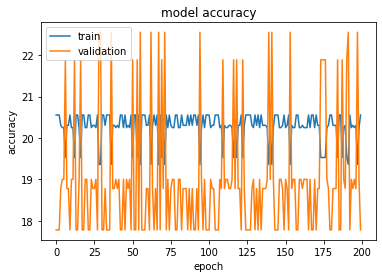

Maximum Train Accuracy : 20.55555534362793
Maximum Validation Accuracy : 22.55555534362793


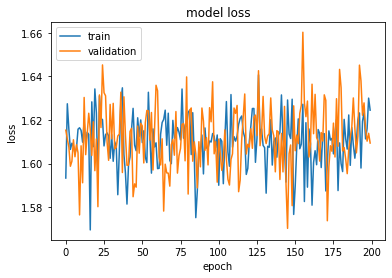

Minimum Train Loss : 1.569557785987854
Minimum Validation Loss : 1.5702708959579468


In [ ]:
Bacteria_model_amp_Adam_001 = Bact_Net()
Bacteria_model_amp_Adam_001.cuda()
trainer_Adam_amp_001 = trainer(Bacteria_model_amp_Adam_001, amp_train_loader,"Adam", epoch_size=200, learning_rate=0.01)
trainer_Adam_amp_001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_amp_001.history['train_acc'])
plt.plot(trainer_Adam_amp_001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_amp_001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_amp_001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_amp_001.history['train_loss'])
plt.plot(trainer_Adam_amp_001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_amp_001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_amp_001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 20.305555


  0%|          | 1/200 [00:10<34:34, 10.43s/it]

Val Acc | Epoch 1/200 | ACC 18.777779
Train Acc | Epoch 2/200 | ACC 45.500000


  1%|          | 2/200 [00:20<34:11, 10.36s/it]

Val Acc | Epoch 2/200 | ACC 46.333332
Train Acc | Epoch 3/200 | ACC 49.055557


  2%|▏         | 3/200 [00:30<33:08, 10.09s/it]

Val Acc | Epoch 3/200 | ACC 52.555553
Train Acc | Epoch 4/200 | ACC 51.888889


  2%|▏         | 4/200 [00:40<32:41, 10.01s/it]

Val Acc | Epoch 4/200 | ACC 51.555557
Train Acc | Epoch 5/200 | ACC 61.888893


  2%|▎         | 5/200 [00:50<32:37, 10.04s/it]

Val Acc | Epoch 5/200 | ACC 65.000000
Train Acc | Epoch 6/200 | ACC 64.083336


  3%|▎         | 6/200 [01:00<32:33, 10.07s/it]

Val Acc | Epoch 6/200 | ACC 67.555557
Train Acc | Epoch 7/200 | ACC 66.888893


  4%|▎         | 7/200 [01:10<32:22, 10.07s/it]

Val Acc | Epoch 7/200 | ACC 72.888893
Train Acc | Epoch 8/200 | ACC 67.500000


  4%|▍         | 8/200 [01:20<32:16, 10.09s/it]

Val Acc | Epoch 8/200 | ACC 71.444443
Train Acc | Epoch 9/200 | ACC 68.583336


  4%|▍         | 9/200 [01:30<31:56, 10.03s/it]

Val Acc | Epoch 9/200 | ACC 73.111115
Train Acc | Epoch 10/200 | ACC 69.805557


  5%|▌         | 10/200 [01:40<31:49, 10.05s/it]

Val Acc | Epoch 10/200 | ACC 73.777779
Train Acc | Epoch 11/200 | ACC 71.722221


  6%|▌         | 11/200 [01:50<31:39, 10.05s/it]

Val Acc | Epoch 11/200 | ACC 74.666664
Train Acc | Epoch 12/200 | ACC 71.583336


  6%|▌         | 12/200 [02:00<31:25, 10.03s/it]

Val Acc | Epoch 12/200 | ACC 75.222221
Train Acc | Epoch 13/200 | ACC 73.972229


  6%|▋         | 13/200 [02:10<31:20, 10.05s/it]

Val Acc | Epoch 13/200 | ACC 76.000000
Train Acc | Epoch 14/200 | ACC 74.444450


  7%|▋         | 14/200 [02:21<31:12, 10.07s/it]

Val Acc | Epoch 14/200 | ACC 78.777779
Train Acc | Epoch 15/200 | ACC 71.777779


  8%|▊         | 15/200 [02:31<31:03, 10.07s/it]

Val Acc | Epoch 15/200 | ACC 74.888893
Train Acc | Epoch 16/200 | ACC 75.944450


  8%|▊         | 16/200 [02:41<30:52, 10.07s/it]

Val Acc | Epoch 16/200 | ACC 80.111107
Train Acc | Epoch 17/200 | ACC 73.916664


  8%|▊         | 17/200 [02:51<30:34, 10.03s/it]

Val Acc | Epoch 17/200 | ACC 80.000000
Train Acc | Epoch 18/200 | ACC 74.083336


  9%|▉         | 18/200 [03:01<30:41, 10.12s/it]

Val Acc | Epoch 18/200 | ACC 79.444443
Train Acc | Epoch 19/200 | ACC 76.416672


 10%|▉         | 19/200 [03:11<30:15, 10.03s/it]

Val Acc | Epoch 19/200 | ACC 79.111115
Train Acc | Epoch 20/200 | ACC 76.500008


 10%|█         | 20/200 [03:21<30:11, 10.06s/it]

Val Acc | Epoch 20/200 | ACC 79.777779
Train Acc | Epoch 21/200 | ACC 73.333336


 10%|█         | 21/200 [03:31<30:08, 10.11s/it]

Val Acc | Epoch 21/200 | ACC 78.555557
Train Acc | Epoch 22/200 | ACC 77.277779


 11%|█         | 22/200 [03:41<29:49, 10.06s/it]

Val Acc | Epoch 22/200 | ACC 82.666672
Train Acc | Epoch 23/200 | ACC 78.444443


 12%|█▏        | 23/200 [03:51<29:30, 10.00s/it]

Val Acc | Epoch 23/200 | ACC 81.333336
Train Acc | Epoch 24/200 | ACC 78.916672


 12%|█▏        | 24/200 [04:01<29:31, 10.06s/it]

Val Acc | Epoch 24/200 | ACC 81.888893
Train Acc | Epoch 25/200 | ACC 77.527779


 12%|█▎        | 25/200 [04:11<29:11, 10.01s/it]

Val Acc | Epoch 25/200 | ACC 82.000000
Train Acc | Epoch 26/200 | ACC 77.888885


 13%|█▎        | 26/200 [04:21<28:59, 10.00s/it]

Val Acc | Epoch 26/200 | ACC 81.444450
Train Acc | Epoch 27/200 | ACC 75.722221


 14%|█▎        | 27/200 [04:31<28:44,  9.97s/it]

Val Acc | Epoch 27/200 | ACC 79.222229
Train Acc | Epoch 28/200 | ACC 78.777779


 14%|█▍        | 28/200 [04:41<28:34,  9.97s/it]

Val Acc | Epoch 28/200 | ACC 83.222221
Train Acc | Epoch 29/200 | ACC 79.111115


 14%|█▍        | 29/200 [04:51<28:24,  9.97s/it]

Val Acc | Epoch 29/200 | ACC 83.666672
Train Acc | Epoch 30/200 | ACC 80.611115


 15%|█▌        | 30/200 [05:01<28:21, 10.01s/it]

Val Acc | Epoch 30/200 | ACC 83.444443
Train Acc | Epoch 31/200 | ACC 78.166672


 16%|█▌        | 31/200 [05:11<28:14, 10.03s/it]

Val Acc | Epoch 31/200 | ACC 82.333336
Train Acc | Epoch 32/200 | ACC 79.638893


 16%|█▌        | 32/200 [05:22<28:32, 10.19s/it]

Val Acc | Epoch 32/200 | ACC 83.888885
Train Acc | Epoch 33/200 | ACC 80.222229


 16%|█▋        | 33/200 [05:32<28:25, 10.21s/it]

Val Acc | Epoch 33/200 | ACC 84.000000
Train Acc | Epoch 34/200 | ACC 77.250000


 17%|█▋        | 34/200 [05:42<28:12, 10.19s/it]

Val Acc | Epoch 34/200 | ACC 81.222221
Train Acc | Epoch 35/200 | ACC 78.305557


 18%|█▊        | 35/200 [05:52<27:53, 10.14s/it]

Val Acc | Epoch 35/200 | ACC 82.333336
Train Acc | Epoch 36/200 | ACC 80.083336


 18%|█▊        | 36/200 [06:02<27:35, 10.09s/it]

Val Acc | Epoch 36/200 | ACC 84.666672
Train Acc | Epoch 37/200 | ACC 81.472221


 18%|█▊        | 37/200 [06:12<27:19, 10.06s/it]

Val Acc | Epoch 37/200 | ACC 84.666672
Train Acc | Epoch 38/200 | ACC 80.333336


 19%|█▉        | 38/200 [06:22<27:14, 10.09s/it]

Val Acc | Epoch 38/200 | ACC 82.222221
Train Acc | Epoch 39/200 | ACC 80.583336


 20%|█▉        | 39/200 [06:32<27:00, 10.06s/it]

Val Acc | Epoch 39/200 | ACC 86.000000
Train Acc | Epoch 40/200 | ACC 81.388893


 20%|██        | 40/200 [06:42<26:45, 10.03s/it]

Val Acc | Epoch 40/200 | ACC 83.222221
Train Acc | Epoch 41/200 | ACC 79.972229


 20%|██        | 41/200 [06:52<26:45, 10.09s/it]

Val Acc | Epoch 41/200 | ACC 83.444443
Train Acc | Epoch 42/200 | ACC 80.000000


 21%|██        | 42/200 [07:02<26:36, 10.11s/it]

Val Acc | Epoch 42/200 | ACC 83.000008
Train Acc | Epoch 43/200 | ACC 81.027779


 22%|██▏       | 43/200 [07:12<26:10, 10.00s/it]

Val Acc | Epoch 43/200 | ACC 85.444443
Train Acc | Epoch 44/200 | ACC 80.722221


 22%|██▏       | 44/200 [07:22<25:58,  9.99s/it]

Val Acc | Epoch 44/200 | ACC 84.444443
Train Acc | Epoch 45/200 | ACC 80.444450


 22%|██▎       | 45/200 [07:32<25:53, 10.02s/it]

Val Acc | Epoch 45/200 | ACC 83.222221
Train Acc | Epoch 46/200 | ACC 79.750000


 23%|██▎       | 46/200 [07:42<25:48, 10.05s/it]

Val Acc | Epoch 46/200 | ACC 84.222221
Train Acc | Epoch 47/200 | ACC 82.305557


 24%|██▎       | 47/200 [07:53<25:43, 10.09s/it]

Val Acc | Epoch 47/200 | ACC 87.222221
Train Acc | Epoch 48/200 | ACC 82.027779


 24%|██▍       | 48/200 [08:03<25:48, 10.19s/it]

Val Acc | Epoch 48/200 | ACC 86.111107
Train Acc | Epoch 49/200 | ACC 80.972221


 24%|██▍       | 49/200 [08:13<25:38, 10.19s/it]

Val Acc | Epoch 49/200 | ACC 83.444443
Train Acc | Epoch 50/200 | ACC 82.444450


 25%|██▌       | 50/200 [08:23<25:24, 10.16s/it]

Val Acc | Epoch 50/200 | ACC 87.333336
Train Acc | Epoch 51/200 | ACC 83.000008


 26%|██▌       | 51/200 [08:33<25:10, 10.13s/it]

Val Acc | Epoch 51/200 | ACC 86.222229
Train Acc | Epoch 52/200 | ACC 78.500000


 26%|██▌       | 52/200 [08:43<24:46, 10.05s/it]

Val Acc | Epoch 52/200 | ACC 79.666672
Train Acc | Epoch 53/200 | ACC 82.027779


 26%|██▋       | 53/200 [08:53<24:35, 10.04s/it]

Val Acc | Epoch 53/200 | ACC 87.000000
Train Acc | Epoch 54/200 | ACC 83.500000


 27%|██▋       | 54/200 [09:03<24:27, 10.05s/it]

Val Acc | Epoch 54/200 | ACC 87.111115
Train Acc | Epoch 55/200 | ACC 82.805557


 28%|██▊       | 55/200 [09:13<24:16, 10.04s/it]

Val Acc | Epoch 55/200 | ACC 84.888893
Train Acc | Epoch 56/200 | ACC 82.361115


 28%|██▊       | 56/200 [09:23<24:07, 10.05s/it]

Val Acc | Epoch 56/200 | ACC 87.222221
Train Acc | Epoch 57/200 | ACC 83.666672


 28%|██▊       | 57/200 [09:33<23:53, 10.02s/it]

Val Acc | Epoch 57/200 | ACC 85.555557
Train Acc | Epoch 58/200 | ACC 82.277779


 29%|██▉       | 58/200 [09:43<23:35,  9.97s/it]

Val Acc | Epoch 58/200 | ACC 84.222221
Train Acc | Epoch 59/200 | ACC 83.166672


 30%|██▉       | 59/200 [09:53<23:29,  9.99s/it]

Val Acc | Epoch 59/200 | ACC 85.222229
Train Acc | Epoch 60/200 | ACC 83.361115


 30%|███       | 60/200 [10:03<23:10,  9.93s/it]

Val Acc | Epoch 60/200 | ACC 86.777786
Train Acc | Epoch 61/200 | ACC 83.861115


 30%|███       | 61/200 [10:13<23:07,  9.98s/it]

Val Acc | Epoch 61/200 | ACC 86.777786
Train Acc | Epoch 62/200 | ACC 82.444450


 31%|███       | 62/200 [10:23<23:00, 10.00s/it]

Val Acc | Epoch 62/200 | ACC 83.333336
Train Acc | Epoch 63/200 | ACC 83.972221


 32%|███▏      | 63/200 [10:34<23:10, 10.15s/it]

Val Acc | Epoch 63/200 | ACC 86.222229
Train Acc | Epoch 64/200 | ACC 82.055557


 32%|███▏      | 64/200 [10:44<23:01, 10.16s/it]

Val Acc | Epoch 64/200 | ACC 86.666664
Train Acc | Epoch 65/200 | ACC 84.138885


 32%|███▎      | 65/200 [10:54<22:47, 10.13s/it]

Val Acc | Epoch 65/200 | ACC 87.888893
Train Acc | Epoch 66/200 | ACC 83.666672


 33%|███▎      | 66/200 [11:04<22:29, 10.07s/it]

Val Acc | Epoch 66/200 | ACC 86.222229
Train Acc | Epoch 67/200 | ACC 82.555557


 34%|███▎      | 67/200 [11:14<22:10, 10.00s/it]

Val Acc | Epoch 67/200 | ACC 87.555557
Train Acc | Epoch 68/200 | ACC 83.833336


 34%|███▍      | 68/200 [11:24<22:01, 10.01s/it]

Val Acc | Epoch 68/200 | ACC 87.666664
Train Acc | Epoch 69/200 | ACC 82.972221


 34%|███▍      | 69/200 [11:34<21:51, 10.01s/it]

Val Acc | Epoch 69/200 | ACC 87.333336
Train Acc | Epoch 70/200 | ACC 83.472221


 35%|███▌      | 70/200 [11:44<21:44, 10.04s/it]

Val Acc | Epoch 70/200 | ACC 86.000000
Train Acc | Epoch 71/200 | ACC 84.416672


 36%|███▌      | 71/200 [11:54<21:29, 10.00s/it]

Val Acc | Epoch 71/200 | ACC 87.333336
Train Acc | Epoch 72/200 | ACC 83.472221


 36%|███▌      | 72/200 [12:04<21:19, 10.00s/it]

Val Acc | Epoch 72/200 | ACC 85.777779
Train Acc | Epoch 73/200 | ACC 84.222221


 36%|███▋      | 73/200 [12:14<21:07,  9.98s/it]

Val Acc | Epoch 73/200 | ACC 88.444450
Train Acc | Epoch 74/200 | ACC 84.805557


 37%|███▋      | 74/200 [12:24<21:04, 10.03s/it]

Val Acc | Epoch 74/200 | ACC 85.777779
Train Acc | Epoch 75/200 | ACC 84.333336


 38%|███▊      | 75/200 [12:34<20:45,  9.96s/it]

Val Acc | Epoch 75/200 | ACC 86.555557
Train Acc | Epoch 76/200 | ACC 85.750000


 38%|███▊      | 76/200 [12:44<20:32,  9.94s/it]

Val Acc | Epoch 76/200 | ACC 89.000008
Train Acc | Epoch 77/200 | ACC 84.750000


 38%|███▊      | 77/200 [12:54<20:24,  9.96s/it]

Val Acc | Epoch 77/200 | ACC 84.333336
Train Acc | Epoch 78/200 | ACC 83.638885


 39%|███▉      | 78/200 [13:04<20:19, 10.00s/it]

Val Acc | Epoch 78/200 | ACC 88.111115
Train Acc | Epoch 79/200 | ACC 84.000000


 40%|███▉      | 79/200 [13:14<20:07,  9.98s/it]

Val Acc | Epoch 79/200 | ACC 87.444450
Train Acc | Epoch 80/200 | ACC 85.083336


 40%|████      | 80/200 [13:24<19:59, 10.00s/it]

Val Acc | Epoch 80/200 | ACC 86.666664
Train Acc | Epoch 81/200 | ACC 81.361115


 40%|████      | 81/200 [13:34<19:54, 10.04s/it]

Val Acc | Epoch 81/200 | ACC 84.888893
Train Acc | Epoch 82/200 | ACC 84.694443


 41%|████      | 82/200 [13:44<19:36,  9.97s/it]

Val Acc | Epoch 82/200 | ACC 88.000000
Train Acc | Epoch 83/200 | ACC 84.666672


 42%|████▏     | 83/200 [13:54<19:28,  9.99s/it]

Val Acc | Epoch 83/200 | ACC 88.555557
Train Acc | Epoch 84/200 | ACC 85.000000


 42%|████▏     | 84/200 [14:04<19:19,  9.99s/it]

Val Acc | Epoch 84/200 | ACC 89.111115
Train Acc | Epoch 85/200 | ACC 84.833336


 42%|████▎     | 85/200 [14:14<19:12, 10.02s/it]

Val Acc | Epoch 85/200 | ACC 88.222221
Train Acc | Epoch 86/200 | ACC 85.305557


 43%|████▎     | 86/200 [14:24<19:05, 10.05s/it]

Val Acc | Epoch 86/200 | ACC 87.222221
Train Acc | Epoch 87/200 | ACC 85.277779


 44%|████▎     | 87/200 [14:34<18:50, 10.00s/it]

Val Acc | Epoch 87/200 | ACC 88.444450
Train Acc | Epoch 88/200 | ACC 85.888893


 44%|████▍     | 88/200 [14:44<18:38,  9.99s/it]

Val Acc | Epoch 88/200 | ACC 87.777779
Train Acc | Epoch 89/200 | ACC 83.583336


 44%|████▍     | 89/200 [14:54<18:26,  9.97s/it]

Val Acc | Epoch 89/200 | ACC 86.111107
Train Acc | Epoch 90/200 | ACC 85.638893


 45%|████▌     | 90/200 [15:04<18:17,  9.98s/it]

Val Acc | Epoch 90/200 | ACC 88.111115
Train Acc | Epoch 91/200 | ACC 86.722221


 46%|████▌     | 91/200 [15:14<18:09,  9.99s/it]

Val Acc | Epoch 91/200 | ACC 88.222221
Train Acc | Epoch 92/200 | ACC 85.888893


 46%|████▌     | 92/200 [15:23<17:57,  9.98s/it]

Val Acc | Epoch 92/200 | ACC 88.333336
Train Acc | Epoch 93/200 | ACC 85.250000


 46%|████▋     | 93/200 [15:34<17:52, 10.02s/it]

Val Acc | Epoch 93/200 | ACC 88.888893
Train Acc | Epoch 94/200 | ACC 86.750000


 47%|████▋     | 94/200 [15:44<18:00, 10.20s/it]

Val Acc | Epoch 94/200 | ACC 89.333336
Train Acc | Epoch 95/200 | ACC 85.083336


 48%|████▊     | 95/200 [15:55<17:56, 10.25s/it]

Val Acc | Epoch 95/200 | ACC 88.000000
Train Acc | Epoch 96/200 | ACC 85.833336


 48%|████▊     | 96/200 [16:05<17:38, 10.18s/it]

Val Acc | Epoch 96/200 | ACC 89.666672
Train Acc | Epoch 97/200 | ACC 83.416672


 48%|████▊     | 97/200 [16:15<17:25, 10.15s/it]

Val Acc | Epoch 97/200 | ACC 85.444443
Train Acc | Epoch 98/200 | ACC 85.250000


 49%|████▉     | 98/200 [16:25<17:08, 10.08s/it]

Val Acc | Epoch 98/200 | ACC 87.111115
Train Acc | Epoch 99/200 | ACC 85.805557


 50%|████▉     | 99/200 [16:34<16:51, 10.02s/it]

Val Acc | Epoch 99/200 | ACC 86.666664
Train Acc | Epoch 100/200 | ACC 86.500000


 50%|█████     | 100/200 [16:44<16:36,  9.96s/it]

Val Acc | Epoch 100/200 | ACC 89.444443
Train Acc | Epoch 101/200 | ACC 86.694450


 50%|█████     | 101/200 [16:54<16:26,  9.97s/it]

Val Acc | Epoch 101/200 | ACC 88.111115
Train Acc | Epoch 102/200 | ACC 85.472229


 51%|█████     | 102/200 [17:04<16:15,  9.96s/it]

Val Acc | Epoch 102/200 | ACC 89.000008
Train Acc | Epoch 103/200 | ACC 87.000000


 52%|█████▏    | 103/200 [17:14<16:11, 10.02s/it]

Val Acc | Epoch 103/200 | ACC 87.666664
Train Acc | Epoch 104/200 | ACC 86.250000


 52%|█████▏    | 104/200 [17:24<16:00, 10.01s/it]

Val Acc | Epoch 104/200 | ACC 88.000000
Train Acc | Epoch 105/200 | ACC 86.111107


 52%|█████▎    | 105/200 [17:34<15:44,  9.94s/it]

Val Acc | Epoch 105/200 | ACC 89.888885
Train Acc | Epoch 106/200 | ACC 86.555557


 53%|█████▎    | 106/200 [17:44<15:37,  9.97s/it]

Val Acc | Epoch 106/200 | ACC 88.333336
Train Acc | Epoch 107/200 | ACC 86.000000


 54%|█████▎    | 107/200 [17:54<15:30, 10.00s/it]

Val Acc | Epoch 107/200 | ACC 87.111115
Train Acc | Epoch 108/200 | ACC 86.444450


 54%|█████▍    | 108/200 [18:04<15:11,  9.91s/it]

Val Acc | Epoch 108/200 | ACC 88.777779
Train Acc | Epoch 109/200 | ACC 85.611115


 55%|█████▍    | 109/200 [18:14<15:07,  9.98s/it]

Val Acc | Epoch 109/200 | ACC 88.111115
Train Acc | Epoch 110/200 | ACC 86.138893


 55%|█████▌    | 110/200 [18:24<15:02, 10.02s/it]

Val Acc | Epoch 110/200 | ACC 88.777779
Train Acc | Epoch 111/200 | ACC 86.500000


 56%|█████▌    | 111/200 [18:34<14:45,  9.94s/it]

Val Acc | Epoch 111/200 | ACC 89.222221
Train Acc | Epoch 112/200 | ACC 86.361115


 56%|█████▌    | 112/200 [18:44<14:37,  9.97s/it]

Val Acc | Epoch 112/200 | ACC 86.444450
Train Acc | Epoch 113/200 | ACC 86.472229


 56%|█████▋    | 113/200 [18:54<14:27,  9.97s/it]

Val Acc | Epoch 113/200 | ACC 89.000008
Train Acc | Epoch 114/200 | ACC 86.166672


 57%|█████▋    | 114/200 [19:04<14:22, 10.02s/it]

Val Acc | Epoch 114/200 | ACC 89.000008
Train Acc | Epoch 115/200 | ACC 87.277779


 57%|█████▊    | 115/200 [19:14<14:14, 10.05s/it]

Val Acc | Epoch 115/200 | ACC 89.888885
Train Acc | Epoch 116/200 | ACC 86.361115


 58%|█████▊    | 116/200 [19:24<14:02, 10.03s/it]

Val Acc | Epoch 116/200 | ACC 90.333336
Train Acc | Epoch 117/200 | ACC 85.333336


 58%|█████▊    | 117/200 [19:34<13:49,  9.99s/it]

Val Acc | Epoch 117/200 | ACC 91.444443
Train Acc | Epoch 118/200 | ACC 86.666664


 59%|█████▉    | 118/200 [19:44<13:37,  9.97s/it]

Val Acc | Epoch 118/200 | ACC 89.666672
Train Acc | Epoch 119/200 | ACC 87.361115


 60%|█████▉    | 119/200 [19:54<13:25,  9.95s/it]

Val Acc | Epoch 119/200 | ACC 90.222221
Train Acc | Epoch 120/200 | ACC 87.611115


 60%|██████    | 120/200 [20:04<13:18,  9.98s/it]

Val Acc | Epoch 120/200 | ACC 90.444443
Train Acc | Epoch 121/200 | ACC 86.277779


 60%|██████    | 121/200 [20:14<12:59,  9.87s/it]

Val Acc | Epoch 121/200 | ACC 89.555557
Train Acc | Epoch 122/200 | ACC 85.194443


 61%|██████    | 122/200 [20:24<12:50,  9.88s/it]

Val Acc | Epoch 122/200 | ACC 89.888885
Train Acc | Epoch 123/200 | ACC 86.833336


 62%|██████▏   | 123/200 [20:34<12:43,  9.91s/it]

Val Acc | Epoch 123/200 | ACC 90.333336
Train Acc | Epoch 124/200 | ACC 87.777779


 62%|██████▏   | 124/200 [20:44<12:35,  9.94s/it]

Val Acc | Epoch 124/200 | ACC 90.555557
Train Acc | Epoch 125/200 | ACC 85.805557


 62%|██████▎   | 125/200 [20:54<12:40, 10.14s/it]

Val Acc | Epoch 125/200 | ACC 88.555557
Train Acc | Epoch 126/200 | ACC 87.444450


 63%|██████▎   | 126/200 [21:04<12:34, 10.20s/it]

Val Acc | Epoch 126/200 | ACC 89.777779
Train Acc | Epoch 127/200 | ACC 86.666664


 64%|██████▎   | 127/200 [21:15<12:25, 10.21s/it]

Val Acc | Epoch 127/200 | ACC 89.777779
Train Acc | Epoch 128/200 | ACC 86.388893


 64%|██████▍   | 128/200 [21:25<12:12, 10.17s/it]

Val Acc | Epoch 128/200 | ACC 85.777779
Train Acc | Epoch 129/200 | ACC 87.194450


 64%|██████▍   | 129/200 [21:35<11:57, 10.10s/it]

Val Acc | Epoch 129/200 | ACC 89.777779
Train Acc | Epoch 130/200 | ACC 86.777786


 65%|██████▌   | 130/200 [21:45<11:44, 10.07s/it]

Val Acc | Epoch 130/200 | ACC 89.333336
Train Acc | Epoch 131/200 | ACC 86.833336


 66%|██████▌   | 131/200 [21:55<11:36, 10.10s/it]

Val Acc | Epoch 131/200 | ACC 88.555557
Train Acc | Epoch 132/200 | ACC 86.777786


 66%|██████▌   | 132/200 [22:05<11:23, 10.05s/it]

Val Acc | Epoch 132/200 | ACC 88.555557
Train Acc | Epoch 133/200 | ACC 86.194443


 66%|██████▋   | 133/200 [22:15<11:08,  9.98s/it]

Val Acc | Epoch 133/200 | ACC 87.888893
Train Acc | Epoch 134/200 | ACC 86.194443


 67%|██████▋   | 134/200 [22:25<11:00, 10.01s/it]

Val Acc | Epoch 134/200 | ACC 89.444443
Train Acc | Epoch 135/200 | ACC 86.611115


 68%|██████▊   | 135/200 [22:35<10:54, 10.06s/it]

Val Acc | Epoch 135/200 | ACC 87.000000
Train Acc | Epoch 136/200 | ACC 85.694443


 68%|██████▊   | 136/200 [22:45<10:43, 10.05s/it]

Val Acc | Epoch 136/200 | ACC 87.555557
Train Acc | Epoch 137/200 | ACC 86.194443


 68%|██████▊   | 137/200 [22:55<10:31, 10.03s/it]

Val Acc | Epoch 137/200 | ACC 87.000000
Train Acc | Epoch 138/200 | ACC 87.166664


 69%|██████▉   | 138/200 [23:05<10:22, 10.04s/it]

Val Acc | Epoch 138/200 | ACC 90.222221
Train Acc | Epoch 139/200 | ACC 87.305557


 70%|██████▉   | 139/200 [23:15<10:13, 10.06s/it]

Val Acc | Epoch 139/200 | ACC 90.111115
Train Acc | Epoch 140/200 | ACC 87.500000


 70%|███████   | 140/200 [23:25<09:59,  9.99s/it]

Val Acc | Epoch 140/200 | ACC 89.000008
Train Acc | Epoch 141/200 | ACC 87.194450


 70%|███████   | 141/200 [23:35<09:46,  9.94s/it]

Val Acc | Epoch 141/200 | ACC 88.666672
Train Acc | Epoch 142/200 | ACC 86.750000


 71%|███████   | 142/200 [23:45<09:40, 10.01s/it]

Val Acc | Epoch 142/200 | ACC 88.666672
Train Acc | Epoch 143/200 | ACC 87.416664


 72%|███████▏  | 143/200 [23:55<09:34, 10.08s/it]

Val Acc | Epoch 143/200 | ACC 88.444450
Train Acc | Epoch 144/200 | ACC 85.750000


 72%|███████▏  | 144/200 [24:05<09:22, 10.05s/it]

Val Acc | Epoch 144/200 | ACC 87.888893
Train Acc | Epoch 145/200 | ACC 87.305557


 72%|███████▎  | 145/200 [24:15<09:12, 10.04s/it]

Val Acc | Epoch 145/200 | ACC 89.222221
Train Acc | Epoch 146/200 | ACC 87.305557


 73%|███████▎  | 146/200 [24:25<09:04, 10.08s/it]

Val Acc | Epoch 146/200 | ACC 89.888885
Train Acc | Epoch 147/200 | ACC 85.166672


 74%|███████▎  | 147/200 [24:35<08:51, 10.04s/it]

Val Acc | Epoch 147/200 | ACC 87.444450
Train Acc | Epoch 148/200 | ACC 86.638893


 74%|███████▍  | 148/200 [24:45<08:39, 10.00s/it]

Val Acc | Epoch 148/200 | ACC 87.888893
Train Acc | Epoch 149/200 | ACC 88.861115


 74%|███████▍  | 149/200 [24:55<08:26,  9.93s/it]

Val Acc | Epoch 149/200 | ACC 89.111115
Train Acc | Epoch 150/200 | ACC 85.722229


 75%|███████▌  | 150/200 [25:05<08:20, 10.02s/it]

Val Acc | Epoch 150/200 | ACC 88.444450
Train Acc | Epoch 151/200 | ACC 86.527786


 76%|███████▌  | 151/200 [25:15<08:09,  9.98s/it]

Val Acc | Epoch 151/200 | ACC 87.666664
Train Acc | Epoch 152/200 | ACC 87.166664


 76%|███████▌  | 152/200 [25:25<07:58,  9.96s/it]

Val Acc | Epoch 152/200 | ACC 91.000000
Train Acc | Epoch 153/200 | ACC 87.888893


 76%|███████▋  | 153/200 [25:35<07:47,  9.96s/it]

Val Acc | Epoch 153/200 | ACC 91.000000
Train Acc | Epoch 154/200 | ACC 87.361115


 77%|███████▋  | 154/200 [25:45<07:36,  9.92s/it]

Val Acc | Epoch 154/200 | ACC 88.111115
Train Acc | Epoch 155/200 | ACC 86.194443


 78%|███████▊  | 155/200 [25:55<07:29,  9.99s/it]

Val Acc | Epoch 155/200 | ACC 86.333336
Train Acc | Epoch 156/200 | ACC 85.888893


 78%|███████▊  | 156/200 [26:05<07:26, 10.16s/it]

Val Acc | Epoch 156/200 | ACC 88.888893
Train Acc | Epoch 157/200 | ACC 87.527779


 78%|███████▊  | 157/200 [26:16<07:15, 10.13s/it]

Val Acc | Epoch 157/200 | ACC 88.666672
Train Acc | Epoch 158/200 | ACC 87.888893


 79%|███████▉  | 158/200 [26:26<07:04, 10.11s/it]

Val Acc | Epoch 158/200 | ACC 89.666672
Train Acc | Epoch 159/200 | ACC 88.500008


 80%|███████▉  | 159/200 [26:35<06:51, 10.05s/it]

Val Acc | Epoch 159/200 | ACC 90.444443
Train Acc | Epoch 160/200 | ACC 85.972229


 80%|████████  | 160/200 [26:45<06:40, 10.01s/it]

Val Acc | Epoch 160/200 | ACC 88.111115
Train Acc | Epoch 161/200 | ACC 86.972221


 80%|████████  | 161/200 [26:55<06:29,  9.99s/it]

Val Acc | Epoch 161/200 | ACC 88.222221
Train Acc | Epoch 162/200 | ACC 86.222229


 81%|████████  | 162/200 [27:05<06:21, 10.04s/it]

Val Acc | Epoch 162/200 | ACC 88.777779
Train Acc | Epoch 163/200 | ACC 88.222221


 82%|████████▏ | 163/200 [27:16<06:12, 10.06s/it]

Val Acc | Epoch 163/200 | ACC 89.222221
Train Acc | Epoch 164/200 | ACC 86.611115


 82%|████████▏ | 164/200 [27:25<06:00, 10.01s/it]

Val Acc | Epoch 164/200 | ACC 87.555557
Train Acc | Epoch 165/200 | ACC 88.166664


 82%|████████▎ | 165/200 [27:35<05:49, 10.00s/it]

Val Acc | Epoch 165/200 | ACC 89.000008
Train Acc | Epoch 166/200 | ACC 85.888893


 83%|████████▎ | 166/200 [27:46<05:41, 10.06s/it]

Val Acc | Epoch 166/200 | ACC 87.111115
Train Acc | Epoch 167/200 | ACC 86.722221


 84%|████████▎ | 167/200 [27:56<05:30, 10.00s/it]

Val Acc | Epoch 167/200 | ACC 89.666672
Train Acc | Epoch 168/200 | ACC 88.555557


 84%|████████▍ | 168/200 [28:06<05:20, 10.01s/it]

Val Acc | Epoch 168/200 | ACC 90.222221
Train Acc | Epoch 169/200 | ACC 85.388893


 84%|████████▍ | 169/200 [28:16<05:12, 10.09s/it]

Val Acc | Epoch 169/200 | ACC 85.777779
Train Acc | Epoch 170/200 | ACC 88.277779


 85%|████████▌ | 170/200 [28:26<05:02, 10.09s/it]

Val Acc | Epoch 170/200 | ACC 88.444450
Train Acc | Epoch 171/200 | ACC 88.527779


 86%|████████▌ | 171/200 [28:36<04:51, 10.05s/it]

Val Acc | Epoch 171/200 | ACC 90.111115
Train Acc | Epoch 172/200 | ACC 83.750000


 86%|████████▌ | 172/200 [28:46<04:40, 10.03s/it]

Val Acc | Epoch 172/200 | ACC 86.222229
Train Acc | Epoch 173/200 | ACC 88.222221


 86%|████████▋ | 173/200 [28:56<04:29,  9.99s/it]

Val Acc | Epoch 173/200 | ACC 90.555557
Train Acc | Epoch 174/200 | ACC 87.638893


 87%|████████▋ | 174/200 [29:06<04:20, 10.03s/it]

Val Acc | Epoch 174/200 | ACC 89.555557
Train Acc | Epoch 175/200 | ACC 87.694450


 88%|████████▊ | 175/200 [29:16<04:08,  9.96s/it]

Val Acc | Epoch 175/200 | ACC 89.222221
Train Acc | Epoch 176/200 | ACC 87.972221


 88%|████████▊ | 176/200 [29:26<03:58,  9.94s/it]

Val Acc | Epoch 176/200 | ACC 89.666672
Train Acc | Epoch 177/200 | ACC 87.083336


 88%|████████▊ | 177/200 [29:36<03:48,  9.95s/it]

Val Acc | Epoch 177/200 | ACC 87.777779
Train Acc | Epoch 178/200 | ACC 87.750000


 89%|████████▉ | 178/200 [29:45<03:38,  9.91s/it]

Val Acc | Epoch 178/200 | ACC 88.111115
Train Acc | Epoch 179/200 | ACC 86.527786


 90%|████████▉ | 179/200 [29:55<03:29,  9.96s/it]

Val Acc | Epoch 179/200 | ACC 88.777779
Train Acc | Epoch 180/200 | ACC 82.972221


 90%|█████████ | 180/200 [30:06<03:19, 10.00s/it]

Val Acc | Epoch 180/200 | ACC 86.333336
Train Acc | Epoch 181/200 | ACC 87.861115


 90%|█████████ | 181/200 [30:16<03:10, 10.01s/it]

Val Acc | Epoch 181/200 | ACC 90.888893
Train Acc | Epoch 182/200 | ACC 87.611115


 91%|█████████ | 182/200 [30:26<03:00, 10.00s/it]

Val Acc | Epoch 182/200 | ACC 88.666672
Train Acc | Epoch 183/200 | ACC 88.500008


 92%|█████████▏| 183/200 [30:36<02:49, 10.00s/it]

Val Acc | Epoch 183/200 | ACC 90.444443
Train Acc | Epoch 184/200 | ACC 88.527779


 92%|█████████▏| 184/200 [30:46<02:40, 10.01s/it]

Val Acc | Epoch 184/200 | ACC 90.333336
Train Acc | Epoch 185/200 | ACC 88.000000


 92%|█████████▎| 185/200 [30:56<02:30, 10.01s/it]

Val Acc | Epoch 185/200 | ACC 89.666672
Train Acc | Epoch 186/200 | ACC 87.972221


 93%|█████████▎| 186/200 [31:06<02:20, 10.07s/it]

Val Acc | Epoch 186/200 | ACC 89.888885
Train Acc | Epoch 187/200 | ACC 87.583336


 94%|█████████▎| 187/200 [31:16<02:12, 10.22s/it]

Val Acc | Epoch 187/200 | ACC 87.111115
Train Acc | Epoch 188/200 | ACC 86.750000


 94%|█████████▍| 188/200 [31:26<02:01, 10.13s/it]

Val Acc | Epoch 188/200 | ACC 88.333336
Train Acc | Epoch 189/200 | ACC 88.416672


 94%|█████████▍| 189/200 [31:36<01:50, 10.08s/it]

Val Acc | Epoch 189/200 | ACC 90.777779
Train Acc | Epoch 190/200 | ACC 87.638893


 95%|█████████▌| 190/200 [31:46<01:40, 10.04s/it]

Val Acc | Epoch 190/200 | ACC 90.000000
Train Acc | Epoch 191/200 | ACC 86.444450


 96%|█████████▌| 191/200 [31:56<01:30, 10.01s/it]

Val Acc | Epoch 191/200 | ACC 87.333336
Train Acc | Epoch 192/200 | ACC 87.916664


 96%|█████████▌| 192/200 [32:06<01:20, 10.00s/it]

Val Acc | Epoch 192/200 | ACC 91.000000
Train Acc | Epoch 193/200 | ACC 86.250000


 96%|█████████▋| 193/200 [32:16<01:10, 10.00s/it]

Val Acc | Epoch 193/200 | ACC 88.888893
Train Acc | Epoch 194/200 | ACC 88.138893


 97%|█████████▋| 194/200 [32:26<00:59,  9.99s/it]

Val Acc | Epoch 194/200 | ACC 90.111115
Train Acc | Epoch 195/200 | ACC 84.916672


 98%|█████████▊| 195/200 [32:36<00:50, 10.00s/it]

Val Acc | Epoch 195/200 | ACC 86.666664
Train Acc | Epoch 196/200 | ACC 88.250000


 98%|█████████▊| 196/200 [32:46<00:39,  9.99s/it]

Val Acc | Epoch 196/200 | ACC 89.444443
Train Acc | Epoch 197/200 | ACC 88.055557


 98%|█████████▊| 197/200 [32:56<00:29,  9.91s/it]

Val Acc | Epoch 197/200 | ACC 89.888885
Train Acc | Epoch 198/200 | ACC 88.694450


 99%|█████████▉| 198/200 [33:06<00:19,  9.94s/it]

Val Acc | Epoch 198/200 | ACC 90.333336
Train Acc | Epoch 199/200 | ACC 88.277779


100%|█████████▉| 199/200 [33:16<00:09,  9.93s/it]

Val Acc | Epoch 199/200 | ACC 89.222221
Train Acc | Epoch 200/200 | ACC 88.277779


100%|██████████| 200/200 [33:26<00:00, 10.03s/it]

Val Acc | Epoch 200/200 | ACC 89.555557


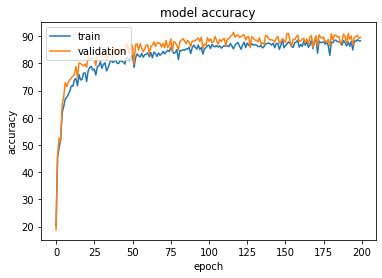

Maximum Train Accuracy : 88.86111450195312
Maximum Validation Accuracy : 91.44444274902344


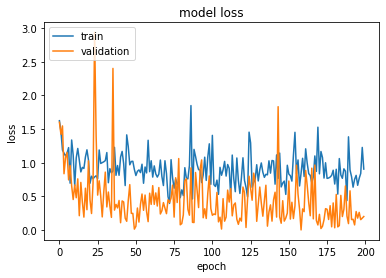

Minimum Train Loss : 0.3937181234359741
Minimum Validation Loss : 1.2993622476642486e-05


In [ ]:
Bacteria_model_amp_Adam_0001 = Bact_Net()
Bacteria_model_amp_Adam_0001.cuda()
trainer_Adam_amp_0001 = trainer(Bacteria_model_amp_Adam_0001, amp_train_loader,"Adam", epoch_size=200, learning_rate=0.001)
trainer_Adam_amp_0001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_amp_0001.history['train_acc'])
plt.plot(trainer_Adam_amp_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_amp_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_amp_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_amp_0001.history['train_loss'])
plt.plot(trainer_Adam_amp_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_amp_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_amp_0001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 20.555555


  0%|          | 1/200 [00:09<33:09, 10.00s/it]

Val Acc | Epoch 1/200 | ACC 17.777779
Train Acc | Epoch 2/200 | ACC 20.555555


  1%|          | 2/200 [00:19<32:53,  9.97s/it]

Val Acc | Epoch 2/200 | ACC 17.777779
Train Acc | Epoch 3/200 | ACC 20.527779


  2%|▏         | 3/200 [00:29<32:47,  9.99s/it]

Val Acc | Epoch 3/200 | ACC 22.888889
Train Acc | Epoch 4/200 | ACC 26.277777


  2%|▏         | 4/200 [00:39<32:39, 10.00s/it]

Val Acc | Epoch 4/200 | ACC 24.666668
Train Acc | Epoch 5/200 | ACC 36.527779


  2%|▎         | 5/200 [00:49<32:20,  9.95s/it]

Val Acc | Epoch 5/200 | ACC 40.222225
Train Acc | Epoch 6/200 | ACC 36.861115


  3%|▎         | 6/200 [00:59<32:13,  9.97s/it]

Val Acc | Epoch 6/200 | ACC 38.666668
Train Acc | Epoch 7/200 | ACC 37.416668


  4%|▎         | 7/200 [01:09<32:04,  9.97s/it]

Val Acc | Epoch 7/200 | ACC 40.333332
Train Acc | Epoch 8/200 | ACC 37.555557


  4%|▍         | 8/200 [01:19<31:59, 10.00s/it]

Val Acc | Epoch 8/200 | ACC 39.444447
Train Acc | Epoch 9/200 | ACC 43.805557


  4%|▍         | 9/200 [01:29<31:49, 10.00s/it]

Val Acc | Epoch 9/200 | ACC 46.111115
Train Acc | Epoch 10/200 | ACC 44.194447


  5%|▌         | 10/200 [01:39<31:46, 10.03s/it]

Val Acc | Epoch 10/200 | ACC 47.000000
Train Acc | Epoch 11/200 | ACC 44.472225


  6%|▌         | 11/200 [01:50<31:39, 10.05s/it]

Val Acc | Epoch 11/200 | ACC 51.222221
Train Acc | Epoch 12/200 | ACC 47.916668


  6%|▌         | 12/200 [02:00<31:34, 10.08s/it]

Val Acc | Epoch 12/200 | ACC 50.333332
Train Acc | Epoch 13/200 | ACC 47.833336


  6%|▋         | 13/200 [02:10<31:11, 10.01s/it]

Val Acc | Epoch 13/200 | ACC 53.000004
Train Acc | Epoch 14/200 | ACC 52.277779


  7%|▋         | 14/200 [02:20<31:01, 10.01s/it]

Val Acc | Epoch 14/200 | ACC 55.666668
Train Acc | Epoch 15/200 | ACC 54.527779


  8%|▊         | 15/200 [02:30<30:47,  9.99s/it]

Val Acc | Epoch 15/200 | ACC 59.777779
Train Acc | Epoch 16/200 | ACC 56.444447


  8%|▊         | 16/200 [02:40<30:38,  9.99s/it]

Val Acc | Epoch 16/200 | ACC 61.888893
Train Acc | Epoch 17/200 | ACC 56.250000


  8%|▊         | 17/200 [02:50<30:30, 10.00s/it]

Val Acc | Epoch 17/200 | ACC 62.111115
Train Acc | Epoch 18/200 | ACC 58.527779


  9%|▉         | 18/200 [03:00<30:45, 10.14s/it]

Val Acc | Epoch 18/200 | ACC 61.555557
Train Acc | Epoch 19/200 | ACC 59.055553


 10%|▉         | 19/200 [03:10<30:35, 10.14s/it]

Val Acc | Epoch 19/200 | ACC 62.111115
Train Acc | Epoch 20/200 | ACC 57.861115


 10%|█         | 20/200 [03:20<30:18, 10.10s/it]

Val Acc | Epoch 20/200 | ACC 63.222225
Train Acc | Epoch 21/200 | ACC 59.972225


 10%|█         | 21/200 [03:30<29:52, 10.01s/it]

Val Acc | Epoch 21/200 | ACC 66.222229
Train Acc | Epoch 22/200 | ACC 61.666668


 11%|█         | 22/200 [03:40<29:37,  9.98s/it]

Val Acc | Epoch 22/200 | ACC 68.222221
Train Acc | Epoch 23/200 | ACC 62.166668


 12%|█▏        | 23/200 [03:50<29:20,  9.95s/it]

Val Acc | Epoch 23/200 | ACC 68.222221
Train Acc | Epoch 24/200 | ACC 60.666668


 12%|█▏        | 24/200 [04:00<29:25, 10.03s/it]

Val Acc | Epoch 24/200 | ACC 64.333336
Train Acc | Epoch 25/200 | ACC 63.777779


 12%|█▎        | 25/200 [04:10<29:15, 10.03s/it]

Val Acc | Epoch 25/200 | ACC 68.555557
Train Acc | Epoch 26/200 | ACC 61.888893


 13%|█▎        | 26/200 [04:20<29:06, 10.04s/it]

Val Acc | Epoch 26/200 | ACC 64.666672
Train Acc | Epoch 27/200 | ACC 63.638889


 14%|█▎        | 27/200 [04:30<28:48,  9.99s/it]

Val Acc | Epoch 27/200 | ACC 69.222221
Train Acc | Epoch 28/200 | ACC 64.833336


 14%|█▍        | 28/200 [04:40<28:38,  9.99s/it]

Val Acc | Epoch 28/200 | ACC 71.111115
Train Acc | Epoch 29/200 | ACC 64.916672


 14%|█▍        | 29/200 [04:50<28:17,  9.93s/it]

Val Acc | Epoch 29/200 | ACC 68.444450
Train Acc | Epoch 30/200 | ACC 61.027779


 15%|█▌        | 30/200 [05:00<28:05,  9.91s/it]

Val Acc | Epoch 30/200 | ACC 63.111115
Train Acc | Epoch 31/200 | ACC 63.750000


 16%|█▌        | 31/200 [05:10<28:03,  9.96s/it]

Val Acc | Epoch 31/200 | ACC 70.333336
Train Acc | Epoch 32/200 | ACC 67.055557


 16%|█▌        | 32/200 [05:20<28:01, 10.01s/it]

Val Acc | Epoch 32/200 | ACC 70.444450
Train Acc | Epoch 33/200 | ACC 61.861111


 16%|█▋        | 33/200 [05:30<27:53, 10.02s/it]

Val Acc | Epoch 33/200 | ACC 68.666664
Train Acc | Epoch 34/200 | ACC 67.611107


 17%|█▋        | 34/200 [05:40<27:33,  9.96s/it]

Val Acc | Epoch 34/200 | ACC 72.000000
Train Acc | Epoch 35/200 | ACC 66.722229


 18%|█▊        | 35/200 [05:50<27:22,  9.96s/it]

Val Acc | Epoch 35/200 | ACC 70.888885
Train Acc | Epoch 36/200 | ACC 66.250000


 18%|█▊        | 36/200 [05:59<27:09,  9.94s/it]

Val Acc | Epoch 36/200 | ACC 71.444443
Train Acc | Epoch 37/200 | ACC 67.722229


 18%|█▊        | 37/200 [06:09<26:57,  9.92s/it]

Val Acc | Epoch 37/200 | ACC 70.555557
Train Acc | Epoch 38/200 | ACC 66.250000


 19%|█▉        | 38/200 [06:19<26:45,  9.91s/it]

Val Acc | Epoch 38/200 | ACC 70.444450
Train Acc | Epoch 39/200 | ACC 68.555557


 20%|█▉        | 39/200 [06:29<26:43,  9.96s/it]

Val Acc | Epoch 39/200 | ACC 72.222229
Train Acc | Epoch 40/200 | ACC 68.416664


 20%|██        | 40/200 [06:39<26:24,  9.90s/it]

Val Acc | Epoch 40/200 | ACC 72.555557
Train Acc | Epoch 41/200 | ACC 65.888885


 20%|██        | 41/200 [06:49<26:18,  9.93s/it]

Val Acc | Epoch 41/200 | ACC 70.888885
Train Acc | Epoch 42/200 | ACC 69.055557


 21%|██        | 42/200 [06:59<26:15,  9.97s/it]

Val Acc | Epoch 42/200 | ACC 73.444443
Train Acc | Epoch 43/200 | ACC 69.194450


 22%|██▏       | 43/200 [07:09<26:05,  9.97s/it]

Val Acc | Epoch 43/200 | ACC 74.000000
Train Acc | Epoch 44/200 | ACC 68.638893


 22%|██▏       | 44/200 [07:19<25:56,  9.98s/it]

Val Acc | Epoch 44/200 | ACC 72.111115
Train Acc | Epoch 45/200 | ACC 66.972229


 22%|██▎       | 45/200 [07:29<25:46,  9.97s/it]

Val Acc | Epoch 45/200 | ACC 70.666672
Train Acc | Epoch 46/200 | ACC 69.750000


 23%|██▎       | 46/200 [07:39<25:36,  9.98s/it]

Val Acc | Epoch 46/200 | ACC 73.888893
Train Acc | Epoch 47/200 | ACC 70.944443


 24%|██▎       | 47/200 [07:49<25:17,  9.92s/it]

Val Acc | Epoch 47/200 | ACC 74.333336
Train Acc | Epoch 48/200 | ACC 70.111115


 24%|██▍       | 48/200 [07:59<25:06,  9.91s/it]

Val Acc | Epoch 48/200 | ACC 73.000000
Train Acc | Epoch 49/200 | ACC 69.972221


 24%|██▍       | 49/200 [08:09<25:11, 10.01s/it]

Val Acc | Epoch 49/200 | ACC 75.111115
Train Acc | Epoch 50/200 | ACC 71.416672


 25%|██▌       | 50/200 [08:19<24:55,  9.97s/it]

Val Acc | Epoch 50/200 | ACC 75.888893
Train Acc | Epoch 51/200 | ACC 71.194443


 26%|██▌       | 51/200 [08:29<24:36,  9.91s/it]

Val Acc | Epoch 51/200 | ACC 73.000000
Train Acc | Epoch 52/200 | ACC 70.861115


 26%|██▌       | 52/200 [08:38<24:22,  9.88s/it]

Val Acc | Epoch 52/200 | ACC 72.666672
Train Acc | Epoch 53/200 | ACC 70.527779


 26%|██▋       | 53/200 [08:48<24:02,  9.82s/it]

Val Acc | Epoch 53/200 | ACC 74.333336
Train Acc | Epoch 54/200 | ACC 70.555557


 27%|██▋       | 54/200 [08:58<23:52,  9.81s/it]

Val Acc | Epoch 54/200 | ACC 75.333336
Train Acc | Epoch 55/200 | ACC 67.944443


 28%|██▊       | 55/200 [09:08<23:45,  9.83s/it]

Val Acc | Epoch 55/200 | ACC 75.111115
Train Acc | Epoch 56/200 | ACC 71.000000


 28%|██▊       | 56/200 [09:18<23:31,  9.81s/it]

Val Acc | Epoch 56/200 | ACC 74.222221
Train Acc | Epoch 57/200 | ACC 71.944443


 28%|██▊       | 57/200 [09:28<23:35,  9.90s/it]

Val Acc | Epoch 57/200 | ACC 76.000000
Train Acc | Epoch 58/200 | ACC 72.222229


 29%|██▉       | 58/200 [09:38<23:29,  9.93s/it]

Val Acc | Epoch 58/200 | ACC 75.555557
Train Acc | Epoch 59/200 | ACC 71.805557


 30%|██▉       | 59/200 [09:48<23:23,  9.95s/it]

Val Acc | Epoch 59/200 | ACC 76.777779
Train Acc | Epoch 60/200 | ACC 70.027779


 30%|███       | 60/200 [09:58<23:18,  9.99s/it]

Val Acc | Epoch 60/200 | ACC 73.333336
Train Acc | Epoch 61/200 | ACC 72.305557


 30%|███       | 61/200 [10:08<23:11, 10.01s/it]

Val Acc | Epoch 61/200 | ACC 77.111115
Train Acc | Epoch 62/200 | ACC 72.833336


 31%|███       | 62/200 [10:17<22:48,  9.92s/it]

Val Acc | Epoch 62/200 | ACC 77.000008
Train Acc | Epoch 63/200 | ACC 71.722221


 32%|███▏      | 63/200 [10:27<22:35,  9.89s/it]

Val Acc | Epoch 63/200 | ACC 73.888893
Train Acc | Epoch 64/200 | ACC 73.333336


 32%|███▏      | 64/200 [10:37<22:26,  9.90s/it]

Val Acc | Epoch 64/200 | ACC 77.222221
Train Acc | Epoch 65/200 | ACC 72.861115


 32%|███▎      | 65/200 [10:47<22:21,  9.93s/it]

Val Acc | Epoch 65/200 | ACC 78.333336
Train Acc | Epoch 66/200 | ACC 71.000000


 33%|███▎      | 66/200 [10:57<22:08,  9.91s/it]

Val Acc | Epoch 66/200 | ACC 75.222221
Train Acc | Epoch 67/200 | ACC 73.333336


 34%|███▎      | 67/200 [11:07<21:56,  9.90s/it]

Val Acc | Epoch 67/200 | ACC 78.888893
Train Acc | Epoch 68/200 | ACC 73.277779


 34%|███▍      | 68/200 [11:17<21:49,  9.92s/it]

Val Acc | Epoch 68/200 | ACC 77.444443
Train Acc | Epoch 69/200 | ACC 71.805557


 34%|███▍      | 69/200 [11:27<21:34,  9.88s/it]

Val Acc | Epoch 69/200 | ACC 75.111115
Train Acc | Epoch 70/200 | ACC 73.361115


 35%|███▌      | 70/200 [11:36<21:16,  9.82s/it]

Val Acc | Epoch 70/200 | ACC 76.666672
Train Acc | Epoch 71/200 | ACC 70.277779


 36%|███▌      | 71/200 [11:46<21:14,  9.88s/it]

Val Acc | Epoch 71/200 | ACC 75.666664
Train Acc | Epoch 72/200 | ACC 72.222229


 36%|███▌      | 72/200 [11:56<21:01,  9.86s/it]

Val Acc | Epoch 72/200 | ACC 76.888885
Train Acc | Epoch 73/200 | ACC 73.916664


 36%|███▋      | 73/200 [12:06<20:47,  9.82s/it]

Val Acc | Epoch 73/200 | ACC 78.111115
Train Acc | Epoch 74/200 | ACC 73.194443


 37%|███▋      | 74/200 [12:16<20:45,  9.88s/it]

Val Acc | Epoch 74/200 | ACC 78.000000
Train Acc | Epoch 75/200 | ACC 73.555557


 38%|███▊      | 75/200 [12:26<20:39,  9.92s/it]

Val Acc | Epoch 75/200 | ACC 79.777779
Train Acc | Epoch 76/200 | ACC 72.833336


 38%|███▊      | 76/200 [12:36<20:27,  9.90s/it]

Val Acc | Epoch 76/200 | ACC 77.555557
Train Acc | Epoch 77/200 | ACC 73.138893


 38%|███▊      | 77/200 [12:46<20:11,  9.85s/it]

Val Acc | Epoch 77/200 | ACC 75.555557
Train Acc | Epoch 78/200 | ACC 74.083336


 39%|███▉      | 78/200 [12:56<20:05,  9.88s/it]

Val Acc | Epoch 78/200 | ACC 79.000000
Train Acc | Epoch 79/200 | ACC 72.527779


 40%|███▉      | 79/200 [13:06<19:59,  9.91s/it]

Val Acc | Epoch 79/200 | ACC 77.555557
Train Acc | Epoch 80/200 | ACC 74.388893


 40%|████      | 80/200 [13:16<20:00, 10.01s/it]

Val Acc | Epoch 80/200 | ACC 78.888893
Train Acc | Epoch 81/200 | ACC 74.944450


 40%|████      | 81/200 [13:26<20:00, 10.09s/it]

Val Acc | Epoch 81/200 | ACC 79.222229
Train Acc | Epoch 82/200 | ACC 74.888893


 41%|████      | 82/200 [13:36<19:45, 10.04s/it]

Val Acc | Epoch 82/200 | ACC 78.666672
Train Acc | Epoch 83/200 | ACC 75.722221


 42%|████▏     | 83/200 [13:46<19:30, 10.01s/it]

Val Acc | Epoch 83/200 | ACC 78.333336
Train Acc | Epoch 84/200 | ACC 75.111115


 42%|████▏     | 84/200 [13:56<19:21, 10.01s/it]

Val Acc | Epoch 84/200 | ACC 79.777779
Train Acc | Epoch 85/200 | ACC 73.944443


 42%|████▎     | 85/200 [14:06<19:07,  9.98s/it]

Val Acc | Epoch 85/200 | ACC 79.222229
Train Acc | Epoch 86/200 | ACC 76.888885


 43%|████▎     | 86/200 [14:16<19:00, 10.01s/it]

Val Acc | Epoch 86/200 | ACC 80.555557
Train Acc | Epoch 87/200 | ACC 75.777779


 44%|████▎     | 87/200 [14:26<18:53, 10.03s/it]

Val Acc | Epoch 87/200 | ACC 80.222229
Train Acc | Epoch 88/200 | ACC 75.083336


 44%|████▍     | 88/200 [14:36<18:45, 10.05s/it]

Val Acc | Epoch 88/200 | ACC 79.333336
Train Acc | Epoch 89/200 | ACC 75.694450


 44%|████▍     | 89/200 [14:46<18:37, 10.07s/it]

Val Acc | Epoch 89/200 | ACC 80.000000
Train Acc | Epoch 90/200 | ACC 77.055557


 45%|████▌     | 90/200 [14:56<18:26, 10.06s/it]

Val Acc | Epoch 90/200 | ACC 79.888893
Train Acc | Epoch 91/200 | ACC 75.555557


 46%|████▌     | 91/200 [15:06<18:20, 10.10s/it]

Val Acc | Epoch 91/200 | ACC 78.777779
Train Acc | Epoch 92/200 | ACC 76.694450


 46%|████▌     | 92/200 [15:16<18:06, 10.06s/it]

Val Acc | Epoch 92/200 | ACC 82.333336
Train Acc | Epoch 93/200 | ACC 76.111115


 46%|████▋     | 93/200 [15:26<17:54, 10.04s/it]

Val Acc | Epoch 93/200 | ACC 80.000000
Train Acc | Epoch 94/200 | ACC 77.861115


 47%|████▋     | 94/200 [15:36<17:42, 10.03s/it]

Val Acc | Epoch 94/200 | ACC 80.000000
Train Acc | Epoch 95/200 | ACC 77.416672


 48%|████▊     | 95/200 [15:46<17:31, 10.01s/it]

Val Acc | Epoch 95/200 | ACC 82.222221
Train Acc | Epoch 96/200 | ACC 78.083336


 48%|████▊     | 96/200 [15:56<17:19, 10.00s/it]

Val Acc | Epoch 96/200 | ACC 82.888885
Train Acc | Epoch 97/200 | ACC 77.861115


 48%|████▊     | 97/200 [16:06<17:05,  9.96s/it]

Val Acc | Epoch 97/200 | ACC 82.666672
Train Acc | Epoch 98/200 | ACC 76.416672


 49%|████▉     | 98/200 [16:16<17:01, 10.02s/it]

Val Acc | Epoch 98/200 | ACC 79.333336
Train Acc | Epoch 99/200 | ACC 78.333336


 50%|████▉     | 99/200 [16:26<16:45,  9.96s/it]

Val Acc | Epoch 99/200 | ACC 83.111115
Train Acc | Epoch 100/200 | ACC 78.611115


 50%|█████     | 100/200 [16:36<16:34,  9.95s/it]

Val Acc | Epoch 100/200 | ACC 80.666664
Train Acc | Epoch 101/200 | ACC 77.666672


 50%|█████     | 101/200 [16:46<16:23,  9.93s/it]

Val Acc | Epoch 101/200 | ACC 83.777779
Train Acc | Epoch 102/200 | ACC 77.083336


 51%|█████     | 102/200 [16:56<16:10,  9.90s/it]

Val Acc | Epoch 102/200 | ACC 80.444450
Train Acc | Epoch 103/200 | ACC 76.583336


 52%|█████▏    | 103/200 [17:06<15:59,  9.89s/it]

Val Acc | Epoch 103/200 | ACC 79.555557
Train Acc | Epoch 104/200 | ACC 78.666672


 52%|█████▏    | 104/200 [17:16<15:54,  9.94s/it]

Val Acc | Epoch 104/200 | ACC 81.111115
Train Acc | Epoch 105/200 | ACC 79.055557


 52%|█████▎    | 105/200 [17:26<15:47,  9.97s/it]

Val Acc | Epoch 105/200 | ACC 82.555557
Train Acc | Epoch 106/200 | ACC 78.277779


 53%|█████▎    | 106/200 [17:36<15:39,  9.99s/it]

Val Acc | Epoch 106/200 | ACC 81.666664
Train Acc | Epoch 107/200 | ACC 78.638893


 54%|█████▎    | 107/200 [17:46<15:32, 10.03s/it]

Val Acc | Epoch 107/200 | ACC 83.555557
Train Acc | Epoch 108/200 | ACC 76.833336


 54%|█████▍    | 108/200 [17:56<15:17,  9.97s/it]

Val Acc | Epoch 108/200 | ACC 78.666672
Train Acc | Epoch 109/200 | ACC 79.611115


 55%|█████▍    | 109/200 [18:06<15:07,  9.97s/it]

Val Acc | Epoch 109/200 | ACC 82.555557
Train Acc | Epoch 110/200 | ACC 77.805557


 55%|█████▌    | 110/200 [18:16<14:53,  9.93s/it]

Val Acc | Epoch 110/200 | ACC 84.777779
Train Acc | Epoch 111/200 | ACC 78.444443


 56%|█████▌    | 111/200 [18:26<14:54, 10.05s/it]

Val Acc | Epoch 111/200 | ACC 83.888885
Train Acc | Epoch 112/200 | ACC 78.250000


 56%|█████▌    | 112/200 [18:36<14:48, 10.10s/it]

Val Acc | Epoch 112/200 | ACC 81.444450
Train Acc | Epoch 113/200 | ACC 79.944443


 56%|█████▋    | 113/200 [18:46<14:40, 10.12s/it]

Val Acc | Epoch 113/200 | ACC 82.777779
Train Acc | Epoch 114/200 | ACC 78.666672


 57%|█████▋    | 114/200 [18:56<14:22, 10.03s/it]

Val Acc | Epoch 114/200 | ACC 82.111115
Train Acc | Epoch 115/200 | ACC 78.166672


 57%|█████▊    | 115/200 [19:06<14:14, 10.05s/it]

Val Acc | Epoch 115/200 | ACC 83.555557
Train Acc | Epoch 116/200 | ACC 78.138885


 58%|█████▊    | 116/200 [19:16<14:03, 10.04s/it]

Val Acc | Epoch 116/200 | ACC 83.333336
Train Acc | Epoch 117/200 | ACC 79.861107


 58%|█████▊    | 117/200 [19:26<13:47,  9.98s/it]

Val Acc | Epoch 117/200 | ACC 82.222221
Train Acc | Epoch 118/200 | ACC 78.944443


 59%|█████▉    | 118/200 [19:36<13:39,  9.99s/it]

Val Acc | Epoch 118/200 | ACC 83.666672
Train Acc | Epoch 119/200 | ACC 79.388893


 60%|█████▉    | 119/200 [19:46<13:26,  9.96s/it]

Val Acc | Epoch 119/200 | ACC 84.222221
Train Acc | Epoch 120/200 | ACC 80.861115


 60%|██████    | 120/200 [19:56<13:20, 10.01s/it]

Val Acc | Epoch 120/200 | ACC 82.888885
Train Acc | Epoch 121/200 | ACC 80.111107


 60%|██████    | 121/200 [20:06<13:08,  9.97s/it]

Val Acc | Epoch 121/200 | ACC 83.777779
Train Acc | Epoch 122/200 | ACC 79.861107


 61%|██████    | 122/200 [20:16<13:02, 10.03s/it]

Val Acc | Epoch 122/200 | ACC 83.888885
Train Acc | Epoch 123/200 | ACC 79.388893


 62%|██████▏   | 123/200 [20:26<12:59, 10.12s/it]

Val Acc | Epoch 123/200 | ACC 83.444443
Train Acc | Epoch 124/200 | ACC 80.527786


 62%|██████▏   | 124/200 [20:36<12:45, 10.07s/it]

Val Acc | Epoch 124/200 | ACC 85.111115
Train Acc | Epoch 125/200 | ACC 80.638893


 62%|██████▎   | 125/200 [20:46<12:30, 10.00s/it]

Val Acc | Epoch 125/200 | ACC 86.222229
Train Acc | Epoch 126/200 | ACC 81.138893


 63%|██████▎   | 126/200 [20:56<12:21, 10.02s/it]

Val Acc | Epoch 126/200 | ACC 85.888893
Train Acc | Epoch 127/200 | ACC 80.805557


 64%|██████▎   | 127/200 [21:06<12:08,  9.98s/it]

Val Acc | Epoch 127/200 | ACC 85.000000
Train Acc | Epoch 128/200 | ACC 80.638893


 64%|██████▍   | 128/200 [21:16<12:01, 10.02s/it]

Val Acc | Epoch 128/200 | ACC 85.111115
Train Acc | Epoch 129/200 | ACC 81.222221


 64%|██████▍   | 129/200 [21:26<11:52, 10.04s/it]

Val Acc | Epoch 129/200 | ACC 84.333336
Train Acc | Epoch 130/200 | ACC 81.083336


 65%|██████▌   | 130/200 [21:37<11:45, 10.07s/it]

Val Acc | Epoch 130/200 | ACC 84.666672
Train Acc | Epoch 131/200 | ACC 79.972229


 66%|██████▌   | 131/200 [21:46<11:32, 10.03s/it]

Val Acc | Epoch 131/200 | ACC 83.777779
Train Acc | Epoch 132/200 | ACC 80.555557


 66%|██████▌   | 132/200 [21:57<11:21, 10.03s/it]

Val Acc | Epoch 132/200 | ACC 83.888885
Train Acc | Epoch 133/200 | ACC 82.944450


 66%|██████▋   | 133/200 [22:07<11:13, 10.05s/it]

Val Acc | Epoch 133/200 | ACC 86.333336
Train Acc | Epoch 134/200 | ACC 81.972221


 67%|██████▋   | 134/200 [22:17<11:01, 10.02s/it]

Val Acc | Epoch 134/200 | ACC 85.777779
Train Acc | Epoch 135/200 | ACC 81.444450


 68%|██████▊   | 135/200 [22:27<10:52, 10.04s/it]

Val Acc | Epoch 135/200 | ACC 84.555557
Train Acc | Epoch 136/200 | ACC 81.750000


 68%|██████▊   | 136/200 [22:37<10:44, 10.07s/it]

Val Acc | Epoch 136/200 | ACC 86.222229
Train Acc | Epoch 137/200 | ACC 80.250000


 68%|██████▊   | 137/200 [22:47<10:29, 10.00s/it]

Val Acc | Epoch 137/200 | ACC 85.333336
Train Acc | Epoch 138/200 | ACC 78.138885


 69%|██████▉   | 138/200 [22:57<10:23, 10.06s/it]

Val Acc | Epoch 138/200 | ACC 83.555557
Train Acc | Epoch 139/200 | ACC 80.000000


 70%|██████▉   | 139/200 [23:07<10:17, 10.12s/it]

Val Acc | Epoch 139/200 | ACC 84.777779
Train Acc | Epoch 140/200 | ACC 81.861115


 70%|███████   | 140/200 [23:17<10:05, 10.09s/it]

Val Acc | Epoch 140/200 | ACC 84.888893
Train Acc | Epoch 141/200 | ACC 82.055557


 70%|███████   | 141/200 [23:27<09:52, 10.05s/it]

Val Acc | Epoch 141/200 | ACC 84.888893
Train Acc | Epoch 142/200 | ACC 80.166664


 71%|███████   | 142/200 [23:38<09:57, 10.31s/it]

Val Acc | Epoch 142/200 | ACC 84.333336
Train Acc | Epoch 143/200 | ACC 81.583336


 72%|███████▏  | 143/200 [23:48<09:46, 10.30s/it]

Val Acc | Epoch 143/200 | ACC 86.555557
Train Acc | Epoch 144/200 | ACC 81.000000


 72%|███████▏  | 144/200 [23:58<09:30, 10.19s/it]

Val Acc | Epoch 144/200 | ACC 85.666672
Train Acc | Epoch 145/200 | ACC 82.444450


 72%|███████▎  | 145/200 [24:08<09:17, 10.14s/it]

Val Acc | Epoch 145/200 | ACC 86.111107
Train Acc | Epoch 146/200 | ACC 82.055557


 73%|███████▎  | 146/200 [24:18<09:06, 10.12s/it]

Val Acc | Epoch 146/200 | ACC 87.222221
Train Acc | Epoch 147/200 | ACC 81.000000


 74%|███████▎  | 147/200 [24:28<08:55, 10.10s/it]

Val Acc | Epoch 147/200 | ACC 86.666664
Train Acc | Epoch 148/200 | ACC 82.083336


 74%|███████▍  | 148/200 [24:38<08:44, 10.09s/it]

Val Acc | Epoch 148/200 | ACC 86.444450
Train Acc | Epoch 149/200 | ACC 82.027779


 74%|███████▍  | 149/200 [24:48<08:33, 10.07s/it]

Val Acc | Epoch 149/200 | ACC 85.666672
Train Acc | Epoch 150/200 | ACC 82.305557


 75%|███████▌  | 150/200 [24:59<08:23, 10.07s/it]

Val Acc | Epoch 150/200 | ACC 85.777779
Train Acc | Epoch 151/200 | ACC 81.055557


 76%|███████▌  | 151/200 [25:09<08:12, 10.06s/it]

Val Acc | Epoch 151/200 | ACC 85.555557
Train Acc | Epoch 152/200 | ACC 82.527779


 76%|███████▌  | 152/200 [25:19<08:04, 10.10s/it]

Val Acc | Epoch 152/200 | ACC 86.111107
Train Acc | Epoch 153/200 | ACC 81.555557


 76%|███████▋  | 153/200 [25:29<07:55, 10.12s/it]

Val Acc | Epoch 153/200 | ACC 85.777779
Train Acc | Epoch 154/200 | ACC 82.750008


 77%|███████▋  | 154/200 [25:39<07:47, 10.17s/it]

Val Acc | Epoch 154/200 | ACC 87.333336
Train Acc | Epoch 155/200 | ACC 83.111115


 78%|███████▊  | 155/200 [25:49<07:36, 10.13s/it]

Val Acc | Epoch 155/200 | ACC 87.222221
Train Acc | Epoch 156/200 | ACC 81.222221


 78%|███████▊  | 156/200 [25:59<07:27, 10.17s/it]

Val Acc | Epoch 156/200 | ACC 85.666672
Train Acc | Epoch 157/200 | ACC 82.611115


 78%|███████▊  | 157/200 [26:10<07:15, 10.14s/it]

Val Acc | Epoch 157/200 | ACC 86.000000
Train Acc | Epoch 158/200 | ACC 82.527779


 79%|███████▉  | 158/200 [26:20<07:05, 10.13s/it]

Val Acc | Epoch 158/200 | ACC 86.444450
Train Acc | Epoch 159/200 | ACC 82.916672


 80%|███████▉  | 159/200 [26:30<06:55, 10.13s/it]

Val Acc | Epoch 159/200 | ACC 87.222221
Train Acc | Epoch 160/200 | ACC 82.138893


 80%|████████  | 160/200 [26:40<06:45, 10.15s/it]

Val Acc | Epoch 160/200 | ACC 87.111115
Train Acc | Epoch 161/200 | ACC 82.527779


 80%|████████  | 161/200 [26:50<06:34, 10.13s/it]

Val Acc | Epoch 161/200 | ACC 85.888893
Train Acc | Epoch 162/200 | ACC 82.555557


 81%|████████  | 162/200 [27:00<06:23, 10.08s/it]

Val Acc | Epoch 162/200 | ACC 86.666664
Train Acc | Epoch 163/200 | ACC 81.472221


 82%|████████▏ | 163/200 [27:10<06:12, 10.08s/it]

Val Acc | Epoch 163/200 | ACC 85.111115
Train Acc | Epoch 164/200 | ACC 82.638893


 82%|████████▏ | 164/200 [27:20<06:04, 10.12s/it]

Val Acc | Epoch 164/200 | ACC 86.111107
Train Acc | Epoch 165/200 | ACC 81.888893


 82%|████████▎ | 165/200 [27:30<05:53, 10.10s/it]

Val Acc | Epoch 165/200 | ACC 86.222229
Train Acc | Epoch 166/200 | ACC 83.472221


 83%|████████▎ | 166/200 [27:40<05:43, 10.10s/it]

Val Acc | Epoch 166/200 | ACC 86.444450
Train Acc | Epoch 167/200 | ACC 82.972221


 84%|████████▎ | 167/200 [27:51<05:32, 10.09s/it]

Val Acc | Epoch 167/200 | ACC 86.333336
Train Acc | Epoch 168/200 | ACC 82.083336


 84%|████████▍ | 168/200 [28:01<05:21, 10.06s/it]

Val Acc | Epoch 168/200 | ACC 85.222229
Train Acc | Epoch 169/200 | ACC 82.972221


 84%|████████▍ | 169/200 [28:10<05:10, 10.03s/it]

Val Acc | Epoch 169/200 | ACC 87.000000
Train Acc | Epoch 170/200 | ACC 83.194443


 85%|████████▌ | 170/200 [28:21<05:01, 10.05s/it]

Val Acc | Epoch 170/200 | ACC 86.444450
Train Acc | Epoch 171/200 | ACC 82.638893


 86%|████████▌ | 171/200 [28:31<04:52, 10.08s/it]

Val Acc | Epoch 171/200 | ACC 86.222229
Train Acc | Epoch 172/200 | ACC 83.388885


 86%|████████▌ | 172/200 [28:41<04:40, 10.02s/it]

Val Acc | Epoch 172/200 | ACC 87.111115
Train Acc | Epoch 173/200 | ACC 83.500000


 86%|████████▋ | 173/200 [28:51<04:35, 10.21s/it]

Val Acc | Epoch 173/200 | ACC 87.555557
Train Acc | Epoch 174/200 | ACC 82.694450


 87%|████████▋ | 174/200 [29:01<04:24, 10.17s/it]

Val Acc | Epoch 174/200 | ACC 86.222229
Train Acc | Epoch 175/200 | ACC 82.583336


 88%|████████▊ | 175/200 [29:11<04:12, 10.11s/it]

Val Acc | Epoch 175/200 | ACC 86.444450
Train Acc | Epoch 176/200 | ACC 82.694450


 88%|████████▊ | 176/200 [29:21<04:01, 10.05s/it]

Val Acc | Epoch 176/200 | ACC 87.000000
Train Acc | Epoch 177/200 | ACC 82.833336


 88%|████████▊ | 177/200 [29:31<03:50, 10.04s/it]

Val Acc | Epoch 177/200 | ACC 86.333336
Train Acc | Epoch 178/200 | ACC 84.722229


 89%|████████▉ | 178/200 [29:41<03:42, 10.10s/it]

Val Acc | Epoch 178/200 | ACC 89.444443
Train Acc | Epoch 179/200 | ACC 83.055557


 90%|████████▉ | 179/200 [29:52<03:31, 10.08s/it]

Val Acc | Epoch 179/200 | ACC 86.333336
Train Acc | Epoch 180/200 | ACC 82.472221


 90%|█████████ | 180/200 [30:01<03:20, 10.03s/it]

Val Acc | Epoch 180/200 | ACC 86.777786
Train Acc | Epoch 181/200 | ACC 83.305557


 90%|█████████ | 181/200 [30:11<03:10, 10.04s/it]

Val Acc | Epoch 181/200 | ACC 87.333336
Train Acc | Epoch 182/200 | ACC 82.750008


 91%|█████████ | 182/200 [30:22<03:00, 10.03s/it]

Val Acc | Epoch 182/200 | ACC 86.444450
Train Acc | Epoch 183/200 | ACC 84.166672


 92%|█████████▏| 183/200 [30:31<02:50, 10.00s/it]

Val Acc | Epoch 183/200 | ACC 87.888893
Train Acc | Epoch 184/200 | ACC 81.250000


 92%|█████████▏| 184/200 [30:41<02:39,  9.99s/it]

Val Acc | Epoch 184/200 | ACC 86.222229
Train Acc | Epoch 185/200 | ACC 83.083336


 92%|█████████▎| 185/200 [30:52<02:31, 10.07s/it]

Val Acc | Epoch 185/200 | ACC 88.000000
Train Acc | Epoch 186/200 | ACC 83.083336


 93%|█████████▎| 186/200 [31:02<02:21, 10.10s/it]

Val Acc | Epoch 186/200 | ACC 87.555557
Train Acc | Epoch 187/200 | ACC 82.277779


 94%|█████████▎| 187/200 [31:12<02:11, 10.15s/it]

Val Acc | Epoch 187/200 | ACC 83.777779
Train Acc | Epoch 188/200 | ACC 84.000000


 94%|█████████▍| 188/200 [31:22<02:01, 10.12s/it]

Val Acc | Epoch 188/200 | ACC 87.000000
Train Acc | Epoch 189/200 | ACC 83.472221


 94%|█████████▍| 189/200 [31:32<01:51, 10.13s/it]

Val Acc | Epoch 189/200 | ACC 87.555557
Train Acc | Epoch 190/200 | ACC 84.361115


 95%|█████████▌| 190/200 [31:42<01:41, 10.14s/it]

Val Acc | Epoch 190/200 | ACC 87.444450
Train Acc | Epoch 191/200 | ACC 82.805557


 96%|█████████▌| 191/200 [31:52<01:30, 10.11s/it]

Val Acc | Epoch 191/200 | ACC 85.888893
Train Acc | Epoch 192/200 | ACC 83.638885


 96%|█████████▌| 192/200 [32:02<01:20, 10.07s/it]

Val Acc | Epoch 192/200 | ACC 87.777779
Train Acc | Epoch 193/200 | ACC 83.000008


 96%|█████████▋| 193/200 [32:13<01:10, 10.06s/it]

Val Acc | Epoch 193/200 | ACC 87.333336
Train Acc | Epoch 194/200 | ACC 82.722221


 97%|█████████▋| 194/200 [32:23<01:00, 10.09s/it]

Val Acc | Epoch 194/200 | ACC 85.222229
Train Acc | Epoch 195/200 | ACC 83.194443


 98%|█████████▊| 195/200 [32:33<00:50, 10.13s/it]

Val Acc | Epoch 195/200 | ACC 88.777779
Train Acc | Epoch 196/200 | ACC 83.555557


 98%|█████████▊| 196/200 [32:43<00:40, 10.11s/it]

Val Acc | Epoch 196/200 | ACC 87.333336
Train Acc | Epoch 197/200 | ACC 84.611115


 98%|█████████▊| 197/200 [32:53<00:30, 10.12s/it]

Val Acc | Epoch 197/200 | ACC 88.000000
Train Acc | Epoch 198/200 | ACC 83.361115


 99%|█████████▉| 198/200 [33:03<00:20, 10.10s/it]

Val Acc | Epoch 198/200 | ACC 87.333336
Train Acc | Epoch 199/200 | ACC 83.027779


100%|█████████▉| 199/200 [33:13<00:10, 10.09s/it]

Val Acc | Epoch 199/200 | ACC 86.222229
Train Acc | Epoch 200/200 | ACC 84.027779


100%|██████████| 200/200 [33:23<00:00, 10.02s/it]

Val Acc | Epoch 200/200 | ACC 88.222221


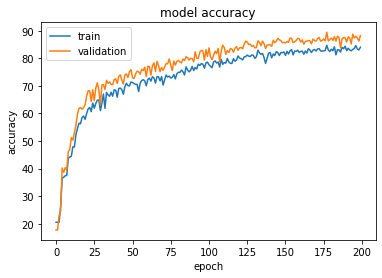

Maximum Train Accuracy : 84.72222900390625
Maximum Validation Accuracy : 89.44444274902344


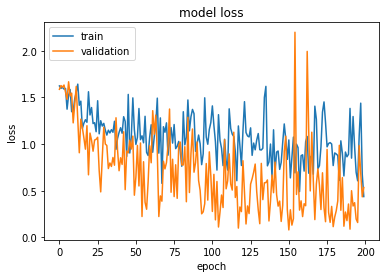

Minimum Train Loss : 0.43836459517478943
Minimum Validation Loss : 0.08121372759342194


In [ ]:
Bacteria_model_amp_Adam_00001 = Bact_Net()
Bacteria_model_amp_Adam_00001.cuda()
trainer_Adam_amp_00001 = trainer(Bacteria_model_amp_Adam_00001, amp_train_loader,"Adam", epoch_size=200, learning_rate=0.0001)
trainer_Adam_amp_00001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_amp_00001.history['train_acc'])
plt.plot(trainer_Adam_amp_00001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_amp_00001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_amp_00001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_amp_00001.history['train_loss'])
plt.plot(trainer_Adam_amp_00001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_amp_00001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_amp_00001.history['val_loss'])}")

# RMSprop_0.001_400epoch

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 25.416666


  0%|          | 1/400 [24:01<159:45:24, 1441.41s/it]

Val Acc | Epoch 1/400 | ACC 25.555557
Train Acc | Epoch 2/400 | ACC 32.250004


  0%|          | 2/400 [24:11<66:17:12, 599.58s/it]  

Val Acc | Epoch 2/400 | ACC 33.666668
Train Acc | Epoch 3/400 | ACC 49.777779


  1%|          | 3/400 [24:22<36:28:45, 330.80s/it]

Val Acc | Epoch 3/400 | ACC 49.000000
Train Acc | Epoch 4/400 | ACC 63.972221


  1%|          | 4/400 [24:32<22:28:03, 204.25s/it]

Val Acc | Epoch 4/400 | ACC 65.333336
Train Acc | Epoch 5/400 | ACC 69.000000


  1%|▏         | 5/400 [24:42<14:43:41, 134.23s/it]

Val Acc | Epoch 5/400 | ACC 66.555557
Train Acc | Epoch 6/400 | ACC 70.944443


  2%|▏         | 6/400 [24:53<10:04:19, 92.03s/it] 

Val Acc | Epoch 6/400 | ACC 69.555557
Train Acc | Epoch 7/400 | ACC 69.305557


  2%|▏         | 7/400 [25:03<7:07:33, 65.28s/it] 

Val Acc | Epoch 7/400 | ACC 69.222221
Train Acc | Epoch 8/400 | ACC 74.000000


  2%|▏         | 8/400 [25:13<5:11:56, 47.75s/it]

Val Acc | Epoch 8/400 | ACC 73.888893
Train Acc | Epoch 9/400 | ACC 76.527779


  2%|▏         | 9/400 [25:23<3:54:13, 35.94s/it]

Val Acc | Epoch 9/400 | ACC 74.444450
Train Acc | Epoch 10/400 | ACC 72.027779


  2%|▎         | 10/400 [25:33<3:01:29, 27.92s/it]

Val Acc | Epoch 10/400 | ACC 70.222221
Train Acc | Epoch 11/400 | ACC 76.861115


  3%|▎         | 11/400 [25:43<2:25:35, 22.46s/it]

Val Acc | Epoch 11/400 | ACC 75.333336
Train Acc | Epoch 12/400 | ACC 72.638893


  3%|▎         | 12/400 [25:53<2:00:46, 18.68s/it]

Val Acc | Epoch 12/400 | ACC 69.555557
Train Acc | Epoch 13/400 | ACC 65.611115


  3%|▎         | 13/400 [26:03<1:43:07, 15.99s/it]

Val Acc | Epoch 13/400 | ACC 64.888885
Train Acc | Epoch 14/400 | ACC 79.250000


  4%|▎         | 14/400 [26:13<1:31:13, 14.18s/it]

Val Acc | Epoch 14/400 | ACC 78.222229
Train Acc | Epoch 15/400 | ACC 72.194443


  4%|▍         | 15/400 [26:23<1:22:54, 12.92s/it]

Val Acc | Epoch 15/400 | ACC 71.333336
Train Acc | Epoch 16/400 | ACC 80.000000


  4%|▍         | 16/400 [26:33<1:17:09, 12.05s/it]

Val Acc | Epoch 16/400 | ACC 80.222229
Train Acc | Epoch 17/400 | ACC 82.444450


  4%|▍         | 17/400 [26:43<1:13:09, 11.46s/it]

Val Acc | Epoch 17/400 | ACC 80.666664
Train Acc | Epoch 18/400 | ACC 79.416672


  4%|▍         | 18/400 [26:53<1:10:01, 11.00s/it]

Val Acc | Epoch 18/400 | ACC 78.111115
Train Acc | Epoch 19/400 | ACC 77.388885


  5%|▍         | 19/400 [27:03<1:07:22, 10.61s/it]

Val Acc | Epoch 19/400 | ACC 73.444443
Train Acc | Epoch 20/400 | ACC 79.611115


  5%|▌         | 20/400 [27:13<1:06:04, 10.43s/it]

Val Acc | Epoch 20/400 | ACC 76.111115
Train Acc | Epoch 21/400 | ACC 82.333336


  5%|▌         | 21/400 [27:23<1:04:57, 10.28s/it]

Val Acc | Epoch 21/400 | ACC 79.888893
Train Acc | Epoch 22/400 | ACC 82.194450


  6%|▌         | 22/400 [27:33<1:04:22, 10.22s/it]

Val Acc | Epoch 22/400 | ACC 80.888893
Train Acc | Epoch 23/400 | ACC 66.583336


  6%|▌         | 23/400 [27:43<1:04:04, 10.20s/it]

Val Acc | Epoch 23/400 | ACC 65.666672
Train Acc | Epoch 24/400 | ACC 82.916672


  6%|▌         | 24/400 [27:53<1:03:13, 10.09s/it]

Val Acc | Epoch 24/400 | ACC 81.666664
Train Acc | Epoch 25/400 | ACC 82.166664


  6%|▋         | 25/400 [28:03<1:02:58, 10.08s/it]

Val Acc | Epoch 25/400 | ACC 81.444450
Train Acc | Epoch 26/400 | ACC 83.833336


  6%|▋         | 26/400 [28:13<1:02:25, 10.01s/it]

Val Acc | Epoch 26/400 | ACC 82.444450
Train Acc | Epoch 27/400 | ACC 84.888893


  7%|▋         | 27/400 [28:22<1:02:09, 10.00s/it]

Val Acc | Epoch 27/400 | ACC 82.555557
Train Acc | Epoch 28/400 | ACC 82.583336


  7%|▋         | 28/400 [28:32<1:01:54,  9.99s/it]

Val Acc | Epoch 28/400 | ACC 80.000000
Train Acc | Epoch 29/400 | ACC 82.638893


  7%|▋         | 29/400 [28:43<1:02:06, 10.04s/it]

Val Acc | Epoch 29/400 | ACC 81.333336
Train Acc | Epoch 30/400 | ACC 83.666672


  8%|▊         | 30/400 [28:53<1:01:57, 10.05s/it]

Val Acc | Epoch 30/400 | ACC 81.666664
Train Acc | Epoch 31/400 | ACC 82.972221


  8%|▊         | 31/400 [29:03<1:01:48, 10.05s/it]

Val Acc | Epoch 31/400 | ACC 81.777779
Train Acc | Epoch 32/400 | ACC 84.444443


  8%|▊         | 32/400 [29:13<1:02:14, 10.15s/it]

Val Acc | Epoch 32/400 | ACC 81.777779
Train Acc | Epoch 33/400 | ACC 84.222221


  8%|▊         | 33/400 [29:23<1:02:19, 10.19s/it]

Val Acc | Epoch 33/400 | ACC 83.000008
Train Acc | Epoch 34/400 | ACC 84.500000


  8%|▊         | 34/400 [29:34<1:03:15, 10.37s/it]

Val Acc | Epoch 34/400 | ACC 84.333336
Train Acc | Epoch 35/400 | ACC 85.861115


  9%|▉         | 35/400 [29:44<1:02:45, 10.32s/it]

Val Acc | Epoch 35/400 | ACC 85.000000
Train Acc | Epoch 36/400 | ACC 84.722229


  9%|▉         | 36/400 [29:55<1:02:37, 10.32s/it]

Val Acc | Epoch 36/400 | ACC 83.000008
Train Acc | Epoch 37/400 | ACC 84.166672


  9%|▉         | 37/400 [30:05<1:02:03, 10.26s/it]

Val Acc | Epoch 37/400 | ACC 83.333336
Train Acc | Epoch 38/400 | ACC 82.666672


 10%|▉         | 38/400 [30:15<1:01:30, 10.19s/it]

Val Acc | Epoch 38/400 | ACC 82.111115
Train Acc | Epoch 39/400 | ACC 85.972229


 10%|▉         | 39/400 [30:25<1:01:07, 10.16s/it]

Val Acc | Epoch 39/400 | ACC 86.000000
Train Acc | Epoch 40/400 | ACC 85.194443


 10%|█         | 40/400 [30:35<1:00:29, 10.08s/it]

Val Acc | Epoch 40/400 | ACC 84.888893
Train Acc | Epoch 41/400 | ACC 83.222221


 10%|█         | 41/400 [30:45<1:00:20, 10.08s/it]

Val Acc | Epoch 41/400 | ACC 83.333336
Train Acc | Epoch 42/400 | ACC 86.555557


 10%|█         | 42/400 [30:55<59:57, 10.05s/it]  

Val Acc | Epoch 42/400 | ACC 87.111115
Train Acc | Epoch 43/400 | ACC 86.250000


 11%|█         | 43/400 [31:05<59:42, 10.04s/it]

Val Acc | Epoch 43/400 | ACC 85.444443
Train Acc | Epoch 44/400 | ACC 83.083336


 11%|█         | 44/400 [31:15<59:13,  9.98s/it]

Val Acc | Epoch 44/400 | ACC 83.333336
Train Acc | Epoch 45/400 | ACC 84.222221


 11%|█▏        | 45/400 [31:25<58:59,  9.97s/it]

Val Acc | Epoch 45/400 | ACC 84.333336
Train Acc | Epoch 46/400 | ACC 86.111107


 12%|█▏        | 46/400 [31:35<58:56,  9.99s/it]

Val Acc | Epoch 46/400 | ACC 85.333336
Train Acc | Epoch 47/400 | ACC 67.638893


 12%|█▏        | 47/400 [31:45<58:44,  9.99s/it]

Val Acc | Epoch 47/400 | ACC 68.000000
Train Acc | Epoch 48/400 | ACC 86.166672


 12%|█▏        | 48/400 [31:55<58:38,  9.99s/it]

Val Acc | Epoch 48/400 | ACC 85.111115
Train Acc | Epoch 49/400 | ACC 83.583336


 12%|█▏        | 49/400 [32:05<58:29, 10.00s/it]

Val Acc | Epoch 49/400 | ACC 81.888893
Train Acc | Epoch 50/400 | ACC 86.861115


 12%|█▎        | 50/400 [32:15<58:02,  9.95s/it]

Val Acc | Epoch 50/400 | ACC 88.111115
Train Acc | Epoch 51/400 | ACC 84.500000


 13%|█▎        | 51/400 [32:24<57:42,  9.92s/it]

Val Acc | Epoch 51/400 | ACC 81.666664
Train Acc | Epoch 52/400 | ACC 84.944443


 13%|█▎        | 52/400 [32:34<57:36,  9.93s/it]

Val Acc | Epoch 52/400 | ACC 84.333336
Train Acc | Epoch 53/400 | ACC 82.805557


 13%|█▎        | 53/400 [32:45<57:44,  9.99s/it]

Val Acc | Epoch 53/400 | ACC 82.000000
Train Acc | Epoch 54/400 | ACC 85.805557


 14%|█▎        | 54/400 [32:54<57:20,  9.94s/it]

Val Acc | Epoch 54/400 | ACC 84.888893
Train Acc | Epoch 55/400 | ACC 86.222229


 14%|█▍        | 55/400 [33:04<57:10,  9.94s/it]

Val Acc | Epoch 55/400 | ACC 84.444443
Train Acc | Epoch 56/400 | ACC 86.611115


 14%|█▍        | 56/400 [33:14<57:24, 10.01s/it]

Val Acc | Epoch 56/400 | ACC 86.555557
Train Acc | Epoch 57/400 | ACC 86.722221


 14%|█▍        | 57/400 [33:24<56:51,  9.95s/it]

Val Acc | Epoch 57/400 | ACC 84.555557
Train Acc | Epoch 58/400 | ACC 87.472221


 14%|█▍        | 58/400 [33:34<56:47,  9.96s/it]

Val Acc | Epoch 58/400 | ACC 87.111115
Train Acc | Epoch 59/400 | ACC 88.361115


 15%|█▍        | 59/400 [33:44<56:33,  9.95s/it]

Val Acc | Epoch 59/400 | ACC 87.222221
Train Acc | Epoch 60/400 | ACC 85.111115


 15%|█▌        | 60/400 [33:54<56:34,  9.98s/it]

Val Acc | Epoch 60/400 | ACC 85.000000
Train Acc | Epoch 61/400 | ACC 87.444450


 15%|█▌        | 61/400 [34:04<56:16,  9.96s/it]

Val Acc | Epoch 61/400 | ACC 85.444443
Train Acc | Epoch 62/400 | ACC 87.027779


 16%|█▌        | 62/400 [34:14<56:09,  9.97s/it]

Val Acc | Epoch 62/400 | ACC 85.666672
Train Acc | Epoch 63/400 | ACC 87.777779


 16%|█▌        | 63/400 [34:24<55:49,  9.94s/it]

Val Acc | Epoch 63/400 | ACC 86.777786
Train Acc | Epoch 64/400 | ACC 88.694450


 16%|█▌        | 64/400 [34:34<55:52,  9.98s/it]

Val Acc | Epoch 64/400 | ACC 86.888893
Train Acc | Epoch 65/400 | ACC 85.777779


 16%|█▋        | 65/400 [34:45<57:05, 10.23s/it]

Val Acc | Epoch 65/400 | ACC 84.777779
Train Acc | Epoch 66/400 | ACC 85.361115


 16%|█▋        | 66/400 [34:55<56:47, 10.20s/it]

Val Acc | Epoch 66/400 | ACC 84.666672
Train Acc | Epoch 67/400 | ACC 88.500008


 17%|█▋        | 67/400 [35:05<56:14, 10.13s/it]

Val Acc | Epoch 67/400 | ACC 86.111107
Train Acc | Epoch 68/400 | ACC 88.472221


 17%|█▋        | 68/400 [35:15<55:40, 10.06s/it]

Val Acc | Epoch 68/400 | ACC 88.000000
Train Acc | Epoch 69/400 | ACC 87.277779


 17%|█▋        | 69/400 [35:25<55:45, 10.11s/it]

Val Acc | Epoch 69/400 | ACC 85.111115
Train Acc | Epoch 70/400 | ACC 87.888893


 18%|█▊        | 70/400 [35:35<55:28, 10.09s/it]

Val Acc | Epoch 70/400 | ACC 87.555557
Train Acc | Epoch 71/400 | ACC 88.166664


 18%|█▊        | 71/400 [35:45<55:23, 10.10s/it]

Val Acc | Epoch 71/400 | ACC 87.111115
Train Acc | Epoch 72/400 | ACC 85.555557


 18%|█▊        | 72/400 [35:55<54:41, 10.00s/it]

Val Acc | Epoch 72/400 | ACC 85.555557
Train Acc | Epoch 73/400 | ACC 82.138893


 18%|█▊        | 73/400 [36:05<54:18,  9.96s/it]

Val Acc | Epoch 73/400 | ACC 81.888893
Train Acc | Epoch 74/400 | ACC 78.138885


 18%|█▊        | 74/400 [36:15<53:56,  9.93s/it]

Val Acc | Epoch 74/400 | ACC 75.222221
Train Acc | Epoch 75/400 | ACC 84.277779


 19%|█▉        | 75/400 [36:25<53:30,  9.88s/it]

Val Acc | Epoch 75/400 | ACC 84.333336
Train Acc | Epoch 76/400 | ACC 88.416672


 19%|█▉        | 76/400 [36:35<53:34,  9.92s/it]

Val Acc | Epoch 76/400 | ACC 86.555557
Train Acc | Epoch 77/400 | ACC 88.916672


 19%|█▉        | 77/400 [36:44<53:10,  9.88s/it]

Val Acc | Epoch 77/400 | ACC 88.000000
Train Acc | Epoch 78/400 | ACC 88.055557


 20%|█▉        | 78/400 [36:54<53:12,  9.91s/it]

Val Acc | Epoch 78/400 | ACC 87.222221
Train Acc | Epoch 79/400 | ACC 87.833336


 20%|█▉        | 79/400 [37:04<52:59,  9.90s/it]

Val Acc | Epoch 79/400 | ACC 85.444443
Train Acc | Epoch 80/400 | ACC 84.638893


 20%|██        | 80/400 [37:14<52:56,  9.93s/it]

Val Acc | Epoch 80/400 | ACC 83.888885
Train Acc | Epoch 81/400 | ACC 83.027779


 20%|██        | 81/400 [37:24<52:31,  9.88s/it]

Val Acc | Epoch 81/400 | ACC 82.444450
Train Acc | Epoch 82/400 | ACC 88.805557


 20%|██        | 82/400 [37:34<52:14,  9.86s/it]

Val Acc | Epoch 82/400 | ACC 86.555557
Train Acc | Epoch 83/400 | ACC 83.833336


 21%|██        | 83/400 [37:44<52:17,  9.90s/it]

Val Acc | Epoch 83/400 | ACC 82.888885
Train Acc | Epoch 84/400 | ACC 86.583336


 21%|██        | 84/400 [37:54<52:23,  9.95s/it]

Val Acc | Epoch 84/400 | ACC 85.444443
Train Acc | Epoch 85/400 | ACC 87.111115


 21%|██▏       | 85/400 [38:04<52:05,  9.92s/it]

Val Acc | Epoch 85/400 | ACC 85.444443
Train Acc | Epoch 86/400 | ACC 88.333336


 22%|██▏       | 86/400 [38:14<52:22, 10.01s/it]

Val Acc | Epoch 86/400 | ACC 86.222229
Train Acc | Epoch 87/400 | ACC 86.972221


 22%|██▏       | 87/400 [38:24<52:22, 10.04s/it]

Val Acc | Epoch 87/400 | ACC 86.444450
Train Acc | Epoch 88/400 | ACC 87.722221


 22%|██▏       | 88/400 [38:34<52:05, 10.02s/it]

Val Acc | Epoch 88/400 | ACC 87.000000
Train Acc | Epoch 89/400 | ACC 82.166664


 22%|██▏       | 89/400 [38:44<52:05, 10.05s/it]

Val Acc | Epoch 89/400 | ACC 82.888885
Train Acc | Epoch 90/400 | ACC 88.055557


 22%|██▎       | 90/400 [38:54<51:52, 10.04s/it]

Val Acc | Epoch 90/400 | ACC 86.666664
Train Acc | Epoch 91/400 | ACC 87.583336


 23%|██▎       | 91/400 [39:04<51:29, 10.00s/it]

Val Acc | Epoch 91/400 | ACC 87.222221
Train Acc | Epoch 92/400 | ACC 89.527779


 23%|██▎       | 92/400 [39:14<51:39, 10.06s/it]

Val Acc | Epoch 92/400 | ACC 88.777779
Train Acc | Epoch 93/400 | ACC 85.722229


 23%|██▎       | 93/400 [39:24<51:27, 10.06s/it]

Val Acc | Epoch 93/400 | ACC 84.000000
Train Acc | Epoch 94/400 | ACC 81.611115


 24%|██▎       | 94/400 [39:34<51:12, 10.04s/it]

Val Acc | Epoch 94/400 | ACC 80.888893
Train Acc | Epoch 95/400 | ACC 87.777779


 24%|██▍       | 95/400 [39:44<50:58, 10.03s/it]

Val Acc | Epoch 95/400 | ACC 88.333336
Train Acc | Epoch 96/400 | ACC 88.027779


 24%|██▍       | 96/400 [39:55<51:32, 10.17s/it]

Val Acc | Epoch 96/400 | ACC 87.000000
Train Acc | Epoch 97/400 | ACC 88.583336


 24%|██▍       | 97/400 [40:05<51:14, 10.15s/it]

Val Acc | Epoch 97/400 | ACC 87.666664
Train Acc | Epoch 98/400 | ACC 89.333336


 24%|██▍       | 98/400 [40:15<50:52, 10.11s/it]

Val Acc | Epoch 98/400 | ACC 88.888893
Train Acc | Epoch 99/400 | ACC 88.833336


 25%|██▍       | 99/400 [40:25<50:40, 10.10s/it]

Val Acc | Epoch 99/400 | ACC 88.000000
Train Acc | Epoch 100/400 | ACC 88.444450


 25%|██▌       | 100/400 [40:35<50:08, 10.03s/it]

Val Acc | Epoch 100/400 | ACC 87.777779
Train Acc | Epoch 101/400 | ACC 87.638893


 25%|██▌       | 101/400 [40:45<50:10, 10.07s/it]

Val Acc | Epoch 101/400 | ACC 86.444450
Train Acc | Epoch 102/400 | ACC 88.305557


 26%|██▌       | 102/400 [40:55<49:41, 10.01s/it]

Val Acc | Epoch 102/400 | ACC 86.888893
Train Acc | Epoch 103/400 | ACC 88.777779


 26%|██▌       | 103/400 [41:05<49:36, 10.02s/it]

Val Acc | Epoch 103/400 | ACC 89.222221
Train Acc | Epoch 104/400 | ACC 88.027779


 26%|██▌       | 104/400 [41:15<49:29, 10.03s/it]

Val Acc | Epoch 104/400 | ACC 87.333336
Train Acc | Epoch 105/400 | ACC 88.444450


 26%|██▋       | 105/400 [41:25<49:22, 10.04s/it]

Val Acc | Epoch 105/400 | ACC 86.777786
Train Acc | Epoch 106/400 | ACC 88.722221


 26%|██▋       | 106/400 [41:35<49:10, 10.03s/it]

Val Acc | Epoch 106/400 | ACC 87.555557
Train Acc | Epoch 107/400 | ACC 90.416672


 27%|██▋       | 107/400 [41:45<48:59, 10.03s/it]

Val Acc | Epoch 107/400 | ACC 90.000000
Train Acc | Epoch 108/400 | ACC 88.611115


 27%|██▋       | 108/400 [41:55<48:59, 10.07s/it]

Val Acc | Epoch 108/400 | ACC 88.222221
Train Acc | Epoch 109/400 | ACC 90.222221


 27%|██▋       | 109/400 [42:05<48:45, 10.05s/it]

Val Acc | Epoch 109/400 | ACC 89.333336
Train Acc | Epoch 110/400 | ACC 89.750000


 28%|██▊       | 110/400 [42:15<48:27, 10.03s/it]

Val Acc | Epoch 110/400 | ACC 88.444450
Train Acc | Epoch 111/400 | ACC 84.333336


 28%|██▊       | 111/400 [42:25<48:05,  9.99s/it]

Val Acc | Epoch 111/400 | ACC 84.555557
Train Acc | Epoch 112/400 | ACC 84.472229


 28%|██▊       | 112/400 [42:35<48:06, 10.02s/it]

Val Acc | Epoch 112/400 | ACC 83.000008
Train Acc | Epoch 113/400 | ACC 89.916672


 28%|██▊       | 113/400 [42:45<47:38,  9.96s/it]

Val Acc | Epoch 113/400 | ACC 88.111115
Train Acc | Epoch 114/400 | ACC 89.500008


 28%|██▊       | 114/400 [42:55<47:13,  9.91s/it]

Val Acc | Epoch 114/400 | ACC 87.666664
Train Acc | Epoch 115/400 | ACC 89.944443


 29%|██▉       | 115/400 [43:05<47:01,  9.90s/it]

Val Acc | Epoch 115/400 | ACC 87.444450
Train Acc | Epoch 116/400 | ACC 89.888885


 29%|██▉       | 116/400 [43:15<47:07,  9.96s/it]

Val Acc | Epoch 116/400 | ACC 88.555557
Train Acc | Epoch 117/400 | ACC 88.111115


 29%|██▉       | 117/400 [43:25<46:53,  9.94s/it]

Val Acc | Epoch 117/400 | ACC 88.000000
Train Acc | Epoch 118/400 | ACC 89.750000


 30%|██▉       | 118/400 [43:35<46:55,  9.98s/it]

Val Acc | Epoch 118/400 | ACC 89.000008
Train Acc | Epoch 119/400 | ACC 89.361115


 30%|██▉       | 119/400 [43:45<46:45,  9.99s/it]

Val Acc | Epoch 119/400 | ACC 88.888893
Train Acc | Epoch 120/400 | ACC 85.111115


 30%|███       | 120/400 [43:55<46:26,  9.95s/it]

Val Acc | Epoch 120/400 | ACC 83.888885
Train Acc | Epoch 121/400 | ACC 86.083336


 30%|███       | 121/400 [44:04<46:01,  9.90s/it]

Val Acc | Epoch 121/400 | ACC 84.444443
Train Acc | Epoch 122/400 | ACC 88.444450


 30%|███       | 122/400 [44:14<45:56,  9.92s/it]

Val Acc | Epoch 122/400 | ACC 85.666672
Train Acc | Epoch 123/400 | ACC 88.833336


 31%|███       | 123/400 [44:24<45:42,  9.90s/it]

Val Acc | Epoch 123/400 | ACC 87.555557
Train Acc | Epoch 124/400 | ACC 81.222221


 31%|███       | 124/400 [44:34<45:49,  9.96s/it]

Val Acc | Epoch 124/400 | ACC 79.111115
Train Acc | Epoch 125/400 | ACC 84.972229


 31%|███▏      | 125/400 [44:44<45:39,  9.96s/it]

Val Acc | Epoch 125/400 | ACC 82.666672
Train Acc | Epoch 126/400 | ACC 90.888893


 32%|███▏      | 126/400 [44:54<45:36,  9.99s/it]

Val Acc | Epoch 126/400 | ACC 88.555557
Train Acc | Epoch 127/400 | ACC 90.138885


 32%|███▏      | 127/400 [45:05<46:03, 10.12s/it]

Val Acc | Epoch 127/400 | ACC 88.777779
Train Acc | Epoch 128/400 | ACC 79.555557


 32%|███▏      | 128/400 [45:15<45:50, 10.11s/it]

Val Acc | Epoch 128/400 | ACC 78.444443
Train Acc | Epoch 129/400 | ACC 88.055557


 32%|███▏      | 129/400 [45:25<45:35, 10.09s/it]

Val Acc | Epoch 129/400 | ACC 86.333336
Train Acc | Epoch 130/400 | ACC 87.555557


 32%|███▎      | 130/400 [45:35<45:12, 10.05s/it]

Val Acc | Epoch 130/400 | ACC 87.000000
Train Acc | Epoch 131/400 | ACC 66.444443


 33%|███▎      | 131/400 [45:45<44:38,  9.96s/it]

Val Acc | Epoch 131/400 | ACC 68.333336
Train Acc | Epoch 132/400 | ACC 89.222221


 33%|███▎      | 132/400 [45:55<44:30,  9.96s/it]

Val Acc | Epoch 132/400 | ACC 88.666672
Train Acc | Epoch 133/400 | ACC 90.000000


 33%|███▎      | 133/400 [46:05<44:24,  9.98s/it]

Val Acc | Epoch 133/400 | ACC 89.888885
Train Acc | Epoch 134/400 | ACC 88.555557


 34%|███▎      | 134/400 [46:14<43:57,  9.92s/it]

Val Acc | Epoch 134/400 | ACC 88.333336
Train Acc | Epoch 135/400 | ACC 88.250000


 34%|███▍      | 135/400 [46:24<43:26,  9.84s/it]

Val Acc | Epoch 135/400 | ACC 87.333336
Train Acc | Epoch 136/400 | ACC 90.000000


 34%|███▍      | 136/400 [46:34<43:10,  9.81s/it]

Val Acc | Epoch 136/400 | ACC 86.555557
Train Acc | Epoch 137/400 | ACC 85.555557


 34%|███▍      | 137/400 [46:44<43:10,  9.85s/it]

Val Acc | Epoch 137/400 | ACC 84.222221
Train Acc | Epoch 138/400 | ACC 88.388893


 34%|███▍      | 138/400 [46:54<43:11,  9.89s/it]

Val Acc | Epoch 138/400 | ACC 88.000000
Train Acc | Epoch 139/400 | ACC 89.027779


 35%|███▍      | 139/400 [47:04<43:09,  9.92s/it]

Val Acc | Epoch 139/400 | ACC 88.333336
Train Acc | Epoch 140/400 | ACC 85.916672


 35%|███▌      | 140/400 [47:14<42:52,  9.89s/it]

Val Acc | Epoch 140/400 | ACC 84.555557
Train Acc | Epoch 141/400 | ACC 89.750000


 35%|███▌      | 141/400 [47:23<42:29,  9.84s/it]

Val Acc | Epoch 141/400 | ACC 89.111115
Train Acc | Epoch 142/400 | ACC 90.555557


 36%|███▌      | 142/400 [47:33<42:29,  9.88s/it]

Val Acc | Epoch 142/400 | ACC 89.777779
Train Acc | Epoch 143/400 | ACC 89.777779


 36%|███▌      | 143/400 [47:43<42:04,  9.82s/it]

Val Acc | Epoch 143/400 | ACC 88.444450
Train Acc | Epoch 144/400 | ACC 90.916672


 36%|███▌      | 144/400 [47:53<42:01,  9.85s/it]

Val Acc | Epoch 144/400 | ACC 89.222221
Train Acc | Epoch 145/400 | ACC 87.000000


 36%|███▋      | 145/400 [48:03<41:46,  9.83s/it]

Val Acc | Epoch 145/400 | ACC 83.777779
Train Acc | Epoch 146/400 | ACC 89.694443


 36%|███▋      | 146/400 [48:12<41:32,  9.81s/it]

Val Acc | Epoch 146/400 | ACC 87.333336
Train Acc | Epoch 147/400 | ACC 89.666672


 37%|███▋      | 147/400 [48:22<41:21,  9.81s/it]

Val Acc | Epoch 147/400 | ACC 86.777786
Train Acc | Epoch 148/400 | ACC 87.888893


 37%|███▋      | 148/400 [48:32<41:25,  9.86s/it]

Val Acc | Epoch 148/400 | ACC 88.666672
Train Acc | Epoch 149/400 | ACC 87.722221


 37%|███▋      | 149/400 [48:42<41:06,  9.83s/it]

Val Acc | Epoch 149/400 | ACC 86.555557
Train Acc | Epoch 150/400 | ACC 87.472221


 38%|███▊      | 150/400 [48:52<40:52,  9.81s/it]

Val Acc | Epoch 150/400 | ACC 87.888893
Train Acc | Epoch 151/400 | ACC 87.916664


 38%|███▊      | 151/400 [49:01<40:41,  9.81s/it]

Val Acc | Epoch 151/400 | ACC 87.333336
Train Acc | Epoch 152/400 | ACC 89.916672


 38%|███▊      | 152/400 [49:11<40:41,  9.85s/it]

Val Acc | Epoch 152/400 | ACC 88.777779
Train Acc | Epoch 153/400 | ACC 88.611115


 38%|███▊      | 153/400 [49:21<40:37,  9.87s/it]

Val Acc | Epoch 153/400 | ACC 88.222221
Train Acc | Epoch 154/400 | ACC 91.111115


 38%|███▊      | 154/400 [49:31<40:27,  9.87s/it]

Val Acc | Epoch 154/400 | ACC 90.111115
Train Acc | Epoch 155/400 | ACC 85.388893


 39%|███▉      | 155/400 [49:41<40:09,  9.84s/it]

Val Acc | Epoch 155/400 | ACC 83.333336
Train Acc | Epoch 156/400 | ACC 89.583336


 39%|███▉      | 156/400 [49:51<39:51,  9.80s/it]

Val Acc | Epoch 156/400 | ACC 89.222221
Train Acc | Epoch 157/400 | ACC 89.166672


 39%|███▉      | 157/400 [50:00<39:23,  9.73s/it]

Val Acc | Epoch 157/400 | ACC 87.111115
Train Acc | Epoch 158/400 | ACC 87.388893


 40%|███▉      | 158/400 [50:11<40:11,  9.96s/it]

Val Acc | Epoch 158/400 | ACC 87.111115
Train Acc | Epoch 159/400 | ACC 90.555557


 40%|███▉      | 159/400 [50:21<40:19, 10.04s/it]

Val Acc | Epoch 159/400 | ACC 89.444443
Train Acc | Epoch 160/400 | ACC 91.277779


 40%|████      | 160/400 [50:31<40:10, 10.04s/it]

Val Acc | Epoch 160/400 | ACC 90.555557
Train Acc | Epoch 161/400 | ACC 89.861115


 40%|████      | 161/400 [50:41<39:55, 10.02s/it]

Val Acc | Epoch 161/400 | ACC 88.555557
Train Acc | Epoch 162/400 | ACC 88.000000


 40%|████      | 162/400 [50:51<39:17,  9.90s/it]

Val Acc | Epoch 162/400 | ACC 87.222221
Train Acc | Epoch 163/400 | ACC 88.722221


 41%|████      | 163/400 [51:00<39:01,  9.88s/it]

Val Acc | Epoch 163/400 | ACC 87.666664
Train Acc | Epoch 164/400 | ACC 88.194450


 41%|████      | 164/400 [51:10<38:53,  9.89s/it]

Val Acc | Epoch 164/400 | ACC 86.333336
Train Acc | Epoch 165/400 | ACC 90.527779


 41%|████▏     | 165/400 [51:20<38:39,  9.87s/it]

Val Acc | Epoch 165/400 | ACC 88.333336
Train Acc | Epoch 166/400 | ACC 90.416672


 42%|████▏     | 166/400 [51:30<38:44,  9.93s/it]

Val Acc | Epoch 166/400 | ACC 87.777779
Train Acc | Epoch 167/400 | ACC 90.416672


 42%|████▏     | 167/400 [51:40<38:22,  9.88s/it]

Val Acc | Epoch 167/400 | ACC 89.000008
Train Acc | Epoch 168/400 | ACC 91.166672


 42%|████▏     | 168/400 [51:50<38:07,  9.86s/it]

Val Acc | Epoch 168/400 | ACC 88.222221
Train Acc | Epoch 169/400 | ACC 90.611115


 42%|████▏     | 169/400 [52:00<38:06,  9.90s/it]

Val Acc | Epoch 169/400 | ACC 88.888893
Train Acc | Epoch 170/400 | ACC 87.694450


 42%|████▎     | 170/400 [52:10<37:49,  9.87s/it]

Val Acc | Epoch 170/400 | ACC 86.333336
Train Acc | Epoch 171/400 | ACC 89.666672


 43%|████▎     | 171/400 [52:20<37:41,  9.88s/it]

Val Acc | Epoch 171/400 | ACC 88.222221
Train Acc | Epoch 172/400 | ACC 88.972221


 43%|████▎     | 172/400 [52:29<37:36,  9.90s/it]

Val Acc | Epoch 172/400 | ACC 87.444450
Train Acc | Epoch 173/400 | ACC 88.888893


 43%|████▎     | 173/400 [52:39<37:10,  9.83s/it]

Val Acc | Epoch 173/400 | ACC 88.555557
Train Acc | Epoch 174/400 | ACC 90.777779


 44%|████▎     | 174/400 [52:49<36:53,  9.80s/it]

Val Acc | Epoch 174/400 | ACC 90.111115
Train Acc | Epoch 175/400 | ACC 90.777779


 44%|████▍     | 175/400 [52:59<37:00,  9.87s/it]

Val Acc | Epoch 175/400 | ACC 89.444443
Train Acc | Epoch 176/400 | ACC 90.944443


 44%|████▍     | 176/400 [53:09<36:55,  9.89s/it]

Val Acc | Epoch 176/400 | ACC 90.111115
Train Acc | Epoch 177/400 | ACC 90.416672


 44%|████▍     | 177/400 [53:19<36:39,  9.87s/it]

Val Acc | Epoch 177/400 | ACC 88.333336
Train Acc | Epoch 178/400 | ACC 86.444450


 44%|████▍     | 178/400 [53:29<36:29,  9.86s/it]

Val Acc | Epoch 178/400 | ACC 84.444443
Train Acc | Epoch 179/400 | ACC 90.555557


 45%|████▍     | 179/400 [53:38<36:19,  9.86s/it]

Val Acc | Epoch 179/400 | ACC 90.222221
Train Acc | Epoch 180/400 | ACC 88.222221


 45%|████▌     | 180/400 [53:48<36:00,  9.82s/it]

Val Acc | Epoch 180/400 | ACC 85.666672
Train Acc | Epoch 181/400 | ACC 90.194443


 45%|████▌     | 181/400 [53:58<36:04,  9.88s/it]

Val Acc | Epoch 181/400 | ACC 90.222221
Train Acc | Epoch 182/400 | ACC 90.000000


 46%|████▌     | 182/400 [54:08<36:00,  9.91s/it]

Val Acc | Epoch 182/400 | ACC 88.666672
Train Acc | Epoch 183/400 | ACC 90.611115


 46%|████▌     | 183/400 [54:18<35:50,  9.91s/it]

Val Acc | Epoch 183/400 | ACC 88.888893
Train Acc | Epoch 184/400 | ACC 89.500008


 46%|████▌     | 184/400 [54:28<35:39,  9.91s/it]

Val Acc | Epoch 184/400 | ACC 88.222221
Train Acc | Epoch 185/400 | ACC 89.611115


 46%|████▋     | 185/400 [54:38<35:28,  9.90s/it]

Val Acc | Epoch 185/400 | ACC 88.222221
Train Acc | Epoch 186/400 | ACC 90.722229


 46%|████▋     | 186/400 [54:48<35:08,  9.85s/it]

Val Acc | Epoch 186/400 | ACC 88.111115
Train Acc | Epoch 187/400 | ACC 90.666672


 47%|████▋     | 187/400 [54:57<34:57,  9.85s/it]

Val Acc | Epoch 187/400 | ACC 89.777779
Train Acc | Epoch 188/400 | ACC 90.527779


 47%|████▋     | 188/400 [55:07<34:57,  9.89s/it]

Val Acc | Epoch 188/400 | ACC 90.333336
Train Acc | Epoch 189/400 | ACC 90.444443


 47%|████▋     | 189/400 [55:17<35:00,  9.96s/it]

Val Acc | Epoch 189/400 | ACC 88.444450
Train Acc | Epoch 190/400 | ACC 90.111115


 48%|████▊     | 190/400 [55:28<35:29, 10.14s/it]

Val Acc | Epoch 190/400 | ACC 89.666672
Train Acc | Epoch 191/400 | ACC 91.444443


 48%|████▊     | 191/400 [55:38<35:01, 10.05s/it]

Val Acc | Epoch 191/400 | ACC 88.777779
Train Acc | Epoch 192/400 | ACC 92.027779


 48%|████▊     | 192/400 [55:48<35:01, 10.11s/it]

Val Acc | Epoch 192/400 | ACC 90.333336
Train Acc | Epoch 193/400 | ACC 90.694443


 48%|████▊     | 193/400 [55:58<34:30, 10.00s/it]

Val Acc | Epoch 193/400 | ACC 89.666672
Train Acc | Epoch 194/400 | ACC 91.250000


 48%|████▊     | 194/400 [56:08<34:06,  9.93s/it]

Val Acc | Epoch 194/400 | ACC 89.333336
Train Acc | Epoch 195/400 | ACC 82.416672


 49%|████▉     | 195/400 [56:17<33:45,  9.88s/it]

Val Acc | Epoch 195/400 | ACC 79.000000
Train Acc | Epoch 196/400 | ACC 90.750000


 49%|████▉     | 196/400 [56:27<33:30,  9.86s/it]

Val Acc | Epoch 196/400 | ACC 88.555557
Train Acc | Epoch 197/400 | ACC 91.277779


 49%|████▉     | 197/400 [56:37<33:20,  9.86s/it]

Val Acc | Epoch 197/400 | ACC 90.888893
Train Acc | Epoch 198/400 | ACC 89.722221


 50%|████▉     | 198/400 [56:47<33:05,  9.83s/it]

Val Acc | Epoch 198/400 | ACC 88.111115
Train Acc | Epoch 199/400 | ACC 90.250000


 50%|████▉     | 199/400 [56:57<33:01,  9.86s/it]

Val Acc | Epoch 199/400 | ACC 89.333336
Train Acc | Epoch 200/400 | ACC 90.972229


 50%|█████     | 200/400 [57:07<32:47,  9.84s/it]

Val Acc | Epoch 200/400 | ACC 89.222221
Train Acc | Epoch 201/400 | ACC 90.972229


 50%|█████     | 201/400 [57:16<32:35,  9.83s/it]

Val Acc | Epoch 201/400 | ACC 88.888893
Train Acc | Epoch 202/400 | ACC 89.694443


 50%|█████     | 202/400 [57:26<32:35,  9.88s/it]

Val Acc | Epoch 202/400 | ACC 87.333336
Train Acc | Epoch 203/400 | ACC 89.694443


 51%|█████     | 203/400 [57:36<32:14,  9.82s/it]

Val Acc | Epoch 203/400 | ACC 87.777779
Train Acc | Epoch 204/400 | ACC 86.055557


 51%|█████     | 204/400 [57:46<31:51,  9.75s/it]

Val Acc | Epoch 204/400 | ACC 85.555557
Train Acc | Epoch 205/400 | ACC 91.305557


 51%|█████▏    | 205/400 [57:55<31:47,  9.78s/it]

Val Acc | Epoch 205/400 | ACC 89.888885
Train Acc | Epoch 206/400 | ACC 89.416672


 52%|█████▏    | 206/400 [58:05<31:46,  9.83s/it]

Val Acc | Epoch 206/400 | ACC 86.333336
Train Acc | Epoch 207/400 | ACC 91.333336


 52%|█████▏    | 207/400 [58:15<31:42,  9.86s/it]

Val Acc | Epoch 207/400 | ACC 89.777779
Train Acc | Epoch 208/400 | ACC 90.722229


 52%|█████▏    | 208/400 [58:25<31:38,  9.89s/it]

Val Acc | Epoch 208/400 | ACC 89.888885
Train Acc | Epoch 209/400 | ACC 91.111115


 52%|█████▏    | 209/400 [58:35<31:28,  9.89s/it]

Val Acc | Epoch 209/400 | ACC 90.888893
Train Acc | Epoch 210/400 | ACC 91.027779


 52%|█████▎    | 210/400 [58:45<30:57,  9.78s/it]

Val Acc | Epoch 210/400 | ACC 90.666672
Train Acc | Epoch 211/400 | ACC 91.000000


 53%|█████▎    | 211/400 [58:54<30:45,  9.77s/it]

Val Acc | Epoch 211/400 | ACC 89.888885
Train Acc | Epoch 212/400 | ACC 89.111115


 53%|█████▎    | 212/400 [59:04<30:44,  9.81s/it]

Val Acc | Epoch 212/400 | ACC 86.111107
Train Acc | Epoch 213/400 | ACC 91.166672


 53%|█████▎    | 213/400 [59:14<30:32,  9.80s/it]

Val Acc | Epoch 213/400 | ACC 89.111115
Train Acc | Epoch 214/400 | ACC 91.027779


 54%|█████▎    | 214/400 [59:24<30:28,  9.83s/it]

Val Acc | Epoch 214/400 | ACC 90.111115
Train Acc | Epoch 215/400 | ACC 88.000000


 54%|█████▍    | 215/400 [59:34<30:10,  9.79s/it]

Val Acc | Epoch 215/400 | ACC 85.222229
Train Acc | Epoch 216/400 | ACC 92.000000


 54%|█████▍    | 216/400 [59:43<29:59,  9.78s/it]

Val Acc | Epoch 216/400 | ACC 89.888885
Train Acc | Epoch 217/400 | ACC 90.361115


 54%|█████▍    | 217/400 [59:54<30:06,  9.87s/it]

Val Acc | Epoch 217/400 | ACC 89.555557
Train Acc | Epoch 218/400 | ACC 91.000000


 55%|█████▍    | 218/400 [1:00:04<30:06,  9.93s/it]

Val Acc | Epoch 218/400 | ACC 89.111115
Train Acc | Epoch 219/400 | ACC 91.555557


 55%|█████▍    | 219/400 [1:00:13<29:53,  9.91s/it]

Val Acc | Epoch 219/400 | ACC 89.000008
Train Acc | Epoch 220/400 | ACC 91.805557


 55%|█████▌    | 220/400 [1:00:23<29:39,  9.89s/it]

Val Acc | Epoch 220/400 | ACC 89.666672
Train Acc | Epoch 221/400 | ACC 91.833336


 55%|█████▌    | 221/400 [1:00:33<29:45,  9.97s/it]

Val Acc | Epoch 221/400 | ACC 92.222229
Train Acc | Epoch 222/400 | ACC 90.222221


 56%|█████▌    | 222/400 [1:00:44<29:39,  9.99s/it]

Val Acc | Epoch 222/400 | ACC 89.333336
Train Acc | Epoch 223/400 | ACC 87.833336


 56%|█████▌    | 223/400 [1:00:53<29:11,  9.90s/it]

Val Acc | Epoch 223/400 | ACC 86.222229
Train Acc | Epoch 224/400 | ACC 90.694443


 56%|█████▌    | 224/400 [1:01:03<29:18,  9.99s/it]

Val Acc | Epoch 224/400 | ACC 88.777779
Train Acc | Epoch 225/400 | ACC 89.333336


 56%|█████▋    | 225/400 [1:01:13<29:02,  9.96s/it]

Val Acc | Epoch 225/400 | ACC 88.222221
Train Acc | Epoch 226/400 | ACC 90.638893


 56%|█████▋    | 226/400 [1:01:23<28:55,  9.97s/it]

Val Acc | Epoch 226/400 | ACC 89.333336
Train Acc | Epoch 227/400 | ACC 91.388893


 57%|█████▋    | 227/400 [1:01:33<28:44,  9.97s/it]

Val Acc | Epoch 227/400 | ACC 89.111115
Train Acc | Epoch 228/400 | ACC 88.944450


 57%|█████▋    | 228/400 [1:01:43<28:22,  9.90s/it]

Val Acc | Epoch 228/400 | ACC 87.777779
Train Acc | Epoch 229/400 | ACC 89.472221


 57%|█████▋    | 229/400 [1:01:53<28:22,  9.96s/it]

Val Acc | Epoch 229/400 | ACC 90.333336
Train Acc | Epoch 230/400 | ACC 91.555557


 57%|█████▊    | 230/400 [1:02:03<27:58,  9.87s/it]

Val Acc | Epoch 230/400 | ACC 89.222221
Train Acc | Epoch 231/400 | ACC 90.777779


 58%|█████▊    | 231/400 [1:02:13<27:44,  9.85s/it]

Val Acc | Epoch 231/400 | ACC 89.000008
Train Acc | Epoch 232/400 | ACC 86.472229


 58%|█████▊    | 232/400 [1:02:23<27:48,  9.93s/it]

Val Acc | Epoch 232/400 | ACC 84.222221
Train Acc | Epoch 233/400 | ACC 89.555557


 58%|█████▊    | 233/400 [1:02:32<27:23,  9.84s/it]

Val Acc | Epoch 233/400 | ACC 87.555557
Train Acc | Epoch 234/400 | ACC 88.194450


 58%|█████▊    | 234/400 [1:02:42<27:20,  9.88s/it]

Val Acc | Epoch 234/400 | ACC 87.666664
Train Acc | Epoch 235/400 | ACC 91.166672


 59%|█████▉    | 235/400 [1:02:52<27:09,  9.88s/it]

Val Acc | Epoch 235/400 | ACC 88.666672
Train Acc | Epoch 236/400 | ACC 92.055557


 59%|█████▉    | 236/400 [1:03:02<26:59,  9.87s/it]

Val Acc | Epoch 236/400 | ACC 90.777779
Train Acc | Epoch 237/400 | ACC 89.138885


 59%|█████▉    | 237/400 [1:03:12<26:55,  9.91s/it]

Val Acc | Epoch 237/400 | ACC 86.777786
Train Acc | Epoch 238/400 | ACC 91.222229


 60%|█████▉    | 238/400 [1:03:22<26:48,  9.93s/it]

Val Acc | Epoch 238/400 | ACC 89.666672
Train Acc | Epoch 239/400 | ACC 91.527779


 60%|█████▉    | 239/400 [1:03:32<26:50, 10.01s/it]

Val Acc | Epoch 239/400 | ACC 90.666672
Train Acc | Epoch 240/400 | ACC 91.055557


 60%|██████    | 240/400 [1:03:42<26:32,  9.95s/it]

Val Acc | Epoch 240/400 | ACC 90.666672
Train Acc | Epoch 241/400 | ACC 91.555557


 60%|██████    | 241/400 [1:03:52<26:10,  9.87s/it]

Val Acc | Epoch 241/400 | ACC 88.666672
Train Acc | Epoch 242/400 | ACC 91.833336


 60%|██████    | 242/400 [1:04:02<26:11,  9.94s/it]

Val Acc | Epoch 242/400 | ACC 89.777779
Train Acc | Epoch 243/400 | ACC 90.388885


 61%|██████    | 243/400 [1:04:12<25:56,  9.92s/it]

Val Acc | Epoch 243/400 | ACC 89.000008
Train Acc | Epoch 244/400 | ACC 90.277779


 61%|██████    | 244/400 [1:04:21<25:33,  9.83s/it]

Val Acc | Epoch 244/400 | ACC 89.111115
Train Acc | Epoch 245/400 | ACC 90.416672


 61%|██████▏   | 245/400 [1:04:31<25:31,  9.88s/it]

Val Acc | Epoch 245/400 | ACC 89.555557
Train Acc | Epoch 246/400 | ACC 90.972229


 62%|██████▏   | 246/400 [1:04:41<25:25,  9.91s/it]

Val Acc | Epoch 246/400 | ACC 89.333336
Train Acc | Epoch 247/400 | ACC 90.722229


 62%|██████▏   | 247/400 [1:04:51<25:10,  9.87s/it]

Val Acc | Epoch 247/400 | ACC 89.666672
Train Acc | Epoch 248/400 | ACC 91.388893


 62%|██████▏   | 248/400 [1:05:01<24:59,  9.87s/it]

Val Acc | Epoch 248/400 | ACC 89.444443
Train Acc | Epoch 249/400 | ACC 90.083336


 62%|██████▏   | 249/400 [1:05:11<24:58,  9.92s/it]

Val Acc | Epoch 249/400 | ACC 88.777779
Train Acc | Epoch 250/400 | ACC 90.972229


 62%|██████▎   | 250/400 [1:05:21<24:46,  9.91s/it]

Val Acc | Epoch 250/400 | ACC 90.444443
Train Acc | Epoch 251/400 | ACC 88.472221


 63%|██████▎   | 251/400 [1:05:31<24:31,  9.87s/it]

Val Acc | Epoch 251/400 | ACC 86.555557
Train Acc | Epoch 252/400 | ACC 91.972229


 63%|██████▎   | 252/400 [1:05:41<24:37,  9.98s/it]

Val Acc | Epoch 252/400 | ACC 90.333336
Train Acc | Epoch 253/400 | ACC 92.194443


 63%|██████▎   | 253/400 [1:05:51<24:43, 10.09s/it]

Val Acc | Epoch 253/400 | ACC 90.000000
Train Acc | Epoch 254/400 | ACC 91.194443


 64%|██████▎   | 254/400 [1:06:01<24:16,  9.97s/it]

Val Acc | Epoch 254/400 | ACC 90.222221
Train Acc | Epoch 255/400 | ACC 88.527779


 64%|██████▍   | 255/400 [1:06:11<23:53,  9.89s/it]

Val Acc | Epoch 255/400 | ACC 86.777786
Train Acc | Epoch 256/400 | ACC 89.055557


 64%|██████▍   | 256/400 [1:06:21<23:44,  9.90s/it]

Val Acc | Epoch 256/400 | ACC 88.555557
Train Acc | Epoch 257/400 | ACC 91.138893


 64%|██████▍   | 257/400 [1:06:30<23:35,  9.90s/it]

Val Acc | Epoch 257/400 | ACC 88.777779
Train Acc | Epoch 258/400 | ACC 91.944443


 64%|██████▍   | 258/400 [1:06:40<23:30,  9.93s/it]

Val Acc | Epoch 258/400 | ACC 90.333336
Train Acc | Epoch 259/400 | ACC 91.277779


 65%|██████▍   | 259/400 [1:06:50<23:26,  9.97s/it]

Val Acc | Epoch 259/400 | ACC 89.444443
Train Acc | Epoch 260/400 | ACC 90.555557


 65%|██████▌   | 260/400 [1:07:00<23:04,  9.89s/it]

Val Acc | Epoch 260/400 | ACC 90.444443
Train Acc | Epoch 261/400 | ACC 90.666672


 65%|██████▌   | 261/400 [1:07:10<22:59,  9.92s/it]

Val Acc | Epoch 261/400 | ACC 88.333336
Train Acc | Epoch 262/400 | ACC 91.722229


 66%|██████▌   | 262/400 [1:07:20<22:47,  9.91s/it]

Val Acc | Epoch 262/400 | ACC 90.444443
Train Acc | Epoch 263/400 | ACC 91.500000


 66%|██████▌   | 263/400 [1:07:30<22:29,  9.85s/it]

Val Acc | Epoch 263/400 | ACC 90.444443
Train Acc | Epoch 264/400 | ACC 89.111115


 66%|██████▌   | 264/400 [1:07:40<22:25,  9.89s/it]

Val Acc | Epoch 264/400 | ACC 87.333336
Train Acc | Epoch 265/400 | ACC 90.722229


 66%|██████▋   | 265/400 [1:07:50<22:23,  9.95s/it]

Val Acc | Epoch 265/400 | ACC 90.222221
Train Acc | Epoch 266/400 | ACC 91.583336


 66%|██████▋   | 266/400 [1:08:00<22:15,  9.97s/it]

Val Acc | Epoch 266/400 | ACC 90.888893
Train Acc | Epoch 267/400 | ACC 91.333336


 67%|██████▋   | 267/400 [1:08:10<21:58,  9.91s/it]

Val Acc | Epoch 267/400 | ACC 89.555557
Train Acc | Epoch 268/400 | ACC 90.166672


 67%|██████▋   | 268/400 [1:08:19<21:37,  9.83s/it]

Val Acc | Epoch 268/400 | ACC 90.333336
Train Acc | Epoch 269/400 | ACC 85.027779


 67%|██████▋   | 269/400 [1:08:29<21:35,  9.89s/it]

Val Acc | Epoch 269/400 | ACC 82.555557
Train Acc | Epoch 270/400 | ACC 91.583336


 68%|██████▊   | 270/400 [1:08:39<21:23,  9.87s/it]

Val Acc | Epoch 270/400 | ACC 90.222221
Train Acc | Epoch 271/400 | ACC 91.083336


 68%|██████▊   | 271/400 [1:08:49<21:08,  9.84s/it]

Val Acc | Epoch 271/400 | ACC 90.000000
Train Acc | Epoch 272/400 | ACC 79.611115


 68%|██████▊   | 272/400 [1:08:59<21:09,  9.92s/it]

Val Acc | Epoch 272/400 | ACC 78.888893
Train Acc | Epoch 273/400 | ACC 92.138893


 68%|██████▊   | 273/400 [1:09:09<20:58,  9.91s/it]

Val Acc | Epoch 273/400 | ACC 90.777779
Train Acc | Epoch 274/400 | ACC 91.861115


 68%|██████▊   | 274/400 [1:09:19<20:43,  9.87s/it]

Val Acc | Epoch 274/400 | ACC 90.111115
Train Acc | Epoch 275/400 | ACC 89.333336


 69%|██████▉   | 275/400 [1:09:28<20:31,  9.85s/it]

Val Acc | Epoch 275/400 | ACC 88.888893
Train Acc | Epoch 276/400 | ACC 90.222221


 69%|██████▉   | 276/400 [1:09:38<20:24,  9.87s/it]

Val Acc | Epoch 276/400 | ACC 88.444450
Train Acc | Epoch 277/400 | ACC 92.416672


 69%|██████▉   | 277/400 [1:09:48<20:15,  9.88s/it]

Val Acc | Epoch 277/400 | ACC 90.666672
Train Acc | Epoch 278/400 | ACC 91.916672


 70%|██████▉   | 278/400 [1:09:58<20:05,  9.88s/it]

Val Acc | Epoch 278/400 | ACC 89.444443
Train Acc | Epoch 279/400 | ACC 91.916672


 70%|██████▉   | 279/400 [1:10:08<19:55,  9.88s/it]

Val Acc | Epoch 279/400 | ACC 89.777779
Train Acc | Epoch 280/400 | ACC 92.166672


 70%|███████   | 280/400 [1:10:18<19:44,  9.87s/it]

Val Acc | Epoch 280/400 | ACC 88.888893
Train Acc | Epoch 281/400 | ACC 91.416672


 70%|███████   | 281/400 [1:10:28<19:38,  9.90s/it]

Val Acc | Epoch 281/400 | ACC 91.333336
Train Acc | Epoch 282/400 | ACC 91.972229


 70%|███████   | 282/400 [1:10:38<19:27,  9.90s/it]

Val Acc | Epoch 282/400 | ACC 90.444443
Train Acc | Epoch 283/400 | ACC 91.277779


 71%|███████   | 283/400 [1:10:48<19:24,  9.96s/it]

Val Acc | Epoch 283/400 | ACC 88.666672
Train Acc | Epoch 284/400 | ACC 91.805557


 71%|███████   | 284/400 [1:10:58<19:32, 10.11s/it]

Val Acc | Epoch 284/400 | ACC 89.333336
Train Acc | Epoch 285/400 | ACC 91.833336


 71%|███████▏  | 285/400 [1:11:08<19:21, 10.10s/it]

Val Acc | Epoch 285/400 | ACC 89.777779
Train Acc | Epoch 286/400 | ACC 88.027779


 72%|███████▏  | 286/400 [1:11:18<19:01, 10.01s/it]

Val Acc | Epoch 286/400 | ACC 85.555557
Train Acc | Epoch 287/400 | ACC 87.833336


 72%|███████▏  | 287/400 [1:11:28<18:56, 10.05s/it]

Val Acc | Epoch 287/400 | ACC 85.888893
Train Acc | Epoch 288/400 | ACC 91.638893


 72%|███████▏  | 288/400 [1:11:38<18:44, 10.04s/it]

Val Acc | Epoch 288/400 | ACC 89.111115
Train Acc | Epoch 289/400 | ACC 90.638893


 72%|███████▏  | 289/400 [1:11:49<18:37, 10.06s/it]

Val Acc | Epoch 289/400 | ACC 90.444443
Train Acc | Epoch 290/400 | ACC 91.416672


 72%|███████▎  | 290/400 [1:11:58<18:24, 10.04s/it]

Val Acc | Epoch 290/400 | ACC 90.000000
Train Acc | Epoch 291/400 | ACC 88.750008


 73%|███████▎  | 291/400 [1:12:09<18:13, 10.03s/it]

Val Acc | Epoch 291/400 | ACC 86.888893
Train Acc | Epoch 292/400 | ACC 91.472229


 73%|███████▎  | 292/400 [1:12:18<17:58,  9.99s/it]

Val Acc | Epoch 292/400 | ACC 89.777779
Train Acc | Epoch 293/400 | ACC 88.833336


 73%|███████▎  | 293/400 [1:12:28<17:44,  9.95s/it]

Val Acc | Epoch 293/400 | ACC 87.000000
Train Acc | Epoch 294/400 | ACC 91.638893


 74%|███████▎  | 294/400 [1:12:38<17:32,  9.93s/it]

Val Acc | Epoch 294/400 | ACC 89.777779
Train Acc | Epoch 295/400 | ACC 91.472229


 74%|███████▍  | 295/400 [1:12:48<17:17,  9.88s/it]

Val Acc | Epoch 295/400 | ACC 88.111115
Train Acc | Epoch 296/400 | ACC 90.916672


 74%|███████▍  | 296/400 [1:12:58<17:15,  9.96s/it]

Val Acc | Epoch 296/400 | ACC 88.666672
Train Acc | Epoch 297/400 | ACC 91.388893


 74%|███████▍  | 297/400 [1:13:08<16:58,  9.88s/it]

Val Acc | Epoch 297/400 | ACC 90.555557
Train Acc | Epoch 298/400 | ACC 90.472229


 74%|███████▍  | 298/400 [1:13:18<16:51,  9.92s/it]

Val Acc | Epoch 298/400 | ACC 89.444443
Train Acc | Epoch 299/400 | ACC 91.805557


 75%|███████▍  | 299/400 [1:13:28<16:42,  9.93s/it]

Val Acc | Epoch 299/400 | ACC 88.555557
Train Acc | Epoch 300/400 | ACC 91.472229


 75%|███████▌  | 300/400 [1:13:37<16:27,  9.87s/it]

Val Acc | Epoch 300/400 | ACC 89.666672
Train Acc | Epoch 301/400 | ACC 91.694443


 75%|███████▌  | 301/400 [1:13:47<16:10,  9.81s/it]

Val Acc | Epoch 301/400 | ACC 89.222221
Train Acc | Epoch 302/400 | ACC 91.555557


 76%|███████▌  | 302/400 [1:13:57<16:03,  9.83s/it]

Val Acc | Epoch 302/400 | ACC 90.444443
Train Acc | Epoch 303/400 | ACC 91.305557


 76%|███████▌  | 303/400 [1:14:07<15:59,  9.89s/it]

Val Acc | Epoch 303/400 | ACC 89.888885
Train Acc | Epoch 304/400 | ACC 90.638893


 76%|███████▌  | 304/400 [1:14:17<15:53,  9.93s/it]

Val Acc | Epoch 304/400 | ACC 87.666664
Train Acc | Epoch 305/400 | ACC 91.000000


 76%|███████▋  | 305/400 [1:14:27<15:43,  9.93s/it]

Val Acc | Epoch 305/400 | ACC 89.111115
Train Acc | Epoch 306/400 | ACC 91.916672


 76%|███████▋  | 306/400 [1:14:37<15:33,  9.93s/it]

Val Acc | Epoch 306/400 | ACC 89.666672
Train Acc | Epoch 307/400 | ACC 91.888893


 77%|███████▋  | 307/400 [1:14:47<15:21,  9.91s/it]

Val Acc | Epoch 307/400 | ACC 90.000000
Train Acc | Epoch 308/400 | ACC 90.805557


 77%|███████▋  | 308/400 [1:14:57<15:17,  9.97s/it]

Val Acc | Epoch 308/400 | ACC 88.000000
Train Acc | Epoch 309/400 | ACC 92.194443


 77%|███████▋  | 309/400 [1:15:07<15:01,  9.90s/it]

Val Acc | Epoch 309/400 | ACC 90.777779
Train Acc | Epoch 310/400 | ACC 90.111115


 78%|███████▊  | 310/400 [1:15:17<14:52,  9.92s/it]

Val Acc | Epoch 310/400 | ACC 88.333336
Train Acc | Epoch 311/400 | ACC 91.250000


 78%|███████▊  | 311/400 [1:15:26<14:41,  9.91s/it]

Val Acc | Epoch 311/400 | ACC 89.333336
Train Acc | Epoch 312/400 | ACC 91.916672


 78%|███████▊  | 312/400 [1:15:37<14:40, 10.00s/it]

Val Acc | Epoch 312/400 | ACC 90.333336
Train Acc | Epoch 313/400 | ACC 89.472221


 78%|███████▊  | 313/400 [1:15:46<14:25,  9.95s/it]

Val Acc | Epoch 313/400 | ACC 86.777786
Train Acc | Epoch 314/400 | ACC 90.111115


 78%|███████▊  | 314/400 [1:15:56<14:11,  9.90s/it]

Val Acc | Epoch 314/400 | ACC 88.000000
Train Acc | Epoch 315/400 | ACC 89.361115


 79%|███████▉  | 315/400 [1:16:07<14:18, 10.10s/it]

Val Acc | Epoch 315/400 | ACC 87.555557
Train Acc | Epoch 316/400 | ACC 91.888893


 79%|███████▉  | 316/400 [1:16:17<14:08, 10.10s/it]

Val Acc | Epoch 316/400 | ACC 90.888893
Train Acc | Epoch 317/400 | ACC 91.805557


 79%|███████▉  | 317/400 [1:16:27<13:50, 10.01s/it]

Val Acc | Epoch 317/400 | ACC 90.000000
Train Acc | Epoch 318/400 | ACC 87.166664


 80%|███████▉  | 318/400 [1:16:37<13:36,  9.95s/it]

Val Acc | Epoch 318/400 | ACC 84.888893
Train Acc | Epoch 319/400 | ACC 92.666664


 80%|███████▉  | 319/400 [1:16:47<13:25,  9.95s/it]

Val Acc | Epoch 319/400 | ACC 90.333336
Train Acc | Epoch 320/400 | ACC 91.027779


 80%|████████  | 320/400 [1:16:56<13:16,  9.95s/it]

Val Acc | Epoch 320/400 | ACC 91.333336
Train Acc | Epoch 321/400 | ACC 91.583336


 80%|████████  | 321/400 [1:17:07<13:09, 10.00s/it]

Val Acc | Epoch 321/400 | ACC 89.444443
Train Acc | Epoch 322/400 | ACC 92.305557


 80%|████████  | 322/400 [1:17:17<13:03, 10.05s/it]

Val Acc | Epoch 322/400 | ACC 90.888893
Train Acc | Epoch 323/400 | ACC 91.555557


 81%|████████  | 323/400 [1:17:27<12:51, 10.02s/it]

Val Acc | Epoch 323/400 | ACC 89.888885
Train Acc | Epoch 324/400 | ACC 90.805557


 81%|████████  | 324/400 [1:17:37<12:43, 10.05s/it]

Val Acc | Epoch 324/400 | ACC 89.333336
Train Acc | Epoch 325/400 | ACC 91.166672


 81%|████████▏ | 325/400 [1:17:47<12:28,  9.98s/it]

Val Acc | Epoch 325/400 | ACC 89.666672
Train Acc | Epoch 326/400 | ACC 90.500000


 82%|████████▏ | 326/400 [1:17:56<12:15,  9.93s/it]

Val Acc | Epoch 326/400 | ACC 90.666672
Train Acc | Epoch 327/400 | ACC 88.861115


 82%|████████▏ | 327/400 [1:18:06<12:05,  9.94s/it]

Val Acc | Epoch 327/400 | ACC 87.888893
Train Acc | Epoch 328/400 | ACC 91.833336


 82%|████████▏ | 328/400 [1:18:16<11:52,  9.90s/it]

Val Acc | Epoch 328/400 | ACC 91.222229
Train Acc | Epoch 329/400 | ACC 91.361115


 82%|████████▏ | 329/400 [1:18:26<11:46,  9.95s/it]

Val Acc | Epoch 329/400 | ACC 88.111115
Train Acc | Epoch 330/400 | ACC 91.305557


 82%|████████▎ | 330/400 [1:18:36<11:37,  9.96s/it]

Val Acc | Epoch 330/400 | ACC 90.111115
Train Acc | Epoch 331/400 | ACC 92.166672


 83%|████████▎ | 331/400 [1:18:46<11:24,  9.91s/it]

Val Acc | Epoch 331/400 | ACC 90.111115
Train Acc | Epoch 332/400 | ACC 90.250000


 83%|████████▎ | 332/400 [1:18:56<11:14,  9.92s/it]

Val Acc | Epoch 332/400 | ACC 89.000008
Train Acc | Epoch 333/400 | ACC 90.138885


 83%|████████▎ | 333/400 [1:19:06<11:03,  9.91s/it]

Val Acc | Epoch 333/400 | ACC 86.444450
Train Acc | Epoch 334/400 | ACC 89.527779


 84%|████████▎ | 334/400 [1:19:16<10:52,  9.89s/it]

Val Acc | Epoch 334/400 | ACC 87.555557
Train Acc | Epoch 335/400 | ACC 92.416672


 84%|████████▍ | 335/400 [1:19:26<10:42,  9.89s/it]

Val Acc | Epoch 335/400 | ACC 90.111115
Train Acc | Epoch 336/400 | ACC 90.388885


 84%|████████▍ | 336/400 [1:19:36<10:35,  9.93s/it]

Val Acc | Epoch 336/400 | ACC 89.888885
Train Acc | Epoch 337/400 | ACC 92.972221


 84%|████████▍ | 337/400 [1:19:46<10:25,  9.92s/it]

Val Acc | Epoch 337/400 | ACC 91.666672
Train Acc | Epoch 338/400 | ACC 89.027779


 84%|████████▍ | 338/400 [1:19:56<10:16,  9.95s/it]

Val Acc | Epoch 338/400 | ACC 88.000000
Train Acc | Epoch 339/400 | ACC 91.194443


 85%|████████▍ | 339/400 [1:20:06<10:06,  9.95s/it]

Val Acc | Epoch 339/400 | ACC 90.555557
Train Acc | Epoch 340/400 | ACC 89.361115


 85%|████████▌ | 340/400 [1:20:16<09:58,  9.97s/it]

Val Acc | Epoch 340/400 | ACC 88.444450
Train Acc | Epoch 341/400 | ACC 89.500008


 85%|████████▌ | 341/400 [1:20:25<09:47,  9.95s/it]

Val Acc | Epoch 341/400 | ACC 87.111115
Train Acc | Epoch 342/400 | ACC 89.694443


 86%|████████▌ | 342/400 [1:20:35<09:38,  9.97s/it]

Val Acc | Epoch 342/400 | ACC 88.888893
Train Acc | Epoch 343/400 | ACC 91.333336


 86%|████████▌ | 343/400 [1:20:46<09:30, 10.01s/it]

Val Acc | Epoch 343/400 | ACC 89.666672
Train Acc | Epoch 344/400 | ACC 92.000000


 86%|████████▌ | 344/400 [1:20:55<09:16,  9.94s/it]

Val Acc | Epoch 344/400 | ACC 90.555557
Train Acc | Epoch 345/400 | ACC 91.500000


 86%|████████▋ | 345/400 [1:21:06<09:11, 10.03s/it]

Val Acc | Epoch 345/400 | ACC 89.888885
Train Acc | Epoch 346/400 | ACC 91.111115


 86%|████████▋ | 346/400 [1:21:16<09:07, 10.14s/it]

Val Acc | Epoch 346/400 | ACC 89.888885
Train Acc | Epoch 347/400 | ACC 88.194450


 87%|████████▋ | 347/400 [1:21:26<08:51, 10.03s/it]

Val Acc | Epoch 347/400 | ACC 87.333336
Train Acc | Epoch 348/400 | ACC 91.916672


 87%|████████▋ | 348/400 [1:21:36<08:44, 10.10s/it]

Val Acc | Epoch 348/400 | ACC 89.777779
Train Acc | Epoch 349/400 | ACC 83.111115


 87%|████████▋ | 349/400 [1:21:46<08:29,  9.99s/it]

Val Acc | Epoch 349/400 | ACC 81.666664
Train Acc | Epoch 350/400 | ACC 90.694443


 88%|████████▊ | 350/400 [1:21:56<08:16,  9.93s/it]

Val Acc | Epoch 350/400 | ACC 88.000000
Train Acc | Epoch 351/400 | ACC 91.111115


 88%|████████▊ | 351/400 [1:22:05<08:05,  9.92s/it]

Val Acc | Epoch 351/400 | ACC 89.000008
Train Acc | Epoch 352/400 | ACC 90.722229


 88%|████████▊ | 352/400 [1:22:15<07:57,  9.96s/it]

Val Acc | Epoch 352/400 | ACC 88.333336
Train Acc | Epoch 353/400 | ACC 88.333336


 88%|████████▊ | 353/400 [1:22:25<07:43,  9.86s/it]

Val Acc | Epoch 353/400 | ACC 86.111107
Train Acc | Epoch 354/400 | ACC 88.555557


 88%|████████▊ | 354/400 [1:22:35<07:37,  9.95s/it]

Val Acc | Epoch 354/400 | ACC 88.222221
Train Acc | Epoch 355/400 | ACC 90.722229


 89%|████████▉ | 355/400 [1:22:45<07:25,  9.91s/it]

Val Acc | Epoch 355/400 | ACC 90.333336
Train Acc | Epoch 356/400 | ACC 90.250000


 89%|████████▉ | 356/400 [1:22:55<07:16,  9.92s/it]

Val Acc | Epoch 356/400 | ACC 88.222221
Train Acc | Epoch 357/400 | ACC 91.388893


 89%|████████▉ | 357/400 [1:23:05<07:05,  9.89s/it]

Val Acc | Epoch 357/400 | ACC 90.666672
Train Acc | Epoch 358/400 | ACC 91.722229


 90%|████████▉ | 358/400 [1:23:15<06:54,  9.87s/it]

Val Acc | Epoch 358/400 | ACC 90.888893
Train Acc | Epoch 359/400 | ACC 90.777779


 90%|████████▉ | 359/400 [1:23:25<06:45,  9.88s/it]

Val Acc | Epoch 359/400 | ACC 89.555557
Train Acc | Epoch 360/400 | ACC 91.500000


 90%|█████████ | 360/400 [1:23:35<06:36,  9.91s/it]

Val Acc | Epoch 360/400 | ACC 90.555557
Train Acc | Epoch 361/400 | ACC 89.250008


 90%|█████████ | 361/400 [1:23:45<06:28,  9.97s/it]

Val Acc | Epoch 361/400 | ACC 86.888893
Train Acc | Epoch 362/400 | ACC 91.361115


 90%|█████████ | 362/400 [1:23:55<06:20, 10.00s/it]

Val Acc | Epoch 362/400 | ACC 89.444443
Train Acc | Epoch 363/400 | ACC 89.444443


 91%|█████████ | 363/400 [1:24:05<06:09,  9.99s/it]

Val Acc | Epoch 363/400 | ACC 90.333336
Train Acc | Epoch 364/400 | ACC 92.000000


 91%|█████████ | 364/400 [1:24:15<05:59,  9.98s/it]

Val Acc | Epoch 364/400 | ACC 90.111115
Train Acc | Epoch 365/400 | ACC 91.583336


 91%|█████████▏| 365/400 [1:24:25<05:49,  9.99s/it]

Val Acc | Epoch 365/400 | ACC 89.555557
Train Acc | Epoch 366/400 | ACC 91.555557


 92%|█████████▏| 366/400 [1:24:35<05:38,  9.96s/it]

Val Acc | Epoch 366/400 | ACC 91.111115
Train Acc | Epoch 367/400 | ACC 91.750000


 92%|█████████▏| 367/400 [1:24:44<05:28,  9.94s/it]

Val Acc | Epoch 367/400 | ACC 89.111115
Train Acc | Epoch 368/400 | ACC 91.305557


 92%|█████████▏| 368/400 [1:24:55<05:19,  9.99s/it]

Val Acc | Epoch 368/400 | ACC 90.444443
Train Acc | Epoch 369/400 | ACC 92.361107


 92%|█████████▏| 369/400 [1:25:04<05:09,  9.97s/it]

Val Acc | Epoch 369/400 | ACC 90.333336
Train Acc | Epoch 370/400 | ACC 86.138893


 92%|█████████▎| 370/400 [1:25:14<04:57,  9.93s/it]

Val Acc | Epoch 370/400 | ACC 84.000000
Train Acc | Epoch 371/400 | ACC 87.916664


 93%|█████████▎| 371/400 [1:25:24<04:48,  9.96s/it]

Val Acc | Epoch 371/400 | ACC 86.777786
Train Acc | Epoch 372/400 | ACC 90.694443


 93%|█████████▎| 372/400 [1:25:34<04:39,  9.98s/it]

Val Acc | Epoch 372/400 | ACC 89.111115
Train Acc | Epoch 373/400 | ACC 92.611115


 93%|█████████▎| 373/400 [1:25:44<04:28,  9.94s/it]

Val Acc | Epoch 373/400 | ACC 90.666672
Train Acc | Epoch 374/400 | ACC 91.472229


 94%|█████████▎| 374/400 [1:25:54<04:15,  9.83s/it]

Val Acc | Epoch 374/400 | ACC 92.000000
Train Acc | Epoch 375/400 | ACC 91.750000


 94%|█████████▍| 375/400 [1:26:04<04:06,  9.87s/it]

Val Acc | Epoch 375/400 | ACC 89.555557
Train Acc | Epoch 376/400 | ACC 91.555557


 94%|█████████▍| 376/400 [1:26:14<03:56,  9.84s/it]

Val Acc | Epoch 376/400 | ACC 91.222229
Train Acc | Epoch 377/400 | ACC 91.750000


 94%|█████████▍| 377/400 [1:26:24<03:48,  9.92s/it]

Val Acc | Epoch 377/400 | ACC 89.555557
Train Acc | Epoch 378/400 | ACC 89.805557


 94%|█████████▍| 378/400 [1:26:34<03:40, 10.01s/it]

Val Acc | Epoch 378/400 | ACC 88.000000
Train Acc | Epoch 379/400 | ACC 90.444443


 95%|█████████▍| 379/400 [1:26:44<03:29,  9.98s/it]

Val Acc | Epoch 379/400 | ACC 90.222221
Train Acc | Epoch 380/400 | ACC 91.305557


 95%|█████████▌| 380/400 [1:26:53<03:17,  9.89s/it]

Val Acc | Epoch 380/400 | ACC 90.111115
Train Acc | Epoch 381/400 | ACC 92.472229


 95%|█████████▌| 381/400 [1:27:03<03:07,  9.88s/it]

Val Acc | Epoch 381/400 | ACC 90.777779
Train Acc | Epoch 382/400 | ACC 91.611115


 96%|█████████▌| 382/400 [1:27:13<02:57,  9.84s/it]

Val Acc | Epoch 382/400 | ACC 89.222221
Train Acc | Epoch 383/400 | ACC 92.111115


 96%|█████████▌| 383/400 [1:27:23<02:47,  9.88s/it]

Val Acc | Epoch 383/400 | ACC 91.000000
Train Acc | Epoch 384/400 | ACC 92.583336


 96%|█████████▌| 384/400 [1:27:33<02:38,  9.92s/it]

Val Acc | Epoch 384/400 | ACC 90.888893
Train Acc | Epoch 385/400 | ACC 91.777779


 96%|█████████▋| 385/400 [1:27:43<02:29, 10.00s/it]

Val Acc | Epoch 385/400 | ACC 91.444443
Train Acc | Epoch 386/400 | ACC 87.833336


 96%|█████████▋| 386/400 [1:27:53<02:19,  9.95s/it]

Val Acc | Epoch 386/400 | ACC 85.888893
Train Acc | Epoch 387/400 | ACC 90.527779


 97%|█████████▋| 387/400 [1:28:03<02:09,  9.93s/it]

Val Acc | Epoch 387/400 | ACC 87.444450
Train Acc | Epoch 388/400 | ACC 91.111115


 97%|█████████▋| 388/400 [1:28:13<02:00, 10.00s/it]

Val Acc | Epoch 388/400 | ACC 90.222221
Train Acc | Epoch 389/400 | ACC 86.611115


 97%|█████████▋| 389/400 [1:28:23<01:49,  9.96s/it]

Val Acc | Epoch 389/400 | ACC 84.444443
Train Acc | Epoch 390/400 | ACC 92.111115


 98%|█████████▊| 390/400 [1:28:33<01:39,  9.90s/it]

Val Acc | Epoch 390/400 | ACC 90.111115
Train Acc | Epoch 391/400 | ACC 92.083336


 98%|█████████▊| 391/400 [1:28:43<01:29,  9.91s/it]

Val Acc | Epoch 391/400 | ACC 89.777779
Train Acc | Epoch 392/400 | ACC 92.777786


 98%|█████████▊| 392/400 [1:28:53<01:19,  9.94s/it]

Val Acc | Epoch 392/400 | ACC 89.111115
Train Acc | Epoch 393/400 | ACC 90.694443


 98%|█████████▊| 393/400 [1:29:03<01:10, 10.01s/it]

Val Acc | Epoch 393/400 | ACC 90.777779
Train Acc | Epoch 394/400 | ACC 85.916672


 98%|█████████▊| 394/400 [1:29:13<00:59,  9.97s/it]

Val Acc | Epoch 394/400 | ACC 83.555557
Train Acc | Epoch 395/400 | ACC 90.527779


 99%|█████████▉| 395/400 [1:29:23<00:49,  9.95s/it]

Val Acc | Epoch 395/400 | ACC 90.111115
Train Acc | Epoch 396/400 | ACC 91.638893


 99%|█████████▉| 396/400 [1:29:33<00:39,  9.97s/it]

Val Acc | Epoch 396/400 | ACC 89.000008
Train Acc | Epoch 397/400 | ACC 92.750000


 99%|█████████▉| 397/400 [1:29:43<00:29, 10.00s/it]

Val Acc | Epoch 397/400 | ACC 90.111115
Train Acc | Epoch 398/400 | ACC 90.500000


100%|█████████▉| 398/400 [1:29:52<00:19,  9.91s/it]

Val Acc | Epoch 398/400 | ACC 88.555557
Train Acc | Epoch 399/400 | ACC 92.416672


100%|█████████▉| 399/400 [1:30:02<00:09,  9.91s/it]

Val Acc | Epoch 399/400 | ACC 89.777779
Train Acc | Epoch 400/400 | ACC 92.222229


100%|██████████| 400/400 [1:30:12<00:00, 13.53s/it]

Val Acc | Epoch 400/400 | ACC 89.888885


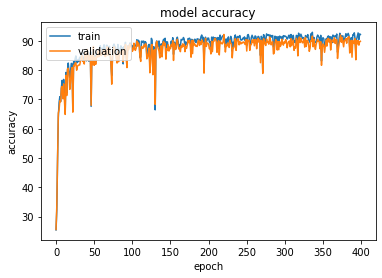

Maximum Train Accuracy : 92.97222137451172
Maximum Validation Accuracy : 92.22222900390625


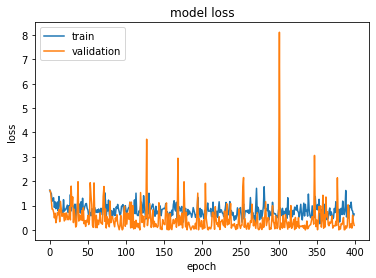

Minimum Train Loss : 0.2451387494802475
Minimum Validation Loss : 2.467520607751794e-05


In [ ]:
Bacteria_model_amp_RMSprop_0001 = Bact_Net()
Bacteria_model_amp_RMSprop_0001.cuda()
trainer_RMSprop_amp_0001 = trainer(Bacteria_model_amp_RMSprop_0001, amp_train_loader,"RMSprop", epoch_size=400, learning_rate=0.001)
trainer_RMSprop_amp_0001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_amp_0001.history['train_acc'])
plt.plot(trainer_RMSprop_amp_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_amp_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_amp_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_amp_0001.history['train_loss'])
plt.plot(trainer_RMSprop_amp_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_amp_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_amp_0001.history['val_loss'])}")

# RMSprop_0.001_400epoch_L2reg

In [ ]:
Bacteria_model_amp_RMSprop_0001 = Bact_Net()
Bacteria_model_amp_RMSprop_0001.cuda()
trainer_RMSprop_amp_0001 = trainer(Bacteria_model_amp_RMSprop_0001, amp_train_loader,"RMSprop", epoch_size=400, learning_rate=0.001, weight_decay=0.5)
trainer_RMSprop_amp_0001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_amp_0001.history['train_acc'])
plt.plot(trainer_RMSprop_amp_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_amp_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_amp_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_amp_0001.history['train_loss'])
plt.plot(trainer_RMSprop_amp_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_amp_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_amp_0001.history['val_loss'])}")

  0%|          | 0/400 [00:00<?, ?it/s]

# RMSprop_0.001_400epoch_batchnorm

In [ ]:
Bacteria_model_amp_RMSprop_0001 = Bact_Net(batch_norm=True)
Bacteria_model_amp_RMSprop_0001.cuda()
trainer_RMSprop_amp_0001 = trainer(Bacteria_model_amp_RMSprop_0001, amp_train_loader,"RMSprop", epoch_size=400, learning_rate=0.001)
trainer_RMSprop_amp_0001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_amp_0001.history['train_acc'])
plt.plot(trainer_RMSprop_amp_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_amp_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_amp_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_amp_0001.history['train_loss'])
plt.plot(trainer_RMSprop_amp_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_amp_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_amp_0001.history['val_loss'])}")

# Adam_0.001_400epoch

In [ ]:
Bacteria_model_amp_Adam_0001 = Bact_Net()
Bacteria_model_amp_Adam_0001.cuda()
trainer_Adam_amp_0001 = trainer(Bacteria_model_amp_Adam_0001, amp_train_loader,"Adam", epoch_size=400, learning_rate=0.001)
trainer_Adam_amp_0001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_amp_0001.history['train_acc'])
plt.plot(trainer_Adam_amp_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_amp_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_amp_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_amp_0001.history['train_loss'])
plt.plot(trainer_Adam_amp_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_amp_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_amp_0001.history['val_loss'])}")

# Adam_0.001_400epoch_L2reg

In [ ]:
Bacteria_model_amp_Adam_0001 = Bact_Net()
Bacteria_model_amp_Adam_0001.cuda()
trainer_Adam_amp_0001 = trainer(Bacteria_model_amp_Adam_0001, amp_train_loader,"Adam", epoch_size=400, learning_rate=0.001, weight_decay=0.5)
trainer_Adam_amp_0001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_amp_0001.history['train_acc'])
plt.plot(trainer_Adam_amp_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_amp_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_amp_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_amp_0001.history['train_loss'])
plt.plot(trainer_Adam_amp_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_amp_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_amp_0001.history['val_loss'])}")

# Adam_0.001_400epoch_batchnorm

In [ ]:
Bacteria_model_amp_Adam_0001 = Bact_Net(batch_norm=True)
Bacteria_model_amp_Adam_0001.cuda()
trainer_Adam_amp_0001 = trainer(Bacteria_model_amp_Adam_0001, amp_train_loader,"Adam", epoch_size=200, learning_rate=0.001)
trainer_Adam_amp_0001.train(amp_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_amp_0001.history['train_acc'])
plt.plot(trainer_Adam_amp_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_amp_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_amp_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_amp_0001.history['train_loss'])
plt.plot(trainer_Adam_amp_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_amp_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_amp_0001.history['val_loss'])}")